In [981]:

# Importing libraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Loading necessary packages

import scipy.stats as st
import pandas_profiling
import requests 
%matplotlib inline


ModuleNotFoundError: No module named 'pandas_profiling'

In [691]:
svc = SVC()

In [864]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)



In [866]:
# Semester End Date:
EndDate = '2010-01-21' 
EndDate = pd.to_datetime(EndDate)

#
# The Start Date and EndDate is for the full 15 weeks.
# Those log files were all semester 1 2018? in which case:
# Week 1 was the week starting Sept 17th   (first-year induction was the previous week). 
# Week 14 (final week of exams) was the week starting Jan 7th.
# Reading week started Oct 29th. Attached is the college calendar for that year.

In [931]:
#Remove activity outside semester start and end dates range¶
#mask = (activityfile1['Date'] >= StartDate) & (activityfile1['Date'] <= EndDate)

#activityfile1 = activityfile1.loc[mask]

#len(activityfile1)

In [3]:
sys.path

['',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\python36.zip',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\DLLs',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\Babel-2.5.0-py3.6.egg',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\win32',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\win32\\lib',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\Pythonwin',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Newrowsquare\

In [ ]:
# Begin1

In [728]:
# Data Preperation Module 1
# m1ml,m1mg,
# Import first Lecturer Grades

#module1lg = pd.read_csv('Module1-LecturersGrades.csv',index_col = 'Student Id')
# Index column is student ID
# Student ID -> module1lg
module1lg = pd.read_csv('Module1-LecturersGrades.csv')


In [729]:
# module1mg = pd.read_csv('Module1-MoodleGrades.csv', index_col = 'ID number')
# ID number is primary index col

# Index column is privalged column in pandas providing conviement to series or dataframe rows
module1mg = pd.read_csv('Module1-MoodleGrades.csv')
# Module 1 mg has 4,5,6,7, MCQ Final

In [730]:
# Data prep Module 1
module1ml = pd.read_csv('Module1-MoodleLogs.csv')
# Module logs

In [619]:
module1lg.dtypes
# id is int

id                     int64
Student Id            object
Name                  object
% CA                   int64
% exam                 int64
Average              float64
Final(Rounded Up)      int64
First name            object
Last name             object
Pass                    bool
dtype: object

In [618]:
module1mg.dtypes
# Mostly floats and ints
# ID number to change to int

First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [828]:
module1ml.dtypes
# Are all objects
# Need to split strings

Time              object
User full name    object
Affected user     object
Event context     object
Component         object
Event name        object
Description       object
dtype: object

In [932]:
#module1ml["Time"] = module1ml.Time.astype(float)


In [933]:
# Plot the time series in each dataset
#fig, axs = plt.subplots(2, 1, figsize=(5, 10))
#module1ml.iloc[:8470].plot(y="Date", ax=axs[0])


In [839]:
# Print the number of unique values in each modul1ml column
print(module1ml.nunique())


Time              8470
User full name     122
Affected user        1
Event context       55
Component           10
Event name          31
Description         53
dtype: int64


In [840]:
# Print the number of unique values in each modul1lg column
print(module1lg.nunique())


id                   95
Student Id           95
Name                 95
% CA                 40
% exam               41
Average              65
Final(Rounded Up)    50
dtype: int64


In [841]:
# Print the number of unique values in each modul1lg column
print(module1mg.nunique())

First name                                     122
Surname                                        122
ID number                                      122
Email address                                  122
Course total (Real)                             20
Last downloaded from this course                 2
Assignment: Group 1 - Practical Test (Real)      1
Assignment: Group 2 - Practical Test (Real)      1
Assignment: Group 3 - Practical Test (Real)      1
Assignment: Group 4 - Practical Test (Real)      1
Assignment: Group 5 - Practical Test (Real)      1
Assignment: Group 6 - Practical Test (Real)      1
Assignment: Group 7 - Practical Test (Real)      1
Assignment: Late Practical (Real)                1
Quiz: Group 1 MCQ (Real)                         8
Quiz: Group 1 - MCQ2 (Real)                      8
Quiz: Group 2 MCQ (Real)                         8
Quiz: Group 2 - MCQ2 (Real)                      8
Quiz: Group 3 MCQ (Real)                         9
Quiz: Group 3 - MCQ2 (Real)    

In [832]:
module1ml_sklearn = module1ml.copy()
# module1ml_sklearn = module1ml.copy()
# label encoding using scikit-learn's LabelEncoder
lb_make = LabelEncoder()
module1ml_sklearn['Event name'] = lb_make.fit_transform(module1ml['Event name'])
module1ml_sklearn.head() #Results in appending a new column to df

# Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, 
# but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.
#


Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

   Event name                                        Description  
0           4  The user with id '0' viewed the 'resource' act...  
1           7  The user with id '0' viewed the course with id...  
2           6  The user with id '0' viewed the user report fo...  
3           7  The user with id '0' viewed the course with id...  
4          28  The user with id '0' viewed the list of users ...

In [833]:
module1ml_onehot = module1ml.copy()
module1ml_onehot = pd.get_dummies(module1ml_onehot, columns=['Event name'], prefix = ['Event name'])

print(module1ml_onehot.head())

###
#
# One-Hot encoding
# The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column.
# This has the benefit of not weighting a value improperly.
# https://www.datacamp.com/community/tutorials/categorical-data



              Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

                                         Description  \
0  The user with id '0' viewed the 'resource' act...   
1  The user with id '0' viewed the course with id...   
2  The user with id '0' viewed the user report fo...   
3  The user with id '0' viewed the course with id...   
4  The user with id '0' viewed the list of users ...   

   Event name_A file has been uploaded.  \
0                                     0   
1                                     0   
2                                     0   
3               

In [835]:
# scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder in its preprocessing module
#Just for the sake of practicing you will do the same encoding via LabelBinarizer:
# labelBinarizer

module1ml_onehot_sklearn2 = module1ml.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(module1ml_onehot_sklearn2['Component'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

# Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature Component.
# This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. 
# The axis argument is set to 1 as you want to merge on columns.

   Assignment  File  File submissions  Folder  Forum  Overview report  Quiz  \
0           0     1                 0       0      0                0     0   
1           0     0                 0       0      0                0     0   
2           0     0                 0       0      0                0     0   
3           0     0                 0       0      0                0     0   
4           0     0                 0       0      0                0     0   

   System  URL  User report  
0       0    0            0  
1       1    0            0  
2       1    0            0  
3       1    0            0  
4       1    0            0  


In [837]:
result_df = pd.concat([module1ml_onehot_sklearn2, lb_results_df], axis=1)

print(result_df.head())

              Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description  Assignment  File  \
0  The user with id '0' viewed the 'resource' act...           0     1   
1  The user with id '0' viewed the course with id...           0     0   
2  The user with id '0' viewed the user report fo...           0     0   
3  The user with id '0' viewed the c

In [941]:
obj1_df = module1ml.select_dtypes(include=['object']).copy()
obj1_df.head()
# Pandas has a helpful select_dtypes function which we can use to build a new dataframe containing only the object column
# Category1
# obj_df["num_cylinders"].value_counts()


Time User full name Affected user     Event context Component  \
Date                                                                          
2019-02-20   01:56      ansW buTW             -  File: Lecture 10      File   
2019-02-20   01:56      ansW buTW             -  Course: Module 1    System   
2019-02-20   01:27      ansW buTW             -  Course: Module 1    System   
2019-02-19   12:16      ae1g bAVb             -  Course: Module 1    System   
2019-02-19   10:22      aZWk bb86             -  Course: Module 1    System   

                           Event name  \
Date                                    
2019-02-20       Course module viewed   
2019-02-20              Course viewed   
2019-02-20  Course user report viewed   
2019-02-19              Course viewed   
2019-02-19           User list viewed   

                                                  Description  
Date                                                           
2019-02-20  The user with id '0' viewed the 'resource' act...  
2019-02-20  The user with id '0' viewed the course with id...  
2019-02-20  The user with id '0' viewed the user report fo...  
2019-02-19  The user with id '0' viewed the course with id...  
2019-02-19  The user with id '0' viewed the list of users ...

In [942]:
obj1_df["Component"].value_counts()


File                8456
System              6919
Quiz                1615
Assignment           747
User report          462
Forum                432
URL                  363
File submissions     200
Overview report       47
Folder                 1
Name: Component, dtype: int64

In [943]:
obj1_df["Event name"].value_counts()
# Actions 
# Quiz attempt reviewed, submitted, Quiz attempt started,User enrolled in course, A file has been uploaded,A submisssion has 
# been submitted, Sub

Course module viewed                                      9563
Course viewed                                             6082
Grade user report viewed                                   462
The status of the submission has been viewed.              412
Quiz attempt viewed                                        253
Quiz attempt summary viewed                                245
Quiz attempt reviewed                                      224
Quiz attempt submitted                                     204
User graded                                                204
Quiz attempt started                                       204
User list viewed                                           173
Course user report viewed                                  156
Discussion viewed                                          136
Submission form viewed.                                    135
User enrolled in course                                    121
Role assigned                                          

In [937]:
dir(module1ml['Event name'])


['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 

In [808]:
print(module1ml['Event name'].value_counts().count())


31


In [809]:
print(module1ml['Component'].value_counts().count())


10


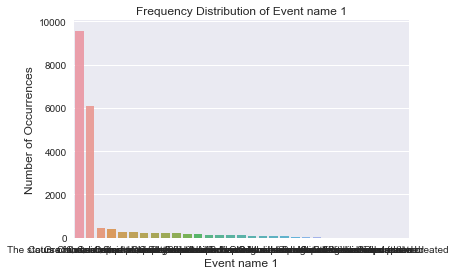

In [814]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
eventname1_count = module1ml['Event name'].value_counts()
sns.set(style="darkgrid")
sns.barplot(eventname1_count.index, eventname1_count.values, alpha=0.9)
plt.title('Frequency Distribution of Event name 1')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event name 1', fontsize=12)
plt.show()

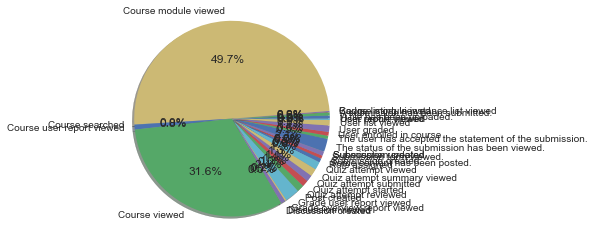

In [815]:
labels = module1ml['Event name'].astype('category').cat.categories.tolist()
counts = module1ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [818]:
module1ml_c = module1ml.copy()
module1ml_c['Event name'] = module1ml_c['Event name'].astype('category')
module1ml_c['Component'] = module1ml_c['Component'].astype('category')                                                              

print(module1ml_c.dtypes)
# it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns
# much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below: 
#
#

Time                object
User full name      object
Affected user       object
Event context       object
Component         category
Event name        category
Description         object
dtype: object


In [819]:
import time
%timeit module1ml.groupby(['Event name','Component']).count() #DataFrame with object dtype column

9.66 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [820]:
%timeit module1ml_c.groupby(['Event name','Component']).count() #DataFrame with category dtype columns


9.28 ms ± 833 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [823]:
module1ml_c['Event name'] = module1ml_c['Event name'].cat.codes


In [825]:
module1ml_c['Component'] = module1ml_c['Component'].cat.codes


In [826]:
module1ml_c.head() #alphabetically labeled from 0 to 28
# https://www.datacamp.com/community/tutorials/categorical-data
# Categorical-data


Time User full name Affected user     Event context  Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10          1   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1          7   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1          7   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1          7   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1          7   

   Event name                                        Description  
0           4  The user with id '0' viewed the 'resource' act...  
1           7  The user with id '0' viewed the course with id...  
2           6  The user with id '0' viewed the user report fo...  
3           7  The user with id '0' viewed the course with id...  
4          28  The user with id '0' viewed the list of users ...

In [ ]:
# Drop unnecessary features

In [731]:

# Drop the unnecessary features
module1ml = module1ml.drop(module1ml[['IP address','Origin']], axis=1)


In [733]:
module1ml.head(5)

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description  
0  The user with id '0' viewed the 'resource' act...  
1  The user with id '0' viewed the course with id...  
2  The user with id '0' viewed the user report fo...  
3  The user with id '0' viewed the course with id...  
4  The user with id '0' viewed the list of users ...

In [ ]:

# Notice that this creates an entirely new DataFrame. Once you merge this back into the original module1ml DataFrame,
# you can begin using these state features in your models. Do note, however, you will have many more features in our dataset, 
# so we should consider dropping any that are unnecessary.

In [705]:

# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int - data3['Title'] = pd.to_numeric(data3['Title'])

#module1mg['ID number'] = pd.to_numeric(module1mg["ID number"])

module1mg['ID number'] #= module1mg['ID number'].astype('int64')

#module1mg["ID number"].astype(str).astype(int)
studentid = module1mg['ID number']
id = str(studentid) 
studentid.head(2)

0    U8NMDqBG
1    VSnRGk9O
Name: ID number, dtype: object

In [710]:
#module1mg['ID number'] = module1mg['ID number'].astype(int)
#module1mg['ID number'].str.replace("")

TypeError: replace() missing 1 required positional argument: 'repl'

In [712]:
# to change use .astype() 
module1mg['ID number'] = module1mg.ID number.astype(int)


SyntaxError: invalid syntax (<ipython-input-712-5f1cebe3a659>, line 2)

In [ ]:
# One hot encoding1 component


In [682]:


# Perform one hot encoding on 'State'
module1ml_event_name = pd.get_dummies(module1ml['Event name'])

# Print the head of telco_state
print(module1ml_event_name.head())

   A file has been uploaded.  A submission has been submitted.  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0   
3                          0                                 0   
4                          0                                 0   

   Badge listing viewed  Course module instance list viewed  \
0                     0                                   0   
1                     0                                   0   
2                     0                                   0   
3                     0                                   0   
4                     0                                   0   

   Course module viewed  Course searched  Course user report viewed  \
0                     1                0                          0   
1                     0                0                          0   
2          

In [681]:


# Perform one hot encoding on 'State'
module1ml_component = pd.get_dummies(module1ml['Component'])

# Print the head of telco_state
print(module1ml_component.head())

   Assignment  File  File submissions  Folder  Forum  Overview report  Quiz  \
0           0     1                 0       0      0                0     0   
1           0     0                 0       0      0                0     0   
2           0     0                 0       0      0                0     0   
3           0     0                 0       0      0                0     0   
4           0     0                 0       0      0                0     0   

   System  URL  User report  
0       0    0            0  
1       1    0            0  
2       1    0            0  
3       1    0            0  
4       1    0            0  


In [439]:
module1lg['Final(Rounded Up)'].plot('hist')
# Lecturers Grades breakdown

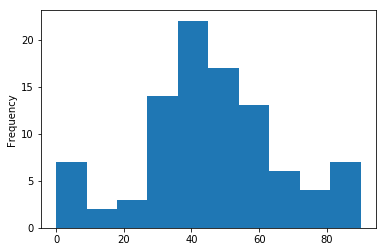

In [440]:
plt.show()

In [351]:
print(module1lg.shape)

(95, 7)


In [350]:
print(module1mg.shape)

(122, 30)


In [348]:
print(module1ml.shape)

(19242, 11)


In [441]:
# Load the grade file

grades1 = pd.read_csv('Module1-MoodleGrades.csv',encoding = "latin-1",low_memory = False)

In [442]:
len(grades1)
# # Number of records in the grade file
# 122 Got grades

122

In [923]:
# Student Activity File Name  
activityfile1 = pd.read_csv('Module1-MoodleLogs.csv')

In [926]:
activitytime1 = module1ml["Time"].str.split(",", n = 1, expand = True)

In [927]:
# making separate Date column from new data frame 
activitytime1["Date"]= activitytime1[0] 

# making seperate Time column from new data frame
activitytime1['Time']= activitytime1[1]


KeyError: 1

In [444]:
activity1 = pd.read_csv('Module1-MoodleLogs.csv',encoding = "latin-1",low_memory = False)
activity1.head(3)

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
1  The user with id '0' viewed the course with id...    web  127.0.0.1  
2  The user with id '0' viewed the user report fo...    web  127.0.0.1

In [445]:
# Generates descriptive statistics
activity1.describe().transpose()
# Course module viewed is the most frequently 
# aRY9 bwYJ is the most frequent student
# 

count unique  \
Time            19242   8470   
User full name  19242    122   
Affected user   19242      1   
Event context   19242     55   
Component       19242     10   
Event name      19242     31   
Description     19242     53   
Origin          19242      2   
IP address      19242      1   

                                                              top   freq  
Time                                               7/11/18, 09:15     66  
User full name                                          aRY9 bwYJ    525  
Affected user                                                   -  19242  
Event context                                    Course: Module 1   7457  
Component                                                    File   8456  
Event name                                   Course module viewed   9563  
Description     The user with id '0' viewed the 'resource' act...   8456  
Origin                                                        web  18277  
IP address                                              127.0.0.1  19242

In [ ]:
#Attribute Information:

#Affected user: It contains the name of the user if the action is related to them.This has been removed as it is blank
#Time: It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
#User full name: Name of the user is listed in this column.
#Event context: It displays the name of the activity or resource. Ex: Course: Module 1 was most frequent
#Component: It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ... File was most frequent
#Event name: It displays the event name in relation to users' action. There are four actions that a user can do in Moodle - Create, View, Update and Delete.Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.This will be removed
#IP address: Shows the IP address of the user.This will be removed as this does not provide any information
#Origin: It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.

In [378]:
Activity1

Time User full name Affected user          Event context  \
0      20/02/19, 01:56      ansW buTW             -       File: Lecture 10   
1      20/02/19, 01:56      ansW buTW             -       Course: Module 1   
2      20/02/19, 01:27      ansW buTW             -       Course: Module 1   
3      19/02/19, 12:16      ae1g bAVb             -       Course: Module 1   
4      19/02/19, 10:22      aZWk bb86             -       Course: Module 1   
5      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
6      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
7      19/02/19, 09:03      an00 bEQ2             -  File: Lab 8 Worksheet   
8      19/02/19, 09:03      an00 bEQ2             -  File: Lab 7 Worksheet   
9      19/02/19, 09:03      an00 bEQ2             -  File: Lab 6 Worksheet   
10     19/02/19, 09:02      an00 bEQ2             -  File: Lab 6 Worksheet   
11     19/02/19, 09:02      an00 bEQ2             -        File: Lecture 6   
12     19/02/19, 09:02      an00 bEQ2             -  File: Lab 5 Worksheet   
13     19/02/19, 08:56      an00 bEQ2             -  File: Lab 7 Worksheet   
14     19/02/19, 08:56      an00 bEQ2             -  File: Lab 8 Worksheet   
15     19/02/19, 08:55      an00 bEQ2             -  File: Lab 8 Worksheet   
16     19/02/19, 08:55      an00 bEQ2             -  File: Lab 9 Worksheet   
17     19/02/19, 08:55      an00 bEQ2             -       Course: Module 1   
18     18/02/19, 22:51      aOmN bXsd             -       Course: Module 1   
19     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
20     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
21     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
22     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
23     18/02/19, 16:10      a2mi bDko             -        File: Lecture 3   
24     18/02/19, 16:09      a2mi bDko             -       Course: Module 1   
25     18/02/19, 11:17      aA6B bBfk             -       Course: Module 1   
26     18/02/19, 08:41      a9cr b591             -       Course: Module 1   
27     18/02/19, 08:15      aA6B bBfk             -       Course: Module 1   
28     17/02/19, 17:48      a8NM bDqB             -       Course: Module 1   
29     14/02/19, 09:27      ap1Y bpWX             -       Course: Module 1   
...                ...            ...           ...                    ...   
19212  19/09/18, 14:23      asqg bbCp             -       Course: Module 1   
19213  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19214  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19215  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19216  19/09/18, 14:23      aglU bwda             -       Course: Module 1   
19217  19/09/18, 14:23      aglU bwda             -       Course: Module 1   
19218  22/08/18, 02:50      ansW buTW             -       Course: Module 1   
19219  22/08/18, 01:48      ansW buTW             -                  Other   
19220  22/08/18, 01:43      ansW buTW             -        File: Lecture 1   
19221  22/08/18, 01:42      ansW buTW             -                  Other   
19222  22/08/18, 01:42      ansW buTW             -       Course: Module 1   
19223  22/08/18, 00:48      ansW buTW             -                  Other   
19224  22/08/18, 00:21      ansW buTW             -                  Other   
19225  22/08/18, 00:18      ansW buTW             -                  Other   
19226  22/08/18, 00:14      ansW buTW             -                  Other   
19227  22/08/18, 00:14      ansW buTW             -                  Other   
19228  22/08/18, 00:13      ansW buTW             -       Course: Module 1   
19229   7/08/18, 01:06      ansW buTW             -       Course: Module 1   
19230   1/08/18, 02:12      ansW buTW             -       Course: Module 1   
19231  26/07/18, 01:51      ansW buTW   

In [339]:
# Concatenate module1lg and module1mg and module1ml
module1_tidy = pd.concat([module1lg, module1mg, module1ml],ignore_index=False, axis=1)


In [340]:
print(module1_tidy.shape)
# Total of the three combined

(19242, 48)


In [342]:
df1 = module1_tidy.reset_index()
# Create a new index
# https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

In [344]:
df1.head()
# Columns not matching up at all

index     id Student Id        Name  % CA  % exam  Average  \
0      0  105.0   iV38mp5J  bmp5, aV38  33.0    37.0     35.0   
1      1   38.0   wTka80ff  b80f, aTka  44.0    46.0     45.0   
2      2   64.0   ond9WT1D  bWT1, and9  42.0    63.0     52.5   
3      3   79.0   7Ww4gbRf  bgbR, aWw4  46.0    36.0     41.0   
4      4  101.0   DpJQOQ2F  bOQ2, apJQ  20.0     0.0     10.0   

   Final(Rounded Up)  First name Surname    ...     User full name  \
0               35.0        a8NM    bDqB    ...          ansW buTW   
1               45.0        aSnR    bGk9    ...          ansW buTW   
2               53.0        aAK5    bSAb    ...          ansW buTW   
3               41.0        a4jV    bO8M    ...          ae1g bAVb   
4               10.0        aa14    bMdv    ...          aZWk bb86   

  Affected user     Event context  Component                 Event name  \
0             -  File: Lecture 10       File       Course module viewed   
1             -  Course: Module 1     System              Course viewed   
2             -  Course: Module 1     System  Course user report viewed   
3             -  Course: Module 1     System              Course viewed   
4             -  Course: Module 1     System           User list viewed   

                                         Description  Origin  IP address  \
0  The user with id '0' viewed the 'resource' act...     web   127.0.0.1   
1  The user with id '0' viewed the course with id...     web   127.0.0.1   
2  The user with id '0' viewed the user report fo...     web   127.0.0.1   
3  The user with id '0' viewed the course with id...     web   127.0.0.1   
4  The user with id '0' viewed the list of users ...     web   127.0.0.1   

   First name  Last name  
0        ansW       buTW  
1        ansW       buTW  
2        ansW       buTW  
3        ae1g       bAVb  
4        aZWk       bb86  

[5 rows x 49 columns]

In [341]:
module1_tidy.head()


id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)  \
0  105.0   iV38mp5J  bmp5, aV38  33.0    37.0     35.0               35.0   
1   38.0   wTka80ff  b80f, aTka  44.0    46.0     45.0               45.0   
2   64.0   ond9WT1D  bWT1, and9  42.0    63.0     52.5               53.0   
3   79.0   7Ww4gbRf  bgbR, aWw4  46.0    36.0     41.0               41.0   
4  101.0   DpJQOQ2F  bOQ2, apJQ  20.0     0.0     10.0               10.0   

   First name Surname ID number    ...     User full name  Affected user  \
0        a8NM    bDqB  U8NMDqBG    ...          ansW buTW              -   
1        aSnR    bGk9  VSnRGk9O    ...          ansW buTW              -   
2        aAK5    bSAb  tAK5SAbE    ...          ansW buTW              -   
3        a4jV    bO8M  14jVO8M7    ...          ae1g bAVb              -   
4        aa14    bMdv  ba14Mdv9    ...          aZWk bb86              -   

      Event context  Component                 Event name  \
0  File: Lecture 10       File       Course module viewed   
1  Course: Module 1     System              Course viewed   
2  Course: Module 1     System  Course user report viewed   
3  Course: Module 1     System              Course viewed   
4  Course: Module 1     System           User list viewed   

                                         Description  Origin  IP address  \
0  The user with id '0' viewed the 'resource' act...     web   127.0.0.1   
1  The user with id '0' viewed the course with id...     web   127.0.0.1   
2  The user with id '0' viewed the user report fo...     web   127.0.0.1   
3  The user with id '0' viewed the course with id...     web   127.0.0.1   
4  The user with id '0' viewed the list of users ...     web   127.0.0.1   

   First name  Last name  
0        ansW       buTW  
1        ansW       buTW  
2        ansW       buTW  
3        ae1g       bAVb  
4        aZWk       bb86  

[5 rows x 48 columns]

In [328]:
module1_tidy.tail()
# Issue with this is the indexing is all over the place

0    1    2   3   4   5   6    7    8    9   ...          38  39  \
19237 NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   ansW buTW   -   
19238 NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   ansW buTW   -   
19239 NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   ansW buTW   -   
19240 NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   ansW buTW   -   
19241 NaN  NaN  NaN NaN NaN NaN NaN  NaN  NaN  NaN  ...   ansW buTW   -   

                     40      41                    42  \
19237             Other    File  Course module viewed   
19238             Other    File  Course module viewed   
19239  Course: Module 1  System         Course viewed   
19240  Course: Module 1  System         Course viewed   
19241  Course: Module 1  System         Course viewed   

                                                      43   44         45  \
19237  The user with id '0' viewed the 'resource' act...  web  127.0.0.1   
19238  The user with id '0' viewed the 'resource' act...  web  127.0.0.1   
19239  The user with id '0' viewed the course with id...  web  127.0.0.1   
19240  The user with id '0' viewed the course with id...  web  127.0.0.1   
19241  The user with id '0' viewed the course with id...  web  127.0.0.1   

         46    47  
19237  ansW  buTW  
19238  ansW  buTW  
19239  ansW  buTW  
19240  ansW  buTW  
19241  ansW  buTW  

[5 rows x 48 columns]

In [320]:
print (module1_tidy.columns.tolist())
# Columns


['id', 'Student Id', 'Name', '% CA', '% exam', 'Average', 'Final(Rounded Up)', 'First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Group 1 - Practical Test (Real)', 'Assignment: Group 2 - Practical Test (Real)', 'Assignment: Group 3 - Practical Test (Real)', 'Assignment: Group 4 - Practical Test (Real)', 'Assignment: Group 5 - Practical Test (Real)', 'Assignment: Group 6 - Practical Test (Real)', 'Assignment: Group 7 - Practical Test (Real)', 'Assignment: Late Practical (Real)', 'Quiz: Group 1 MCQ (Real)', 'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)', 'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)', 'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 4 - MCQ2 (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'Q

In [291]:
# Print the head of module1_tidy
print(module1_tidy.head())


      id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)  \
0  105.0   iV38mp5J  bmp5, aV38  33.0    37.0     35.0               35.0   
1   38.0   wTka80ff  b80f, aTka  44.0    46.0     45.0               45.0   
2   64.0   ond9WT1D  bWT1, and9  42.0    63.0     52.5               53.0   
3   79.0   7Ww4gbRf  bgbR, aWw4  46.0    36.0     41.0               41.0   
4  101.0   DpJQOQ2F  bOQ2, apJQ  20.0     0.0     10.0               10.0   

   First name Surname ID number    ...     User full name  Affected user  \
0        a8NM    bDqB  U8NMDqBG    ...          ansW buTW              -   
1        aSnR    bGk9  VSnRGk9O    ...          ansW buTW              -   
2        aAK5    bSAb  tAK5SAbE    ...          ansW buTW              -   
3        a4jV    bO8M  14jVO8M7    ...          ae1g bAVb              -   
4        aa14    bMdv  ba14Mdv9    ...          aZWk bb86              -   

      Event context  Component                 Event name  \
0  File: Lecture 10

In [293]:
module1_tidy.tail()

id Student Id Name  % CA  % exam  Average  Final(Rounded Up)  \
19237 NaN        NaN  NaN   NaN     NaN      NaN                NaN   
19238 NaN        NaN  NaN   NaN     NaN      NaN                NaN   
19239 NaN        NaN  NaN   NaN     NaN      NaN                NaN   
19240 NaN        NaN  NaN   NaN     NaN      NaN                NaN   
19241 NaN        NaN  NaN   NaN     NaN      NaN                NaN   

       First name Surname ID number    ...     User full name  Affected user  \
19237         NaN     NaN       NaN    ...          ansW buTW              -   
19238         NaN     NaN       NaN    ...          ansW buTW              -   
19239         NaN     NaN       NaN    ...          ansW buTW              -   
19240         NaN     NaN       NaN    ...          ansW buTW              -   
19241         NaN     NaN       NaN    ...          ansW buTW              -   

          Event context  Component            Event name  \
19237             Other       File  Course module viewed   
19238             Other       File  Course module viewed   
19239  Course: Module 1     System         Course viewed   
19240  Course: Module 1     System         Course viewed   
19241  Course: Module 1     System         Course viewed   

                                             Description  Origin  IP address  \
19237  The user with id '0' viewed the 'resource' act...     web   127.0.0.1   
19238  The user with id '0' viewed the 'resource' act...     web   127.0.0.1   
19239  The user with id '0' viewed the course with id...     web   127.0.0.1   
19240  The user with id '0' viewed the course with id...     web   127.0.0.1   
19241  The user with id '0' viewed the course with id...     web   127.0.0.1   

       First name  Last name  
19237        ansW       buTW  
19238        ansW       buTW  
19239        ansW       buTW  
19240        ansW       buTW  
19241        ansW       buTW  

[5 rows x 48 columns]

In [158]:
module1ml.head()

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
1  The user with id '0' viewed the course with id...    web  127.0.0.1  
2  The user with id '0' viewed the user report fo...    web  127.0.0.1  
3  The user with id '0' viewed the course with id...    web  127.0.0.1  
4  The user with id '0' viewed the list of users ...    web  127.0.0.1

In [159]:
# new data frame with split value columns 
new1 = module1ml["User full name"].str.split(" ", n = 1, expand = True)

In [160]:
new1.head()


0     1
0  ansW  buTW
1  ansW  buTW
2  ansW  buTW
3  ae1g  bAVb
4  aZWk  bb86

In [161]:
# making separate first name column from new data frame 
module1ml["First name"]= new1[0] 

In [162]:
# making separate last name column from new data frame 
module1ml["Last name"]= new1[1] 

In [165]:
module1ml.head()
# Going to take away Affected user
# Going to take away Origin
# Going to take away Ip address

Time User full name Affected user     Event context Component  \
0  20/02/19, 01:56      ansW buTW             -  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW             -  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW             -  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb             -  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the 'resource' act...    web  127.0.0.1   
1  The user with id '0' viewed the course with id...    web  127.0.0.1   
2  The user with id '0' viewed the user report fo...    web  127.0.0.1   
3  The user with id '0' viewed the course with id...    web  127.0.0.1   
4  The user with id '0' viewed the list of users ...    web  127.0.0.1   

  First name Last name  
0       ansW      buTW  
1       ansW      buTW  
2       ansW      buTW  
3       ae1g      bAVb  
4       aZWk      bb86

In [396]:
# Generates descriptive statistics
m1ml.describe().transpose()

count unique  \
Time            19242   8470   
User full name  19242    122   
Event context   19242     55   
Component       19242     10   
Event name      19242     31   
Description     19242     53   
First name      19242    122   
Last name       19242    122   

                                                              top  freq  
Time                                               7/11/18, 09:15    66  
User full name                                          aRY9 bwYJ   525  
Event context                                    Course: Module 1  7457  
Component                                                    File  8456  
Event name                                   Course module viewed  9563  
Description     The user with id '0' viewed the 'resource' act...  8456  
First name                                                   aRY9   525  
Last name                                                    bwYJ   525

In [914]:
sns.boxplot(x = 'Date', y = 'Event name', data = m1ml)

ValueError: Could not interpret input 'Date'

In [180]:
m1ml.head()

Time User full name     Event context Component  \
0  20/02/19, 01:56      ansW buTW  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW  Course: Module 1    System   
3  19/02/19, 12:16      ae1g bAVb  Course: Module 1    System   
4  19/02/19, 10:22      aZWk bb86  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description First name Last name  
0  The user with id '0' viewed the 'resource' act...       ansW      buTW  
1  The user with id '0' viewed the course with id...       ansW      buTW  
2  The user with id '0' viewed the user report fo...       ansW      buTW  
3  The user with id '0' viewed the course with id...       ae1g      bAVb  
4  The user with id '0' viewed the list of users ...       aZWk      bb86

In [95]:
module1mg.head()

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                46.67   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                36.67   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                53.33   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                 0.00   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                46.67   

   Last downloaded from this course  \
0                        1550739556   
1                        1550739556   
2                        1550739556   
3                        1550739556   
4                        1550739556   

   Assignment: Group 1 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 2 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 3 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 4 - Practical Test (Real)           ...            \
0                                            0           ...             
1                                            0           ...             
2                                            0           ...             
3                                            0           ...             
4                                            0           ...             

   Quiz: Group 4 MCQ (Real)  Quiz: Group 4 - MCQ2 (Real)  \
0                         7                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 30 columns]

In [434]:
m1_1 = pd.merge(m1ml,m1mg,on= 'First name')

In [ ]:
m1_1_2 pd.merge(m1ml,m1mg, on= ['First name',''

In [436]:
print(m1_1.shape)

(19242, 20)


In [437]:
print(m1ml.shape)

(19242, 8)


In [438]:
print(m1mg.shape)

(122, 13)


In [432]:
mergemodule1 =pd.merge(m1ml,m1mg,left_on='Last name', right_on='Surname')
# Merging m1ml and m1mg
# Merge1

In [352]:
print(mergemodule1.shape)

(19242, 21)


In [319]:
mergemodule1.head()

Time User full name     Event context Component  \
0  20/02/19, 01:56      ansW buTW  File: Lecture 10      File   
1  20/02/19, 01:56      ansW buTW  Course: Module 1    System   
2  20/02/19, 01:27      ansW buTW  Course: Module 1    System   
3  21/01/19, 20:29      ansW buTW  Course: Module 1    System   
4  21/01/19, 19:11      ansW buTW  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4              Course viewed   

                                         Description First name_x Last name  \
0  The user with id '0' viewed the 'resource' act...         ansW      buTW   
1  The user with id '0' viewed the course with id...         ansW      buTW   
2  The user with id '0' viewed the user report fo...         ansW      buTW   
3  The user with id '0' viewed the course with id...         ansW      buTW   
4  The user with id '0' viewed the course with id...         ansW      buTW   

  First name_y Surname           ...           Course total (Real)  \
0         ansW    buTW           ...                          20.0   
1         ansW    buTW           ...                          20.0   
2         ansW    buTW           ...                          20.0   
3         ansW    buTW           ...                          20.0   
4         ansW    buTW           ...                          20.0   

   Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                            0                       0                       0  
1                            0                       0                       0  
2                            0                       0                       0  
3                            0                       0                       0  
4                            0                       0                       0  

[5 rows x 21 columns]

In [354]:
module1lg.head()

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45
2   64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3   79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4  101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10

In [ ]:
# Split String2

In [359]:
new1_2 = module1lg["Name"].str.split(", ", n = 1, expand = True)


In [360]:
# making separate first name column from new data frame 
module1lg["First name"]= new1_2[0] 

In [361]:
# making separate last name column from new data frame 
module1lg["Last name"]= new1_2[1] 

In [363]:
module1lg.head()

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)  \
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35   
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45   
2   64   ond9WT1D  bWT1, and9    42      63     52.5                 53   
3   79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41   
4  101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10   

  First name Last name  
0       bmp5      aV38  
1       b80f      aTka  
2       bWT1      and9  
3       bgbR      aWw4  
4       bOQ2      apJQ

In [364]:
print (module1lg.columns.tolist())


['id', 'Student Id', 'Name', '% CA', '% exam', 'Average', 'Final(Rounded Up)', 'First name', 'Last name']


In [365]:
m1lg = module1lg[[ 'Student Id', 'Name', '% CA', '% exam', 'Average', 'Final(Rounded Up)', 'First name', 'Last name']]
# Selecting columns from m1lg

In [367]:
#Merge1_2
mergemodule1_2 =pd.merge(m1lg,mergemodule1,left_on='First name', right_on='Surname')



In [369]:
mergemodule1_2.head()
# Merge1_2

Student Id        Name  % CA  % exam  Average  Final(Rounded Up) First name  \
0   iV38mp5J  bmp5, aV38    33      37     35.0                 35       bmp5   
1   iV38mp5J  bmp5, aV38    33      37     35.0                 35       bmp5   
2   iV38mp5J  bmp5, aV38    33      37     35.0                 35       bmp5   
3   iV38mp5J  bmp5, aV38    33      37     35.0                 35       bmp5   
4   iV38mp5J  bmp5, aV38    33      37     35.0                 35       bmp5   

  Last name_x             Time User full name           ...            \
0        aV38  28/01/19, 16:57      aV38 bmp5           ...             
1        aV38  28/01/19, 12:44      aV38 bmp5           ...             
2        aV38  23/01/19, 03:47      aV38 bmp5           ...             
3        aV38  23/01/19, 03:47      aV38 bmp5           ...             
4        aV38  18/01/19, 19:52      aV38 bmp5           ...             

  Course total (Real) Quiz: Group 4 MCQ (Real) Quiz: Group 5 MCQ (Real)  \
0               46.67                        0                        0   
1               46.67                        0                        0   
2               46.67                        0                        0   
3               46.67                        0                        0   
4               46.67                        0                        0   

  Quiz: Group 5 - MCQ2 (Real) Quiz: Group 6 MCQ (Real)  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

  Quiz: Group 6 - MCQ2 (Real) Quiz: Group 7 MCQ (Real)  \
0                           0                        9   
1                           0                        9   
2                           0                        9   
3                           0                        9   
4                           0                        9   

  Quiz: Group 7 - MCQ2 (Real) Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                           5                      0                       0  
1                           5                      0                       0  
2                           5                      0                       0  
3                           5                      0                       0  
4                           5                      0                       0  

[5 rows x 29 columns]

In [370]:
print (mergemodule1_2.columns.tolist())


['Student Id', 'Name', '% CA', '% exam', 'Average', 'Final(Rounded Up)', 'First name', 'Last name_x', 'Time', 'User full name', 'Event context', 'Component', 'Event name', 'Description', 'First name_x', 'Last name_y', 'First name_y', 'Surname', 'ID number', 'Course total (Real)', 'Quiz: Group 4 MCQ (Real)', 'Quiz: Group 5 MCQ (Real)', 'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)', 'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)', 'Quiz: Group 7 - MCQ2 (Real)', 'Quiz: Late MCQ1 (Real)', 'Quiz: Late MCQ2 (Real)']


In [366]:
mergemodule1

Time User full name                           Event context  \
0      20/02/19, 01:56      ansW buTW                        File: Lecture 10   
1      20/02/19, 01:56      ansW buTW                        Course: Module 1   
2      20/02/19, 01:27      ansW buTW                        Course: Module 1   
3      21/01/19, 20:29      ansW buTW                        Course: Module 1   
4      21/01/19, 19:11      ansW buTW                        Course: Module 1   
5      21/01/19, 19:07      ansW buTW                        Course: Module 1   
6       7/01/19, 03:33      ansW buTW                         File: Lecture 2   
7       7/01/19, 03:33      ansW buTW                        Course: Module 1   
8       7/01/19, 03:31      ansW buTW                        Course: Module 1   
9       7/01/19, 03:30      ansW buTW           URL: The Rjf Standard Library   
10      7/01/19, 03:30      ansW buTW                        Course: Module 1   
11      7/01/19, 03:25      ansW buTW                         File: Lecture 9   
12      7/01/19, 03:24      ansW buTW                        File: Lecture 10   
13      7/01/19, 03:24      ansW buTW                        Course: Module 1   
14      6/01/19, 23:55      ansW buTW  Forum: FOP 1 - YEAR 1 Discussion Forum   
15      6/01/19, 23:55      ansW buTW  Forum: FOP 1 - YEAR 1 Discussion Forum   
16      6/01/19, 23:55      ansW buTW                        Course: Module 1   
17      6/01/19, 23:55      ansW buTW                       Forum: News forum   
18      6/01/19, 23:55      ansW buTW                       Forum: News forum   
19      6/01/19, 23:53      ansW buTW                       Forum: News forum   
20      6/01/19, 23:53      ansW buTW                       Forum: News forum   
21      6/01/19, 23:53      ansW buTW                       Forum: News forum   
22      6/01/19, 23:39      ansW buTW                         File: Lecture 2   
23      6/01/19, 23:32      ansW buTW                         File: Lecture 2   
24      6/01/19, 23:31      ansW buTW                         File: Lecture 1   
25      6/01/19, 23:30      ansW buTW                         File: Lecture 1   
26      6/01/19, 22:23      ansW buTW                      File: Sample Paper   
27      6/01/19, 22:22      ansW buTW                        Course: Module 1   
28      6/01/19, 22:05      ansW buTW  Forum: FOP 1 - YEAR 1 Discussion Forum   
29      6/01/19, 22:03      ansW buTW  Forum: FOP 1 - YEAR 1 Discussion Forum   
...                ...            ...                                     ...   
19212  26/09/18, 14:06      aglU bwda                         File: Lecture 1   
19213  25/09/18, 09:13      aglU bwda                       URL: Rjf Tutorial   
19214  25/09/18, 09:13      aglU bwda                        Course: Module 1   
19215  25/09/18, 09:12      aglU bwda           URL: Getting started with Rjf   
19216  25/09/18, 09:10      aglU bwda                        Course: Module 1   
19217  25/09/18, 09:03      aglU bwda                         File: Lecture 1   
19218  25/09/18, 09:02      aglU bwda                   File: LAB 1 Worksheet   
19219  25/09/18, 09:02      aglU bwda                        Course: Module 1   
19220  25/09/18, 09:02      aglU bwda                       URL: Rjf Download   
19221  25/09/18, 09:02      aglU bwda                        Course: Module 1   
19222  19/09/18, 15:01      aglU bwda                        Course: Module 1   
19223  19/09/18, 15:01      aglU bwda                        Course: Module 1   
19224  19/09/18, 15:01      aglU bwda                       Forum: News forum   
19225  19/09/18, 15:01      aglU bwda  Forum: FOP 1 - YEAR 1 Discussion Forum   
19226  19/09/18, 14:37      aglU bwda                        Course: Module 1   
19227  19/09/18, 14:36      aglU bwda           URL: Getting started with Rjf   
19228  19/09/18, 14:23      aglU bwda                        Course: Module 1   
19229  19/09/18, 14:23      aglU bwda            

In [ ]:
# CLEANUP1

In [971]:
module1ml.head()
# Delete affected user / Description / Component

Time User full name Affected user     Event context Component  \
Date                                                                          
2019-02-20   01:56      ansW buTW             -  File: Lecture 10      File   
2019-02-20   01:56      ansW buTW             -  Course: Module 1    System   
2019-02-20   01:27      ansW buTW             -  Course: Module 1    System   
2019-02-19   12:16      ae1g bAVb             -  Course: Module 1    System   
2019-02-19   10:22      aZWk bb86             -  Course: Module 1    System   

                           Event name  \
Date                                    
2019-02-20       Course module viewed   
2019-02-20              Course viewed   
2019-02-20  Course user report viewed   
2019-02-19              Course viewed   
2019-02-19           User list viewed   

                                                  Description  
Date                                                           
2019-02-20  The user with id '0' viewed the 'resource' act...  
2019-02-20  The user with id '0' viewed the course with id...  
2019-02-20  The user with id '0' viewed the user report fo...  
2019-02-19  The user with id '0' viewed the course with id...  
2019-02-19  The user with id '0' viewed the list of users ...

In [973]:
module1ml["Affected user"].value_counts()


-    19242
Name: Affected user, dtype: int64

In [972]:
module1ml["Description"].value_counts()


The user with id '0' viewed the 'resource' activity with course module id '0'.                                                                       8456
The user with id '0' viewed the course with id '558'.                                                                                                6082
The user with id '0' viewed the 'quiz' activity with course module id '0'.                                                                            484
The user with id '0' viewed the user report in the gradebook.                                                                                         462
The user with id '0' has viewed the submission status page for the assignment with course module id '0'.                                              412
The user with id '0' viewed the 'url' activity with course module id '0'.                                                                             363
The user with id '0' viewed the 'forum' activity with course module id '0'. 

In [970]:
module1ml["Event context"].value_counts()
# The files from in Lecture 1 go from Lecture 2 to Lecture 9
# All the quizess will get higher weigthing

Course: Module 1                          7457
File: Lecture 2                            846
File: Lecture 3                            651
File: Lecture 1                            650
File: Lecture 6                            641
File: Lecture 7                            623
File: Lecture 4                            610
File: Lecture 5                            572
File: Lecture 8                            539
File: Lecture 9                            410
File: Sample Paper                         390
File: Lab 2 Worksheet                      353
File: LAB 1 Worksheet                      323
File: Lab 4 Worksheet                      254
File: Provisional CA Marks                 247
File: Lab 7 Worksheet                      225
File: Lab 5 Worksheet                      219
Forum: FOP 1 - YEAR 1 Discussion Forum     212
File: Lab 8 Worksheet                      203
Forum: News forum                          192
Assignment: Group 5 - Practical Test       169
File: Lab 3 W

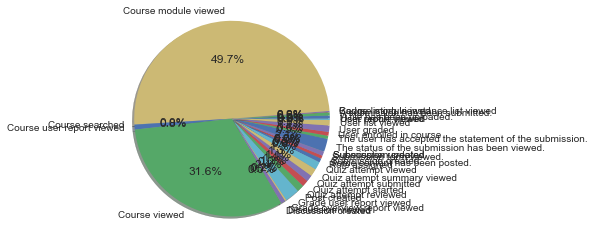

In [951]:
labels = module1ml['Event name'].astype('category').cat.categories.tolist()
counts = module1ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [876]:
time1 = module1ml["Time"].str.split(",", n = 1, expand = True)

In [880]:
# making separate Date column from new data frame 
module1ml["Date"]= time1[0] 

In [881]:
# making seperate Time column from new data frame
module1ml['Time']= time1[1]

In [904]:
# Convert the date column to datetime64
module1ml.Date = pd.to_datetime(module1ml.Date)


In [916]:
# Set date column as index
module1ml.set_index('Date', inplace=True)

In [921]:
module1ml.head()

Time User full name Affected user     Event context Component  \
Date                                                                          
2019-02-20   01:56      ansW buTW             -  File: Lecture 10      File   
2019-02-20   01:56      ansW buTW             -  Course: Module 1    System   
2019-02-20   01:27      ansW buTW             -  Course: Module 1    System   
2019-02-19   12:16      ae1g bAVb             -  Course: Module 1    System   
2019-02-19   10:22      aZWk bb86             -  Course: Module 1    System   

                           Event name  \
Date                                    
2019-02-20       Course module viewed   
2019-02-20              Course viewed   
2019-02-20  Course user report viewed   
2019-02-19              Course viewed   
2019-02-19           User list viewed   

                                                  Description  
Date                                                           
2019-02-20  The user with id '0' viewed the 'resource' act...  
2019-02-20  The user with id '0' viewed the course with id...  
2019-02-20  The user with id '0' viewed the user report fo...  
2019-02-19  The user with id '0' viewed the course with id...  
2019-02-19  The user with id '0' viewed the list of users ...

In [919]:
# Plot data
module1ml.plot(subplots=True)
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [918]:
module1ml.head()

Time User full name Affected user     Event context Component  \
Date                                                                          
2019-02-20   01:56      ansW buTW             -  File: Lecture 10      File   
2019-02-20   01:56      ansW buTW             -  Course: Module 1    System   
2019-02-20   01:27      ansW buTW             -  Course: Module 1    System   
2019-02-19   12:16      ae1g bAVb             -  Course: Module 1    System   
2019-02-19   10:22      aZWk bb86             -  Course: Module 1    System   

                           Event name  \
Date                                    
2019-02-20       Course module viewed   
2019-02-20              Course viewed   
2019-02-20  Course user report viewed   
2019-02-19              Course viewed   
2019-02-19           User list viewed   

                                                  Description  
Date                                                           
2019-02-20  The user with id '0' viewed the 'resource' act...  
2019-02-20  The user with id '0' viewed the course with id...  
2019-02-20  The user with id '0' viewed the user report fo...  
2019-02-19  The user with id '0' viewed the course with id...  
2019-02-19  The user with id '0' viewed the list of users ...

In [905]:
module1ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19242 entries, 0 to 19241
Data columns (total 8 columns):
Time              19242 non-null object
User full name    19242 non-null object
Affected user     19242 non-null object
Event context     19242 non-null object
Component         19242 non-null object
Event name        19242 non-null object
Description       19242 non-null object
Date              19242 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 1.2+ MB


In [882]:
module1ml.head()

Time User full name Affected user     Event context Component  \
0   01:56      ansW buTW             -  File: Lecture 10      File   
1   01:56      ansW buTW             -  Course: Module 1    System   
2   01:27      ansW buTW             -  Course: Module 1    System   
3   12:16      ae1g bAVb             -  Course: Module 1    System   
4   10:22      aZWk bb86             -  Course: Module 1    System   

                  Event name  \
0       Course module viewed   
1              Course viewed   
2  Course user report viewed   
3              Course viewed   
4           User list viewed   

                                         Description      Date  
0  The user with id '0' viewed the 'resource' act...  20/02/19  
1  The user with id '0' viewed the course with id...  20/02/19  
2  The user with id '0' viewed the user report fo...  20/02/19  
3  The user with id '0' viewed the course with id...  19/02/19  
4  The user with id '0' viewed the list of users ...  19/02/19

In [345]:
# Selecting columns
m1mg = module1mg[[ 'First name', 'Surname','ID number','Course total (Real)','Quiz: Group 4 MCQ (Real)','Quiz: Group 5 MCQ (Real)','Quiz: Group 5 - MCQ2 (Real)','Quiz: Group 6 MCQ (Real)','Quiz: Group 6 - MCQ2 (Real)','Quiz: Group 7 MCQ (Real)','Quiz: Group 7 - MCQ2 (Real)','Quiz: Late MCQ1 (Real)','Quiz: Late MCQ2 (Real)']]


In [384]:
m1mg.describe().transpose()
# Generates descriptive statistics


count       mean        std  min    25%    50%  \
Course total (Real)          122.0  43.060246  19.182017  0.0  33.33  43.33   
Quiz: Group 4 MCQ (Real)     122.0   0.827869   2.475308  0.0   0.00   0.00   
Quiz: Group 5 MCQ (Real)     122.0   0.942623   2.613693  0.0   0.00   0.00   
Quiz: Group 5 - MCQ2 (Real)  122.0   0.819672   2.256364  0.0   0.00   0.00   
Quiz: Group 6 MCQ (Real)     122.0   0.811475   2.224328  0.0   0.00   0.00   
Quiz: Group 6 - MCQ2 (Real)  122.0   1.073770   2.960255  0.0   0.00   0.00   
Quiz: Group 7 MCQ (Real)     122.0   0.827869   2.478645  0.0   0.00   0.00   
Quiz: Group 7 - MCQ2 (Real)  122.0   0.770492   2.452143  0.0   0.00   0.00   
Quiz: Late MCQ1 (Real)       122.0   0.196721   1.263861  0.0   0.00   0.00   
Quiz: Late MCQ2 (Real)       122.0   0.040984   0.452679  0.0   0.00   0.00   

                               75%    max  
Course total (Real)          53.33  93.33  
Quiz: Group 4 MCQ (Real)      0.00  14.00  
Quiz: Group 5 MCQ (Real)      0.00  12.00  
Quiz: Group 5 - MCQ2 (Real)   0.00  11.00  
Quiz: Group 6 MCQ (Real)      0.00  10.00  
Quiz: Group 6 - MCQ2 (Real)   0.00  13.00  
Quiz: Group 7 MCQ (Real)      0.00  13.00  
Quiz: Group 7 - MCQ2 (Real)   0.00  13.00  
Quiz: Late MCQ1 (Real)        0.00  10.00  
Quiz: Late MCQ2 (Real)        0.00   5.00

In [561]:
# Visualize the distribution of 'Quiz: Group 4 MCQ (Real)'
sns.distplot(m1mg['Quiz: Group 4 MCQ (Real)'])


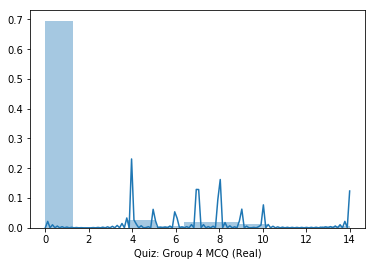

In [562]:
plt.show()
# They are 7 students who got 0 on the first Quiz
# These 7 students could be considered not engaged.

In [346]:
m1mg.describe()

Course total (Real)  Quiz: Group 4 MCQ (Real)  \
count           122.000000                122.000000   
mean             43.060246                  0.827869   
std              19.182017                  2.475308   
min               0.000000                  0.000000   
25%              33.330000                  0.000000   
50%              43.330000                  0.000000   
75%              53.330000                  0.000000   
max              93.330000                 14.000000   

       Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.942623                     0.819672   
std                    2.613693                     2.256364   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   12.000000                    11.000000   

       Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.811475                     1.073770   
std                    2.224328                     2.960255   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   10.000000                    13.000000   

       Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
count                122.000000                   122.000000   
mean                   0.827869                     0.770492   
std                    2.478645                     2.452143   
min                    0.000000                     0.000000   
25%                    0.000000                     0.000000   
50%                    0.000000                     0.000000   
75%                    0.000000                     0.000000   
max                   13.000000                    13.000000   

       Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
count              122.000000              122.000000  
mean                 0.196721                0.040984  
std                  1.263861                0.452679  
min                  0.000000                0.000000  
25%                  0.000000                0.000000  
50%                  0.000000                0.000000  
75%                  0.000000                0.000000  
max                 10.000000                5.000000

In [105]:
print(m1mg.info())
# Total columns 13 
# 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
First name                     122 non-null object
Surname                        122 non-null object
ID number                      122 non-null object
Course total (Real)            122 non-null float64
Quiz: Group 4 MCQ (Real)       122 non-null int64
Quiz: Group 5 MCQ (Real)       122 non-null int64
Quiz: Group 5 - MCQ2 (Real)    122 non-null int64
Quiz: Group 6 MCQ (Real)       122 non-null int64
Quiz: Group 6 - MCQ2 (Real)    122 non-null int64
Quiz: Group 7 MCQ (Real)       122 non-null int64
Quiz: Group 7 - MCQ2 (Real)    122 non-null int64
Quiz: Late MCQ1 (Real)         122 non-null int64
Quiz: Late MCQ2 (Real)         122 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 12.5+ KB
None


In [83]:
m1mg.count()
# There is 122 students in module 1

First name                     122
Surname                        122
Course total (Real)            122
Quiz: Group 4 MCQ (Real)       122
Quiz: Group 5 MCQ (Real)       122
Quiz: Group 5 - MCQ2 (Real)    122
Quiz: Group 6 MCQ (Real)       122
Quiz: Group 6 - MCQ2 (Real)    122
Quiz: Group 7 MCQ (Real)       122
Quiz: Group 7 - MCQ2 (Real)    122
Quiz: Late MCQ1 (Real)         122
Quiz: Late MCQ2 (Real)         122
dtype: int64

In [106]:
print(m1mg['Course total (Real)'].value_counts(dropna=False))
# What are the value counts of the different marks


46.67    12
53.33    11
40.00    11
0.00     10
50.00    10
43.33    10
36.67    10
26.67     9
33.33     6
56.67     6
30.00     6
60.00     5
73.33     5
80.00     2
66.67     2
20.00     2
83.33     2
70.00     1
93.33     1
76.67     1
Name: Course total (Real), dtype: int64


In [110]:
# Describe the column
print(m1mg['Course total (Real)'].describe())


count    122.000000
mean      43.060246
std       19.182017
min        0.000000
25%       33.330000
50%       43.330000
75%       53.330000
max       93.330000
Name: Course total (Real), dtype: float64


In [108]:
# Plot the histogram
m1mg['Course total (Real)'].plot(kind='hist', rot=70, logx=True, logy=True)

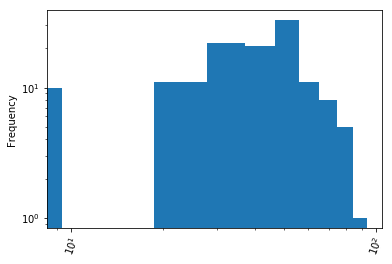

In [109]:
plt.show()

In [107]:
print(m1mg['Quiz: Group 4 MCQ (Real)'].value_counts(dropna=False))
# What are the value counts of the different marks
# For the first quiz

0     108
8       3
7       3
4       3
14      1
10      1
9       1
6       1
5       1
Name: Quiz: Group 4 MCQ (Real), dtype: int64


In [111]:
print(m1mg['Quiz: Group 4 MCQ (Real)'].describe())


count    122.000000
mean       0.827869
std        2.475308
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       14.000000
Name: Quiz: Group 4 MCQ (Real), dtype: float64


In [84]:
m1mg.head()
# There are 9 Quizzes in Total in Module 1

First name Surname  Course total (Real)  Quiz: Group 4 MCQ (Real)  \
0       a8NM    bDqB                46.67                         7   
1       aSnR    bGk9                36.67                         0   
2       aAK5    bSAb                53.33                         0   
3       a4jV    bO8M                 0.00                         0   
4       aa14    bMdv                46.67                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

In [123]:
# Create the boxplot
m1mg.boxplot(column='Course total (Real)', rot=90)


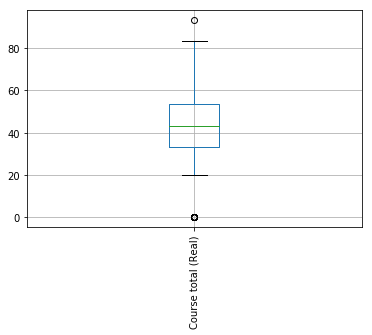

In [113]:
plt.show()

In [122]:
# Create the boxplot
m1mg.boxplot(column='Course total (Real)',by ='Surname', rot=90)


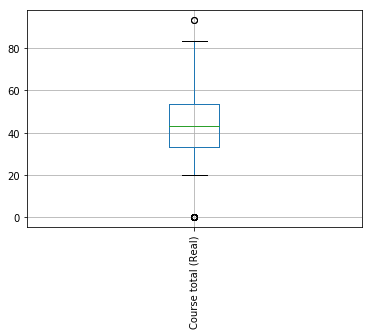

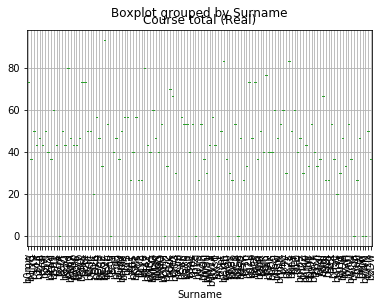

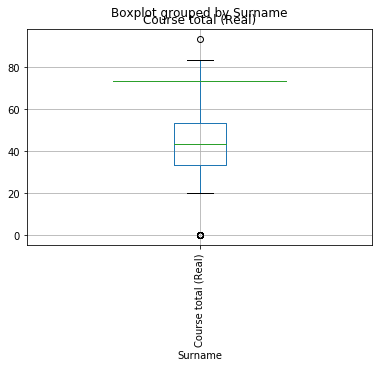

In [124]:
plt.show()

In [126]:
m1mg.head()

First name Surname ID number  Course total (Real)  Quiz: Group 4 MCQ (Real)  \
0       a8NM    bDqB  U8NMDqBG                46.67                         7   
1       aSnR    bGk9  VSnRGk9O                36.67                         0   
2       aAK5    bSAb  tAK5SAbE                53.33                         0   
3       a4jV    bO8M  14jVO8M7                 0.00                         0   
4       aa14    bMdv  ba14Mdv9                46.67                         0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0

In [134]:
print(m1mg.index)

RangeIndex(start=0, stop=122, step=1)


In [129]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Group 4 MCQ (Real)', rot=70)
# For scatter plot value must be numberic


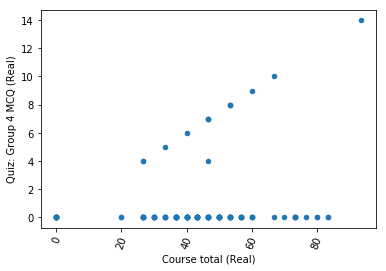

In [130]:
plt.show()
#  there is a strong correlation between students getting more than 6 in first MCQ and then passing the exam

In [131]:
m1mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Late MCQ2 (Real)', rot=70)


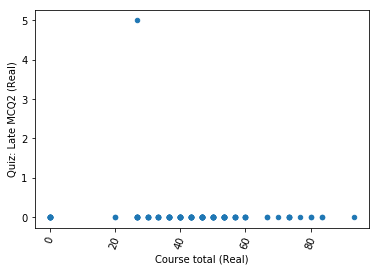

In [132]:
plt.show()
# People who did the last quiz - 5 ended with failing 

In [225]:
# Reading DataFrames from multiple files in a loop
#

# Create the list of file names: filenames
filenamesm1 = ['Module1-LecturersGrades.csv', 'Module1-MoodleGrades.csv', 'Module1-MoodleLogs.csv']


In [8]:
pwd

'C:\\Users\\Newrowsquare\\Documents'

In [226]:
# Create the list of three DataFrames: dataframes
dataframesm1 = []
for filename in filenamesm1:
    dataframesm1.append(pd.read_csv(filename))
    
# Print top 5 rows of 1st DataFrame in dataframes
print(dataframesm1[0].head())


    id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45
2   64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3   79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4  101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10


In [227]:
print(dataframesm1)

[     id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0   105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1    38   wTka80ff  b80f, aTka    44      46     45.0                 45
2    64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3    79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4   101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10
5    40   z7nAx4iB  bx4i, a7nA    24      28     26.0                 26
6    50   LmZdJI1B  bJI1, amZd    14       0      7.0                  7
7    48   I0V11X9O  b1X9, a0V1    30      51     40.5                 41
8    74   RxBNPexL  bPex, axBN    74      73     73.5                 74
9    98   UnsWuTWC  buTW, ansW     6       0      3.0                  3
10   89   V4gLk3Vw  bk3V, a4gL    36      35     35.5                 36
11   69   B2C9YptM  bYpt, a2C9    52      43     47.5                 48
12  107   lml3aGhT  baGh, aml3    37      63     5

In [296]:
## MERGING ##
# merge1.1_ffill = pd.merge_ordered(module1lg,module1mg, on='Student Id',suffixes=['_lg','_mg'],fill_method='ffill')
# merge1_1 = pd.merge_ordered(module1lg,module1mg, on='Student Id',suffixes=['_lg','_mg'])
#pd.merge(module1mg,module1lg , on='First Name')

In [297]:
#merge_outer1_1 = pd.merge(module1lg, module1mg, how='outer')
#combined = pd.merge(module1lg, module1mg, left_on='Student Id', right_on='ID number')


In [89]:
# Merge attempt 1
combined1_ml_lg = pd.merge(module1ml, module1lg, left_on='User full name', right_on='Name')


In [90]:
print(combined1_ml_lg)

Empty DataFrame
Columns: [Time, User full name, Affected user, Event context, Component, Event name, Description, Origin, IP address, id, Student Id, Name, % CA, % exam, Average, Final(Rounded Up)]
Index: []


In [92]:
combined1_ml_lg.tail()

Empty DataFrame
Columns: [Time, User full name, Affected user, Event context, Component, Event name, Description, Origin, IP address, id, Student Id, Name, % CA, % exam, Average, Final(Rounded Up)]
Index: []

In [262]:
# Merge attempt 2
#outer1_ml_lg = pd.merge(module1ml, module1lg, on=['User full name','Name'], suffixes=['_ml','_lg'],how='outer')


In [267]:
# You'll have to use the option sep='\t' because the file uses tabs to delimit fields (pd.read_csv() expects commas by default).

delimitfields_mlg1 = pd.read_csv('Module1-MoodleLogs.csv', sep='\t')

In [98]:
module1lg['Final(Rounded Up)'].sort_index()

0     35
1     45
2     53
3     41
4     10
5     26
6      7
7     41
8     74
9      3
10    36
11    48
12    50
13    60
14    48
15    47
16    62
17    43
18    88
19    67
20    58
21    35
22    43
23    51
24    40
25    56
26    24
27    30
28    41
29    32
      ..
65    30
66    82
67    57
68    76
69    41
70    29
71    31
72    51
73    43
74    54
75    50
76    84
77     0
78    35
79    17
80    81
81    37
82    65
83    50
84    37
85    88
86    47
87     8
88    64
89    90
90    44
91    35
92    31
93    22
94    52
Name: Final(Rounded Up), Length: 95, dtype: int64

In [69]:
module1lg.sort_index()
# Sort index
# Leave as is

id        Name  % CA  % exam  Average  Final(Rounded Up)
Student Id                                                           
11cZyzNR     56  byzN, a1cZ    44      37     40.5                 41
14jVO8M7      4  bO8M, a4jV    20      40     30.0                 30
2JGsxonj     11  bxon, aJGs     0       0      0.0                  0
32RuK65R    110  bK65, a2Ru    38      45     41.5                 42
3F4rAV6x     35  bAV6, aF4r    40      56     48.0                 48
4zQJ83QV     65  b83Q, azQJ    54      40     47.0                 47
5XIv1jfi    121  b1jf, aXIv    40      40     40.0                 40
5nhO7J2M    114  b7J2, anhO    40      30     35.0                 35
6L20lLYB      7  blLY, aL20    66      63     64.5                 65
6glUwdaL     32  bwda, aglU     0       0      0.0                  0
71skqdl0     84  bqdl, a1sk    42      40     41.0                 41
758KM4Z1     29  bM4Z, a58K    46      44     45.0                 45
7Ww4gbRf     79  bgbR, aWw4    46      36     41.0                 41
7e1gAVbG    112  bAVb, ae1g    42      68     55.0                 55
89cr591H     94  b591, a9cr    72      80     76.0                 76
8A6BBfkf     26  bBfk, aA6B    68      55     61.5                 62
8PWLLY3W    103  bLY3, aPWL    30      41     35.5                 36
9k8RBNXk    118  bBNX, ak8R    62      31     46.5                 47
ABbHDJtL     97  bDJt, aBbH    24      57     40.5                 41
B2C9YptM     69  bYpt, a2C9    52      43     47.5                 48
BZHfgCtV     70  bgCt, aZHf    76      85     80.5                 81
CSiHHbMW     51  bHbM, aSiH    50      42     46.0                 46
CejKpyiR     93  bpyi, aejK    40      75     57.5                 58
Cey1NdSu     71  bNdS, aey1    40      40     40.0                 40
DS7xzDwW     83  bzDw, aS7x    42      47     44.5                 45
DpJQOQ2F    101  bOQ2, apJQ    20       0     10.0                 10
FjdRQnjO     14  bQnj, ajdR     0       0      0.0                  0
GiG1hcIK    122  bhcI, aiG1    58      62     60.0                 60
I0V11X9O     48  b1X9, a0V1    30      51     40.5                 41
J4I0KMcB     34  bKMc, a4I0    48      63     55.5                 56
...         ...         ...   ...     ...      ...                ...
l24RwcWj     80  bwcW, a24R    36      35     35.5                 36
lml3aGhT    107  baGh, aml3    37      63     50.0                 50
mBlDnnWk     61  bnnW, aBlD    44      57     50.5                 51
mKTHf5RD     96  bf5R, aKTH    16      18     17.0                 17
mcdrMSDD    106  bMSD, acdr    72      70     71.0                 71
mf9AQxPA     67  bQxP, af9A    52      75     63.5                 64
n2njr9jS     90  br9j, a2nj    26      36     31.0                 31
oDYJUlnu     88  bUln, aDYJ    16       0      8.0                  8
ond9WT1D     64  bWT1, and9    42      63     52.5                 53
pKpvLk6H     49  bLk6, aKpv    78      90     84.0                 84
pjiAp1Wy     81  bp1W, ajiA    32      21     26.5                 27
qHxCglhU    117  bglh, aHxC    86      90     88.0                 88
qfDKEXbx     17  bEXb, afDK    34      36     35.0                 35
qjrVTesk     12  bTes, ajrV    52      50     51.0                 51
sD2nqfdF     18  bqfd, aD2n    64      84     74.0                 74
t6Uc22AA     19  b22A, a6Uc    40      60     50.0                 50
tAK5SAbE      3  bSAb, aAK5    56      80     68.0                 68
tf0hW9uj     87  bW9u, af0h    36      35     35.5                 36
tzCYvQBD     10  bvQB, azCY    56      66     61.0                 61
uPi9ECZm     60  bECZ, aPi9    36      35     35.5                 36
uRzZgjR4     68  bgjR, aRzZ    48      56     52.0                 52
um5M1HGl      6  b1HG, am5M    46      40     43.0                 43
wTka80ff     38  b80f, aTka    44      46     45.0                 45
wiEd8PqG     15  b8Pq, aiEd    88      88     88.0                 88
xei9g2LG     42  bg2L, 

In [298]:
#findPattern()

In [194]:
print(module1lg.shape)
# What is the shape

(95, 6)


In [46]:
module1lg.info()
# Lecturer Grade info
# 95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
id                   95 non-null int64
Student Id           95 non-null object
Name                 95 non-null object
% CA                 95 non-null int64
% exam               95 non-null int64
Average              95 non-null float64
Final(Rounded Up)    95 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ KB


In [73]:
# module1lg.plot(kind = 'hist',bins = 50, range = 90, alpha=0.3)

In [156]:
module1lg.Average.value_counts()

35.0    6
35.5    6
40.5    4
0.0     4
50.0    3
31.0    2
68.0    2
40.0    2
51.0    2
56.5    2
26.5    2
82.0    2
88.0    2
43.0    2
76.0    2
45.0    2
41.0    2
59.5    1
48.0    1
54.5    1
31.5    1
30.0    1
24.0    1
55.5    1
52.5    1
10.0    1
57.5    1
26.0    1
66.5    1
7.0     1
       ..
52.0    1
60.0    1
42.5    1
44.0    1
89.5    1
63.5    1
8.0     1
47.0    1
36.5    1
64.5    1
37.0    1
80.5    1
17.0    1
84.0    1
54.0    1
29.0    1
55.0    1
29.5    1
36.0    1
44.5    1
57.0    1
61.0    1
71.0    1
53.0    1
46.0    1
61.5    1
74.0    1
50.5    1
22.0    1
41.5    1
Name: Average, Length: 65, dtype: int64

In [70]:
module1lg.Average.plot('hist')
# Average

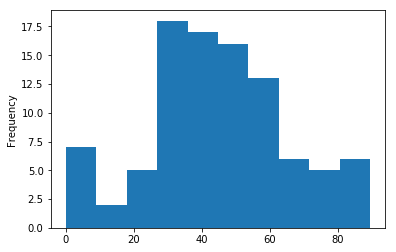

In [71]:
plt.show()

In [133]:
# Print the index of module1lg
print(module1lg.index)


RangeIndex(start=0, stop=95, step=1)


In [16]:
module1lg.head()
## Lecture grades
## Student Id = primary id
## module1lg 

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45
2   64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3   79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4  101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10

In [91]:
module1lg.Name.value_counts(dropna=False)
# Value count check

bb86, aZWk    1
bFjY, aRJD    1
bqfd, aD2n    1
bMSD, acdr    1
bvzH, a3bN    1
bW9u, af0h    1
bxon, aJGs    1
bk3V, a4gL    1
buTW, ansW    1
bUYS, aujR    1
b2dI, acj7    1
bMB1, aYyZ    1
binL, aW89    1
bSn1, aHCL    1
b1HG, am5M    1
bkZL, aM4c    1
bSXp, a322    1
bx4i, a7nA    1
bpWX, ap1Y    1
bwcW, a24R    1
bhmN, aBPm    1
bnnW, aBlD    1
bAV6, aF4r    1
b7J2, anhO    1
bPex, axBN    1
bpyi, aejK    1
b3wt, aiGp    1
bO8M, a4jV    1
bLk6, aKpv    1
bXsd, aOmN    1
             ..
bglh, aHxC    1
bECZ, aPi9    1
bSAb, aAK5    1
bhcI, aiG1    1
bzDw, aS7x    1
bg6b, aTcu    1
bgCt, aZHf    1
bGk9, aSnR    1
bQxP, af9A    1
bwda, aglU    1
bHxR, aWld    1
bDko, a2mi    1
bMdv, aa14    1
bWWA, atVF    1
bvQB, azCY    1
b22A, a6Uc    1
b1X9, a0V1    1
bLY3, aPWL    1
bK65, a2Ru    1
b591, a9cr    1
baOy, aw97    1
byWN, avO9    1
bBfk, aA6B    1
bJI1, amZd    1
bOQ2, apJQ    1
b1jf, aXIv    1
bf5R, aKTH    1
bQnj, ajdR    1
bDJt, aBbH    1
bABp, aeCe    1
Name: Name, Length: 95, 

In [99]:
m1mg.tail()

First name Surname ID number  Course total (Real)  \
117       ak8R    bBNX  9k8RBNXk                73.33   
118       a1de    bNfO  c1deNfOy                53.33   
119       afY5    bOiK  bfY5OiKA                70.00   
120       aXIv    b1jf  5XIv1jfi                43.33   
121       aiG1    bhcI  GiG1hcIK                60.00   

     Quiz: Group 4 MCQ (Real)  Quiz: Group 5 MCQ (Real)  \
117                         0                         0   
118                         0                         0   
119                         0                         0   
120                         0                         0   
121                         0                         0   

     Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
117                            0                         9   
118                            0                         6   
119                            0                         9   
120                            0                         0   
121                            0                         0   

     Quiz: Group 6 - MCQ2 (Real)  Quiz: Group 7 MCQ (Real)  \
117                           13                         0   
118                           10                         0   
119                           12                         0   
120                            0                         0   
121                            0                         0   

     Quiz: Group 7 - MCQ2 (Real)  Quiz: Late MCQ1 (Real)  \
117                            0                       0   
118                            0                       0   
119                            0                       0   
120                            0                       0   
121                            0                       0   

     Quiz: Late MCQ2 (Real)  
117                       0  
118                       0  
119                       0  
120                       0  
121                       0

In [94]:
m1mg.sort_index()
# Sorting index
# Sorts number then alphabetically

First name Surname  Course total (Real)  Quiz: Group 4 MCQ (Real)  \
0         a8NM    bDqB                46.67                         7   
1         aSnR    bGk9                36.67                         0   
2         aAK5    bSAb                53.33                         0   
3         a4jV    bO8M                 0.00                         0   
4         aa14    bMdv                46.67                         0   
5         am5M    b1HG                36.67                         0   
6         aL20    blLY                60.00                         0   
7         aw97    baOy                30.00                         0   
8         atVF    bWWA                56.67                         0   
9         azCY    bvQB                46.67                         0   
10        aJGs    bxon                 0.00                         0   
11        ajrV    bTes                53.33                         0   
12        aNBi    b8W7                46.67                         0   
13        ajdR    bQnj                 0.00                         0   
14        aiEd    b8Pq                80.00                         0   
15        a2mi    bDko                56.67                         0   
16        afDK    bEXb                53.33                         0   
17        aD2n    bqfd                66.67                         0   
18        a6Uc    b22A                46.67                         4   
19        a322    bSXp                53.33                         0   
20        aTcu    bg6b                46.67                         0   
21        aYZZ    bVOq                36.67                         0   
22        ag2x    bJ2S                56.67                         0   
23        aS1r    buSe                36.67                         0   
24        aYyZ    bMB1                40.00                         0   
25        aA6B    bBfk                73.33                         0   
26        asqg    bbCp                53.33                         0   
27        aHCL    bSn1                40.00                         0   
28        a58K    bM4Z                43.33                         0   
29        avO9    byWN                 0.00                         0   
..         ...     ...                  ...                       ...   
92        aejK    bpyi                33.33                         5   
93        a9cr    b591                60.00                         0   
94        aujR    bUYS                26.67                         0   
95        aKTH    bf5R                26.67                         0   
96        aBbH    bDJt                20.00                         0   
97        ansW    buTW                20.00                         0   
98        ae3w    bhew                46.67                         0   
99        aFet    bYC1                 0.00                         0   
100       apJQ    bOQ2                33.33                         0   
101       aRJD    bFjY                40.00                         0   
102       aPWL    bLY3                26.67                         4   
103       aWld    bHxR                56.67                         0   
104       aV38    bmp5                46.67                         0   
105       acdr    bMSD                60.00                         9   
106       aml3    baGh                36.67                         0   
107       an9y    b7rk                 0.00                         0   
108       a7t7    bfTq                33.33                         0   
109       a2Ru    bK65                40.00                         0   
110       aBPm    bhmN                53.33                         8   
111       ae1g    bAVb                46.67                         7   
112       aLoB    b4wd                36.67                         0   
113       anhO    b7J2                43.33                         0   
114       aAWa    b0mw                73.33                   

In [316]:
average_mean = np.mean(module1lg)
# Compute the mean


In [317]:
print(average_mean)
# Print the results with some nice formatting


id                   61.684211
% CA                 43.726316
% exam               46.747368
Average              45.236842
Final(Rounded Up)    45.421053
dtype: float64


In [100]:
module1lg

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0   105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1    38   wTka80ff  b80f, aTka    44      46     45.0                 45
2    64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3    79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4   101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10
5    40   z7nAx4iB  bx4i, a7nA    24      28     26.0                 26
6    50   LmZdJI1B  bJI1, amZd    14       0      7.0                  7
7    48   I0V11X9O  b1X9, a0V1    30      51     40.5                 41
8    74   RxBNPexL  bPex, axBN    74      73     73.5                 74
9    98   UnsWuTWC  buTW, ansW     6       0      3.0                  3
10   89   V4gLk3Vw  bk3V, a4gL    36      35     35.5                 36
11   69   B2C9YptM  bYpt, a2C9    52      43     47.5                 48
12  107   lml3aGhT  baGh, aml3    37      63     50.0                 50
13  104   gWldHxR8  bHxR, aWld    66      53     59.5                 60
14   35   3F4rAV6x  bAV6, aF4r    40      56     48.0                 48
15  118   9k8RBNXk  bBNX, ak8R    62      31     46.5                 47
16   42   xei9g2LG  bg2L, aei9    64      60     62.0                 62
17   43   KzM9t8tG  bt8t, azM9    50      36     43.0                 43
18  117   qHxCglhU  bglh, aHxC    86      90     88.0                 88
19   16   z2miDkoM  bDko, a2mi    60      73     66.5                 67
20   93   CejKpyiR  bpyi, aejK    40      75     57.5                 58
21  114   5nhO7J2M  b7J2, anhO    40      30     35.0                 35
22    6   um5M1HGl  b1HG, am5M    46      40     43.0                 43
23   24   KS1ruSeJ  buSe, aS1r    40      62     51.0                 51
24   71   Cey1NdSu  bNdS, aey1    40      40     40.0                 40
25   34   J4I0KMcB  bKMc, a4I0    48      63     55.5                 56
26   37   zfWkKiFa  bKiF, afWk     8      40     24.0                 24
27    4   14jVO8M7  bO8M, a4jV    20      40     30.0                 30
28   97   ABbHDJtL  bDJt, aBbH    24      57     40.5                 41
29   66   i3bNvzHv  bvzH, a3bN    28      35     31.5                 32
..  ...        ...         ...   ...     ...      ...                ...
65  109   g7t7fTqU  bfTq, a7t7    24      35     29.5                 30
66  111   MBPmhmNk  bhmN, aBPm    74      90     82.0                 82
67   25   RYyZMB1V  bMB1, aYyZ    60      53     56.5                 57
68   94   89cr591H  b591, a9cr    72      80     76.0                 76
69   84   71skqdl0  bqdl, a1sk    42      40     41.0                 41
70    5   ba14Mdv9  bMdv, aa14    14      44     29.0                 29
71   28   jHCLSn1y  bSn1, aHCL    30      32     31.0                 31
72   12   qjrVTesk  bTes, ajrV    52      50     51.0                 51
73   21   LTcug6b4  bg6b, aTcu    44      41     42.5                 43
74    8   fw97aOyU  baOy, aw97    38      70     54.0                 54
75  119   c1deNfOy  bNfO, a1de    70      30     50.0                 50
76   49   pKpvLk6H  bLk6, aKpv    78      90     84.0                 84
77   30   bvO9yWNl  byWN, avO9     0       0      0.0                  0
78   91   yp1YpWXh  bpWX, ap1Y    38      32     35.0                 35
79   96   mKTHf5RD  bf5R, aKTH    16      18     17.0                 17
80   70   BZHfgCtV  bgCt, aZHf    76      85     80.5                 81
81   52   kcj72dIk  b2dI, acj7    44      30     37.0                 37
82    7   6L20lLYB  blLY, aL20    66      63     64.5                 65
83   19   t6Uc22AA  b22A, a6Uc    40      60     50.0                 50
84   62   LW3JhQ6U  bhQ6, aW3J    36      37     36.5                 37
85   15   wiEd8PqG  b8Pq, aiEd    88      88     88.0                 88
86   65   4zQJ83QV  b83Q, azQJ    54      40     47.0                 47
87   88   oDYJUlnu  bUln, aDYJ    16       0      8.0          

In [230]:
print(module1mg.index)
# The Dataframe index

Index(['U8NMDqBG', 'VSnRGk9O', 'tAK5SAbE', '14jVO8M7', 'ba14Mdv9', 'um5M1HGl',
       '6L20lLYB', 'fw97aOyU', 'btVFWWA9', 'tzCYvQBD',
       ...
       'qLoB4wdH', '5nhO7J2M', 'CAWa0mw8', 'aWg7lrD6', 'qHxCglhU', '9k8RBNXk',
       'c1deNfOy', 'bfY5OiKA', '5XIv1jfi', 'GiG1hcIK'],
      dtype='object', name='ID number', length=122)


In [195]:
print(module1mg.shape)

(122, 29)


In [182]:
print(type(module1mg.index))

<class 'pandas.core.indexes.base.Index'>


In [299]:
# ordered = ['aW']
# module1mg_reindex = module1mg.reindex(ordered)

In [184]:
module1mg.sort_index()
# Sorting index
# Sorts number then alphabetically

First name Surname            Email address  Course total (Real)  \
ID number                                                                    
11cZyzNR        a1cZ    byzN  11cZyzNR@student.itb.ie                50.00   
14jVO8M7        a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
2JGsxonj        aJGs    bxon  2JGsxonj@student.itb.ie                 0.00   
32RuK65R        a2Ru    bK65  32RuK65R@student.itb.ie                40.00   
3F4rAV6x        aF4r    bAV6  3F4rAV6x@student.itb.ie                43.33   
4zQJ83QV        azQJ    b83Q  4zQJ83QV@student.itb.ie                43.33   
5XIv1jfi        aXIv    b1jf  5XIv1jfi@student.itb.ie                43.33   
5nhO7J2M        anhO    b7J2  5nhO7J2M@student.itb.ie                43.33   
6L20lLYB        aL20    blLY  6L20lLYB@student.itb.ie                60.00   
6glUwdaL        aglU    bwda  6glUwdaL@student.itb.ie                 0.00   
71skqdl0        a1sk    bqdl  71skqdl0@student.itb.ie                36.67   
758KM4Z1        a58K    bM4Z  758KM4Z1@student.itb.ie                43.33   
7Ww4gbRf        aWw4    bgbR  7Ww4gbRf@student.itb.ie                50.00   
7e1gAVbG        ae1g    bAVb  7e1gAVbG@student.itb.ie                46.67   
89cr591H        a9cr    b591  89cr591H@student.itb.ie                60.00   
8A6BBfkf        aA6B    bBfk  8A6BBfkf@student.itb.ie                73.33   
8K80FqHS        aK80    bFqH  8K80FqHS@student.itb.ie                46.67   
8PWLLY3W        aPWL    bLY3  8PWLLY3W@student.itb.ie                26.67   
9k8RBNXk        ak8R    bBNX  9k8RBNXk@student.itb.ie                73.33   
ABbHDJtL        aBbH    bDJt  ABbHDJtL@student.itb.ie                20.00   
B2C9YptM        a2C9    bYpt  B2C9YptM@student.itb.ie                50.00   
BZHfgCtV        aZHf    bgCt  BZHfgCtV@student.itb.ie                73.33   
CAWa0mw8        aAWa    b0mw  CAWa0mw8@student.itb.ie                73.33   
CPxrd5ew        aPxr    bd5e  CPxrd5ew@student.itb.ie                 0.00   
CSiHHbMW        aSiH    bHbM  CSiHHbMW@student.itb.ie                50.00   
CejKpyiR        aejK    bpyi  CejKpyiR@student.itb.ie                33.33   
Cey1NdSu        aey1    bNdS  Cey1NdSu@student.itb.ie                40.00   
Cg2xJ2Si        ag2x    bJ2S  Cg2xJ2Si@student.itb.ie                56.67   
DS7xzDwW        aS7x    bzDw  DS7xzDwW@student.itb.ie                36.67   
DpJQOQ2F        apJQ    bOQ2  DpJQOQ2F@student.itb.ie                33.33   
...              ...     ...                      ...                  ...   
n2njr9jS        a2nj    br9j  n2njr9jS@student.itb.ie                26.67   
oDYJUlnu        aDYJ    bUln  oDYJUlnu@student.itb.ie                53.33   
ond9WT1D        and9    bWT1  ond9WT1D@student.itb.ie                43.33   
pKpvLk6H        aKpv    bLk6  pKpvLk6H@student.itb.ie                80.00   
pjiAp1Wy        ajiA    bp1W  pjiAp1Wy@student.itb.ie                33.33   
qHxCglhU        aHxC    bglh  qHxCglhU@student.itb.ie                76.67   
qLoB4wdH        aLoB    b4wd  qLoB4wdH@student.itb.ie                36.67   
qfDKEXbx        afDK    bEXb  qfDKEXbx@student.itb.ie                53.33   
qjrVTesk        ajrV    bTes  qjrVTesk@student.itb.ie                53.33   
sD2nqfdF        aD2n    bqfd  sD2nqfdF@student.itb.ie                66.67   
sYZZVOqR        aYZZ    bVOq  sYZZVOqR@student.itb.ie                36.67   
t6Uc22AA        a6Uc    b22A  t6Uc22AA@student.itb.ie                46.67   
tAK5SAbE        aAK5    bSAb  tAK5SAbE@student.itb.ie                53.33   
tf0hW9uj        af0h    bW9u  tf0hW9uj@student.itb.ie                30.00   
tzCYvQBD        azCY    bvQB  tzCYvQBD@student.itb.ie                46.67   
uPi9ECZm        aPi9    bECZ  uPi9ECZm@student.itb.ie                33.33   
uRY9wYJe        aRY9    bwYJ  uRY9wYJe@student.itb.ie                53.33   
uRzZgjR4        aRzZ    bgjR  uRzZgjR4@student.itb.ie                40.00   
um5M1HGl        am5M    b1HG  um

In [74]:
module1mg_df = module1mg.rename(columns={'ID number': 'Student Id'})
# Try to rename columns


NameError: name 'module1mg' is not defined

In [246]:
module1mg_df

First name Surname            Email address  Course total (Real)  \
ID number                                                                    
U8NMDqBG        a8NM    bDqB  U8NMDqBG@student.itb.ie                46.67   
VSnRGk9O        aSnR    bGk9  VSnRGk9O@student.itb.ie                36.67   
tAK5SAbE        aAK5    bSAb  tAK5SAbE@student.itb.ie                53.33   
14jVO8M7        a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
ba14Mdv9        aa14    bMdv  ba14Mdv9@student.itb.ie                46.67   
um5M1HGl        am5M    b1HG  um5M1HGl@student.itb.ie                36.67   
6L20lLYB        aL20    blLY  6L20lLYB@student.itb.ie                60.00   
fw97aOyU        aw97    baOy  fw97aOyU@student.itb.ie                30.00   
btVFWWA9        atVF    bWWA  btVFWWA9@student.itb.ie                56.67   
tzCYvQBD        azCY    bvQB  tzCYvQBD@student.itb.ie                46.67   
2JGsxonj        aJGs    bxon  2JGsxonj@student.itb.ie                 0.00   
qjrVTesk        ajrV    bTes  qjrVTesk@student.itb.ie                53.33   
lNBi8W7k        aNBi    b8W7  lNBi8W7k@student.itb.ie                46.67   
FjdRQnjO        ajdR    bQnj  FjdRQnjO@student.itb.ie                 0.00   
wiEd8PqG        aiEd    b8Pq  wiEd8PqG@student.itb.ie                80.00   
z2miDkoM        a2mi    bDko  z2miDkoM@student.itb.ie                56.67   
qfDKEXbx        afDK    bEXb  qfDKEXbx@student.itb.ie                53.33   
sD2nqfdF        aD2n    bqfd  sD2nqfdF@student.itb.ie                66.67   
t6Uc22AA        a6Uc    b22A  t6Uc22AA@student.itb.ie                46.67   
z322SXpu        a322    bSXp  z322SXpu@student.itb.ie                53.33   
LTcug6b4        aTcu    bg6b  LTcug6b4@student.itb.ie                46.67   
sYZZVOqR        aYZZ    bVOq  sYZZVOqR@student.itb.ie                36.67   
Cg2xJ2Si        ag2x    bJ2S  Cg2xJ2Si@student.itb.ie                56.67   
KS1ruSeJ        aS1r    buSe  KS1ruSeJ@student.itb.ie                36.67   
RYyZMB1V        aYyZ    bMB1  RYyZMB1V@student.itb.ie                40.00   
8A6BBfkf        aA6B    bBfk  8A6BBfkf@student.itb.ie                73.33   
JsqgbCpo        asqg    bbCp  JsqgbCpo@student.itb.ie                53.33   
jHCLSn1y        aHCL    bSn1  jHCLSn1y@student.itb.ie                40.00   
758KM4Z1        a58K    bM4Z  758KM4Z1@student.itb.ie                43.33   
bvO9yWNl        avO9    byWN  bvO9yWNl@student.itb.ie                 0.00   
...              ...     ...                      ...                  ...   
CejKpyiR        aejK    bpyi  CejKpyiR@student.itb.ie                33.33   
89cr591H        a9cr    b591  89cr591H@student.itb.ie                60.00   
YujRUYS3        aujR    bUYS  YujRUYS3@student.itb.ie                26.67   
mKTHf5RD        aKTH    bf5R  mKTHf5RD@student.itb.ie                26.67   
ABbHDJtL        aBbH    bDJt  ABbHDJtL@student.itb.ie                20.00   
UnsWuTWC        ansW    buTW  UnsWuTWC@student.itb.ie                20.00   
We3whewJ        ae3w    bhew  We3whewJ@student.itb.ie                46.67   
aFetYC1J        aFet    bYC1  aFetYC1J@student.itb.ie                 0.00   
DpJQOQ2F        apJQ    bOQ2  DpJQOQ2F@student.itb.ie                33.33   
XRJDFjYd        aRJD    bFjY  XRJDFjYd@student.itb.ie                40.00   
8PWLLY3W        aPWL    bLY3  8PWLLY3W@student.itb.ie                26.67   
gWldHxR8        aWld    bHxR  gWldHxR8@student.itb.ie                56.67   
iV38mp5J        aV38    bmp5  iV38mp5J@student.itb.ie                46.67   
mcdrMSDD        acdr    bMSD  mcdrMSDD@student.itb.ie                60.00   
lml3aGhT        aml3    baGh  lml3aGhT@student.itb.ie                36.67   
ln9y7rkB        an9y    b7rk  ln9y7rkB@student.itb.ie                 0.00   
g7t7fTqU        a7t7    bfTq  g7t7fTqU@student.itb.ie                33.33   
32RuK65R        a2Ru    bK65  32RuK65R@student.itb.ie                40.00   
MBPmhmNk        aBPm    bhmN  MB

In [301]:

#combined = pd.merge(module1lg, module1mg, left_on='Student Id', right_on='ID number')


In [242]:
module1mg_df

First name Surname            Email address  Course total (Real)  \
ID number                                                                    
U8NMDqBG        a8NM    bDqB  U8NMDqBG@student.itb.ie                46.67   
VSnRGk9O        aSnR    bGk9  VSnRGk9O@student.itb.ie                36.67   
tAK5SAbE        aAK5    bSAb  tAK5SAbE@student.itb.ie                53.33   
14jVO8M7        a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
ba14Mdv9        aa14    bMdv  ba14Mdv9@student.itb.ie                46.67   
um5M1HGl        am5M    b1HG  um5M1HGl@student.itb.ie                36.67   
6L20lLYB        aL20    blLY  6L20lLYB@student.itb.ie                60.00   
fw97aOyU        aw97    baOy  fw97aOyU@student.itb.ie                30.00   
btVFWWA9        atVF    bWWA  btVFWWA9@student.itb.ie                56.67   
tzCYvQBD        azCY    bvQB  tzCYvQBD@student.itb.ie                46.67   
2JGsxonj        aJGs    bxon  2JGsxonj@student.itb.ie                 0.00   
qjrVTesk        ajrV    bTes  qjrVTesk@student.itb.ie                53.33   
lNBi8W7k        aNBi    b8W7  lNBi8W7k@student.itb.ie                46.67   
FjdRQnjO        ajdR    bQnj  FjdRQnjO@student.itb.ie                 0.00   
wiEd8PqG        aiEd    b8Pq  wiEd8PqG@student.itb.ie                80.00   
z2miDkoM        a2mi    bDko  z2miDkoM@student.itb.ie                56.67   
qfDKEXbx        afDK    bEXb  qfDKEXbx@student.itb.ie                53.33   
sD2nqfdF        aD2n    bqfd  sD2nqfdF@student.itb.ie                66.67   
t6Uc22AA        a6Uc    b22A  t6Uc22AA@student.itb.ie                46.67   
z322SXpu        a322    bSXp  z322SXpu@student.itb.ie                53.33   
LTcug6b4        aTcu    bg6b  LTcug6b4@student.itb.ie                46.67   
sYZZVOqR        aYZZ    bVOq  sYZZVOqR@student.itb.ie                36.67   
Cg2xJ2Si        ag2x    bJ2S  Cg2xJ2Si@student.itb.ie                56.67   
KS1ruSeJ        aS1r    buSe  KS1ruSeJ@student.itb.ie                36.67   
RYyZMB1V        aYyZ    bMB1  RYyZMB1V@student.itb.ie                40.00   
8A6BBfkf        aA6B    bBfk  8A6BBfkf@student.itb.ie                73.33   
JsqgbCpo        asqg    bbCp  JsqgbCpo@student.itb.ie                53.33   
jHCLSn1y        aHCL    bSn1  jHCLSn1y@student.itb.ie                40.00   
758KM4Z1        a58K    bM4Z  758KM4Z1@student.itb.ie                43.33   
bvO9yWNl        avO9    byWN  bvO9yWNl@student.itb.ie                 0.00   
...              ...     ...                      ...                  ...   
CejKpyiR        aejK    bpyi  CejKpyiR@student.itb.ie                33.33   
89cr591H        a9cr    b591  89cr591H@student.itb.ie                60.00   
YujRUYS3        aujR    bUYS  YujRUYS3@student.itb.ie                26.67   
mKTHf5RD        aKTH    bf5R  mKTHf5RD@student.itb.ie                26.67   
ABbHDJtL        aBbH    bDJt  ABbHDJtL@student.itb.ie                20.00   
UnsWuTWC        ansW    buTW  UnsWuTWC@student.itb.ie                20.00   
We3whewJ        ae3w    bhew  We3whewJ@student.itb.ie                46.67   
aFetYC1J        aFet    bYC1  aFetYC1J@student.itb.ie                 0.00   
DpJQOQ2F        apJQ    bOQ2  DpJQOQ2F@student.itb.ie                33.33   
XRJDFjYd        aRJD    bFjY  XRJDFjYd@student.itb.ie                40.00   
8PWLLY3W        aPWL    bLY3  8PWLLY3W@student.itb.ie                26.67   
gWldHxR8        aWld    bHxR  gWldHxR8@student.itb.ie                56.67   
iV38mp5J        aV38    bmp5  iV38mp5J@student.itb.ie                46.67   
mcdrMSDD        acdr    bMSD  mcdrMSDD@student.itb.ie                60.00   
lml3aGhT        aml3    baGh  lml3aGhT@student.itb.ie                36.67   
ln9y7rkB        an9y    b7rk  ln9y7rkB@student.itb.ie                 0.00   
g7t7fTqU        a7t7    bfTq  g7t7fTqU@student.itb.ie                33.33   
32RuK65R        a2Ru    bK65  32RuK65R@student.itb.ie                40.00   
MBPmhmNk        aBPm    bhmN  MB

In [197]:

# Reindex from a Dataframe index
test1Areindex = module1mg.reindex(module1lg.index)

In [198]:
# Print shape of test1A reindex
print(test1Areindex.shape)
# 95 x 29
# Would suggest 27 who did not pass

(95, 29)


In [199]:
test1Areindex

First name Surname            Email address  Course total (Real)  \
Student Id                                                                    
iV38mp5J         aV38    bmp5  iV38mp5J@student.itb.ie                46.67   
wTka80ff         aTka    b80f  wTka80ff@student.itb.ie                50.00   
ond9WT1D         and9    bWT1  ond9WT1D@student.itb.ie                43.33   
7Ww4gbRf         aWw4    bgbR  7Ww4gbRf@student.itb.ie                50.00   
DpJQOQ2F         apJQ    bOQ2  DpJQOQ2F@student.itb.ie                33.33   
z7nAx4iB         a7nA    bx4i  z7nAx4iB@student.itb.ie                26.67   
LmZdJI1B         amZd    bJI1  LmZdJI1B@student.itb.ie                26.67   
I0V11X9O         a0V1    b1X9  I0V11X9O@student.itb.ie                50.00   
RxBNPexL         axBN    bPex  RxBNPexL@student.itb.ie                66.67   
UnsWuTWC         ansW    buTW  UnsWuTWC@student.itb.ie                20.00   
V4gLk3Vw         a4gL    bk3V  V4gLk3Vw@student.itb.ie                30.00   
B2C9YptM         a2C9    bYpt  B2C9YptM@student.itb.ie                50.00   
lml3aGhT         aml3    baGh  lml3aGhT@student.itb.ie                36.67   
gWldHxR8         aWld    bHxR  gWldHxR8@student.itb.ie                56.67   
3F4rAV6x         aF4r    bAV6  3F4rAV6x@student.itb.ie                43.33   
9k8RBNXk         ak8R    bBNX  9k8RBNXk@student.itb.ie                73.33   
xei9g2LG         aei9    bg2L  xei9g2LG@student.itb.ie                73.33   
KzM9t8tG         azM9    bt8t  KzM9t8tG@student.itb.ie                53.33   
qHxCglhU         aHxC    bglh  qHxCglhU@student.itb.ie                76.67   
z2miDkoM         a2mi    bDko  z2miDkoM@student.itb.ie                56.67   
CejKpyiR         aejK    bpyi  CejKpyiR@student.itb.ie                33.33   
5nhO7J2M         anhO    b7J2  5nhO7J2M@student.itb.ie                43.33   
um5M1HGl         am5M    b1HG  um5M1HGl@student.itb.ie                36.67   
KS1ruSeJ         aS1r    buSe  KS1ruSeJ@student.itb.ie                36.67   
Cey1NdSu         aey1    bNdS  Cey1NdSu@student.itb.ie                40.00   
J4I0KMcB         a4I0    bKMc  J4I0KMcB@student.itb.ie                56.67   
zfWkKiFa         afWk    bKiF  zfWkKiFa@student.itb.ie                26.67   
14jVO8M7         a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
ABbHDJtL         aBbH    bDJt  ABbHDJtL@student.itb.ie                20.00   
i3bNvzHv         a3bN    bvzH  i3bNvzHv@student.itb.ie                33.33   
...               ...     ...                      ...                  ...   
g7t7fTqU         a7t7    bfTq  g7t7fTqU@student.itb.ie                33.33   
MBPmhmNk         aBPm    bhmN  MBPmhmNk@student.itb.ie                53.33   
RYyZMB1V         aYyZ    bMB1  RYyZMB1V@student.itb.ie                40.00   
89cr591H         a9cr    b591  89cr591H@student.itb.ie                60.00   
71skqdl0         a1sk    bqdl  71skqdl0@student.itb.ie                36.67   
ba14Mdv9         aa14    bMdv  ba14Mdv9@student.itb.ie                46.67   
jHCLSn1y         aHCL    bSn1  jHCLSn1y@student.itb.ie                40.00   
qjrVTesk         ajrV    bTes  qjrVTesk@student.itb.ie                53.33   
LTcug6b4         aTcu    bg6b  LTcug6b4@student.itb.ie                46.67   
fw97aOyU         aw97    baOy  fw97aOyU@student.itb.ie                30.00   
c1deNfOy         a1de    bNfO  c1deNfOy@student.itb.ie                53.33   
pKpvLk6H         aKpv    bLk6  pKpvLk6H@student.itb.ie                80.00   
bvO9yWNl         avO9    byWN  bvO9yWNl@student.itb.ie                 0.00   
yp1YpWXh         ap1Y    bpWX  yp1YpWXh@student.itb.ie                40.00   
mKTHf5RD         aKTH    bf5R  mKTHf5RD@student.itb.ie                26.67   
BZHfgCtV         aZHf    bgCt  BZHfgCtV@student.itb.ie                73.33   
kcj72dIk         acj7    b2dI  kcj72dIk@student.itb.ie                43.33   
6L20lLYB         aL20    blLY  6L20lLYB@student.itb.ie       

In [190]:
test1Breindex = module1lg.reindex(module1mg.index)

In [192]:
test1Breindex
# 122 x 6

id        Name  % CA  % exam  Average  Final(Rounded Up)
ID number                                                             
U8NMDqBG     NaN         NaN   NaN     NaN      NaN                NaN
VSnRGk9O     2.0  bGk9, aSnR  26.0    27.0     26.5               27.0
tAK5SAbE     3.0  bSAb, aAK5  56.0    80.0     68.0               68.0
14jVO8M7     4.0  bO8M, a4jV  20.0    40.0     30.0               30.0
ba14Mdv9     5.0  bMdv, aa14  14.0    44.0     29.0               29.0
um5M1HGl     6.0  b1HG, am5M  46.0    40.0     43.0               43.0
6L20lLYB     7.0  blLY, aL20  66.0    63.0     64.5               65.0
fw97aOyU     8.0  baOy, aw97  38.0    70.0     54.0               54.0
btVFWWA9     9.0  bWWA, atVF  56.0    57.0     56.5               57.0
tzCYvQBD    10.0  bvQB, azCY  56.0    66.0     61.0               61.0
2JGsxonj    11.0  bxon, aJGs   0.0     0.0      0.0                0.0
qjrVTesk    12.0  bTes, ajrV  52.0    50.0     51.0               51.0
lNBi8W7k     NaN         NaN   NaN     NaN      NaN                NaN
FjdRQnjO    14.0  bQnj, ajdR   0.0     0.0      0.0                0.0
wiEd8PqG    15.0  b8Pq, aiEd  88.0    88.0     88.0               88.0
z2miDkoM    16.0  bDko, a2mi  60.0    73.0     66.5               67.0
qfDKEXbx    17.0  bEXb, afDK  34.0    36.0     35.0               35.0
sD2nqfdF    18.0  bqfd, aD2n  64.0    84.0     74.0               74.0
t6Uc22AA    19.0  b22A, a6Uc  40.0    60.0     50.0               50.0
z322SXpu    20.0  bSXp, a322  50.0    56.0     53.0               53.0
LTcug6b4    21.0  bg6b, aTcu  44.0    41.0     42.5               43.0
sYZZVOqR     NaN         NaN   NaN     NaN      NaN                NaN
Cg2xJ2Si     NaN         NaN   NaN     NaN      NaN                NaN
KS1ruSeJ    24.0  buSe, aS1r  40.0    62.0     51.0               51.0
RYyZMB1V    25.0  bMB1, aYyZ  60.0    53.0     56.5               57.0
8A6BBfkf    26.0  bBfk, aA6B  68.0    55.0     61.5               62.0
JsqgbCpo     NaN         NaN   NaN     NaN      NaN                NaN
jHCLSn1y    28.0  bSn1, aHCL  30.0    32.0     31.0               31.0
758KM4Z1    29.0  bM4Z, a58K  46.0    44.0     45.0               45.0
bvO9yWNl    30.0  byWN, avO9   0.0     0.0      0.0                0.0
...          ...         ...   ...     ...      ...                ...
CejKpyiR    93.0  bpyi, aejK  40.0    75.0     57.5               58.0
89cr591H    94.0  b591, a9cr  72.0    80.0     76.0               76.0
YujRUYS3    95.0  bUYS, aujR  26.0    46.0     36.0               36.0
mKTHf5RD    96.0  bf5R, aKTH  16.0    18.0     17.0               17.0
ABbHDJtL    97.0  bDJt, aBbH  24.0    57.0     40.5               41.0
UnsWuTWC    98.0  buTW, ansW   6.0     0.0      3.0                3.0
We3whewJ     NaN         NaN   NaN     NaN      NaN                NaN
aFetYC1J     NaN         NaN   NaN     NaN      NaN                NaN
DpJQOQ2F   101.0  bOQ2, apJQ  20.0     0.0     10.0               10.0
XRJDFjYd   102.0  bFjY, aRJD  34.0    36.0     35.0               35.0
8PWLLY3W   103.0  bLY3, aPWL  30.0    41.0     35.5               36.0
gWldHxR8   104.0  bHxR, aWld  66.0    53.0     59.5               60.0
iV38mp5J   105.0  bmp5, aV38  33.0    37.0     35.0               35.0
mcdrMSDD   106.0  bMSD, acdr  72.0    70.0     71.0               71.0
lml3aGhT   107.0  baGh, aml3  37.0    63.0     50.0               50.0
ln9y7rkB     NaN         NaN   NaN     NaN      NaN                NaN
g7t7fTqU   109.0  bfTq, a7t7  24.0    35.0     29.5               30.0
32RuK65R   110.0  bK65, a2Ru  38.0    45.0     41.5               42.0
MBPmhmNk   111.0  bhmN, aBPm  74.0    90.0     82.0               82.0
7e1gAVbG   112.0  bAVb, ae1g  42.0    68.0     55.0               55.0
qLoB4wdH     NaN         NaN   NaN     NaN      NaN                NaN
5nhO7J2M   114.0  b7J2, anhO  40.0    30.0     35.0               35.0
CAWa0mw8     NaN         NaN   NaN     NaN      NaN                NaN
aWg7lrD6     NaN         NaN   NaN    

In [200]:
# Drop rows with null counts: test1Breindex

test1Breindex_dropna = test1Breindex.dropna()

In [202]:
test1Breindex_dropna
# 95 x 6

id        Name  % CA  % exam  Average  Final(Rounded Up)
ID number                                                             
VSnRGk9O     2.0  bGk9, aSnR  26.0    27.0     26.5               27.0
tAK5SAbE     3.0  bSAb, aAK5  56.0    80.0     68.0               68.0
14jVO8M7     4.0  bO8M, a4jV  20.0    40.0     30.0               30.0
ba14Mdv9     5.0  bMdv, aa14  14.0    44.0     29.0               29.0
um5M1HGl     6.0  b1HG, am5M  46.0    40.0     43.0               43.0
6L20lLYB     7.0  blLY, aL20  66.0    63.0     64.5               65.0
fw97aOyU     8.0  baOy, aw97  38.0    70.0     54.0               54.0
btVFWWA9     9.0  bWWA, atVF  56.0    57.0     56.5               57.0
tzCYvQBD    10.0  bvQB, azCY  56.0    66.0     61.0               61.0
2JGsxonj    11.0  bxon, aJGs   0.0     0.0      0.0                0.0
qjrVTesk    12.0  bTes, ajrV  52.0    50.0     51.0               51.0
FjdRQnjO    14.0  bQnj, ajdR   0.0     0.0      0.0                0.0
wiEd8PqG    15.0  b8Pq, aiEd  88.0    88.0     88.0               88.0
z2miDkoM    16.0  bDko, a2mi  60.0    73.0     66.5               67.0
qfDKEXbx    17.0  bEXb, afDK  34.0    36.0     35.0               35.0
sD2nqfdF    18.0  bqfd, aD2n  64.0    84.0     74.0               74.0
t6Uc22AA    19.0  b22A, a6Uc  40.0    60.0     50.0               50.0
z322SXpu    20.0  bSXp, a322  50.0    56.0     53.0               53.0
LTcug6b4    21.0  bg6b, aTcu  44.0    41.0     42.5               43.0
KS1ruSeJ    24.0  buSe, aS1r  40.0    62.0     51.0               51.0
RYyZMB1V    25.0  bMB1, aYyZ  60.0    53.0     56.5               57.0
8A6BBfkf    26.0  bBfk, aA6B  68.0    55.0     61.5               62.0
jHCLSn1y    28.0  bSn1, aHCL  30.0    32.0     31.0               31.0
758KM4Z1    29.0  bM4Z, a58K  46.0    44.0     45.0               45.0
bvO9yWNl    30.0  byWN, avO9   0.0     0.0      0.0                0.0
6glUwdaL    32.0  bwda, aglU   0.0     0.0      0.0                0.0
J4I0KMcB    34.0  bKMc, a4I0  48.0    63.0     55.5               56.0
3F4rAV6x    35.0  bAV6, aF4r  40.0    56.0     48.0               48.0
zfWkKiFa    37.0  bKiF, afWk   8.0    40.0     24.0               24.0
wTka80ff    38.0  b80f, aTka  44.0    46.0     45.0               45.0
...          ...         ...   ...     ...      ...                ...
tf0hW9uj    87.0  bW9u, af0h  36.0    35.0     35.5               36.0
oDYJUlnu    88.0  bUln, aDYJ  16.0     0.0      8.0                8.0
V4gLk3Vw    89.0  bk3V, a4gL  36.0    35.0     35.5               36.0
n2njr9jS    90.0  br9j, a2nj  26.0    36.0     31.0               31.0
yp1YpWXh    91.0  bpWX, ap1Y  38.0    32.0     35.0               35.0
YcLwkn3H    92.0  bkn3, acLw  50.0    20.0     35.0               35.0
CejKpyiR    93.0  bpyi, aejK  40.0    75.0     57.5               58.0
89cr591H    94.0  b591, a9cr  72.0    80.0     76.0               76.0
YujRUYS3    95.0  bUYS, aujR  26.0    46.0     36.0               36.0
mKTHf5RD    96.0  bf5R, aKTH  16.0    18.0     17.0               17.0
ABbHDJtL    97.0  bDJt, aBbH  24.0    57.0     40.5               41.0
UnsWuTWC    98.0  buTW, ansW   6.0     0.0      3.0                3.0
DpJQOQ2F   101.0  bOQ2, apJQ  20.0     0.0     10.0               10.0
XRJDFjYd   102.0  bFjY, aRJD  34.0    36.0     35.0               35.0
8PWLLY3W   103.0  bLY3, aPWL  30.0    41.0     35.5               36.0
gWldHxR8   104.0  bHxR, aWld  66.0    53.0     59.5               60.0
iV38mp5J   105.0  bmp5, aV38  33.0    37.0     35.0               35.0
mcdrMSDD   106.0  bMSD, acdr  72.0    70.0     71.0               71.0
lml3aGhT   107.0  baGh, aml3  37.0    63.0     50.0               50.0
g7t7fTqU   109.0  bfTq, a7t7  24.0    35.0     29.5               30.0
32RuK65R   110.0  bK65, a2Ru  38.0    45.0     41.5               42.0
MBPmhmNk   111.0  bhmN, aBPm  74.0    90.0     82.0               82.0
7e1gAVbG   112.0  bAVb, ae1g  42.0    68.0     55.0               55.0
5nhO7J2M   114.0  b7J2, anhO  40.0    

In [180]:
print(module1mg.mean)

<bound method DataFrame.mean of           First name Surname            Email address  Course total (Real)  \
ID number                                                                    
U8NMDqBG        a8NM    bDqB  U8NMDqBG@student.itb.ie                46.67   
VSnRGk9O        aSnR    bGk9  VSnRGk9O@student.itb.ie                36.67   
tAK5SAbE        aAK5    bSAb  tAK5SAbE@student.itb.ie                53.33   
14jVO8M7        a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
ba14Mdv9        aa14    bMdv  ba14Mdv9@student.itb.ie                46.67   
um5M1HGl        am5M    b1HG  um5M1HGl@student.itb.ie                36.67   
6L20lLYB        aL20    blLY  6L20lLYB@student.itb.ie                60.00   
fw97aOyU        aw97    baOy  fw97aOyU@student.itb.ie                30.00   
btVFWWA9        atVF    bWWA  btVFWWA9@student.itb.ie                56.67   
tzCYvQBD        azCY    bvQB  tzCYvQBD@student.itb.ie                46.67   
2JGsxonj        aJGs    bxon  2J

In [176]:
module1mg.head()

First name Surname            Email address  Course total (Real)  \
ID number                                                                    
U8NMDqBG        a8NM    bDqB  U8NMDqBG@student.itb.ie                46.67   
VSnRGk9O        aSnR    bGk9  VSnRGk9O@student.itb.ie                36.67   
tAK5SAbE        aAK5    bSAb  tAK5SAbE@student.itb.ie                53.33   
14jVO8M7        a4jV    bO8M  14jVO8M7@student.itb.ie                 0.00   
ba14Mdv9        aa14    bMdv  ba14Mdv9@student.itb.ie                46.67   

           Last downloaded from this course  \
ID number                                     
U8NMDqBG                         1550739556   
VSnRGk9O                         1550739556   
tAK5SAbE                         1550739556   
14jVO8M7                         1550739556   
ba14Mdv9                         1550739556   

           Assignment: Group 1 - Practical Test (Real)  \
ID number                                                
U8NMDqBG                                             0   
VSnRGk9O                                             0   
tAK5SAbE                                             0   
14jVO8M7                                             0   
ba14Mdv9                                             0   

           Assignment: Group 2 - Practical Test (Real)  \
ID number                                                
U8NMDqBG                                             0   
VSnRGk9O                                             0   
tAK5SAbE                                             0   
14jVO8M7                                             0   
ba14Mdv9                                             0   

           Assignment: Group 3 - Practical Test (Real)  \
ID number                                                
U8NMDqBG                                             0   
VSnRGk9O                                             0   
tAK5SAbE                                             0   
14jVO8M7                                             0   
ba14Mdv9                                             0   

           Assignment: Group 4 - Practical Test (Real)  \
ID number                                                
U8NMDqBG                                             0   
VSnRGk9O                                             0   
tAK5SAbE                                             0   
14jVO8M7                                             0   
ba14Mdv9                                             0   

           Assignment: Group 5 - Practical Test (Real)  \
ID number                                                
U8NMDqBG                                             0   
VSnRGk9O                                             0   
tAK5SAbE                                             0   
14jVO8M7                                             0   
ba14Mdv9                                             0   

                    ...            Quiz: Group 4 MCQ (Real)  \
ID number           ...                                       
U8NMDqBG            ...                                   7   
VSnRGk9O            ...                                   0   
tAK5SAbE            ...                                   0   
14jVO8M7            ...                                   0   
ba14Mdv9            ...                                   0   

           Quiz: Group 4 - MCQ2 (Real)  Quiz: Group 5 MCQ (Real)  \
ID number                                                          
U8NMDqBG                             0                         0   
VSnRGk9O                             0                         0   
tAK5SAbE                             0                         0   
14jVO8M7                             0                         0   
ba14Mdv9                             0                         0   

           Quiz: Group 5 - MCQ2 (Real)  Quiz: Group 6 MCQ (Real)  \
ID number                                                          
U8NMDqBG                             0     

In [47]:
module1mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 30 columns):
First name                                     122 non-null object
Surname                                        122 non-null object
ID number                                      122 non-null object
Email address                                  122 non-null object
Course total (Real)                            122 non-null float64
Last downloaded from this course               122 non-null int64
Assignment: Group 1 - Practical Test (Real)    122 non-null int64
Assignment: Group 2 - Practical Test (Real)    122 non-null int64
Assignment: Group 3 - Practical Test (Real)    122 non-null int64
Assignment: Group 4 - Practical Test (Real)    122 non-null int64
Assignment: Group 5 - Practical Test (Real)    122 non-null int64
Assignment: Group 6 - Practical Test (Real)    122 non-null int64
Assignment: Group 7 - Practical Test (Real)    122 non-null int64
Assignment: Late Practical (Rea

In [152]:
print(module1mg.dtypes)


First name                                      object
Surname                                         object
ID number                                       object
Email address                                   object
Course total (Real)                            float64
Last downloaded from this course                 int64
Assignment: Group 1 - Practical Test (Real)      int64
Assignment: Group 2 - Practical Test (Real)      int64
Assignment: Group 3 - Practical Test (Real)      int64
Assignment: Group 4 - Practical Test (Real)      int64
Assignment: Group 5 - Practical Test (Real)      int64
Assignment: Group 6 - Practical Test (Real)      int64
Assignment: Group 7 - Practical Test (Real)      int64
Assignment: Late Practical (Real)                int64
Quiz: Group 1 MCQ (Real)                         int64
Quiz: Group 1 - MCQ2 (Real)                      int64
Quiz: Group 2 MCQ (Real)                         int64
Quiz: Group 2 - MCQ2 (Real)                      int64
Quiz: Grou

In [203]:
time1 = pd.read_csv('Module1-MoodleLogs.csv',index_col='Time',parse_dates = True )

In [206]:
time1.sort_index()
# Sorting the time frame of module 1
# 2018-01-08 to 2019-12-02

User full name Affected user  \
Time                                               
2018-01-08 02:12:00      ansW buTW             -   
2018-01-10 00:54:00      aiG1 bhcI             -   
2018-01-10 01:20:00      aM4c bkZL             -   
2018-01-10 01:20:00      aM4c bkZL             -   
2018-01-10 01:20:00      aM4c bkZL             -   
2018-01-10 08:35:00      aD2n bqfd             -   
2018-01-10 08:45:00      aejK bpyi             -   
2018-01-10 08:45:00      aejK bpyi             -   
2018-01-10 08:45:00      aejK bpyi             -   
2018-01-10 08:45:00      aejK bpyi             -   
2018-01-10 08:46:00      aejK bpyi             -   
2018-01-10 09:46:00      aDYJ bUln             -   
2018-01-10 09:56:00      aW89 binL             -   
2018-01-10 10:29:00      aSnR bGk9             -   
2018-01-10 10:45:00      an00 bEQ2             -   
2018-01-10 10:52:00      aBPm bhmN             -   
2018-01-10 10:52:00      aBPm bhmN             -   
2018-01-10 10:56:00      axBN bPex             -   
2018-01-10 10:56:00      axBN bPex             -   
2018-01-10 10:56:00      amZd bJI1             -   
2018-01-10 10:56:00      axBN bPex             -   
2018-01-10 10:56:00      amZd bJI1             -   
2018-01-10 10:57:00      aBPm bhmN             -   
2018-01-10 10:57:00      aBPm bhmN             -   
2018-01-10 10:57:00      aBPm bhmN             -   
2018-01-10 10:57:00      aBPm bhmN             -   
2018-01-10 10:57:00      aBPm bhmN             -   
2018-01-10 10:58:00      aBPm bhmN             -   
2018-01-10 10:58:00      aPWL bLY3             -   
2018-01-10 10:59:00      amZd bJI1             -   
...                            ...           ...   
2019-11-01 16:45:00      aBPm bhmN             -   
2019-11-02 09:34:00      a3bN bvzH             -   
2019-11-02 10:42:00      ajiA bp1W             -   
2019-11-02 15:46:00      a2C9 bYpt             -   
2019-11-02 15:46:00      a2C9 bYpt             -   
2019-11-02 15:47:00      a2C9 bYpt             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 00:49:00      aiJL bn2Z             -   
2019-12-01 05:32:00      aF4r bAV6             -   
2019-12-01 11:21:00      ap1Y bpWX             -   
2019-12-01 11:21:00      ap1Y bpWX             -   
2019-12-01 12:27:00      ae3w bhew             -   
2019-12-01 12:28:00      ae3w bhew             -   
2019-12-01 12:28:00      ae3w bhew             -   
2019-12-01 15:17:00      aYyZ bMB1             -   
2019-12-01 16:10:00      aAK5 bSAb             -   
2019-12-01 22:49:00      a2Ru bK65             -   
2019-12-02 09:32:00      and9 bWT1             -   
2019-12-02 09:32:00      and9 bWT1             -   
2019-12-02 09:32:00      and9 bWT1             -   
2019-12-02 09:32:00      and9 bWT1             -   
2019-12-02 15:22:00      aD2n bqfd             -   
2019-12-02 15:22:00      aD2n bqfd             -   
2019-12-02 15:22:00      aD2n bqfd             -   
2019-12-02 15:23:00      aD2n bqfd             -   

                                              Event context        Component  \
Time                                                                           
2018-01-08 02:12:00                        Course: Module 1           System   
2018-01-10 00:54:00                        Course: Module 1           System   
2018-01-10 01:20:00                        Course: Module 1           System   
2018-01-10 01:20:00                        Course: Module 1           System   
2018-01-10 01:20:00                       Forum: News forum            Forum   
2018-01-10 08:35:00                        Course: Module 1           System   
2018-01-10 08:45:00                   File: Lab 2 Worksheet             File   
2018-01-10 08:45:00    

In [215]:
time1.loc['2019-02-01':'2019-02-07',['Event context','Event name','User full name']]

Event context  \
Time                                              
2019-02-01 23:15:00          File: Sample Paper   
2019-02-01 23:15:00            Course: Module 1   
2019-02-01 22:57:00            Course: Module 1   
2019-02-01 22:54:00            Course: Module 1   
2019-02-01 22:54:00            Course: Module 1   
2019-02-01 22:54:00            Course: Module 1   
2019-02-01 22:53:00            Course: Module 1   
2019-02-01 22:49:00            Course: Module 1   
2019-02-01 22:46:00          File: Sample Paper   
2019-02-01 22:45:00            Course: Module 1   
2019-02-01 22:44:00            Course: Module 1   
2019-02-01 22:44:00            Course: Module 1   
2019-02-01 22:16:00            Course: Module 1   
2019-02-01 22:16:00            Course: Module 1   
2019-02-01 22:04:00             File: Lecture 4   
2019-02-01 21:59:00            Course: Module 1   
2019-02-01 21:58:00            Course: Module 1   
2019-02-01 21:54:00          File: Sample Paper   
2019-02-01 21:50:00            Course: Module 1   
2019-02-01 21:16:00  File: Provisional CA Marks   
2019-02-01 21:16:00          File: Sample Paper   
2019-02-01 21:16:00            Course: Module 1   
2019-02-01 21:16:00          File: Sample Paper   
2019-02-01 21:16:00            Course: Module 1   
2019-02-01 21:16:00            Course: Module 1   
2019-02-01 21:16:00            Course: Module 1   
2019-02-01 21:15:00            Course: Module 1   
2019-02-01 21:15:00            Course: Module 1   
2019-02-01 21:15:00            Course: Module 1   
2019-02-01 21:11:00          File: Sample Paper   
...                                         ...   
2019-02-01 12:33:00             File: Lecture 2   
2019-02-01 12:28:00             File: Lecture 2   
2019-02-01 12:28:00             File: Lecture 1   
2019-02-01 12:28:00             File: Lecture 3   
2019-02-01 12:28:00            Course: Module 1   
2019-02-01 12:25:00             File: Lecture 9   
2019-02-01 12:22:00             File: Lecture 1   
2019-02-01 12:22:00            Course: Module 1   
2019-02-01 12:15:00          File: Sample Paper   
2019-02-01 12:15:00            Course: Module 1   
2019-02-01 11:15:00          File: Sample Paper   
2019-02-01 11:15:00          File: Sample Paper   
2019-02-01 11:15:00             File: Lecture 4   
2019-02-01 11:08:00       File: Lab 6 Worksheet   
2019-02-01 11:07:00             File: Lecture 8   
2019-02-01 11:03:00             File: Lecture 7   
2019-02-01 11:03:00            Course: Module 1   
2019-02-01 11:01:00          File: Sample Paper   
2019-02-01 11:01:00            Course: Module 1   
2019-02-01 10:29:00       File: Lab 5 Worksheet   
2019-02-01 10:28:00            Course: Module 1   
2019-02-01 05:06:00            Course: Module 1   
2019-02-01 05:06:00            Course: Module 1   
2019-02-01 05:06:00            Course: Module 1   
2019-02-01 05:01:00            Course: Module 1   
2019-02-01 04:03:00            Course: Module 1   
2019-02-01 02:02:00            Course: Module 1   
2019-02-01 02:02:00            Course: Module 1   
2019-02-01 02:01:00            Course: Module 1   
2019-02-01 01:38:00            Course: Module 1   

                                             Event name User full name  
Time                                                                    
2019-02-01 23:15:00                Course module viewed      aw97 baOy  
2019-02-01 23:15:00                       Course viewed      aw97 baOy  
2019-02-01 22:57:00                 User profile viewed      and9 bWT1  
2019-02-01 22:54:00                       Course viewed      and9 bWT1  
2019-02-01 22:54:00  Course module instance list viewed      and9 bWT1  
2019-02-01 22:54:00                       Course viewed      and9 bWT1  
2019-02-01 22:53:00  Course module instance list viewed      and9 bWT1  
2019-02-01 22:49:00                       Course viewed      and9 bWT1  
2019-02-01 22:46:00                Course module viewed      aNBi b8W7  
2019-02-01 22:45:

In [177]:
module1ml.tail()

Time User full name Affected user     Event context  \
19237   8/04/18, 00:27      ansW buTW             -             Other   
19238   8/04/18, 00:25      ansW buTW             -             Other   
19239   8/04/18, 00:25      ansW buTW             -  Course: Module 1   
19240  31/03/18, 23:11      ansW buTW             -  Course: Module 1   
19241  22/02/18, 14:07      ansW buTW             -  Course: Module 1   

      Component            Event name  \
19237      File  Course module viewed   
19238      File  Course module viewed   
19239    System         Course viewed   
19240    System         Course viewed   
19241    System         Course viewed   

                                             Description Origin IP address  
19237  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
19238  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
19239  The user with id '0' viewed the course with id...    web  127.0.0.1  
19240  The user with id '0' viewed the course with id...    web  127.0.0.1  
19241  The user with id '0' viewed the course with id...    web  127.0.0.1

In [178]:
module1ml

Time User full name Affected user          Event context  \
0      20/02/19, 01:56      ansW buTW             -       File: Lecture 10   
1      20/02/19, 01:56      ansW buTW             -       Course: Module 1   
2      20/02/19, 01:27      ansW buTW             -       Course: Module 1   
3      19/02/19, 12:16      ae1g bAVb             -       Course: Module 1   
4      19/02/19, 10:22      aZWk bb86             -       Course: Module 1   
5      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
6      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
7      19/02/19, 09:03      an00 bEQ2             -  File: Lab 8 Worksheet   
8      19/02/19, 09:03      an00 bEQ2             -  File: Lab 7 Worksheet   
9      19/02/19, 09:03      an00 bEQ2             -  File: Lab 6 Worksheet   
10     19/02/19, 09:02      an00 bEQ2             -  File: Lab 6 Worksheet   
11     19/02/19, 09:02      an00 bEQ2             -        File: Lecture 6   
12     19/02/19, 09:02      an00 bEQ2             -  File: Lab 5 Worksheet   
13     19/02/19, 08:56      an00 bEQ2             -  File: Lab 7 Worksheet   
14     19/02/19, 08:56      an00 bEQ2             -  File: Lab 8 Worksheet   
15     19/02/19, 08:55      an00 bEQ2             -  File: Lab 8 Worksheet   
16     19/02/19, 08:55      an00 bEQ2             -  File: Lab 9 Worksheet   
17     19/02/19, 08:55      an00 bEQ2             -       Course: Module 1   
18     18/02/19, 22:51      aOmN bXsd             -       Course: Module 1   
19     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
20     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
21     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
22     18/02/19, 18:32      acdr bMSD             -       Course: Module 1   
23     18/02/19, 16:10      a2mi bDko             -        File: Lecture 3   
24     18/02/19, 16:09      a2mi bDko             -       Course: Module 1   
25     18/02/19, 11:17      aA6B bBfk             -       Course: Module 1   
26     18/02/19, 08:41      a9cr b591             -       Course: Module 1   
27     18/02/19, 08:15      aA6B bBfk             -       Course: Module 1   
28     17/02/19, 17:48      a8NM bDqB             -       Course: Module 1   
29     14/02/19, 09:27      ap1Y bpWX             -       Course: Module 1   
...                ...            ...           ...                    ...   
19212  19/09/18, 14:23      asqg bbCp             -       Course: Module 1   
19213  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19214  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19215  19/09/18, 14:23      an00 bEQ2             -       Course: Module 1   
19216  19/09/18, 14:23      aglU bwda             -       Course: Module 1   
19217  19/09/18, 14:23      aglU bwda             -       Course: Module 1   
19218  22/08/18, 02:50      ansW buTW             -       Course: Module 1   
19219  22/08/18, 01:48      ansW buTW             -                  Other   
19220  22/08/18, 01:43      ansW buTW             -        File: Lecture 1   
19221  22/08/18, 01:42      ansW buTW             -                  Other   
19222  22/08/18, 01:42      ansW buTW             -       Course: Module 1   
19223  22/08/18, 00:48      ansW buTW             -                  Other   
19224  22/08/18, 00:21      ansW buTW             -                  Other   
19225  22/08/18, 00:18      ansW buTW             -                  Other   
19226  22/08/18, 00:14      ansW buTW             -                  Other   
19227  22/08/18, 00:14      ansW buTW             -                  Other   
19228  22/08/18, 00:13      ansW buTW             -       Course: Module 1   
19229   7/08/18, 01:06      ansW buTW             -       Course: Module 1   
19230   1/08/18, 02:12      ansW buTW             -       Course: Module 1   
19231  26/07/18, 01:51      ansW buTW   

In [48]:
module1ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19242 entries, 0 to 19241
Data columns (total 9 columns):
Time              19242 non-null object
User full name    19242 non-null object
Affected user     19242 non-null object
Event context     19242 non-null object
Component         19242 non-null object
Event name        19242 non-null object
Description       19242 non-null object
Origin            19242 non-null object
IP address        19242 non-null object
dtypes: object(9)
memory usage: 1.3+ MB


In [822]:
module1ml['Event name'].unique

<bound method Series.unique of 0             Course module viewed
1                    Course viewed
2        Course user report viewed
3                    Course viewed
4                 User list viewed
5                 User list viewed
6                    Course viewed
7             Course module viewed
8             Course module viewed
9             Course module viewed
10            Course module viewed
11            Course module viewed
12            Course module viewed
13            Course module viewed
14            Course module viewed
15            Course module viewed
16            Course module viewed
17                   Course viewed
18                   Course viewed
19        Grade user report viewed
20                   Course viewed
21            Badge listing viewed
22                   Course viewed
23            Course module viewed
24                   Course viewed
25                   Course viewed
26                   Course viewed
27                   Cou

In [93]:
module1ml['Event name'].value_counts(dropna=False).head()

Course module viewed                             9563
Course viewed                                    6082
Grade user report viewed                          462
The status of the submission has been viewed.     412
Quiz attempt viewed                               253
Name: Event name, dtype: int64

In [147]:
mean_value_description = module1ml['Description'].mean()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [148]:
len(module1ml)

19242

In [150]:
print(module1ml.dtypes)
# Object typically encoded as strings

Time              object
User full name    object
Affected user     object
Event context     object
Component         object
Event name        object
Description       object
Origin            object
IP address        object
dtype: object


In [309]:
module1ml.apply(np.mean, axis =0)

TypeError: ('Could not convert 20/02/19, 01:5620/02/19, 01:5620/02/19, 01:2719/02/19, 12:1619/02/19, 10:2219/02/19, 10:2119/02/19, 10:2119/02/19, 09:0319/02/19, 09:0319/02/19, 09:0319/02/19, 09:0219/02/19, 09:0219/02/19, 09:0219/02/19, 08:5619/02/19, 08:5619/02/19, 08:5519/02/19, 08:5519/02/19, 08:5518/02/19, 22:5118/02/19, 18:3218/02/19, 18:3218/02/19, 18:3218/02/19, 18:3218/02/19, 16:1018/02/19, 16:0918/02/19, 11:1718/02/19, 08:4118/02/19, 08:1517/02/19, 17:4814/02/19, 09:2713/02/19, 12:4513/02/19, 12:4413/02/19, 12:4413/02/19, 12:4413/02/19, 12:4413/02/19, 12:4213/02/19, 12:4113/02/19, 12:4113/02/19, 12:4113/02/19, 12:4112/02/19, 15:2312/02/19, 15:2212/02/19, 15:2212/02/19, 15:2212/02/19, 09:3212/02/19, 09:3212/02/19, 09:3212/02/19, 09:3211/02/19, 15:4711/02/19, 15:4611/02/19, 15:4611/02/19, 10:4211/02/19, 09:3410/02/19, 17:549/02/19, 18:549/02/19, 18:549/02/19, 10:529/02/19, 02:539/02/19, 02:529/02/19, 02:529/02/19, 02:528/02/19, 18:508/02/19, 18:078/02/19, 18:068/02/19, 18:058/02/19, 16:098/02/19, 16:088/02/19, 16:068/02/19, 16:068/02/19, 15:358/02/19, 15:268/02/19, 15:178/02/19, 15:168/02/19, 15:158/02/19, 14:538/02/19, 14:378/02/19, 14:358/02/19, 14:258/02/19, 14:218/02/19, 14:218/02/19, 14:198/02/19, 14:188/02/19, 14:108/02/19, 14:108/02/19, 14:108/02/19, 14:098/02/19, 14:008/02/19, 13:518/02/19, 13:518/02/19, 10:438/02/19, 10:348/02/19, 00:347/02/19, 12:527/02/19, 12:527/02/19, 12:527/02/19, 11:517/02/19, 11:517/02/19, 11:247/02/19, 11:247/02/19, 11:227/02/19, 11:227/02/19, 11:217/02/19, 11:147/02/19, 11:147/02/19, 11:106/02/19, 17:376/02/19, 13:246/02/19, 12:316/02/19, 11:476/02/19, 10:345/02/19, 22:565/02/19, 22:555/02/19, 19:095/02/19, 11:555/02/19, 11:555/02/19, 11:555/02/19, 11:555/02/19, 11:555/02/19, 11:555/02/19, 10:445/02/19, 10:445/02/19, 10:445/02/19, 01:534/02/19, 17:594/02/19, 17:074/02/19, 14:424/02/19, 14:104/02/19, 14:024/02/19, 14:024/02/19, 14:024/02/19, 13:424/02/19, 13:414/02/19, 13:174/02/19, 11:043/02/19, 22:423/02/19, 21:121/02/19, 21:481/02/19, 21:4831/01/19, 22:5231/01/19, 22:2031/01/19, 22:1531/01/19, 22:1431/01/19, 22:1031/01/19, 22:1031/01/19, 15:0131/01/19, 15:0131/01/19, 15:0131/01/19, 11:4530/01/19, 21:4030/01/19, 19:1430/01/19, 19:1430/01/19, 11:4630/01/19, 11:4630/01/19, 11:4229/01/19, 13:1829/01/19, 13:1829/01/19, 13:1829/01/19, 09:5529/01/19, 09:5329/01/19, 08:4928/01/19, 22:2928/01/19, 20:4628/01/19, 20:4628/01/19, 20:4228/01/19, 16:5728/01/19, 15:3428/01/19, 15:3428/01/19, 15:3428/01/19, 15:3328/01/19, 15:3328/01/19, 15:3328/01/19, 15:3328/01/19, 15:3228/01/19, 15:3228/01/19, 15:3228/01/19, 15:3128/01/19, 15:3128/01/19, 15:3128/01/19, 15:3128/01/19, 15:3028/01/19, 15:3028/01/19, 15:3028/01/19, 15:2928/01/19, 15:2928/01/19, 15:1928/01/19, 15:1828/01/19, 15:1728/01/19, 15:1728/01/19, 15:1728/01/19, 15:1728/01/19, 15:1728/01/19, 15:1628/01/19, 15:1628/01/19, 15:1628/01/19, 15:1428/01/19, 15:1328/01/19, 14:1428/01/19, 14:1428/01/19, 14:1428/01/19, 14:1428/01/19, 12:5428/01/19, 12:5428/01/19, 12:5428/01/19, 12:5428/01/19, 12:5428/01/19, 12:5428/01/19, 12:4728/01/19, 12:4728/01/19, 12:4728/01/19, 12:4728/01/19, 12:4728/01/19, 12:4428/01/19, 12:4328/01/19, 12:4328/01/19, 11:4528/01/19, 10:4328/01/19, 10:4228/01/19, 10:2028/01/19, 08:5228/01/19, 08:4828/01/19, 08:4828/01/19, 08:4628/01/19, 08:3928/01/19, 08:2428/01/19, 08:2328/01/19, 05:5627/01/19, 22:0527/01/19, 22:0527/01/19, 22:0527/01/19, 22:0127/01/19, 22:0125/01/19, 11:1425/01/19, 09:5625/01/19, 00:5024/01/19, 23:3824/01/19, 20:0224/01/19, 12:5024/01/19, 12:0923/01/19, 22:3423/01/19, 21:3623/01/19, 21:2223/01/19, 21:2223/01/19, 21:2223/01/19, 18:0323/01/19, 15:1623/01/19, 15:1523/01/19, 14:2323/01/19, 13:1523/01/19, 13:1423/01/19, 13:1423/01/19, 12:4923/01/19, 12:4923/01/19, 11:2923/01/19, 11:1923/01/19, 11:1023/01/19, 09:3523/01/19, 03:4723/01/19, 03:4723/01/19, 02:1022/01/19, 22:1322/01/19, 21:2222/01/19, 21:2122/01/19, 20:2622/01/19, 20:2622/01/19, 18:0122/01/19, 16:0322/01/19, 15:3822/01/19, 15:3722/01/19, 15:3622/01/19, 15:3622/01/19, 15:2122/01/19, 15:1722/01/19, 15:1322/01/19, 15:1222/01/19, 14:3522/01/19, 12:2522/01/19, 12:2522/01/19, 09:5522/01/19, 09:5522/01/19, 09:5522/01/19, 09:5522/01/19, 09:4422/01/19, 09:4422/01/19, 09:4322/01/19, 07:5522/01/19, 00:0521/01/19, 21:5221/01/19, 21:5221/01/19, 20:2921/01/19, 19:5421/01/19, 19:5421/01/19, 19:1121/01/19, 19:0721/01/19, 19:0521/01/19, 19:0521/01/19, 18:5321/01/19, 18:2621/01/19, 16:5821/01/19, 16:5821/01/19, 16:5821/01/19, 16:5821/01/19, 16:5821/01/19, 16:5821/01/19, 16:5821/01/19, 15:1021/01/19, 15:1021/01/19, 14:2721/01/19, 14:2721/01/19, 14:1921/01/19, 14:1821/01/19, 14:1321/01/19, 13:5121/01/19, 13:4821/01/19, 13:4721/01/19, 13:2821/01/19, 11:5621/01/19, 11:5621/01/19, 11:2821/01/19, 11:0821/01/19, 11:0621/01/19, 11:0621/01/19, 10:3921/01/19, 09:4421/01/19, 09:4421/01/19, 09:4421/01/19, 09:4321/01/19, 09:3721/01/19, 09:3621/01/19, 09:2821/01/19, 08:4121/01/19, 08:4121/01/19, 08:4021/01/19, 02:3421/01/19, 01:3921/01/19, 01:3921/01/19, 01:3920/01/19, 23:1820/01/19, 21:4820/01/19, 21:4720/01/19, 20:1520/01/19, 19:0920/01/19, 19:0720/01/19, 18:4920/01/19, 18:0320/01/19, 12:2620/01/19, 12:2620/01/19, 12:2620/01/19, 10:2820/01/19, 01:5219/01/19, 22:0319/01/19, 17:4219/01/19, 17:4219/01/19, 17:4219/01/19, 16:4819/01/19, 16:4819/01/19, 16:4819/01/19, 16:2719/01/19, 16:2719/01/19, 16:2719/01/19, 15:3019/01/19, 14:3019/01/19, 14:3019/01/19, 14:3019/01/19, 14:3019/01/19, 11:0119/01/19, 11:0119/01/19, 11:0019/01/19, 11:0018/01/19, 23:5618/01/19, 23:0118/01/19, 23:0118/01/19, 23:0118/01/19, 20:3818/01/19, 19:5218/01/19, 19:5218/01/19, 19:3018/01/19, 19:2918/01/19, 19:2318/01/19, 19:2018/01/19, 19:2018/01/19, 18:4218/01/19, 18:4218/01/19, 18:3018/01/19, 16:3718/01/19, 16:3318/01/19, 16:3218/01/19, 16:3218/01/19, 16:3018/01/19, 16:3018/01/19, 16:1318/01/19, 16:1318/01/19, 16:1218/01/19, 15:3618/01/19, 14:3718/01/19, 14:3718/01/19, 14:3518/01/19, 14:3518/01/19, 14:3518/01/19, 14:1918/01/19, 14:1918/01/19, 14:0018/01/19, 13:5818/01/19, 13:5818/01/19, 13:5718/01/19, 13:5718/01/19, 13:5618/01/19, 13:5618/01/19, 13:5518/01/19, 13:5518/01/19, 13:5518/01/19, 13:5518/01/19, 13:5518/01/19, 13:5518/01/19, 13:5418/01/19, 13:5418/01/19, 13:5418/01/19, 13:5318/01/19, 13:5118/01/19, 13:4818/01/19, 13:4418/01/19, 13:4218/01/19, 12:2818/01/19, 11:4518/01/19, 11:2718/01/19, 11:2618/01/19, 04:4117/01/19, 22:2417/01/19, 22:1017/01/19, 22:1017/01/19, 21:4217/01/19, 21:4117/01/19, 21:0617/01/19, 21:0617/01/19, 21:0317/01/19, 21:0317/01/19, 21:0117/01/19, 21:0117/01/19, 20:1117/01/19, 20:0917/01/19, 19:5817/01/19, 19:5817/01/19, 19:4317/01/19, 18:0317/01/19, 18:0317/01/19, 18:0217/01/19, 16:2117/01/19, 16:2117/01/19, 15:4917/01/19, 15:3417/01/19, 15:2917/01/19, 15:2917/01/19, 15:2917/01/19, 13:3617/01/19, 13:3117/01/19, 13:2917/01/19, 13:1117/01/19, 12:5217/01/19, 12:4117/01/19, 11:5817/01/19, 11:5317/01/19, 11:5317/01/19, 11:5317/01/19, 11:4217/01/19, 08:3017/01/19, 08:3017/01/19, 08:2917/01/19, 08:2917/01/19, 08:2917/01/19, 06:3517/01/19, 04:0517/01/19, 03:5717/01/19, 02:3317/01/19, 02:1617/01/19, 02:1617/01/19, 02:1617/01/19, 01:5517/01/19, 01:5317/01/19, 01:5317/01/19, 01:5117/01/19, 01:3116/01/19, 22:0516/01/19, 22:0516/01/19, 22:0516/01/19, 21:2916/01/19, 21:2916/01/19, 21:2616/01/19, 21:2616/01/19, 21:2516/01/19, 20:3416/01/19, 20:3416/01/19, 20:3416/01/19, 01:2116/01/19, 00:4016/01/19, 00:4016/01/19, 00:4016/01/19, 00:3915/01/19, 23:3815/01/19, 15:5915/01/19, 15:0314/01/19, 18:4714/01/19, 18:4614/01/19, 15:5814/01/19, 15:3314/01/19, 15:3014/01/19, 13:3114/01/19, 13:3114/01/19, 12:5514/01/19, 12:5514/01/19, 04:0613/01/19, 17:1013/01/19, 16:2713/01/19, 14:1212/01/19, 22:4912/01/19, 16:1012/01/19, 15:1712/01/19, 12:2812/01/19, 12:2812/01/19, 12:2712/01/19, 11:2112/01/19, 11:2112/01/19, 05:3212/01/19, 00:4912/01/19, 00:4912/01/19, 00:4912/01/19, 00:4912/01/19, 00:4912/01/19, 00:4912/01/19, 00:4911/01/19, 16:4511/01/19, 16:4411/01/19, 15:2511/01/19, 15:0811/01/19, 15:0811/01/19, 13:2911/01/19, 13:2911/01/19, 11:0611/01/19, 11:0611/01/19, 01:5410/01/19, 23:1310/01/19, 23:1310/01/19, 20:2710/01/19, 20:1910/01/19, 20:1210/01/19, 19:3010/01/19, 17:2110/01/19, 17:2110/01/19, 17:2110/01/19, 16:4810/01/19, 15:2210/01/19, 15:2210/01/19, 15:2210/01/19, 13:2310/01/19, 10:5210/01/19, 07:0310/01/19, 07:0310/01/19, 07:0310/01/19, 07:0210/01/19, 02:509/01/19, 22:559/01/19, 22:559/01/19, 22:549/01/19, 22:529/01/19, 22:519/01/19, 22:499/01/19, 22:489/01/19, 19:109/01/19, 19:109/01/19, 19:099/01/19, 14:219/01/19, 10:109/01/19, 02:429/01/19, 00:598/01/19, 22:078/01/19, 18:458/01/19, 18:458/01/19, 18:458/01/19, 14:498/01/19, 14:338/01/19, 12:028/01/19, 11:388/01/19, 11:388/01/19, 04:517/01/19, 21:437/01/19, 21:437/01/19, 21:437/01/19, 21:427/01/19, 21:427/01/19, 21:427/01/19, 21:417/01/19, 21:417/01/19, 21:417/01/19, 21:387/01/19, 21:387/01/19, 19:117/01/19, 19:117/01/19, 19:117/01/19, 19:107/01/19, 19:107/01/19, 19:107/01/19, 19:107/01/19, 17:507/01/19, 17:507/01/19, 17:467/01/19, 17:467/01/19, 17:457/01/19, 16:447/01/19, 16:117/01/19, 16:117/01/19, 14:447/01/19, 13:527/01/19, 12:247/01/19, 12:247/01/19, 12:237/01/19, 12:227/01/19, 12:217/01/19, 12:197/01/19, 12:197/01/19, 12:197/01/19, 12:197/01/19, 12:187/01/19, 12:187/01/19, 12:177/01/19, 12:177/01/19, 12:177/01/19, 12:177/01/19, 12:167/01/19, 12:157/01/19, 12:157/01/19, 12:157/01/19, 12:157/01/19, 12:157/01/19, 12:147/01/19, 12:147/01/19, 12:137/01/19, 12:137/01/19, 12:137/01/19, 12:137/01/19, 12:127/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:117/01/19, 12:087/01/19, 12:087/01/19, 12:077/01/19, 12:077/01/19, 12:047/01/19, 12:047/01/19, 12:037/01/19, 12:037/01/19, 12:027/01/19, 12:027/01/19, 11:597/01/19, 11:597/01/19, 11:597/01/19, 11:597/01/19, 11:597/01/19, 11:577/01/19, 11:577/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:557/01/19, 11:547/01/19, 11:547/01/19, 11:547/01/19, 11:527/01/19, 11:527/01/19, 11:527/01/19, 11:527/01/19, 11:517/01/19, 11:517/01/19, 11:497/01/19, 11:497/01/19, 11:497/01/19, 11:497/01/19, 11:497/01/19, 11:487/01/19, 11:477/01/19, 11:477/01/19, 11:477/01/19, 11:457/01/19, 11:457/01/19, 11:437/01/19, 11:437/01/19, 11:437/01/19, 11:417/01/19, 11:417/01/19, 11:407/01/19, 11:407/01/19, 11:407/01/19, 11:387/01/19, 11:377/01/19, 11:377/01/19, 11:377/01/19, 11:377/01/19, 11:357/01/19, 11:357/01/19, 11:347/01/19, 11:347/01/19, 11:347/01/19, 11:337/01/19, 11:337/01/19, 11:337/01/19, 11:337/01/19, 11:327/01/19, 11:327/01/19, 11:327/01/19, 11:327/01/19, 11:327/01/19, 11:317/01/19, 11:317/01/19, 11:317/01/19, 11:317/01/19, 11:317/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:307/01/19, 11:297/01/19, 11:297/01/19, 11:297/01/19, 11:297/01/19, 11:297/01/19, 11:267/01/19, 11:267/01/19, 11:267/01/19, 11:267/01/19, 11:267/01/19, 11:267/01/19, 11:267/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:257/01/19, 11:247/01/19, 11:247/01/19, 11:247/01/19, 11:237/01/19, 11:237/01/19, 11:227/01/19, 11:227/01/19, 11:227/01/19, 11:227/01/19, 11:217/01/19, 11:217/01/19, 11:217/01/19, 11:207/01/19, 11:197/01/19, 11:197/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:187/01/19, 11:177/01/19, 11:177/01/19, 11:177/01/19, 11:177/01/19, 11:167/01/19, 11:167/01/19, 11:147/01/19, 11:137/01/19, 11:137/01/19, 11:137/01/19, 11:137/01/19, 11:127/01/19, 11:117/01/19, 11:107/01/19, 11:107/01/19, 11:107/01/19, 11:107/01/19, 11:107/01/19, 11:107/01/19, 11:107/01/19, 11:097/01/19, 11:097/01/19, 11:097/01/19, 11:097/01/19, 11:097/01/19, 11:087/01/19, 11:087/01/19, 11:087/01/19, 11:087/01/19, 11:077/01/19, 11:067/01/19, 11:067/01/19, 11:067/01/19, 11:067/01/19, 11:067/01/19, 11:067/01/19, 11:057/01/19, 11:057/01/19, 11:057/01/19, 11:047/01/19, 11:037/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:027/01/19, 11:017/01/19, 11:017/01/19, 11:017/01/19, 10:597/01/19, 10:597/01/19, 10:597/01/19, 10:587/01/19, 10:577/01/19, 10:577/01/19, 10:557/01/19, 10:557/01/19, 10:557/01/19, 10:557/01/19, 10:557/01/19, 10:557/01/19, 10:547/01/19, 10:547/01/19, 10:547/01/19, 10:547/01/19, 10:547/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:537/01/19, 10:527/01/19, 10:527/01/19, 10:527/01/19, 10:517/01/19, 10:517/01/19, 10:517/01/19, 10:507/01/19, 10:507/01/19, 10:507/01/19, 10:507/01/19, 10:497/01/19, 10:497/01/19, 10:497/01/19, 10:497/01/19, 10:487/01/19, 10:487/01/19, 10:487/01/19, 10:477/01/19, 10:477/01/19, 10:477/01/19, 10:467/01/19, 10:467/01/19, 10:467/01/19, 10:457/01/19, 10:457/01/19, 10:457/01/19, 10:457/01/19, 10:447/01/19, 10:447/01/19, 10:447/01/19, 10:447/01/19, 10:447/01/19, 10:447/01/19, 10:437/01/19, 10:437/01/19, 10:437/01/19, 10:427/01/19, 10:427/01/19, 10:427/01/19, 10:427/01/19, 10:417/01/19, 10:417/01/19, 10:417/01/19, 10:407/01/19, 10:407/01/19, 10:407/01/19, 10:407/01/19, 10:407/01/19, 10:407/01/19, 10:407/01/19, 10:397/01/19, 10:397/01/19, 10:397/01/19, 10:397/01/19, 10:397/01/19, 10:397/01/19, 10:387/01/19, 10:377/01/19, 10:367/01/19, 10:367/01/19, 10:367/01/19, 10:367/01/19, 10:367/01/19, 10:367/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:357/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:347/01/19, 10:337/01/19, 10:327/01/19, 10:327/01/19, 10:327/01/19, 10:327/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:317/01/19, 10:287/01/19, 10:287/01/19, 10:287/01/19, 10:287/01/19, 10:287/01/19, 10:287/01/19, 10:277/01/19, 10:277/01/19, 10:267/01/19, 10:267/01/19, 10:267/01/19, 10:267/01/19, 10:267/01/19, 10:267/01/19, 10:267/01/19, 10:257/01/19, 10:257/01/19, 10:247/01/19, 10:247/01/19, 10:247/01/19, 10:237/01/19, 10:237/01/19, 10:237/01/19, 10:227/01/19, 10:227/01/19, 10:217/01/19, 10:207/01/19, 10:207/01/19, 10:197/01/19, 10:197/01/19, 10:187/01/19, 10:187/01/19, 10:177/01/19, 10:167/01/19, 10:167/01/19, 10:167/01/19, 10:097/01/19, 10:097/01/19, 10:077/01/19, 10:067/01/19, 10:057/01/19, 10:047/01/19, 10:047/01/19, 10:027/01/19, 10:027/01/19, 10:027/01/19, 10:027/01/19, 10:017/01/19, 10:017/01/19, 10:017/01/19, 10:017/01/19, 10:007/01/19, 10:007/01/19, 10:007/01/19, 09:597/01/19, 09:597/01/19, 09:597/01/19, 09:597/01/19, 09:587/01/19, 09:577/01/19, 09:577/01/19, 09:577/01/19, 09:567/01/19, 09:567/01/19, 09:557/01/19, 09:557/01/19, 09:557/01/19, 09:557/01/19, 09:557/01/19, 09:537/01/19, 09:537/01/19, 09:527/01/19, 09:517/01/19, 09:517/01/19, 09:517/01/19, 09:517/01/19, 09:517/01/19, 09:507/01/19, 09:507/01/19, 09:507/01/19, 09:507/01/19, 09:507/01/19, 09:507/01/19, 09:497/01/19, 09:497/01/19, 09:497/01/19, 09:497/01/19, 09:497/01/19, 09:497/01/19, 09:497/01/19, 09:487/01/19, 09:487/01/19, 09:487/01/19, 09:487/01/19, 09:487/01/19, 09:477/01/19, 09:477/01/19, 09:477/01/19, 09:477/01/19, 09:477/01/19, 09:477/01/19, 09:467/01/19, 09:467/01/19, 09:467/01/19, 09:467/01/19, 09:467/01/19, 09:467/01/19, 09:467/01/19, 09:457/01/19, 09:457/01/19, 09:437/01/19, 09:437/01/19, 09:437/01/19, 09:427/01/19, 09:427/01/19, 09:407/01/19, 09:407/01/19, 09:407/01/19, 09:397/01/19, 09:397/01/19, 09:397/01/19, 09:387/01/19, 09:387/01/19, 09:377/01/19, 09:377/01/19, 09:377/01/19, 09:377/01/19, 09:377/01/19, 09:377/01/19, 09:377/01/19, 09:367/01/19, 09:367/01/19, 09:367/01/19, 09:307/01/19, 09:267/01/19, 09:267/01/19, 09:267/01/19, 09:257/01/19, 09:257/01/19, 09:247/01/19, 09:247/01/19, 09:237/01/19, 09:237/01/19, 09:237/01/19, 09:227/01/19, 09:227/01/19, 09:217/01/19, 09:217/01/19, 09:207/01/19, 09:207/01/19, 09:207/01/19, 09:207/01/19, 09:197/01/19, 09:167/01/19, 09:047/01/19, 09:037/01/19, 08:537/01/19, 08:537/01/19, 08:527/01/19, 08:497/01/19, 08:497/01/19, 08:487/01/19, 08:487/01/19, 08:487/01/19, 08:477/01/19, 08:467/01/19, 08:467/01/19, 08:457/01/19, 08:457/01/19, 08:457/01/19, 08:457/01/19, 08:437/01/19, 08:337/01/19, 08:337/01/19, 08:327/01/19, 08:297/01/19, 08:267/01/19, 08:267/01/19, 08:237/01/19, 08:217/01/19, 08:197/01/19, 08:177/01/19, 08:167/01/19, 08:117/01/19, 08:117/01/19, 08:037/01/19, 06:517/01/19, 06:517/01/19, 06:517/01/19, 06:517/01/19, 06:517/01/19, 06:517/01/19, 06:507/01/19, 06:507/01/19, 06:507/01/19, 06:507/01/19, 06:507/01/19, 06:497/01/19, 06:497/01/19, 06:217/01/19, 06:217/01/19, 06:217/01/19, 06:207/01/19, 06:207/01/19, 06:127/01/19, 06:127/01/19, 06:057/01/19, 06:057/01/19, 03:337/01/19, 03:337/01/19, 03:317/01/19, 03:307/01/19, 03:307/01/19, 03:257/01/19, 03:247/01/19, 03:247/01/19, 03:247/01/19, 03:097/01/19, 03:097/01/19, 02:587/01/19, 02:407/01/19, 02:397/01/19, 02:247/01/19, 02:207/01/19, 02:167/01/19, 02:167/01/19, 02:127/01/19, 02:117/01/19, 02:097/01/19, 02:097/01/19, 02:097/01/19, 02:087/01/19, 02:087/01/19, 02:087/01/19, 01:417/01/19, 01:417/01/19, 01:377/01/19, 01:377/01/19, 01:317/01/19, 01:287/01/19, 01:137/01/19, 01:127/01/19, 01:107/01/19, 01:097/01/19, 01:087/01/19, 01:077/01/19, 01:027/01/19, 00:537/01/19, 00:527/01/19, 00:487/01/19, 00:417/01/19, 00:407/01/19, 00:397/01/19, 00:397/01/19, 00:387/01/19, 00:387/01/19, 00:387/01/19, 00:367/01/19, 00:367/01/19, 00:367/01/19, 00:357/01/19, 00:307/01/19, 00:297/01/19, 00:297/01/19, 00:297/01/19, 00:297/01/19, 00:297/01/19, 00:297/01/19, 00:277/01/19, 00:277/01/19, 00:227/01/19, 00:207/01/19, 00:207/01/19, 00:197/01/19, 00:177/01/19, 00:147/01/19, 00:117/01/19, 00:057/01/19, 00:057/01/19, 00:047/01/19, 00:047/01/19, 00:047/01/19, 00:047/01/19, 00:037/01/19, 00:037/01/19, 00:027/01/19, 00:007/01/19, 00:006/01/19, 23:556/01/19, 23:556/01/19, 23:556/01/19, 23:556/01/19, 23:556/01/19, 23:556/01/19, 23:556/01/19, 23:546/01/19, 23:546/01/19, 23:546/01/19, 23:536/01/19, 23:536/01/19, 23:536/01/19, 23:506/01/19, 23:506/01/19, 23:466/01/19, 23:446/01/19, 23:436/01/19, 23:396/01/19, 23:346/01/19, 23:336/01/19, 23:336/01/19, 23:336/01/19, 23:336/01/19, 23:326/01/19, 23:326/01/19, 23:316/01/19, 23:306/01/19, 23:296/01/19, 23:296/01/19, 23:256/01/19, 23:256/01/19, 23:216/01/19, 23:216/01/19, 23:106/01/19, 23:086/01/19, 23:086/01/19, 23:066/01/19, 23:066/01/19, 23:046/01/19, 23:046/01/19, 23:026/01/19, 23:026/01/19, 23:016/01/19, 22:596/01/19, 22:596/01/19, 22:586/01/19, 22:576/01/19, 22:576/01/19, 22:576/01/19, 22:566/01/19, 22:566/01/19, 22:556/01/19, 22:546/01/19, 22:546/01/19, 22:546/01/19, 22:546/01/19, 22:546/01/19, 22:546/01/19, 22:536/01/19, 22:536/01/19, 22:536/01/19, 22:526/01/19, 22:506/01/19, 22:506/01/19, 22:496/01/19, 22:496/01/19, 22:476/01/19, 22:476/01/19, 22:416/01/19, 22:416/01/19, 22:406/01/19, 22:396/01/19, 22:396/01/19, 22:376/01/19, 22:366/01/19, 22:356/01/19, 22:356/01/19, 22:356/01/19, 22:326/01/19, 22:316/01/19, 22:316/01/19, 22:306/01/19, 22:306/01/19, 22:296/01/19, 22:236/01/19, 22:226/01/19, 22:206/01/19, 22:206/01/19, 22:186/01/19, 22:186/01/19, 22:176/01/19, 22:176/01/19, 22:166/01/19, 22:126/01/19, 22:126/01/19, 22:086/01/19, 22:086/01/19, 22:056/01/19, 22:036/01/19, 22:036/01/19, 22:036/01/19, 22:026/01/19, 22:016/01/19, 22:016/01/19, 21:596/01/19, 21:596/01/19, 21:576/01/19, 21:576/01/19, 21:576/01/19, 21:566/01/19, 21:536/01/19, 21:536/01/19, 21:536/01/19, 21:526/01/19, 21:526/01/19, 21:526/01/19, 21:526/01/19, 21:526/01/19, 21:526/01/19, 21:516/01/19, 21:496/01/19, 21:496/01/19, 21:496/01/19, 21:476/01/19, 21:466/01/19, 21:466/01/19, 21:456/01/19, 21:446/01/19, 21:436/01/19, 21:426/01/19, 21:406/01/19, 21:396/01/19, 21:366/01/19, 21:356/01/19, 21:356/01/19, 21:356/01/19, 21:346/01/19, 21:346/01/19, 21:306/01/19, 21:286/01/19, 21:286/01/19, 21:286/01/19, 21:286/01/19, 21:286/01/19, 21:276/01/19, 21:246/01/19, 21:246/01/19, 21:246/01/19, 21:216/01/19, 21:206/01/19, 21:196/01/19, 21:186/01/19, 21:186/01/19, 21:146/01/19, 21:146/01/19, 21:146/01/19, 21:096/01/19, 21:096/01/19, 20:586/01/19, 20:576/01/19, 20:576/01/19, 20:506/01/19, 20:506/01/19, 20:496/01/19, 20:476/01/19, 20:466/01/19, 20:456/01/19, 20:446/01/19, 20:426/01/19, 20:426/01/19, 20:416/01/19, 20:336/01/19, 20:286/01/19, 20:276/01/19, 20:276/01/19, 20:276/01/19, 20:266/01/19, 20:246/01/19, 20:246/01/19, 20:236/01/19, 20:236/01/19, 20:236/01/19, 20:216/01/19, 20:216/01/19, 20:186/01/19, 20:146/01/19, 20:146/01/19, 20:116/01/19, 20:116/01/19, 20:096/01/19, 20:076/01/19, 20:056/01/19, 20:056/01/19, 20:056/01/19, 20:036/01/19, 20:026/01/19, 20:026/01/19, 20:016/01/19, 19:396/01/19, 19:396/01/19, 19:396/01/19, 19:396/01/19, 19:366/01/19, 19:366/01/19, 19:366/01/19, 19:356/01/19, 19:356/01/19, 19:346/01/19, 19:346/01/19, 19:346/01/19, 19:336/01/19, 19:336/01/19, 19:296/01/19, 19:296/01/19, 19:286/01/19, 19:276/01/19, 19:256/01/19, 19:256/01/19, 19:216/01/19, 19:176/01/19, 19:176/01/19, 19:176/01/19, 19:166/01/19, 19:156/01/19, 19:156/01/19, 19:146/01/19, 19:136/01/19, 19:126/01/19, 19:126/01/19, 19:126/01/19, 19:126/01/19, 19:126/01/19, 19:126/01/19, 19:116/01/19, 19:106/01/19, 19:106/01/19, 19:096/01/19, 19:036/01/19, 19:036/01/19, 19:036/01/19, 19:026/01/19, 19:026/01/19, 19:016/01/19, 18:586/01/19, 18:586/01/19, 18:586/01/19, 18:586/01/19, 18:586/01/19, 18:576/01/19, 18:576/01/19, 18:576/01/19, 18:576/01/19, 18:566/01/19, 18:556/01/19, 18:556/01/19, 18:506/01/19, 18:496/01/19, 18:496/01/19, 18:496/01/19, 18:486/01/19, 18:436/01/19, 18:436/01/19, 18:336/01/19, 18:256/01/19, 18:216/01/19, 18:216/01/19, 18:206/01/19, 18:206/01/19, 18:206/01/19, 18:206/01/19, 18:186/01/19, 18:176/01/19, 18:146/01/19, 18:136/01/19, 18:136/01/19, 18:136/01/19, 18:126/01/19, 18:126/01/19, 18:126/01/19, 18:116/01/19, 18:106/01/19, 18:096/01/19, 18:076/01/19, 18:076/01/19, 18:076/01/19, 18:076/01/19, 18:076/01/19, 18:076/01/19, 18:066/01/19, 18:056/01/19, 18:056/01/19, 17:576/01/19, 17:566/01/19, 17:556/01/19, 17:556/01/19, 17:556/01/19, 17:556/01/19, 17:536/01/19, 17:536/01/19, 17:536/01/19, 17:516/01/19, 17:516/01/19, 17:516/01/19, 17:516/01/19, 17:516/01/19, 17:506/01/19, 17:506/01/19, 17:486/01/19, 17:486/01/19, 17:486/01/19, 17:486/01/19, 17:486/01/19, 17:436/01/19, 17:436/01/19, 17:386/01/19, 17:386/01/19, 17:386/01/19, 17:306/01/19, 17:276/01/19, 17:246/01/19, 17:246/01/19, 17:236/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:226/01/19, 17:216/01/19, 17:206/01/19, 17:206/01/19, 17:176/01/19, 17:176/01/19, 17:176/01/19, 17:176/01/19, 17:176/01/19, 17:166/01/19, 17:166/01/19, 17:146/01/19, 17:136/01/19, 17:136/01/19, 17:126/01/19, 17:006/01/19, 16:596/01/19, 16:516/01/19, 16:516/01/19, 16:506/01/19, 16:506/01/19, 16:496/01/19, 16:486/01/19, 16:486/01/19, 16:486/01/19, 16:486/01/19, 16:476/01/19, 16:476/01/19, 16:466/01/19, 16:466/01/19, 16:466/01/19, 16:456/01/19, 16:456/01/19, 16:446/01/19, 16:436/01/19, 16:426/01/19, 16:426/01/19, 16:426/01/19, 16:426/01/19, 16:426/01/19, 16:416/01/19, 16:416/01/19, 16:416/01/19, 16:406/01/19, 16:406/01/19, 16:396/01/19, 16:396/01/19, 16:396/01/19, 16:366/01/19, 16:366/01/19, 16:346/01/19, 16:346/01/19, 16:266/01/19, 16:266/01/19, 16:266/01/19, 16:226/01/19, 16:226/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:186/01/19, 16:146/01/19, 16:146/01/19, 16:086/01/19, 16:076/01/19, 15:586/01/19, 15:576/01/19, 15:576/01/19, 15:576/01/19, 15:576/01/19, 15:566/01/19, 15:566/01/19, 15:546/01/19, 15:546/01/19, 15:526/01/19, 15:526/01/19, 15:466/01/19, 15:456/01/19, 15:456/01/19, 15:446/01/19, 15:446/01/19, 15:446/01/19, 15:446/01/19, 15:436/01/19, 15:396/01/19, 15:396/01/19, 15:396/01/19, 15:386/01/19, 15:386/01/19, 15:256/01/19, 15:256/01/19, 15:256/01/19, 15:256/01/19, 15:186/01/19, 15:186/01/19, 15:146/01/19, 15:146/01/19, 15:116/01/19, 15:116/01/19, 15:096/01/19, 15:086/01/19, 15:086/01/19, 15:086/01/19, 15:076/01/19, 15:006/01/19, 14:576/01/19, 14:576/01/19, 14:576/01/19, 14:576/01/19, 14:566/01/19, 14:566/01/19, 14:566/01/19, 14:556/01/19, 14:536/01/19, 14:486/01/19, 14:416/01/19, 14:416/01/19, 14:406/01/19, 14:406/01/19, 14:286/01/19, 14:286/01/19, 14:256/01/19, 14:256/01/19, 14:246/01/19, 14:216/01/19, 14:216/01/19, 14:216/01/19, 14:116/01/19, 14:116/01/19, 14:086/01/19, 14:016/01/19, 14:006/01/19, 14:006/01/19, 14:006/01/19, 13:496/01/19, 13:496/01/19, 13:496/01/19, 13:486/01/19, 13:446/01/19, 13:446/01/19, 13:396/01/19, 13:396/01/19, 13:386/01/19, 13:386/01/19, 13:386/01/19, 13:386/01/19, 13:376/01/19, 13:346/01/19, 13:346/01/19, 13:296/01/19, 13:296/01/19, 13:296/01/19, 13:276/01/19, 13:276/01/19, 13:256/01/19, 13:256/01/19, 13:236/01/19, 13:206/01/19, 13:166/01/19, 13:156/01/19, 13:126/01/19, 13:126/01/19, 13:116/01/19, 13:106/01/19, 13:106/01/19, 13:096/01/19, 13:096/01/19, 13:096/01/19, 13:096/01/19, 13:096/01/19, 13:096/01/19, 13:076/01/19, 13:066/01/19, 13:026/01/19, 12:596/01/19, 12:596/01/19, 12:586/01/19, 12:536/01/19, 12:486/01/19, 12:476/01/19, 12:466/01/19, 12:436/01/19, 12:436/01/19, 12:426/01/19, 12:426/01/19, 12:426/01/19, 12:416/01/19, 12:416/01/19, 12:406/01/19, 12:406/01/19, 12:406/01/19, 12:406/01/19, 12:396/01/19, 12:396/01/19, 12:286/01/19, 12:276/01/19, 12:276/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:246/01/19, 12:236/01/19, 12:196/01/19, 12:196/01/19, 12:176/01/19, 12:146/01/19, 12:136/01/19, 12:126/01/19, 12:116/01/19, 12:076/01/19, 12:076/01/19, 12:076/01/19, 12:076/01/19, 12:076/01/19, 12:066/01/19, 12:066/01/19, 12:056/01/19, 12:056/01/19, 12:056/01/19, 12:056/01/19, 12:046/01/19, 12:046/01/19, 11:576/01/19, 11:576/01/19, 11:496/01/19, 11:496/01/19, 11:366/01/19, 11:286/01/19, 11:236/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:196/01/19, 11:186/01/19, 11:186/01/19, 11:176/01/19, 11:116/01/19, 11:026/01/19, 11:026/01/19, 09:376/01/19, 09:376/01/19, 09:316/01/19, 09:316/01/19, 08:306/01/19, 08:306/01/19, 08:186/01/19, 08:176/01/19, 08:116/01/19, 08:066/01/19, 08:066/01/19, 08:066/01/19, 08:066/01/19, 06:566/01/19, 06:566/01/19, 06:566/01/19, 06:566/01/19, 06:556/01/19, 06:556/01/19, 06:556/01/19, 06:556/01/19, 06:556/01/19, 06:406/01/19, 05:556/01/19, 01:426/01/19, 01:426/01/19, 01:406/01/19, 01:236/01/19, 01:236/01/19, 01:216/01/19, 01:216/01/19, 01:186/01/19, 01:176/01/19, 01:176/01/19, 00:435/01/19, 23:405/01/19, 23:405/01/19, 23:385/01/19, 23:385/01/19, 23:375/01/19, 23:365/01/19, 23:365/01/19, 23:355/01/19, 23:355/01/19, 23:355/01/19, 23:345/01/19, 23:255/01/19, 23:245/01/19, 23:195/01/19, 23:195/01/19, 23:065/01/19, 23:045/01/19, 22:565/01/19, 22:565/01/19, 22:475/01/19, 22:435/01/19, 22:435/01/19, 22:435/01/19, 22:425/01/19, 22:415/01/19, 22:405/01/19, 22:385/01/19, 22:385/01/19, 22:385/01/19, 22:275/01/19, 22:265/01/19, 22:255/01/19, 22:235/01/19, 22:225/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:175/01/19, 22:145/01/19, 22:135/01/19, 22:135/01/19, 21:425/01/19, 21:325/01/19, 21:315/01/19, 21:315/01/19, 21:305/01/19, 21:305/01/19, 21:305/01/19, 21:295/01/19, 21:285/01/19, 21:265/01/19, 21:155/01/19, 21:155/01/19, 21:145/01/19, 21:145/01/19, 21:135/01/19, 21:085/01/19, 21:055/01/19, 21:055/01/19, 21:045/01/19, 21:045/01/19, 21:035/01/19, 21:035/01/19, 21:035/01/19, 21:035/01/19, 20:585/01/19, 20:545/01/19, 20:535/01/19, 20:535/01/19, 20:425/01/19, 20:425/01/19, 20:415/01/19, 20:405/01/19, 20:365/01/19, 20:365/01/19, 20:355/01/19, 20:355/01/19, 20:355/01/19, 20:355/01/19, 20:355/01/19, 20:345/01/19, 20:345/01/19, 20:345/01/19, 20:345/01/19, 20:335/01/19, 20:325/01/19, 20:295/01/19, 20:295/01/19, 20:265/01/19, 20:165/01/19, 20:135/01/19, 20:005/01/19, 19:565/01/19, 19:385/01/19, 19:385/01/19, 19:305/01/19, 19:285/01/19, 19:255/01/19, 19:255/01/19, 19:245/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:215/01/19, 19:205/01/19, 19:205/01/19, 19:125/01/19, 19:095/01/19, 19:075/01/19, 19:075/01/19, 19:075/01/19, 19:075/01/19, 19:075/01/19, 19:075/01/19, 18:465/01/19, 18:465/01/19, 18:465/01/19, 18:455/01/19, 18:455/01/19, 18:445/01/19, 18:445/01/19, 18:435/01/19, 18:435/01/19, 18:425/01/19, 18:425/01/19, 18:215/01/19, 18:205/01/19, 18:205/01/19, 18:205/01/19, 18:205/01/19, 18:195/01/19, 18:195/01/19, 18:175/01/19, 18:125/01/19, 18:095/01/19, 18:045/01/19, 18:045/01/19, 18:035/01/19, 18:005/01/19, 17:595/01/19, 17:575/01/19, 17:575/01/19, 17:555/01/19, 17:555/01/19, 17:545/01/19, 17:385/01/19, 17:345/01/19, 17:345/01/19, 17:305/01/19, 17:295/01/19, 17:275/01/19, 17:265/01/19, 17:255/01/19, 17:255/01/19, 17:255/01/19, 17:245/01/19, 17:245/01/19, 17:245/01/19, 17:245/01/19, 17:245/01/19, 17:225/01/19, 17:215/01/19, 17:145/01/19, 17:145/01/19, 17:105/01/19, 17:105/01/19, 17:105/01/19, 17:105/01/19, 16:455/01/19, 16:375/01/19, 16:325/01/19, 16:245/01/19, 16:225/01/19, 16:225/01/19, 16:215/01/19, 16:205/01/19, 16:175/01/19, 16:175/01/19, 16:145/01/19, 16:145/01/19, 16:055/01/19, 16:045/01/19, 16:045/01/19, 16:025/01/19, 15:585/01/19, 15:575/01/19, 15:575/01/19, 15:545/01/19, 15:535/01/19, 15:535/01/19, 15:525/01/19, 15:485/01/19, 15:485/01/19, 15:455/01/19, 15:435/01/19, 15:425/01/19, 15:425/01/19, 15:425/01/19, 15:425/01/19, 15:415/01/19, 15:415/01/19, 15:405/01/19, 15:405/01/19, 15:405/01/19, 15:405/01/19, 15:405/01/19, 15:405/01/19, 15:395/01/19, 15:335/01/19, 15:305/01/19, 15:295/01/19, 15:265/01/19, 15:245/01/19, 15:225/01/19, 15:225/01/19, 15:115/01/19, 15:115/01/19, 15:115/01/19, 15:115/01/19, 15:115/01/19, 15:105/01/19, 15:095/01/19, 15:095/01/19, 14:595/01/19, 14:545/01/19, 14:535/01/19, 14:535/01/19, 14:525/01/19, 14:525/01/19, 14:525/01/19, 14:525/01/19, 14:485/01/19, 14:485/01/19, 14:485/01/19, 14:485/01/19, 14:415/01/19, 14:415/01/19, 14:375/01/19, 14:365/01/19, 14:355/01/19, 14:355/01/19, 14:355/01/19, 14:315/01/19, 14:315/01/19, 14:305/01/19, 14:295/01/19, 14:265/01/19, 14:265/01/19, 14:255/01/19, 14:255/01/19, 14:255/01/19, 14:255/01/19, 14:215/01/19, 14:035/01/19, 14:035/01/19, 13:485/01/19, 13:475/01/19, 13:445/01/19, 13:445/01/19, 13:375/01/19, 13:375/01/19, 13:375/01/19, 13:355/01/19, 13:355/01/19, 13:355/01/19, 13:355/01/19, 13:345/01/19, 13:335/01/19, 13:335/01/19, 13:305/01/19, 13:295/01/19, 13:275/01/19, 13:275/01/19, 13:275/01/19, 13:175/01/19, 13:145/01/19, 13:125/01/19, 13:115/01/19, 13:065/01/19, 13:065/01/19, 13:055/01/19, 13:025/01/19, 13:015/01/19, 12:565/01/19, 12:565/01/19, 12:565/01/19, 12:485/01/19, 12:435/01/19, 12:435/01/19, 12:355/01/19, 12:345/01/19, 12:285/01/19, 12:275/01/19, 12:195/01/19, 12:185/01/19, 12:185/01/19, 01:475/01/19, 01:475/01/19, 01:475/01/19, 01:475/01/19, 01:475/01/19, 01:475/01/19, 01:305/01/19, 01:295/01/19, 01:295/01/19, 01:265/01/19, 01:265/01/19, 01:265/01/19, 01:265/01/19, 01:255/01/19, 01:255/01/19, 01:185/01/19, 01:185/01/19, 01:185/01/19, 01:185/01/19, 01:175/01/19, 01:175/01/19, 01:175/01/19, 01:175/01/19, 01:175/01/19, 01:175/01/19, 01:175/01/19, 01:165/01/19, 01:165/01/19, 01:165/01/19, 01:155/01/19, 01:155/01/19, 00:215/01/19, 00:205/01/19, 00:204/01/19, 22:374/01/19, 22:234/01/19, 22:004/01/19, 21:514/01/19, 21:404/01/19, 21:324/01/19, 20:584/01/19, 20:584/01/19, 20:584/01/19, 20:564/01/19, 20:454/01/19, 20:384/01/19, 20:374/01/19, 20:374/01/19, 20:364/01/19, 20:354/01/19, 20:334/01/19, 20:334/01/19, 20:334/01/19, 20:324/01/19, 20:324/01/19, 20:314/01/19, 20:304/01/19, 20:304/01/19, 20:184/01/19, 20:004/01/19, 19:584/01/19, 19:574/01/19, 19:524/01/19, 19:464/01/19, 19:414/01/19, 19:294/01/19, 19:294/01/19, 19:254/01/19, 19:254/01/19, 19:224/01/19, 19:194/01/19, 19:174/01/19, 19:114/01/19, 19:114/01/19, 19:004/01/19, 18:524/01/19, 18:524/01/19, 18:524/01/19, 18:524/01/19, 18:514/01/19, 18:514/01/19, 18:474/01/19, 18:394/01/19, 18:384/01/19, 18:374/01/19, 18:354/01/19, 18:184/01/19, 18:184/01/19, 18:174/01/19, 18:174/01/19, 18:174/01/19, 18:174/01/19, 18:174/01/19, 18:164/01/19, 18:164/01/19, 18:164/01/19, 18:164/01/19, 18:154/01/19, 18:064/01/19, 17:514/01/19, 17:494/01/19, 17:464/01/19, 17:464/01/19, 17:434/01/19, 17:344/01/19, 17:334/01/19, 17:294/01/19, 17:284/01/19, 17:194/01/19, 17:174/01/19, 17:174/01/19, 17:164/01/19, 17:144/01/19, 17:114/01/19, 17:054/01/19, 17:014/01/19, 17:014/01/19, 16:544/01/19, 16:544/01/19, 16:534/01/19, 16:334/01/19, 16:094/01/19, 16:094/01/19, 16:064/01/19, 16:024/01/19, 16:024/01/19, 16:014/01/19, 16:004/01/19, 16:004/01/19, 15:584/01/19, 15:504/01/19, 15:504/01/19, 15:294/01/19, 15:194/01/19, 15:194/01/19, 15:194/01/19, 15:174/01/19, 15:164/01/19, 15:154/01/19, 15:154/01/19, 15:154/01/19, 15:044/01/19, 15:034/01/19, 15:034/01/19, 15:034/01/19, 15:034/01/19, 15:034/01/19, 15:034/01/19, 15:024/01/19, 14:584/01/19, 14:584/01/19, 14:584/01/19, 14:514/01/19, 14:504/01/19, 14:504/01/19, 14:504/01/19, 14:504/01/19, 14:494/01/19, 14:494/01/19, 14:454/01/19, 14:454/01/19, 14:454/01/19, 14:454/01/19, 14:454/01/19, 14:444/01/19, 14:444/01/19, 14:414/01/19, 14:304/01/19, 14:294/01/19, 14:294/01/19, 14:294/01/19, 14:294/01/19, 14:284/01/19, 14:284/01/19, 14:264/01/19, 14:264/01/19, 14:234/01/19, 14:214/01/19, 14:174/01/19, 14:164/01/19, 14:154/01/19, 14:124/01/19, 14:124/01/19, 14:044/01/19, 14:044/01/19, 13:514/01/19, 13:514/01/19, 13:514/01/19, 13:394/01/19, 13:384/01/19, 13:374/01/19, 13:374/01/19, 13:374/01/19, 13:274/01/19, 13:274/01/19, 13:254/01/19, 13:254/01/19, 13:254/01/19, 13:204/01/19, 13:194/01/19, 13:144/01/19, 13:134/01/19, 13:114/01/19, 13:074/01/19, 13:074/01/19, 13:074/01/19, 13:044/01/19, 13:044/01/19, 13:044/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:474/01/19, 12:254/01/19, 12:254/01/19, 12:254/01/19, 12:244/01/19, 12:194/01/19, 12:194/01/19, 12:184/01/19, 12:184/01/19, 12:094/01/19, 12:004/01/19, 11:584/01/19, 11:584/01/19, 11:564/01/19, 11:354/01/19, 11:344/01/19, 11:344/01/19, 11:294/01/19, 11:284/01/19, 11:284/01/19, 11:284/01/19, 11:284/01/19, 11:244/01/19, 11:244/01/19, 11:234/01/19, 11:094/01/19, 11:094/01/19, 10:534/01/19, 10:474/01/19, 10:444/01/19, 10:444/01/19, 10:414/01/19, 10:394/01/19, 10:394/01/19, 10:294/01/19, 10:294/01/19, 09:064/01/19, 09:054/01/19, 09:054/01/19, 06:394/01/19, 02:084/01/19, 01:314/01/19, 01:313/01/19, 23:563/01/19, 23:553/01/19, 23:553/01/19, 23:473/01/19, 23:473/01/19, 23:383/01/19, 23:383/01/19, 23:373/01/19, 23:333/01/19, 23:283/01/19, 23:283/01/19, 23:113/01/19, 23:103/01/19, 22:593/01/19, 22:283/01/19, 22:273/01/19, 22:093/01/19, 21:593/01/19, 21:593/01/19, 21:453/01/19, 21:443/01/19, 21:273/01/19, 18:573/01/19, 18:303/01/19, 18:293/01/19, 18:293/01/19, 18:223/01/19, 18:223/01/19, 18:213/01/19, 18:213/01/19, 18:213/01/19, 18:213/01/19, 18:213/01/19, 18:143/01/19, 17:573/01/19, 17:553/01/19, 17:543/01/19, 17:543/01/19, 17:403/01/19, 17:283/01/19, 17:283/01/19, 17:243/01/19, 17:163/01/19, 17:003/01/19, 16:593/01/19, 16:503/01/19, 16:243/01/19, 16:243/01/19, 16:183/01/19, 16:183/01/19, 16:143/01/19, 15:473/01/19, 15:343/01/19, 15:343/01/19, 15:343/01/19, 14:573/01/19, 14:333/01/19, 14:293/01/19, 14:293/01/19, 14:253/01/19, 14:253/01/19, 14:243/01/19, 14:213/01/19, 14:213/01/19, 14:183/01/19, 14:173/01/19, 14:073/01/19, 14:053/01/19, 14:053/01/19, 14:053/01/19, 14:053/01/19, 12:103/01/19, 12:093/01/19, 11:393/01/19, 11:393/01/19, 11:183/01/19, 11:173/01/19, 11:173/01/19, 11:173/01/19, 11:173/01/19, 10:523/01/19, 08:443/01/19, 08:443/01/19, 02:123/01/19, 02:123/01/19, 02:113/01/19, 01:253/01/19, 01:253/01/19, 01:233/01/19, 01:233/01/19, 01:233/01/19, 01:232/01/19, 23:152/01/19, 23:152/01/19, 22:572/01/19, 22:542/01/19, 22:542/01/19, 22:542/01/19, 22:532/01/19, 22:492/01/19, 22:462/01/19, 22:452/01/19, 22:442/01/19, 22:442/01/19, 22:162/01/19, 22:162/01/19, 22:042/01/19, 21:592/01/19, 21:582/01/19, 21:542/01/19, 21:502/01/19, 21:162/01/19, 21:162/01/19, 21:162/01/19, 21:162/01/19, 21:162/01/19, 21:162/01/19, 21:162/01/19, 21:152/01/19, 21:152/01/19, 21:152/01/19, 21:112/01/19, 21:102/01/19, 21:082/01/19, 20:212/01/19, 20:212/01/19, 20:042/01/19, 20:042/01/19, 20:032/01/19, 20:032/01/19, 20:002/01/19, 19:582/01/19, 19:582/01/19, 19:552/01/19, 19:542/01/19, 19:522/01/19, 19:512/01/19, 19:512/01/19, 19:512/01/19, 19:372/01/19, 19:372/01/19, 19:372/01/19, 19:372/01/19, 19:372/01/19, 19:362/01/19, 19:072/01/19, 19:072/01/19, 19:072/01/19, 18:322/01/19, 18:322/01/19, 18:312/01/19, 18:302/01/19, 18:302/01/19, 18:302/01/19, 18:292/01/19, 18:292/01/19, 18:282/01/19, 18:282/01/19, 18:282/01/19, 18:022/01/19, 18:022/01/19, 18:022/01/19, 18:022/01/19, 18:022/01/19, 18:022/01/19, 18:022/01/19, 18:012/01/19, 18:012/01/19, 18:012/01/19, 18:012/01/19, 18:012/01/19, 17:372/01/19, 17:182/01/19, 17:182/01/19, 17:062/01/19, 17:042/01/19, 16:572/01/19, 16:572/01/19, 16:502/01/19, 16:102/01/19, 16:052/01/19, 16:052/01/19, 16:042/01/19, 16:022/01/19, 16:022/01/19, 15:502/01/19, 15:412/01/19, 15:342/01/19, 15:282/01/19, 15:282/01/19, 15:222/01/19, 15:222/01/19, 15:222/01/19, 15:222/01/19, 15:202/01/19, 15:202/01/19, 15:172/01/19, 15:172/01/19, 15:132/01/19, 15:132/01/19, 14:562/01/19, 14:552/01/19, 14:552/01/19, 14:542/01/19, 14:472/01/19, 14:452/01/19, 14:452/01/19, 14:342/01/19, 14:342/01/19, 14:262/01/19, 14:172/01/19, 14:142/01/19, 14:142/01/19, 14:142/01/19, 14:122/01/19, 14:122/01/19, 14:052/01/19, 13:562/01/19, 13:562/01/19, 13:562/01/19, 13:522/01/19, 13:522/01/19, 13:472/01/19, 13:412/01/19, 12:502/01/19, 12:502/01/19, 12:372/01/19, 12:362/01/19, 12:332/01/19, 12:282/01/19, 12:282/01/19, 12:282/01/19, 12:282/01/19, 12:252/01/19, 12:222/01/19, 12:222/01/19, 12:152/01/19, 12:152/01/19, 11:152/01/19, 11:152/01/19, 11:152/01/19, 11:082/01/19, 11:072/01/19, 11:032/01/19, 11:032/01/19, 11:012/01/19, 11:012/01/19, 10:292/01/19, 10:282/01/19, 05:062/01/19, 05:062/01/19, 05:062/01/19, 05:012/01/19, 04:032/01/19, 02:022/01/19, 02:022/01/19, 02:012/01/19, 01:381/01/19, 23:161/01/19, 23:151/01/19, 22:321/01/19, 22:291/01/19, 21:401/01/19, 21:131/01/19, 21:111/01/19, 20:341/01/19, 20:341/01/19, 19:291/01/19, 19:291/01/19, 19:291/01/19, 19:081/01/19, 19:071/01/19, 19:071/01/19, 18:501/01/19, 18:491/01/19, 18:491/01/19, 18:491/01/19, 18:471/01/19, 18:471/01/19, 18:461/01/19, 18:461/01/19, 18:441/01/19, 18:331/01/19, 18:331/01/19, 18:141/01/19, 18:141/01/19, 18:141/01/19, 17:361/01/19, 16:561/01/19, 16:551/01/19, 16:131/01/19, 16:131/01/19, 16:051/01/19, 16:051/01/19, 13:561/01/19, 13:491/01/19, 11:521/01/19, 11:521/01/19, 11:521/01/19, 11:381/01/19, 11:381/01/19, 11:371/01/19, 10:551/01/19, 10:551/01/19, 10:501/01/19, 10:501/01/19, 10:501/01/19, 09:141/01/19, 09:141/01/19, 09:131/01/19, 09:1231/12/18, 21:1331/12/18, 21:1331/12/18, 21:0231/12/18, 21:0131/12/18, 21:0031/12/18, 20:5231/12/18, 20:5131/12/18, 20:5031/12/18, 20:5031/12/18, 20:5031/12/18, 20:4931/12/18, 20:4831/12/18, 20:4831/12/18, 19:5231/12/18, 19:5231/12/18, 17:2431/12/18, 17:1331/12/18, 17:0531/12/18, 17:0331/12/18, 16:5331/12/18, 16:5131/12/18, 16:5031/12/18, 16:4031/12/18, 16:2231/12/18, 16:2231/12/18, 16:1531/12/18, 16:1531/12/18, 16:1531/12/18, 16:1231/12/18, 16:1131/12/18, 16:1131/12/18, 16:0931/12/18, 13:4931/12/18, 12:1531/12/18, 12:1431/12/18, 12:0331/12/18, 12:0131/12/18, 12:0031/12/18, 11:1531/12/18, 11:0631/12/18, 11:0631/12/18, 10:0631/12/18, 09:5031/12/18, 09:4931/12/18, 09:4831/12/18, 09:4831/12/18, 09:4731/12/18, 09:2631/12/18, 09:2631/12/18, 09:2631/12/18, 09:2631/12/18, 09:2431/12/18, 07:5131/12/18, 07:5131/12/18, 03:0531/12/18, 03:0530/12/18, 22:1530/12/18, 22:0330/12/18, 21:5830/12/18, 21:2930/12/18, 21:2130/12/18, 20:2930/12/18, 20:2830/12/18, 20:0030/12/18, 20:0030/12/18, 20:0030/12/18, 20:0030/12/18, 20:0030/12/18, 19:5430/12/18, 19:3830/12/18, 19:3330/12/18, 19:0430/12/18, 19:0330/12/18, 18:1930/12/18, 16:2730/12/18, 16:1630/12/18, 16:1630/12/18, 16:1530/12/18, 15:3330/12/18, 15:2230/12/18, 15:2230/12/18, 15:1330/12/18, 15:0130/12/18, 14:5330/12/18, 14:5330/12/18, 13:0630/12/18, 12:1930/12/18, 12:0930/12/18, 12:0530/12/18, 08:0230/12/18, 08:0230/12/18, 01:1929/12/18, 22:4329/12/18, 22:4029/12/18, 21:0329/12/18, 21:0329/12/18, 19:4829/12/18, 19:4629/12/18, 19:3329/12/18, 19:3329/12/18, 19:3329/12/18, 19:2729/12/18, 19:2029/12/18, 19:2029/12/18, 19:1129/12/18, 19:0929/12/18, 19:0529/12/18, 19:0529/12/18, 18:3929/12/18, 18:3829/12/18, 17:1229/12/18, 16:4929/12/18, 16:4529/12/18, 15:2429/12/18, 15:2429/12/18, 14:4929/12/18, 14:4929/12/18, 14:3729/12/18, 13:2329/12/18, 13:2229/12/18, 12:5529/12/18, 12:5529/12/18, 12:5529/12/18, 12:4729/12/18, 12:4629/12/18, 12:4529/12/18, 12:4529/12/18, 12:2329/12/18, 11:5929/12/18, 11:5729/12/18, 11:2829/12/18, 11:2629/12/18, 11:2429/12/18, 11:2429/12/18, 10:4929/12/18, 10:4729/12/18, 10:3129/12/18, 10:2829/12/18, 10:2529/12/18, 10:2529/12/18, 10:2529/12/18, 10:2229/12/18, 10:0829/12/18, 10:0229/12/18, 09:5729/12/18, 09:5429/12/18, 09:5329/12/18, 09:5329/12/18, 09:5129/12/18, 09:5129/12/18, 09:5129/12/18, 09:3629/12/18, 05:3129/12/18, 05:3129/12/18, 05:2829/12/18, 05:2828/12/18, 21:2228/12/18, 21:2228/12/18, 21:1728/12/18, 21:1628/12/18, 19:2528/12/18, 19:1128/12/18, 19:1128/12/18, 19:1128/12/18, 19:1028/12/18, 19:1028/12/18, 19:1028/12/18, 19:1028/12/18, 19:1028/12/18, 19:1028/12/18, 19:0928/12/18, 19:0028/12/18, 18:5728/12/18, 18:5428/12/18, 18:2128/12/18, 18:2128/12/18, 18:0228/12/18, 17:1928/12/18, 17:1928/12/18, 16:2228/12/18, 14:1828/12/18, 13:3328/12/18, 13:3328/12/18, 13:3328/12/18, 13:3228/12/18, 13:3228/12/18, 13:3228/12/18, 12:0028/12/18, 12:0028/12/18, 11:5928/12/18, 11:5928/12/18, 11:5828/12/18, 11:5828/12/18, 11:5828/12/18, 11:5128/12/18, 11:5128/12/18, 11:5028/12/18, 11:4928/12/18, 11:4928/12/18, 11:4828/12/18, 11:4828/12/18, 11:4728/12/18, 11:3828/12/18, 11:3828/12/18, 11:3728/12/18, 11:3728/12/18, 11:3728/12/18, 11:2228/12/18, 10:2028/12/18, 10:2028/12/18, 09:3128/12/18, 09:3128/12/18, 09:2827/12/18, 22:5627/12/18, 22:5627/12/18, 22:4927/12/18, 22:1227/12/18, 22:1227/12/18, 22:1127/12/18, 22:1127/12/18, 22:1027/12/18, 22:1027/12/18, 22:1027/12/18, 21:4727/12/18, 21:4627/12/18, 21:3327/12/18, 21:3327/12/18, 21:3027/12/18, 21:2027/12/18, 21:0827/12/18, 21:0727/12/18, 21:0727/12/18, 21:0527/12/18, 20:2127/12/18, 19:3427/12/18, 19:3427/12/18, 19:1227/12/18, 19:1227/12/18, 19:1227/12/18, 19:1127/12/18, 18:2127/12/18, 18:0827/12/18, 18:0627/12/18, 18:0527/12/18, 18:0527/12/18, 18:0027/12/18, 17:5527/12/18, 17:3627/12/18, 17:3627/12/18, 17:3127/12/18, 17:3127/12/18, 17:3127/12/18, 17:3127/12/18, 17:3127/12/18, 17:3127/12/18, 16:5527/12/18, 16:5427/12/18, 16:0627/12/18, 16:0627/12/18, 16:0527/12/18, 16:0427/12/18, 15:0427/12/18, 14:5927/12/18, 14:5227/12/18, 14:5127/12/18, 14:3927/12/18, 14:3727/12/18, 13:5727/12/18, 13:5727/12/18, 11:3127/12/18, 01:3727/12/18, 01:3727/12/18, 01:3726/12/18, 23:5226/12/18, 23:3926/12/18, 23:3826/12/18, 23:3826/12/18, 23:3826/12/18, 22:5426/12/18, 22:5426/12/18, 22:4526/12/18, 22:4526/12/18, 21:5126/12/18, 21:5126/12/18, 21:2826/12/18, 21:2726/12/18, 18:5626/12/18, 16:3626/12/18, 16:3626/12/18, 16:3626/12/18, 16:0726/12/18, 16:0626/12/18, 16:0626/12/18, 12:5026/12/18, 12:5026/12/18, 12:3526/12/18, 12:3526/12/18, 12:3526/12/18, 12:3526/12/18, 12:3526/12/18, 12:3526/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3426/12/18, 12:3326/12/18, 12:3326/12/18, 12:3326/12/18, 12:3326/12/18, 12:3326/12/18, 12:3326/12/18, 12:3326/12/18, 12:3226/12/18, 12:3226/12/18, 09:5626/12/18, 09:5626/12/18, 03:1826/12/18, 01:5826/12/18, 00:4626/12/18, 00:3926/12/18, 00:3726/12/18, 00:3625/12/18, 21:0725/12/18, 21:0725/12/18, 15:1525/12/18, 15:1525/12/18, 14:4925/12/18, 14:4825/12/18, 05:2024/12/18, 23:4924/12/18, 23:4624/12/18, 23:4524/12/18, 23:4524/12/18, 23:4024/12/18, 23:4024/12/18, 22:4224/12/18, 22:4224/12/18, 09:1124/12/18, 08:4724/12/18, 08:4524/12/18, 08:4424/12/18, 08:4424/12/18, 08:4323/12/18, 21:1023/12/18, 00:3823/12/18, 00:3823/12/18, 00:3722/12/18, 23:5822/12/18, 23:5822/12/18, 23:5822/12/18, 15:0022/12/18, 14:4722/12/18, 14:3722/12/18, 14:3722/12/18, 11:4721/12/18, 21:5521/12/18, 19:4421/12/18, 19:4421/12/18, 19:3221/12/18, 19:3221/12/18, 19:3121/12/18, 19:3121/12/18, 19:3121/12/18, 17:4421/12/18, 17:4321/12/18, 15:5621/12/18, 15:5521/12/18, 13:0721/12/18, 13:0721/12/18, 12:4521/12/18, 12:1321/12/18, 12:1321/12/18, 12:0621/12/18, 11:3821/12/18, 11:1121/12/18, 11:1121/12/18, 08:5821/12/18, 08:5821/12/18, 08:4821/12/18, 02:4021/12/18, 02:0621/12/18, 02:0521/12/18, 02:0221/12/18, 02:0221/12/18, 02:0221/12/18, 01:5121/12/18, 01:5121/12/18, 01:5120/12/18, 22:1820/12/18, 21:5620/12/18, 21:5520/12/18, 21:5520/12/18, 21:5420/12/18, 21:2720/12/18, 21:2620/12/18, 20:5820/12/18, 20:5220/12/18, 18:4520/12/18, 18:4220/12/18, 17:4120/12/18, 17:4120/12/18, 14:3320/12/18, 14:3320/12/18, 14:3320/12/18, 14:3220/12/18, 12:0720/12/18, 11:5720/12/18, 11:4320/12/18, 11:4220/12/18, 10:5420/12/18, 10:5320/12/18, 10:4120/12/18, 10:4120/12/18, 10:4120/12/18, 09:4120/12/18, 09:4120/12/18, 09:3020/12/18, 09:2920/12/18, 00:4620/12/18, 00:4620/12/18, 00:4620/12/18, 00:4619/12/18, 18:4819/12/18, 18:4219/12/18, 15:4019/12/18, 15:0319/12/18, 14:4419/12/18, 14:4319/12/18, 14:3019/12/18, 14:3019/12/18, 12:3019/12/18, 12:3019/12/18, 12:2819/12/18, 12:2819/12/18, 12:0519/12/18, 11:4019/12/18, 11:4019/12/18, 11:3919/12/18, 11:2219/12/18, 11:2119/12/18, 11:1719/12/18, 11:1619/12/18, 10:5719/12/18, 10:5719/12/18, 10:5619/12/18, 10:5619/12/18, 10:2619/12/18, 09:3619/12/18, 09:3219/12/18, 09:3219/12/18, 09:3119/12/18, 09:2519/12/18, 09:2119/12/18, 08:3119/12/18, 05:2119/12/18, 00:1519/12/18, 00:1518/12/18, 23:4318/12/18, 23:4318/12/18, 23:4218/12/18, 23:4118/12/18, 23:4118/12/18, 23:3518/12/18, 23:3518/12/18, 23:3518/12/18, 23:1618/12/18, 21:4118/12/18, 21:4018/12/18, 21:3518/12/18, 19:5918/12/18, 19:5818/12/18, 19:3018/12/18, 19:3018/12/18, 19:3018/12/18, 19:3018/12/18, 19:3018/12/18, 19:3018/12/18, 19:3018/12/18, 19:2918/12/18, 18:0018/12/18, 17:5918/12/18, 17:5918/12/18, 17:5918/12/18, 17:5918/12/18, 17:5918/12/18, 16:3418/12/18, 14:2718/12/18, 14:0018/12/18, 14:0018/12/18, 13:5818/12/18, 13:5818/12/18, 13:5818/12/18, 13:5818/12/18, 13:5618/12/18, 13:4218/12/18, 13:4118/12/18, 12:3518/12/18, 05:4117/12/18, 23:0817/12/18, 22:0417/12/18, 20:3217/12/18, 20:0217/12/18, 19:3417/12/18, 19:3417/12/18, 19:3417/12/18, 16:4917/12/18, 16:3517/12/18, 16:3517/12/18, 16:1417/12/18, 15:3417/12/18, 15:3417/12/18, 14:1117/12/18, 14:1117/12/18, 14:1117/12/18, 14:1117/12/18, 14:1017/12/18, 12:1417/12/18, 12:1417/12/18, 12:1417/12/18, 12:1417/12/18, 11:3117/12/18, 11:3117/12/18, 11:3017/12/18, 11:3017/12/18, 11:2617/12/18, 11:2417/12/18, 11:2417/12/18, 11:2217/12/18, 11:2117/12/18, 11:2017/12/18, 11:2017/12/18, 11:2017/12/18, 11:2017/12/18, 11:1517/12/18, 11:1517/12/18, 11:1317/12/18, 11:1317/12/18, 11:1317/12/18, 11:1317/12/18, 11:1317/12/18, 11:1317/12/18, 11:1217/12/18, 11:1217/12/18, 11:0617/12/18, 11:0617/12/18, 11:0617/12/18, 11:0517/12/18, 11:0517/12/18, 11:0517/12/18, 11:0517/12/18, 11:0417/12/18, 11:0417/12/18, 11:0417/12/18, 11:0417/12/18, 11:0317/12/18, 11:0317/12/18, 11:0217/12/18, 11:0217/12/18, 11:0217/12/18, 11:0217/12/18, 11:0117/12/18, 11:0017/12/18, 10:5417/12/18, 10:5317/12/18, 10:4717/12/18, 10:3917/12/18, 08:5017/12/18, 08:5017/12/18, 08:3517/12/18, 08:3517/12/18, 08:3217/12/18, 06:2117/12/18, 02:4017/12/18, 02:3917/12/18, 02:3917/12/18, 00:4817/12/18, 00:4817/12/18, 00:4717/12/18, 00:4716/12/18, 23:5516/12/18, 23:5516/12/18, 23:5516/12/18, 23:5516/12/18, 23:5516/12/18, 23:3616/12/18, 23:3616/12/18, 05:1315/12/18, 22:2315/12/18, 21:2215/12/18, 21:2215/12/18, 14:1315/12/18, 14:1315/12/18, 14:1315/12/18, 14:1315/12/18, 14:1215/12/18, 10:3815/12/18, 10:3815/12/18, 01:3515/12/18, 01:3515/12/18, 01:3515/12/18, 01:3515/12/18, 01:3415/12/18, 01:3414/12/18, 22:5514/12/18, 22:5514/12/18, 21:1914/12/18, 15:5214/12/18, 14:5014/12/18, 14:5014/12/18, 14:5014/12/18, 14:2914/12/18, 11:0713/12/18, 22:5013/12/18, 22:3013/12/18, 19:2113/12/18, 18:3813/12/18, 18:3813/12/18, 18:3713/12/18, 18:0313/12/18, 18:0113/12/18, 17:5713/12/18, 17:5713/12/18, 17:1713/12/18, 15:1913/12/18, 14:5613/12/18, 14:3613/12/18, 14:2713/12/18, 14:2613/12/18, 14:2613/12/18, 14:2513/12/18, 14:2513/12/18, 14:2513/12/18, 14:2513/12/18, 14:0713/12/18, 14:0713/12/18, 14:0713/12/18, 14:0713/12/18, 13:5913/12/18, 13:5713/12/18, 13:5613/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5413/12/18, 13:5213/12/18, 13:5113/12/18, 13:5113/12/18, 13:2213/12/18, 13:2213/12/18, 13:2113/12/18, 13:2113/12/18, 13:1413/12/18, 13:0713/12/18, 13:0013/12/18, 13:0013/12/18, 13:0013/12/18, 12:3313/12/18, 11:4013/12/18, 11:3813/12/18, 11:3813/12/18, 11:3713/12/18, 11:3713/12/18, 11:2013/12/18, 01:1613/12/18, 01:0413/12/18, 00:3513/12/18, 00:3513/12/18, 00:3512/12/18, 23:4612/12/18, 21:4912/12/18, 21:1612/12/18, 21:1512/12/18, 18:1212/12/18, 18:1212/12/18, 17:4212/12/18, 17:0812/12/18, 17:0812/12/18, 17:0812/12/18, 17:0512/12/18, 17:0512/12/18, 17:0412/12/18, 17:0412/12/18, 16:2712/12/18, 16:2612/12/18, 16:2612/12/18, 16:2612/12/18, 16:2612/12/18, 16:2012/12/18, 16:1912/12/18, 16:1912/12/18, 16:1812/12/18, 16:0012/12/18, 15:5612/12/18, 14:5512/12/18, 14:5512/12/18, 14:5312/12/18, 14:5312/12/18, 14:5312/12/18, 14:5312/12/18, 14:5212/12/18, 14:5112/12/18, 14:5112/12/18, 14:2412/12/18, 14:2412/12/18, 14:2012/12/18, 14:1812/12/18, 13:2812/12/18, 12:3512/12/18, 12:3512/12/18, 12:3512/12/18, 12:2112/12/18, 12:2112/12/18, 12:2112/12/18, 11:3712/12/18, 11:3712/12/18, 11:3712/12/18, 11:3712/12/18, 11:2212/12/18, 11:2112/12/18, 11:1912/12/18, 11:1912/12/18, 11:1512/12/18, 11:1412/12/18, 11:1412/12/18, 11:1312/12/18, 11:1312/12/18, 11:1312/12/18, 11:1212/12/18, 11:1012/12/18, 11:1012/12/18, 11:1012/12/18, 11:1012/12/18, 11:1012/12/18, 11:1012/12/18, 10:5212/12/18, 10:1812/12/18, 09:4412/12/18, 09:1812/12/18, 09:1412/12/18, 09:1312/12/18, 09:1312/12/18, 09:1312/12/18, 09:1312/12/18, 09:1212/12/18, 09:1212/12/18, 09:1012/12/18, 09:1012/12/18, 09:0812/12/18, 08:5912/12/18, 08:5912/12/18, 08:5912/12/18, 08:5912/12/18, 08:4112/12/18, 08:3312/12/18, 08:3312/12/18, 07:4312/12/18, 01:1811/12/18, 22:3411/12/18, 22:3311/12/18, 20:4011/12/18, 19:4411/12/18, 19:4411/12/18, 19:2911/12/18, 19:2911/12/18, 19:2911/12/18, 19:2711/12/18, 19:2711/12/18, 19:2611/12/18, 19:2611/12/18, 19:2611/12/18, 19:2611/12/18, 19:2611/12/18, 19:2611/12/18, 19:0611/12/18, 19:0611/12/18, 18:5711/12/18, 18:4411/12/18, 18:1611/12/18, 17:3111/12/18, 17:3111/12/18, 16:4211/12/18, 16:3411/12/18, 16:3311/12/18, 16:3311/12/18, 15:2111/12/18, 15:1311/12/18, 15:1311/12/18, 15:1111/12/18, 15:1011/12/18, 15:1011/12/18, 15:1011/12/18, 15:1011/12/18, 14:2811/12/18, 14:2811/12/18, 14:1611/12/18, 14:1411/12/18, 14:1411/12/18, 14:1411/12/18, 14:1111/12/18, 14:1111/12/18, 14:1011/12/18, 14:0811/12/18, 14:0811/12/18, 14:0711/12/18, 14:0611/12/18, 14:0611/12/18, 14:0611/12/18, 14:0311/12/18, 14:0111/12/18, 13:5911/12/18, 13:4411/12/18, 13:4311/12/18, 13:4311/12/18, 13:3511/12/18, 13:3411/12/18, 13:3411/12/18, 13:3411/12/18, 13:3411/12/18, 13:3311/12/18, 13:3311/12/18, 13:3211/12/18, 13:2311/12/18, 13:0711/12/18, 13:0711/12/18, 13:0111/12/18, 12:5611/12/18, 12:5611/12/18, 12:2511/12/18, 12:2411/12/18, 12:1611/12/18, 11:5011/12/18, 11:4911/12/18, 11:4911/12/18, 11:4811/12/18, 11:4811/12/18, 11:4711/12/18, 11:4711/12/18, 11:4611/12/18, 11:4611/12/18, 11:4111/12/18, 11:3511/12/18, 11:3511/12/18, 11:3411/12/18, 11:3111/12/18, 11:3011/12/18, 11:3011/12/18, 11:2111/12/18, 11:2011/12/18, 11:1911/12/18, 11:1911/12/18, 11:1911/12/18, 11:1811/12/18, 11:1811/12/18, 11:1611/12/18, 11:1511/12/18, 11:1511/12/18, 11:1311/12/18, 11:1011/12/18, 11:1011/12/18, 11:1011/12/18, 11:1011/12/18, 11:1011/12/18, 11:1011/12/18, 11:0211/12/18, 11:0111/12/18, 11:0011/12/18, 11:0011/12/18, 10:5311/12/18, 10:4911/12/18, 10:4911/12/18, 10:4811/12/18, 10:4811/12/18, 10:4811/12/18, 10:4711/12/18, 10:4711/12/18, 10:4711/12/18, 10:4411/12/18, 10:4411/12/18, 10:4311/12/18, 10:4211/12/18, 10:4111/12/18, 10:4111/12/18, 10:4011/12/18, 10:4011/12/18, 10:3911/12/18, 10:3911/12/18, 10:3911/12/18, 10:3811/12/18, 10:3811/12/18, 10:3811/12/18, 10:3811/12/18, 10:3811/12/18, 10:1611/12/18, 10:0511/12/18, 10:0511/12/18, 10:0511/12/18, 10:0511/12/18, 09:5111/12/18, 09:4211/12/18, 09:4011/12/18, 09:3611/12/18, 09:3511/12/18, 09:3311/12/18, 09:3311/12/18, 09:2011/12/18, 09:2011/12/18, 09:2011/12/18, 09:2011/12/18, 09:1911/12/18, 09:1911/12/18, 09:1911/12/18, 09:1911/12/18, 09:1711/12/18, 09:1611/12/18, 09:1611/12/18, 09:1511/12/18, 09:1411/12/18, 09:1411/12/18, 09:1211/12/18, 09:1211/12/18, 09:0911/12/18, 09:0911/12/18, 09:0311/12/18, 09:0311/12/18, 09:0111/12/18, 09:0111/12/18, 09:0011/12/18, 08:5511/12/18, 08:5011/12/18, 08:4111/12/18, 08:4111/12/18, 08:4111/12/18, 08:4011/12/18, 08:4011/12/18, 08:4011/12/18, 08:4011/12/18, 08:4011/12/18, 08:4011/12/18, 08:4011/12/18, 08:3311/12/18, 08:0311/12/18, 08:0311/12/18, 07:2411/12/18, 06:5311/12/18, 06:5311/12/18, 03:3011/12/18, 03:3011/12/18, 00:4511/12/18, 00:4411/12/18, 00:2310/12/18, 23:5510/12/18, 23:5510/12/18, 23:5210/12/18, 23:3910/12/18, 23:3910/12/18, 23:3810/12/18, 23:3810/12/18, 23:3310/12/18, 23:0810/12/18, 23:0710/12/18, 23:0410/12/18, 23:0410/12/18, 23:0210/12/18, 23:0210/12/18, 22:4010/12/18, 22:0010/12/18, 21:4910/12/18, 21:4810/12/18, 21:4710/12/18, 21:4310/12/18, 21:4210/12/18, 21:4110/12/18, 21:3810/12/18, 21:2410/12/18, 21:2410/12/18, 21:2410/12/18, 21:2210/12/18, 21:2110/12/18, 21:2110/12/18, 21:2110/12/18, 21:2110/12/18, 21:2010/12/18, 21:1910/12/18, 21:1910/12/18, 21:1810/12/18, 21:1810/12/18, 21:1810/12/18, 21:1810/12/18, 21:1810/12/18, 21:1710/12/18, 21:1710/12/18, 21:1610/12/18, 21:1610/12/18, 21:1610/12/18, 21:1610/12/18, 21:1510/12/18, 21:1510/12/18, 21:1510/12/18, 21:1510/12/18, 21:1510/12/18, 21:1510/12/18, 21:1210/12/18, 21:1210/12/18, 21:1110/12/18, 21:1110/12/18, 21:1110/12/18, 21:1110/12/18, 21:1010/12/18, 21:1010/12/18, 21:1010/12/18, 21:1010/12/18, 21:1010/12/18, 21:0910/12/18, 21:0910/12/18, 21:0910/12/18, 21:0910/12/18, 21:0910/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0810/12/18, 21:0710/12/18, 21:0710/12/18, 21:0710/12/18, 21:0710/12/18, 21:0610/12/18, 21:0510/12/18, 21:0510/12/18, 21:0510/12/18, 21:0410/12/18, 21:0310/12/18, 21:0310/12/18, 21:0310/12/18, 21:0210/12/18, 21:0210/12/18, 21:0210/12/18, 21:0210/12/18, 21:0210/12/18, 21:0210/12/18, 21:0110/12/18, 21:0110/12/18, 21:0010/12/18, 20:5810/12/18, 20:5810/12/18, 20:5810/12/18, 20:5710/12/18, 20:5610/12/18, 20:5310/12/18, 20:5310/12/18, 20:5210/12/18, 20:5210/12/18, 20:5110/12/18, 20:5110/12/18, 20:5110/12/18, 20:5010/12/18, 20:5010/12/18, 20:5010/12/18, 20:5010/12/18, 20:4710/12/18, 20:4710/12/18, 20:4510/12/18, 20:4510/12/18, 20:4510/12/18, 20:4510/12/18, 20:4510/12/18, 20:4510/12/18, 20:4510/12/18, 20:4210/12/18, 20:4110/12/18, 20:4110/12/18, 20:4010/12/18, 20:4010/12/18, 20:4010/12/18, 20:4010/12/18, 20:4010/12/18, 20:4010/12/18, 20:3910/12/18, 20:3710/12/18, 20:3710/12/18, 20:3610/12/18, 20:3610/12/18, 20:3510/12/18, 20:3310/12/18, 20:3210/12/18, 20:3210/12/18, 20:3210/12/18, 20:3210/12/18, 20:3110/12/18, 20:3010/12/18, 20:3010/12/18, 20:2910/12/18, 20:2810/12/18, 20:2710/12/18, 20:2710/12/18, 20:2610/12/18, 20:2510/12/18, 20:2310/12/18, 20:2310/12/18, 20:2210/12/18, 20:2210/12/18, 20:2110/12/18, 20:2010/12/18, 20:2010/12/18, 20:2010/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1910/12/18, 20:1810/12/18, 20:1810/12/18, 20:1810/12/18, 20:1810/12/18, 20:1710/12/18, 20:1710/12/18, 20:1710/12/18, 20:1710/12/18, 20:1610/12/18, 20:1610/12/18, 18:1510/12/18, 18:1510/12/18, 18:1510/12/18, 17:4310/12/18, 17:4010/12/18, 17:4010/12/18, 17:4010/12/18, 17:3810/12/18, 17:3210/12/18, 16:3910/12/18, 16:3910/12/18, 16:3910/12/18, 16:3810/12/18, 16:3410/12/18, 16:1210/12/18, 16:0710/12/18, 16:0310/12/18, 15:5110/12/18, 15:4210/12/18, 15:4210/12/18, 15:1210/12/18, 15:1210/12/18, 15:1210/12/18, 14:5410/12/18, 14:0810/12/18, 13:5210/12/18, 13:3810/12/18, 13:3610/12/18, 13:3410/12/18, 13:3410/12/18, 13:3410/12/18, 13:3310/12/18, 13:3310/12/18, 13:2210/12/18, 13:2110/12/18, 13:2110/12/18, 12:5110/12/18, 12:5110/12/18, 12:5110/12/18, 12:5010/12/18, 12:5010/12/18, 12:5010/12/18, 12:3010/12/18, 12:3010/12/18, 12:2110/12/18, 12:2110/12/18, 12:2110/12/18, 12:1310/12/18, 12:1210/12/18, 12:1210/12/18, 12:1210/12/18, 12:1210/12/18, 12:1210/12/18, 12:1210/12/18, 12:1010/12/18, 12:1010/12/18, 12:0910/12/18, 12:0810/12/18, 12:0810/12/18, 12:0810/12/18, 12:0810/12/18, 12:0810/12/18, 12:0810/12/18, 12:0210/12/18, 12:0210/12/18, 12:0210/12/18, 11:4710/12/18, 11:4610/12/18, 11:3710/12/18, 11:3610/12/18, 11:3510/12/18, 11:3510/12/18, 11:3510/12/18, 11:3510/12/18, 11:2610/12/18, 11:2610/12/18, 11:1210/12/18, 11:0710/12/18, 11:0610/12/18, 11:0610/12/18, 11:0510/12/18, 11:0010/12/18, 10:5610/12/18, 10:5610/12/18, 10:5510/12/18, 10:5510/12/18, 10:5410/12/18, 10:5410/12/18, 10:4610/12/18, 10:4610/12/18, 10:1210/12/18, 10:1210/12/18, 09:4510/12/18, 09:4410/12/18, 09:4410/12/18, 09:4310/12/18, 09:4310/12/18, 09:4310/12/18, 09:4310/12/18, 09:4210/12/18, 09:4210/12/18, 09:4210/12/18, 09:4210/12/18, 09:4110/12/18, 09:4110/12/18, 09:4110/12/18, 09:4010/12/18, 09:2510/12/18, 09:2510/12/18, 00:219/12/18, 22:489/12/18, 22:489/12/18, 22:479/12/18, 22:479/12/18, 22:329/12/18, 22:319/12/18, 22:289/12/18, 22:169/12/18, 21:409/12/18, 21:409/12/18, 21:409/12/18, 18:199/12/18, 18:049/12/18, 15:099/12/18, 12:099/12/18, 10:099/12/18, 09:239/12/18, 09:189/12/18, 09:189/12/18, 09:139/12/18, 09:139/12/18, 08:509/12/18, 08:509/12/18, 04:309/12/18, 04:309/12/18, 04:299/12/18, 04:299/12/18, 04:299/12/18, 04:299/12/18, 04:299/12/18, 04:298/12/18, 23:128/12/18, 23:078/12/18, 22:528/12/18, 22:528/12/18, 22:488/12/18, 21:078/12/18, 21:028/12/18, 20:278/12/18, 19:528/12/18, 19:528/12/18, 19:528/12/18, 19:528/12/18, 19:518/12/18, 15:118/12/18, 14:518/12/18, 14:518/12/18, 14:048/12/18, 14:048/12/18, 13:218/12/18, 13:217/12/18, 20:267/12/18, 20:017/12/18, 18:467/12/18, 18:457/12/18, 18:457/12/18, 18:447/12/18, 17:327/12/18, 17:307/12/18, 17:237/12/18, 17:167/12/18, 17:167/12/18, 17:067/12/18, 12:387/12/18, 12:067/12/18, 12:057/12/18, 11:187/12/18, 11:187/12/18, 11:187/12/18, 11:187/12/18, 11:087/12/18, 11:087/12/18, 11:017/12/18, 10:377/12/18, 09:006/12/18, 22:226/12/18, 20:356/12/18, 19:026/12/18, 19:026/12/18, 18:346/12/18, 18:346/12/18, 18:186/12/18, 18:186/12/18, 17:556/12/18, 17:476/12/18, 17:456/12/18, 17:306/12/18, 17:146/12/18, 16:246/12/18, 15:276/12/18, 14:276/12/18, 14:236/12/18, 14:216/12/18, 14:186/12/18, 14:186/12/18, 14:186/12/18, 14:156/12/18, 14:126/12/18, 14:116/12/18, 14:096/12/18, 14:096/12/18, 14:086/12/18, 14:086/12/18, 14:086/12/18, 14:076/12/18, 14:076/12/18, 14:076/12/18, 14:056/12/18, 14:046/12/18, 14:036/12/18, 14:036/12/18, 14:016/12/18, 14:016/12/18, 13:596/12/18, 13:386/12/18, 12:516/12/18, 12:516/12/18, 12:336/12/18, 12:336/12/18, 12:336/12/18, 12:336/12/18, 12:326/12/18, 12:326/12/18, 12:326/12/18, 12:276/12/18, 12:256/12/18, 12:146/12/18, 12:136/12/18, 10:596/12/18, 10:596/12/18, 10:116/12/18, 10:106/12/18, 09:526/12/18, 08:366/12/18, 08:365/12/18, 22:415/12/18, 22:415/12/18, 22:405/12/18, 22:075/12/18, 19:345/12/18, 19:335/12/18, 19:185/12/18, 19:185/12/18, 19:185/12/18, 18:005/12/18, 16:025/12/18, 16:025/12/18, 15:585/12/18, 15:585/12/18, 15:575/12/18, 15:545/12/18, 15:475/12/18, 15:475/12/18, 15:095/12/18, 14:495/12/18, 14:255/12/18, 14:255/12/18, 14:145/12/18, 13:345/12/18, 13:165/12/18, 13:165/12/18, 13:165/12/18, 13:165/12/18, 13:165/12/18, 13:155/12/18, 13:095/12/18, 13:025/12/18, 13:015/12/18, 13:015/12/18, 12:595/12/18, 12:555/12/18, 12:225/12/18, 12:225/12/18, 12:225/12/18, 12:215/12/18, 12:215/12/18, 12:115/12/18, 12:105/12/18, 11:455/12/18, 11:315/12/18, 11:315/12/18, 11:115/12/18, 11:085/12/18, 11:085/12/18, 11:065/12/18, 11:065/12/18, 11:055/12/18, 11:055/12/18, 11:055/12/18, 11:055/12/18, 11:035/12/18, 11:035/12/18, 11:035/12/18, 11:015/12/18, 11:015/12/18, 11:005/12/18, 11:005/12/18, 10:595/12/18, 10:525/12/18, 10:525/12/18, 10:525/12/18, 10:525/12/18, 10:515/12/18, 10:445/12/18, 10:285/12/18, 10:245/12/18, 10:245/12/18, 10:235/12/18, 10:235/12/18, 09:565/12/18, 09:515/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:505/12/18, 09:495/12/18, 09:495/12/18, 09:495/12/18, 09:495/12/18, 09:495/12/18, 09:465/12/18, 09:465/12/18, 09:445/12/18, 09:405/12/18, 09:375/12/18, 09:365/12/18, 09:365/12/18, 09:195/12/18, 09:195/12/18, 09:175/12/18, 09:155/12/18, 09:155/12/18, 09:155/12/18, 09:145/12/18, 09:145/12/18, 09:105/12/18, 09:095/12/18, 09:095/12/18, 09:065/12/18, 09:065/12/18, 09:065/12/18, 09:034/12/18, 23:204/12/18, 23:194/12/18, 23:194/12/18, 23:194/12/18, 20:494/12/18, 20:384/12/18, 20:364/12/18, 20:314/12/18, 20:064/12/18, 20:064/12/18, 19:044/12/18, 18:564/12/18, 18:564/12/18, 18:554/12/18, 16:534/12/18, 14:324/12/18, 14:324/12/18, 14:174/12/18, 14:174/12/18, 14:154/12/18, 14:014/12/18, 13:434/12/18, 13:064/12/18, 11:594/12/18, 11:594/12/18, 11:264/12/18, 11:244/12/18, 11:214/12/18, 11:204/12/18, 11:204/12/18, 11:204/12/18, 11:174/12/18, 11:144/12/18, 11:104/12/18, 11:054/12/18, 11:034/12/18, 11:024/12/18, 11:024/12/18, 10:514/12/18, 10:514/12/18, 10:414/12/18, 10:414/12/18, 10:404/12/18, 10:404/12/18, 10:364/12/18, 10:364/12/18, 10:164/12/18, 10:154/12/18, 10:144/12/18, 10:134/12/18, 10:124/12/18, 10:124/12/18, 10:024/12/18, 09:384/12/18, 09:384/12/18, 09:314/12/18, 09:304/12/18, 09:304/12/18, 09:304/12/18, 09:294/12/18, 09:294/12/18, 09:294/12/18, 09:284/12/18, 09:274/12/18, 09:274/12/18, 09:274/12/18, 09:254/12/18, 09:244/12/18, 09:244/12/18, 09:244/12/18, 09:214/12/18, 09:214/12/18, 09:204/12/18, 09:204/12/18, 09:204/12/18, 09:194/12/18, 09:184/12/18, 09:124/12/18, 09:124/12/18, 09:124/12/18, 09:114/12/18, 09:104/12/18, 09:104/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:094/12/18, 09:084/12/18, 09:084/12/18, 09:084/12/18, 09:084/12/18, 09:084/12/18, 09:074/12/18, 09:074/12/18, 09:074/12/18, 09:074/12/18, 01:074/12/18, 00:274/12/18, 00:253/12/18, 23:593/12/18, 23:583/12/18, 23:583/12/18, 23:503/12/18, 23:503/12/18, 23:503/12/18, 23:503/12/18, 23:503/12/18, 23:503/12/18, 23:403/12/18, 23:403/12/18, 23:403/12/18, 23:393/12/18, 23:393/12/18, 23:393/12/18, 23:393/12/18, 23:383/12/18, 23:383/12/18, 23:383/12/18, 23:383/12/18, 23:383/12/18, 23:383/12/18, 23:383/12/18, 23:373/12/18, 23:373/12/18, 23:373/12/18, 23:373/12/18, 23:373/12/18, 23:363/12/18, 23:363/12/18, 22:133/12/18, 22:133/12/18, 22:133/12/18, 22:123/12/18, 22:123/12/18, 22:123/12/18, 22:123/12/18, 22:123/12/18, 22:123/12/18, 22:123/12/18, 19:253/12/18, 19:253/12/18, 19:253/12/18, 19:253/12/18, 19:253/12/18, 19:093/12/18, 17:243/12/18, 17:193/12/18, 17:193/12/18, 17:023/12/18, 17:023/12/18, 17:023/12/18, 17:023/12/18, 16:413/12/18, 15:183/12/18, 15:183/12/18, 14:373/12/18, 14:373/12/18, 14:363/12/18, 14:363/12/18, 14:353/12/18, 14:353/12/18, 14:273/12/18, 14:203/12/18, 14:203/12/18, 14:203/12/18, 14:163/12/18, 14:163/12/18, 14:153/12/18, 13:223/12/18, 13:103/12/18, 12:493/12/18, 12:483/12/18, 12:483/12/18, 12:453/12/18, 12:453/12/18, 12:313/12/18, 12:233/12/18, 12:083/12/18, 12:043/12/18, 12:023/12/18, 11:423/12/18, 11:333/12/18, 11:323/12/18, 11:313/12/18, 11:243/12/18, 11:243/12/18, 11:233/12/18, 11:223/12/18, 11:223/12/18, 11:223/12/18, 11:203/12/18, 11:203/12/18, 11:203/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:193/12/18, 11:183/12/18, 11:183/12/18, 11:183/12/18, 11:183/12/18, 11:133/12/18, 11:063/12/18, 11:043/12/18, 11:033/12/18, 10:573/12/18, 10:573/12/18, 10:463/12/18, 10:463/12/18, 09:253/12/18, 09:253/12/18, 09:233/12/18, 01:383/12/18, 00:383/12/18, 00:373/12/18, 00:363/12/18, 00:363/12/18, 00:362/12/18, 22:132/12/18, 19:552/12/18, 19:542/12/18, 19:262/12/18, 18:102/12/18, 18:102/12/18, 18:082/12/18, 18:082/12/18, 18:062/12/18, 15:102/12/18, 14:502/12/18, 13:482/12/18, 09:192/12/18, 09:182/12/18, 09:062/12/18, 02:412/12/18, 01:522/12/18, 01:512/12/18, 01:512/12/18, 00:261/12/18, 16:001/12/18, 15:001/12/18, 14:321/12/18, 14:321/12/18, 14:051/12/18, 12:411/12/18, 01:3730/11/18, 23:3830/11/18, 22:4730/11/18, 21:5030/11/18, 21:3530/11/18, 20:2530/11/18, 17:1030/11/18, 17:0630/11/18, 17:0630/11/18, 13:4330/11/18, 09:4330/11/18, 02:2329/11/18, 22:5329/11/18, 21:1829/11/18, 21:1529/11/18, 21:1529/11/18, 21:1129/11/18, 21:1129/11/18, 21:1129/11/18, 21:1129/11/18, 18:4529/11/18, 17:0829/11/18, 16:5429/11/18, 15:3429/11/18, 15:3429/11/18, 15:3429/11/18, 15:3429/11/18, 15:3429/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3329/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3229/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3129/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:3029/11/18, 15:2929/11/18, 15:2929/11/18, 15:2929/11/18, 15:2929/11/18, 15:2929/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2829/11/18, 15:2729/11/18, 15:2529/11/18, 15:2529/11/18, 15:2529/11/18, 15:2429/11/18, 15:2429/11/18, 15:2429/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2329/11/18, 15:2229/11/18, 15:2229/11/18, 15:2229/11/18, 15:2229/11/18, 15:1529/11/18, 15:1529/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1229/11/18, 15:1129/11/18, 15:1129/11/18, 15:1129/11/18, 15:1129/11/18, 15:1129/11/18, 15:1029/11/18, 15:1029/11/18, 15:1029/11/18, 15:1029/11/18, 15:1029/11/18, 15:1029/11/18, 15:1029/11/18, 15:0929/11/18, 15:0929/11/18, 15:0929/11/18, 15:0929/11/18, 15:0929/11/18, 15:0929/11/18, 15:0929/11/18, 15:0829/11/18, 15:0829/11/18, 15:0829/11/18, 15:0829/11/18, 15:0829/11/18, 15:0729/11/18, 15:0729/11/18, 15:0629/11/18, 15:0529/11/18, 15:0429/11/18, 15:0429/11/18, 15:0329/11/18, 15:0229/11/18, 15:0229/11/18, 15:0229/11/18, 15:0229/11/18, 14:5929/11/18, 14:5929/11/18, 14:5629/11/18, 14:5629/11/18, 14:5629/11/18, 14:5629/11/18, 14:5629/11/18, 14:5629/11/18, 14:5629/11/18, 14:5529/11/18, 14:5429/11/18, 14:5429/11/18, 14:5329/11/18, 14:5229/11/18, 14:5229/11/18, 14:5029/11/18, 14:4929/11/18, 14:4129/11/18, 14:4129/11/18, 14:4129/11/18, 14:4029/11/18, 14:4029/11/18, 14:3929/11/18, 14:3929/11/18, 14:3729/11/18, 14:3729/11/18, 14:3729/11/18, 14:3729/11/18, 14:3529/11/18, 14:3529/11/18, 14:3429/11/18, 14:3429/11/18, 14:3329/11/18, 14:3329/11/18, 14:3329/11/18, 14:3329/11/18, 14:3229/11/18, 14:3129/11/18, 14:3029/11/18, 14:2929/11/18, 14:2929/11/18, 14:2929/11/18, 14:2829/11/18, 14:2529/11/18, 14:2529/11/18, 14:2529/11/18, 14:2529/11/18, 14:2529/11/18, 14:2529/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2429/11/18, 14:2329/11/18, 14:2129/11/18, 14:2129/11/18, 14:2129/11/18, 14:2129/11/18, 14:2029/11/18, 14:2029/11/18, 14:2029/11/18, 14:2029/11/18, 14:1929/11/18, 14:1929/11/18, 14:1929/11/18, 14:1829/11/18, 14:1729/11/18, 14:1629/11/18, 14:1629/11/18, 14:1529/11/18, 14:1529/11/18, 14:1429/11/18, 14:1329/11/18, 14:1329/11/18, 14:1329/11/18, 14:1329/11/18, 14:1329/11/18, 14:1129/11/18, 14:1029/11/18, 14:1029/11/18, 14:1029/11/18, 14:1029/11/18, 14:0929/11/18, 14:0929/11/18, 14:0929/11/18, 14:0929/11/18, 14:0829/11/18, 14:0829/11/18, 14:0729/11/18, 14:0729/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0629/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0529/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0429/11/18, 14:0329/11/18, 14:0329/11/18, 14:0329/11/18, 14:0329/11/18, 14:0229/11/18, 14:0229/11/18, 14:0229/11/18, 14:0229/11/18, 14:0229/11/18, 14:0229/11/18, 14:0229/11/18, 14:0129/11/18, 14:0129/11/18, 14:0129/11/18, 14:0129/11/18, 14:0129/11/18, 14:0129/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 14:0029/11/18, 13:5929/11/18, 13:5929/11/18, 13:5929/11/18, 13:5929/11/18, 13:5929/11/18, 13:5929/11/18, 13:5929/11/18, 13:5829/11/18, 13:5829/11/18, 13:5829/11/18, 13:5829/11/18, 13:5829/11/18, 13:5829/11/18, 13:5729/11/18, 13:5729/11/18, 13:5729/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5629/11/18, 13:5529/11/18, 13:5529/11/18, 13:5529/11/18, 13:5529/11/18, 13:5529/11/18, 13:5529/11/18, 13:5529/11/18, 13:5429/11/18, 13:5429/11/18, 13:5429/11/18, 13:5329/11/18, 13:5329/11/18, 13:5329/11/18, 13:5229/11/18, 13:2329/11/18, 13:2329/11/18, 13:2329/11/18, 13:2329/11/18, 13:2129/11/18, 13:2029/11/18, 13:2029/11/18, 13:2029/11/18, 13:2029/11/18, 13:1129/11/18, 12:5829/11/18, 12:5129/11/18, 12:4129/11/18, 12:3829/11/18, 12:3729/11/18, 12:3729/11/18, 12:3729/11/18, 12:1529/11/18, 12:1429/11/18, 12:0629/11/18, 12:0629/11/18, 12:0429/11/18, 12:0429/11/18, 11:3229/11/18, 11:3129/11/18, 11:3029/11/18, 11:2929/11/18, 11:2929/11/18, 11:2829/11/18, 10:5029/11/18, 10:4629/11/18, 10:4429/11/18, 10:4429/11/18, 10:4429/11/18, 10:4429/11/18, 10:4329/11/18, 10:4229/11/18, 10:4229/11/18, 10:3929/11/18, 10:3829/11/18, 10:3529/11/18, 10:3429/11/18, 10:1629/11/18, 10:1529/11/18, 10:1329/11/18, 10:0029/11/18, 09:5829/11/18, 09:4129/11/18, 09:4029/11/18, 09:3929/11/18, 09:3829/11/18, 09:3829/11/18, 09:3829/11/18, 09:3829/11/18, 09:3829/11/18, 09:3729/11/18, 09:3629/11/18, 09:3229/11/18, 09:3129/11/18, 09:2929/11/18, 09:2729/11/18, 09:2729/11/18, 09:1929/11/18, 09:1729/11/18, 09:0729/11/18, 06:0629/11/18, 06:0629/11/18, 06:0629/11/18, 06:0529/11/18, 06:0529/11/18, 06:0529/11/18, 00:2729/11/18, 00:2628/11/18, 23:4428/11/18, 23:4428/11/18, 23:3728/11/18, 23:1728/11/18, 23:1328/11/18, 23:1228/11/18, 23:0528/11/18, 23:0428/11/18, 22:4628/11/18, 22:4628/11/18, 22:4528/11/18, 22:4528/11/18, 22:4428/11/18, 22:4128/11/18, 22:3028/11/18, 21:0628/11/18, 21:0628/11/18, 20:4828/11/18, 20:4728/11/18, 20:4628/11/18, 20:4628/11/18, 20:4628/11/18, 20:3628/11/18, 20:3028/11/18, 19:2328/11/18, 19:2328/11/18, 19:0728/11/18, 18:3728/11/18, 18:3728/11/18, 17:4528/11/18, 17:3728/11/18, 17:3628/11/18, 17:3528/11/18, 17:3528/11/18, 17:3528/11/18, 17:3528/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3428/11/18, 17:3328/11/18, 17:3328/11/18, 17:3328/11/18, 17:3328/11/18, 17:3328/11/18, 17:3328/11/18, 17:3328/11/18, 17:3128/11/18, 17:3128/11/18, 17:3128/11/18, 17:3128/11/18, 17:3128/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:3028/11/18, 17:2928/11/18, 17:2828/11/18, 17:2828/11/18, 17:2828/11/18, 17:2828/11/18, 17:2828/11/18, 17:2728/11/18, 17:2728/11/18, 17:2728/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2528/11/18, 17:2428/11/18, 17:2328/11/18, 17:2328/11/18, 17:2328/11/18, 17:2328/11/18, 17:2328/11/18, 17:2328/11/18, 17:0928/11/18, 17:0928/11/18, 17:0928/11/18, 17:0928/11/18, 17:0928/11/18, 17:0828/11/18, 17:0828/11/18, 17:0728/11/18, 17:0728/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0628/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0528/11/18, 17:0428/11/18, 17:0028/11/18, 16:5428/11/18, 16:5328/11/18, 16:5028/11/18, 16:5028/11/18, 16:4928/11/18, 16:4928/11/18, 16:4928/11/18, 16:4928/11/18, 16:4928/11/18, 16:4928/11/18, 16:4928/11/18, 16:4828/11/18, 16:4728/11/18, 16:4728/11/18, 16:4728/11/18, 16:4728/11/18, 16:4728/11/18, 16:4428/11/18, 16:4428/11/18, 16:4328/11/18, 16:4328/11/18, 16:4228/11/18, 16:4228/11/18, 16:4228/11/18, 16:4128/11/18, 16:3928/11/18, 16:3828/11/18, 16:3828/11/18, 16:3828/11/18, 16:3728/11/18, 16:3728/11/18, 16:3728/11/18, 16:3728/11/18, 16:3628/11/18, 16:3628/11/18, 16:3228/11/18, 16:3228/11/18, 16:2928/11/18, 16:2728/11/18, 16:2328/11/18, 16:2228/11/18, 16:2128/11/18, 16:2128/11/18, 16:2128/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:2028/11/18, 16:1928/11/18, 16:1928/11/18, 16:1928/11/18, 16:1928/11/18, 16:1828/11/18, 16:1428/11/18, 16:1428/11/18, 16:1028/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0828/11/18, 16:0728/11/18, 16:0728/11/18, 16:0628/11/18, 16:0628/11/18, 16:0628/11/18, 16:0628/11/18, 16:0628/11/18, 16:0628/11/18, 16:0628/11/18, 16:0528/11/18, 16:0528/11/18, 16:0528/11/18, 16:0528/11/18, 16:0428/11/18, 16:0428/11/18, 16:0428/11/18, 16:0428/11/18, 16:0228/11/18, 16:0128/11/18, 16:0128/11/18, 16:0128/11/18, 16:0128/11/18, 16:0128/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 16:0028/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5928/11/18, 15:5828/11/18, 15:5828/11/18, 15:5828/11/18, 15:5728/11/18, 15:5628/11/18, 15:5628/11/18, 15:4128/11/18, 15:3128/11/18, 15:3128/11/18, 15:3128/11/18, 15:0728/11/18, 14:3528/11/18, 14:3428/11/18, 14:3328/11/18, 14:3228/11/18, 14:2328/11/18, 14:1628/11/18, 14:1528/11/18, 14:1328/11/18, 14:1228/11/18, 14:1228/11/18, 14:1228/11/18, 14:1228/11/18, 14:1228/11/18, 14:1128/11/18, 14:1128/11/18, 14:0928/11/18, 14:0428/11/18, 14:0428/11/18, 14:0428/11/18, 14:0228/11/18, 14:0228/11/18, 14:0228/11/18, 13:5828/11/18, 13:5028/11/18, 13:4228/11/18, 13:4128/11/18, 13:3128/11/18, 13:3128/11/18, 13:2728/11/18, 13:2728/11/18, 13:1528/11/18, 13:1328/11/18, 13:1128/11/18, 13:0628/11/18, 13:0628/11/18, 13:0628/11/18, 13:0528/11/18, 13:0528/11/18, 13:0528/11/18, 13:0528/11/18, 13:0128/11/18, 13:0128/11/18, 12:5928/11/18, 12:5828/11/18, 12:5728/11/18, 12:5728/11/18, 12:5228/11/18, 12:4928/11/18, 12:4428/11/18, 12:4428/11/18, 12:3928/11/18, 12:3928/11/18, 12:3828/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3228/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3128/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:3028/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2928/11/18, 12:2828/11/18, 12:2828/11/18, 12:2828/11/18, 12:2828/11/18, 12:2828/11/18, 12:2828/11/18, 12:2828/11/18, 12:2728/11/18, 12:2728/11/18, 12:2728/11/18, 12:2728/11/18, 12:2728/11/18, 12:2728/11/18, 12:2628/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2528/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2428/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2328/11/18, 12:2228/11/18, 12:2228/11/18, 12:2228/11/18, 12:2228/11/18, 12:2228/11/18, 12:2228/11/18, 12:2228/11/18, 12:2128/11/18, 12:2128/11/18, 12:2128/11/18, 12:2128/11/18, 12:2128/11/18, 12:2028/11/18, 12:2028/11/18, 12:2028/11/18, 12:2028/11/18, 12:2028/11/18, 12:1928/11/18, 12:1928/11/18, 12:1828/11/18, 12:1828/11/18, 12:1528/11/18, 12:1428/11/18, 12:1428/11/18, 12:1428/11/18, 12:1428/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1328/11/18, 12:1228/11/18, 12:1228/11/18, 12:1228/11/18, 12:1228/11/18, 12:1228/11/18, 12:1028/11/18, 12:0928/11/18, 12:0928/11/18, 12:0928/11/18, 12:0828/11/18, 12:0728/11/18, 12:0428/11/18, 12:0428/11/18, 12:0428/11/18, 12:0428/11/18, 12:0428/11/18, 12:0328/11/18, 12:0328/11/18, 12:0328/11/18, 12:0328/11/18, 12:0328/11/18, 12:0328/11/18, 12:0028/11/18, 11:5628/11/18, 11:5528/11/18, 11:5528/11/18, 11:5428/11/18, 11:5328/11/18, 11:5328/11/18, 11:5328/11/18, 11:5328/11/18, 11:5328/11/18, 11:5328/11/18, 11:5228/11/18, 11:5228/11/18, 11:5128/11/18, 11:4928/11/18, 11:4928/11/18, 11:4828/11/18, 11:4828/11/18, 11:4828/11/18, 11:4828/11/18, 11:4828/11/18, 11:4728/11/18, 11:4728/11/18, 11:4728/11/18, 11:4728/11/18, 11:4628/11/18, 11:4528/11/18, 11:4528/11/18, 11:4528/11/18, 11:4128/11/18, 11:4028/11/18, 11:4028/11/18, 11:3928/11/18, 11:3928/11/18, 11:3928/11/18, 11:3728/11/18, 11:3728/11/18, 11:3728/11/18, 11:3628/11/18, 11:3628/11/18, 11:3628/11/18, 11:3528/11/18, 11:3528/11/18, 11:3528/11/18, 11:3528/11/18, 11:3428/11/18, 11:3328/11/18, 11:3128/11/18, 11:3028/11/18, 11:2928/11/18, 11:2928/11/18, 11:2928/11/18, 11:2828/11/18, 11:2828/11/18, 11:2828/11/18, 11:2828/11/18, 11:2828/11/18, 11:2728/11/18, 11:2728/11/18, 11:2728/11/18, 11:2728/11/18, 11:2428/11/18, 11:2428/11/18, 11:2428/11/18, 11:2328/11/18, 11:2328/11/18, 11:2328/11/18, 11:2228/11/18, 11:2228/11/18, 11:2228/11/18, 11:2228/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2128/11/18, 11:2028/11/18, 11:2028/11/18, 11:1928/11/18, 11:1928/11/18, 11:1928/11/18, 11:1928/11/18, 11:1928/11/18, 11:1828/11/18, 11:1828/11/18, 11:1728/11/18, 11:1728/11/18, 11:1628/11/18, 11:1628/11/18, 11:1628/11/18, 11:1628/11/18, 11:1628/11/18, 11:1428/11/18, 11:1428/11/18, 11:1328/11/18, 11:1328/11/18, 11:1328/11/18, 11:1328/11/18, 11:1128/11/18, 11:1028/11/18, 11:1028/11/18, 11:1028/11/18, 11:1028/11/18, 11:1028/11/18, 11:1028/11/18, 11:0928/11/18, 11:0928/11/18, 11:0928/11/18, 11:0928/11/18, 11:0628/11/18, 11:0628/11/18, 11:0528/11/18, 11:0528/11/18, 11:0528/11/18, 11:0528/11/18, 11:0428/11/18, 11:0328/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0228/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0128/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 11:0028/11/18, 10:5928/11/18, 10:5928/11/18, 10:5928/11/18, 10:5828/11/18, 10:5628/11/18, 10:5628/11/18, 10:5528/11/18, 10:5228/11/18, 10:5028/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4928/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4828/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4728/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4628/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4528/11/18, 10:4428/11/18, 10:4428/11/18, 10:4328/11/18, 10:4028/11/18, 10:3928/11/18, 10:3928/11/18, 10:3928/11/18, 10:3928/11/18, 10:3928/11/18, 10:3828/11/18, 10:3828/11/18, 10:3728/11/18, 10:3728/11/18, 10:3728/11/18, 10:3728/11/18, 10:3628/11/18, 10:3628/11/18, 10:3628/11/18, 10:3628/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3428/11/18, 10:3328/11/18, 10:3328/11/18, 10:3328/11/18, 10:3328/11/18, 10:3328/11/18, 10:3228/11/18, 10:3228/11/18, 10:3128/11/18, 10:3128/11/18, 10:3128/11/18, 10:3028/11/18, 10:3028/11/18, 10:3028/11/18, 10:3028/11/18, 10:3028/11/18, 10:3028/11/18, 10:2928/11/18, 10:2828/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2628/11/18, 10:2428/11/18, 10:2328/11/18, 10:2228/11/18, 10:2128/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:2028/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1928/11/18, 10:1728/11/18, 10:1528/11/18, 10:1428/11/18, 10:1428/11/18, 10:1328/11/18, 10:1328/11/18, 10:1228/11/18, 10:1228/11/18, 10:1228/11/18, 10:1128/11/18, 10:1128/11/18, 10:1028/11/18, 10:0928/11/18, 10:0928/11/18, 10:0928/11/18, 10:0928/11/18, 10:0728/11/18, 10:0728/11/18, 10:0628/11/18, 10:0428/11/18, 10:0328/11/18, 10:0328/11/18, 10:0228/11/18, 10:0228/11/18, 10:0228/11/18, 10:0128/11/18, 10:0028/11/18, 10:0028/11/18, 10:0028/11/18, 09:5928/11/18, 09:5828/11/18, 09:5828/11/18, 09:5828/11/18, 09:5728/11/18, 09:5628/11/18, 09:5628/11/18, 09:5628/11/18, 09:5528/11/18, 09:5428/11/18, 09:5428/11/18, 09:5328/11/18, 09:5328/11/18, 09:5328/11/18, 09:5228/11/18, 09:5128/11/18, 09:5128/11/18, 09:5128/11/18, 09:5128/11/18, 09:5128/11/18, 09:5028/11/18, 09:5028/11/18, 09:5028/11/18, 09:5028/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4928/11/18, 09:4828/11/18, 09:4828/11/18, 09:4828/11/18, 09:4728/11/18, 09:4728/11/18, 09:4628/11/18, 09:4628/11/18, 09:4528/11/18, 09:4528/11/18, 09:4528/11/18, 09:4428/11/18, 09:4428/11/18, 09:4228/11/18, 09:4228/11/18, 09:3828/11/18, 09:3828/11/18, 09:3828/11/18, 09:3828/11/18, 09:3728/11/18, 09:3628/11/18, 09:3628/11/18, 09:3528/11/18, 09:3528/11/18, 09:3528/11/18, 09:3528/11/18, 09:3528/11/18, 09:3528/11/18, 09:3528/11/18, 09:3428/11/18, 09:3428/11/18, 09:3428/11/18, 09:3328/11/18, 09:3328/11/18, 09:3228/11/18, 09:3128/11/18, 09:3128/11/18, 09:3128/11/18, 09:3128/11/18, 09:3028/11/18, 09:3028/11/18, 09:3028/11/18, 09:3028/11/18, 09:2828/11/18, 09:2828/11/18, 09:2728/11/18, 09:2728/11/18, 09:2728/11/18, 09:2728/11/18, 09:2728/11/18, 09:2728/11/18, 09:2628/11/18, 09:2628/11/18, 09:2628/11/18, 09:2628/11/18, 09:2628/11/18, 09:2628/11/18, 09:2528/11/18, 09:2528/11/18, 09:2528/11/18, 09:2528/11/18, 09:2328/11/18, 09:2328/11/18, 09:2328/11/18, 09:2328/11/18, 09:2328/11/18, 09:2228/11/18, 09:2028/11/18, 09:2028/11/18, 09:2028/11/18, 09:1928/11/18, 09:1928/11/18, 09:1928/11/18, 09:1928/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1828/11/18, 09:1728/11/18, 09:1728/11/18, 09:1728/11/18, 09:1628/11/18, 09:1628/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1528/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1428/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1328/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1228/11/18, 09:1128/11/18, 09:1028/11/18, 09:1028/11/18, 09:0928/11/18, 09:0928/11/18, 09:0928/11/18, 09:0828/11/18, 09:0828/11/18, 09:0728/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0428/11/18, 09:0328/11/18, 09:0228/11/18, 09:0228/11/18, 09:0228/11/18, 09:0228/11/18, 09:0028/11/18, 09:0028/11/18, 08:5928/11/18, 08:5928/11/18, 08:5928/11/18, 08:5928/11/18, 08:5928/11/18, 08:5928/11/18, 08:5828/11/18, 08:5828/11/18, 08:5828/11/18, 08:5828/11/18, 08:5828/11/18, 08:5728/11/18, 08:5728/11/18, 08:5728/11/18, 08:5728/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5628/11/18, 08:5528/11/18, 08:5528/11/18, 08:5528/11/18, 08:5528/11/18, 08:5528/11/18, 08:5528/11/18, 08:5328/11/18, 08:5328/11/18, 08:5228/11/18, 08:5128/11/18, 08:5128/11/18, 08:4828/11/18, 08:4628/11/18, 08:4628/11/18, 08:4328/11/18, 08:4328/11/18, 08:4228/11/18, 08:4128/11/18, 08:4028/11/18, 08:3928/11/18, 08:3428/11/18, 08:2828/11/18, 08:0928/11/18, 07:5628/11/18, 07:5228/11/18, 07:5228/11/18, 07:5228/11/18, 07:5128/11/18, 07:5128/11/18, 07:4828/11/18, 07:4828/11/18, 07:4728/11/18, 07:4728/11/18, 07:4728/11/18, 07:4628/11/18, 07:3828/11/18, 07:3828/11/18, 07:3228/11/18, 07:3228/11/18, 06:5428/11/18, 06:5028/11/18, 06:4128/11/18, 06:4128/11/18, 06:3928/11/18, 06:3928/11/18, 06:3328/11/18, 05:4028/11/18, 05:4028/11/18, 05:4028/11/18, 03:1628/11/18, 02:5528/11/18, 02:5528/11/18, 02:5428/11/18, 02:5428/11/18, 02:5428/11/18, 02:5428/11/18, 02:5428/11/18, 02:5328/11/18, 02:4128/11/18, 02:4128/11/18, 02:4028/11/18, 02:4028/11/18, 02:3128/11/18, 02:3128/11/18, 02:3028/11/18, 02:3028/11/18, 01:4828/11/18, 01:4828/11/18, 01:1728/11/18, 01:1728/11/18, 01:1728/11/18, 01:1728/11/18, 01:1328/11/18, 00:5028/11/18, 00:4928/11/18, 00:4928/11/18, 00:2328/11/18, 00:2228/11/18, 00:0927/11/18, 23:4727/11/18, 23:3927/11/18, 23:3927/11/18, 23:3827/11/18, 23:3727/11/18, 23:3327/11/18, 23:3327/11/18, 23:3127/11/18, 23:3027/11/18, 23:3027/11/18, 23:3027/11/18, 23:2927/11/18, 23:2927/11/18, 23:2927/11/18, 23:2927/11/18, 23:2827/11/18, 23:2427/11/18, 23:1827/11/18, 23:1827/11/18, 23:1027/11/18, 23:0927/11/18, 23:0227/11/18, 22:5927/11/18, 22:5927/11/18, 22:5927/11/18, 22:5827/11/18, 22:4627/11/18, 22:4027/11/18, 22:3727/11/18, 22:3727/11/18, 22:3727/11/18, 22:3527/11/18, 22:3227/11/18, 22:2427/11/18, 22:2027/11/18, 22:1827/11/18, 22:1727/11/18, 22:1727/11/18, 22:1627/11/18, 22:1427/11/18, 22:1427/11/18, 22:1427/11/18, 22:1427/11/18, 22:1227/11/18, 22:1227/11/18, 22:1127/11/18, 22:0327/11/18, 22:0327/11/18, 22:0027/11/18, 21:5727/11/18, 21:5727/11/18, 21:4727/11/18, 21:3127/11/18, 21:3127/11/18, 21:3027/11/18, 21:2827/11/18, 21:2727/11/18, 21:2327/11/18, 21:2227/11/18, 21:1927/11/18, 21:1927/11/18, 21:1827/11/18, 21:1727/11/18, 21:0127/11/18, 21:0027/11/18, 20:4427/11/18, 20:3127/11/18, 20:3127/11/18, 20:3127/11/18, 20:3027/11/18, 20:3027/11/18, 20:2927/11/18, 20:1527/11/18, 19:5827/11/18, 19:5827/11/18, 19:5627/11/18, 19:5627/11/18, 19:3427/11/18, 19:3327/11/18, 19:3327/11/18, 19:1627/11/18, 19:1527/11/18, 19:1527/11/18, 19:1527/11/18, 19:1527/11/18, 19:1427/11/18, 19:1427/11/18, 19:1427/11/18, 19:1427/11/18, 18:5327/11/18, 18:5327/11/18, 18:3127/11/18, 18:1227/11/18, 17:5927/11/18, 17:5827/11/18, 17:5727/11/18, 17:5727/11/18, 17:5727/11/18, 17:4927/11/18, 17:4027/11/18, 17:3827/11/18, 17:3427/11/18, 17:3427/11/18, 16:3227/11/18, 16:0427/11/18, 15:5727/11/18, 15:5527/11/18, 15:4527/11/18, 15:4427/11/18, 15:3327/11/18, 15:2027/11/18, 15:0827/11/18, 15:0827/11/18, 15:0727/11/18, 15:0327/11/18, 14:3727/11/18, 14:3627/11/18, 14:3627/11/18, 14:3427/11/18, 14:3327/11/18, 14:3327/11/18, 14:3227/11/18, 14:2627/11/18, 14:2627/11/18, 14:2627/11/18, 14:2127/11/18, 14:2127/11/18, 14:2127/11/18, 14:1527/11/18, 14:1527/11/18, 14:1427/11/18, 14:1427/11/18, 14:1427/11/18, 14:1427/11/18, 14:1327/11/18, 14:1327/11/18, 14:1327/11/18, 14:1327/11/18, 14:1227/11/18, 14:1227/11/18, 14:1127/11/18, 13:5227/11/18, 13:4127/11/18, 13:3927/11/18, 13:3727/11/18, 13:3727/11/18, 12:3827/11/18, 12:3727/11/18, 12:3627/11/18, 12:3427/11/18, 12:3427/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3327/11/18, 12:3227/11/18, 12:3127/11/18, 12:3127/11/18, 12:3127/11/18, 12:3127/11/18, 12:3127/11/18, 12:3127/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:3027/11/18, 12:2927/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2827/11/18, 12:2727/11/18, 12:2727/11/18, 12:2727/11/18, 12:2727/11/18, 12:2727/11/18, 12:2727/11/18, 12:2627/11/18, 12:2627/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2527/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2427/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2327/11/18, 12:2227/11/18, 12:2227/11/18, 12:2227/11/18, 12:2227/11/18, 12:2227/11/18, 12:2127/11/18, 12:2127/11/18, 12:2127/11/18, 12:2127/11/18, 12:2127/11/18, 12:2127/11/18, 12:2027/11/18, 12:2027/11/18, 12:1927/11/18, 12:1827/11/18, 12:1627/11/18, 12:1627/11/18, 12:1627/11/18, 12:1627/11/18, 12:1627/11/18, 12:1627/11/18, 12:1627/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1527/11/18, 12:1427/11/18, 12:1427/11/18, 12:1427/11/18, 12:1327/11/18, 12:1327/11/18, 12:1327/11/18, 12:1327/11/18, 12:1327/11/18, 12:1227/11/18, 12:1227/11/18, 12:1227/11/18, 12:1227/11/18, 12:1227/11/18, 12:1227/11/18, 12:1127/11/18, 12:1127/11/18, 12:1127/11/18, 12:1127/11/18, 12:1127/11/18, 12:1127/11/18, 12:0927/11/18, 12:0927/11/18, 12:0927/11/18, 12:0827/11/18, 12:0727/11/18, 12:0627/11/18, 12:0627/11/18, 12:0627/11/18, 12:0427/11/18, 12:0427/11/18, 12:0427/11/18, 12:0427/11/18, 12:0327/11/18, 12:0327/11/18, 12:0327/11/18, 12:0327/11/18, 12:0227/11/18, 12:0227/11/18, 12:0227/11/18, 12:0227/11/18, 12:0127/11/18, 12:0127/11/18, 12:0127/11/18, 12:0027/11/18, 12:0027/11/18, 11:5927/11/18, 11:5927/11/18, 11:5927/11/18, 11:5927/11/18, 11:5827/11/18, 11:5827/11/18, 11:5827/11/18, 11:5727/11/18, 11:5727/11/18, 11:5627/11/18, 11:5627/11/18, 11:5627/11/18, 11:5627/11/18, 11:5527/11/18, 11:5527/11/18, 11:5427/11/18, 11:5427/11/18, 11:5327/11/18, 11:5327/11/18, 11:5227/11/18, 11:5127/11/18, 11:5127/11/18, 11:5027/11/18, 11:5027/11/18, 11:5027/11/18, 11:4927/11/18, 11:4927/11/18, 11:4827/11/18, 11:4827/11/18, 11:4827/11/18, 11:4827/11/18, 11:4727/11/18, 11:4727/11/18, 11:4727/11/18, 11:4727/11/18, 11:4727/11/18, 11:4727/11/18, 11:4727/11/18, 11:4427/11/18, 11:4427/11/18, 11:4227/11/18, 11:4227/11/18, 11:4127/11/18, 11:4027/11/18, 11:3727/11/18, 11:3627/11/18, 11:3527/11/18, 11:3427/11/18, 11:3427/11/18, 11:3427/11/18, 11:3327/11/18, 11:3327/11/18, 11:3327/11/18, 11:3327/11/18, 11:3327/11/18, 11:3127/11/18, 11:3027/11/18, 11:3027/11/18, 11:2927/11/18, 11:2927/11/18, 11:2927/11/18, 11:2927/11/18, 11:2827/11/18, 11:2827/11/18, 11:2827/11/18, 11:2727/11/18, 11:2727/11/18, 11:2727/11/18, 11:2727/11/18, 11:2627/11/18, 11:2627/11/18, 11:2627/11/18, 11:2527/11/18, 11:2527/11/18, 11:2427/11/18, 11:2327/11/18, 11:2227/11/18, 11:2127/11/18, 11:2027/11/18, 11:2027/11/18, 11:2027/11/18, 11:2027/11/18, 11:2027/11/18, 11:2027/11/18, 11:1927/11/18, 11:1927/11/18, 11:1727/11/18, 11:1727/11/18, 11:1727/11/18, 11:1727/11/18, 11:1727/11/18, 11:1627/11/18, 11:1627/11/18, 11:1627/11/18, 11:1627/11/18, 11:1527/11/18, 11:1527/11/18, 11:1527/11/18, 11:1527/11/18, 11:1427/11/18, 11:1427/11/18, 11:1427/11/18, 11:1427/11/18, 11:1327/11/18, 11:1327/11/18, 11:1227/11/18, 11:1227/11/18, 11:1227/11/18, 11:1227/11/18, 11:1227/11/18, 11:1127/11/18, 11:1127/11/18, 11:1127/11/18, 11:1127/11/18, 11:1027/11/18, 11:1027/11/18, 11:0927/11/18, 11:0927/11/18, 11:0927/11/18, 11:0927/11/18, 11:0827/11/18, 11:0827/11/18, 11:0827/11/18, 11:0727/11/18, 11:0727/11/18, 11:0727/11/18, 11:0727/11/18, 11:0727/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0627/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0527/11/18, 11:0427/11/18, 11:0427/11/18, 11:0427/11/18, 11:0427/11/18, 11:0327/11/18, 11:0327/11/18, 11:0327/11/18, 11:0227/11/18, 11:0227/11/18, 11:0227/11/18, 11:0227/11/18, 11:0227/11/18, 11:0227/11/18, 11:0227/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 11:0127/11/18, 10:5827/11/18, 10:5227/11/18, 10:5227/11/18, 10:4727/11/18, 10:4727/11/18, 10:4727/11/18, 10:4727/11/18, 10:4727/11/18, 10:4727/11/18, 10:4627/11/18, 10:4627/11/18, 10:4627/11/18, 10:4627/11/18, 10:4627/11/18, 10:4627/11/18, 10:4627/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4527/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4427/11/18, 10:4327/11/18, 10:4327/11/18, 10:4327/11/18, 10:4327/11/18, 10:4327/11/18, 10:4327/11/18, 10:4127/11/18, 10:4127/11/18, 10:4127/11/18, 10:4027/11/18, 10:4027/11/18, 10:4027/11/18, 10:4027/11/18, 10:4027/11/18, 10:4027/11/18, 10:4027/11/18, 10:3927/11/18, 10:3927/11/18, 10:3827/11/18, 10:3827/11/18, 10:3827/11/18, 10:3827/11/18, 10:3627/11/18, 10:3627/11/18, 10:3627/11/18, 10:3527/11/18, 10:3527/11/18, 10:3527/11/18, 10:3527/11/18, 10:3427/11/18, 10:3327/11/18, 10:3227/11/18, 10:3227/11/18, 10:3127/11/18, 10:3127/11/18, 10:3127/11/18, 10:3127/11/18, 10:3127/11/18, 10:2827/11/18, 10:2727/11/18, 10:2527/11/18, 10:2527/11/18, 10:2427/11/18, 10:2327/11/18, 10:2327/11/18, 10:2327/11/18, 10:2227/11/18, 10:2227/11/18, 10:2227/11/18, 10:2127/11/18, 10:2127/11/18, 10:2127/11/18, 10:2027/11/18, 10:2027/11/18, 10:1827/11/18, 10:1827/11/18, 10:1827/11/18, 10:1727/11/18, 10:1727/11/18, 10:1727/11/18, 10:1727/11/18, 10:1727/11/18, 10:1627/11/18, 10:1627/11/18, 10:1627/11/18, 10:1527/11/18, 10:1527/11/18, 10:1527/11/18, 10:1327/11/18, 10:1327/11/18, 10:1327/11/18, 10:1227/11/18, 10:1027/11/18, 10:0927/11/18, 10:0827/11/18, 10:0827/11/18, 10:0827/11/18, 10:0827/11/18, 10:0827/11/18, 10:0827/11/18, 10:0727/11/18, 10:0727/11/18, 10:0727/11/18, 10:0727/11/18, 10:0627/11/18, 10:0527/11/18, 10:0427/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0327/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0227/11/18, 10:0127/11/18, 10:0127/11/18, 10:0127/11/18, 10:0127/11/18, 10:0127/11/18, 10:0127/11/18, 10:0127/11/18, 10:0027/11/18, 09:5927/11/18, 09:5927/11/18, 09:5927/11/18, 09:5827/11/18, 09:5827/11/18, 09:5827/11/18, 09:5727/11/18, 09:5727/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5627/11/18, 09:5527/11/18, 09:5527/11/18, 09:5527/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5427/11/18, 09:5327/11/18, 09:5027/11/18, 09:5027/11/18, 09:5027/11/18, 09:5027/11/18, 09:4927/11/18, 09:4527/11/18, 09:4527/11/18, 09:4527/11/18, 09:4427/11/18, 09:4427/11/18, 09:4427/11/18, 09:4427/11/18, 09:4327/11/18, 09:4327/11/18, 09:4327/11/18, 09:4127/11/18, 09:3927/11/18, 09:3927/11/18, 09:3827/11/18, 09:3727/11/18, 09:3427/11/18, 09:3427/11/18, 09:3227/11/18, 09:3227/11/18, 09:3227/11/18, 09:3127/11/18, 09:3127/11/18, 09:3127/11/18, 09:3127/11/18, 09:3127/11/18, 09:3027/11/18, 09:3027/11/18, 09:3027/11/18, 09:2927/11/18, 09:2927/11/18, 09:2927/11/18, 09:2927/11/18, 09:2927/11/18, 09:2827/11/18, 09:2827/11/18, 09:2727/11/18, 09:2727/11/18, 09:2727/11/18, 09:2727/11/18, 09:2727/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2627/11/18, 09:2527/11/18, 09:2527/11/18, 09:2527/11/18, 09:2427/11/18, 09:2427/11/18, 09:2427/11/18, 09:2427/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2327/11/18, 09:2227/11/18, 09:2227/11/18, 09:2227/11/18, 09:2127/11/18, 09:2127/11/18, 09:2127/11/18, 09:2027/11/18, 09:2027/11/18, 09:2027/11/18, 09:1927/11/18, 09:1927/11/18, 09:1927/11/18, 09:1827/11/18, 09:1827/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1727/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1627/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1527/11/18, 09:1327/11/18, 09:1327/11/18, 09:1227/11/18, 09:1227/11/18, 09:1127/11/18, 09:1127/11/18, 09:1027/11/18, 09:1027/11/18, 09:1027/11/18, 09:1027/11/18, 09:1027/11/18, 09:1027/11/18, 09:1027/11/18, 09:0927/11/18, 09:0927/11/18, 09:0927/11/18, 09:0827/11/18, 09:0827/11/18, 09:0727/11/18, 09:0727/11/18, 09:0727/11/18, 09:0727/11/18, 09:0727/11/18, 09:0627/11/18, 09:0627/11/18, 09:0527/11/18, 09:0427/11/18, 09:0427/11/18, 09:0327/11/18, 09:0227/11/18, 09:0027/11/18, 08:4927/11/18, 08:4827/11/18, 08:4427/11/18, 08:4327/11/18, 08:4027/11/18, 08:3727/11/18, 08:3427/11/18, 08:3227/11/18, 08:3227/11/18, 08:2827/11/18, 08:0227/11/18, 08:0227/11/18, 08:0227/11/18, 07:4927/11/18, 07:4827/11/18, 07:4827/11/18, 07:4827/11/18, 07:4827/11/18, 07:1027/11/18, 07:1027/11/18, 07:1027/11/18, 07:0227/11/18, 05:2827/11/18, 05:2827/11/18, 02:2727/11/18, 02:2527/11/18, 02:1827/11/18, 02:1627/11/18, 02:1027/11/18, 02:0827/11/18, 02:0727/11/18, 02:0727/11/18, 02:0727/11/18, 02:0727/11/18, 01:4727/11/18, 01:4727/11/18, 01:4527/11/18, 01:4427/11/18, 01:2727/11/18, 01:2627/11/18, 00:2427/11/18, 00:0527/11/18, 00:0427/11/18, 00:0326/11/18, 23:5526/11/18, 23:5526/11/18, 23:5526/11/18, 23:5326/11/18, 23:5326/11/18, 23:5226/11/18, 23:5026/11/18, 23:5026/11/18, 23:5026/11/18, 23:4626/11/18, 23:4626/11/18, 23:4626/11/18, 23:3926/11/18, 23:3926/11/18, 23:3726/11/18, 23:3726/11/18, 23:3726/11/18, 23:3526/11/18, 23:3526/11/18, 23:2026/11/18, 23:2026/11/18, 23:2026/11/18, 23:2026/11/18, 23:1926/11/18, 23:1826/11/18, 23:1526/11/18, 23:1426/11/18, 23:1226/11/18, 23:1226/11/18, 23:1126/11/18, 23:1126/11/18, 23:0526/11/18, 23:0326/11/18, 23:0226/11/18, 23:0226/11/18, 22:5926/11/18, 22:5526/11/18, 22:4426/11/18, 22:4426/11/18, 22:4126/11/18, 22:4126/11/18, 22:3926/11/18, 22:3926/11/18, 22:3926/11/18, 22:0926/11/18, 22:0526/11/18, 22:0526/11/18, 22:0126/11/18, 22:0126/11/18, 22:0026/11/18, 21:2426/11/18, 21:2426/11/18, 21:2326/11/18, 21:2326/11/18, 21:2326/11/18, 21:2026/11/18, 21:1926/11/18, 21:1226/11/18, 21:1126/11/18, 21:1126/11/18, 21:0926/11/18, 21:0826/11/18, 21:0726/11/18, 21:0726/11/18, 21:0226/11/18, 20:3926/11/18, 20:3926/11/18, 20:3626/11/18, 20:3326/11/18, 20:3126/11/18, 20:3026/11/18, 20:2826/11/18, 20:2226/11/18, 20:1526/11/18, 20:1526/11/18, 20:1426/11/18, 20:1226/11/18, 20:1226/11/18, 20:1226/11/18, 20:1226/11/18, 20:1226/11/18, 20:1126/11/18, 20:1126/11/18, 20:1126/11/18, 20:1026/11/18, 20:1026/11/18, 20:0426/11/18, 20:0326/11/18, 20:0326/11/18, 19:5926/11/18, 19:5826/11/18, 19:5826/11/18, 19:5726/11/18, 19:5726/11/18, 19:5626/11/18, 19:5426/11/18, 19:5426/11/18, 19:5426/11/18, 19:5426/11/18, 19:5426/11/18, 19:5426/11/18, 19:5426/11/18, 19:5126/11/18, 19:5126/11/18, 19:5126/11/18, 19:5126/11/18, 19:5126/11/18, 19:5126/11/18, 19:5126/11/18, 19:5026/11/18, 19:5026/11/18, 19:5026/11/18, 19:4926/11/18, 19:4526/11/18, 19:4426/11/18, 19:4426/11/18, 19:4426/11/18, 19:4326/11/18, 19:4326/11/18, 19:4326/11/18, 19:4326/11/18, 19:4326/11/18, 19:4326/11/18, 19:4226/11/18, 19:4226/11/18, 19:4226/11/18, 19:4226/11/18, 19:4126/11/18, 19:4126/11/18, 19:4026/11/18, 19:4026/11/18, 19:3926/11/18, 19:3826/11/18, 19:3126/11/18, 19:2226/11/18, 19:1926/11/18, 19:1926/11/18, 19:1826/11/18, 19:1626/11/18, 19:0926/11/18, 19:0026/11/18, 18:5926/11/18, 18:1326/11/18, 18:1326/11/18, 18:1326/11/18, 17:4626/11/18, 17:4626/11/18, 17:4626/11/18, 17:3426/11/18, 17:3426/11/18, 17:3226/11/18, 17:3226/11/18, 17:3126/11/18, 17:3126/11/18, 17:3126/11/18, 17:3126/11/18, 17:3126/11/18, 17:3126/11/18, 17:3126/11/18, 17:2926/11/18, 17:2926/11/18, 17:2926/11/18, 17:2926/11/18, 17:2726/11/18, 17:2626/11/18, 17:2626/11/18, 17:2526/11/18, 17:2526/11/18, 17:2426/11/18, 17:2426/11/18, 17:2426/11/18, 17:2126/11/18, 17:2026/11/18, 17:2026/11/18, 17:1826/11/18, 17:1826/11/18, 17:0826/11/18, 17:0726/11/18, 17:0626/11/18, 17:0526/11/18, 17:0226/11/18, 17:0126/11/18, 17:0026/11/18, 16:5926/11/18, 16:5826/11/18, 16:5826/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5726/11/18, 16:5526/11/18, 16:5526/11/18, 16:5426/11/18, 16:5426/11/18, 16:5426/11/18, 16:5326/11/18, 16:5326/11/18, 16:5226/11/18, 16:5126/11/18, 16:5126/11/18, 16:4726/11/18, 16:3026/11/18, 16:1326/11/18, 16:1326/11/18, 16:1326/11/18, 16:1326/11/18, 16:1326/11/18, 16:1226/11/18, 16:1126/11/18, 16:1026/11/18, 15:5926/11/18, 15:1526/11/18, 15:1526/11/18, 15:1326/11/18, 15:1226/11/18, 15:1226/11/18, 14:2826/11/18, 14:2326/11/18, 14:1826/11/18, 14:1726/11/18, 14:1526/11/18, 14:1226/11/18, 14:1126/11/18, 14:0826/11/18, 14:0826/11/18, 14:0826/11/18, 14:0326/11/18, 13:4826/11/18, 13:4826/11/18, 13:2326/11/18, 13:2226/11/18, 13:1226/11/18, 13:1026/11/18, 13:1026/11/18, 13:0026/11/18, 13:0026/11/18, 12:5926/11/18, 12:5926/11/18, 12:5526/11/18, 12:5326/11/18, 12:4226/11/18, 12:4126/11/18, 12:4126/11/18, 12:4126/11/18, 12:3926/11/18, 12:3626/11/18, 12:3626/11/18, 12:3526/11/18, 12:3526/11/18, 12:3226/11/18, 12:3226/11/18, 12:3226/11/18, 12:3226/11/18, 12:3226/11/18, 12:3226/11/18, 12:3126/11/18, 12:3026/11/18, 12:3026/11/18, 12:2926/11/18, 12:2926/11/18, 12:2826/11/18, 12:2826/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2726/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2626/11/18, 12:2526/11/18, 12:2526/11/18, 12:2526/11/18, 12:2426/11/18, 12:2426/11/18, 12:2326/11/18, 12:2226/11/18, 12:2226/11/18, 12:2226/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1926/11/18, 12:1826/11/18, 12:1626/11/18, 12:1526/11/18, 12:1326/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:1026/11/18, 12:0926/11/18, 12:0926/11/18, 12:0926/11/18, 12:0926/11/18, 12:0926/11/18, 12:0926/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0826/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0726/11/18, 12:0426/11/18, 12:0426/11/18, 12:0426/11/18, 12:0426/11/18, 12:0426/11/18, 12:0326/11/18, 12:0326/11/18, 12:0226/11/18, 12:0226/11/18, 11:5926/11/18, 11:5226/11/18, 11:5226/11/18, 11:5126/11/18, 11:4826/11/18, 11:4826/11/18, 11:4726/11/18, 11:4626/11/18, 11:4626/11/18, 11:4626/11/18, 11:4426/11/18, 11:4426/11/18, 11:4326/11/18, 11:4326/11/18, 11:3926/11/18, 11:3926/11/18, 11:3826/11/18, 11:3826/11/18, 11:3826/11/18, 11:3826/11/18, 11:3826/11/18, 11:3826/11/18, 11:3826/11/18, 11:3626/11/18, 11:3626/11/18, 11:3526/11/18, 11:3526/11/18, 11:3426/11/18, 11:3426/11/18, 11:3426/11/18, 11:3426/11/18, 11:3426/11/18, 11:3326/11/18, 11:3026/11/18, 11:3026/11/18, 11:2926/11/18, 11:2926/11/18, 11:2826/11/18, 11:2626/11/18, 11:2626/11/18, 11:2526/11/18, 11:2526/11/18, 11:2526/11/18, 11:2326/11/18, 11:2126/11/18, 11:2126/11/18, 11:2126/11/18, 11:2126/11/18, 11:2026/11/18, 11:2026/11/18, 11:2026/11/18, 11:2026/11/18, 11:1926/11/18, 11:1926/11/18, 11:1826/11/18, 11:1826/11/18, 11:1826/11/18, 11:1826/11/18, 11:1826/11/18, 11:1726/11/18, 11:1726/11/18, 11:1726/11/18, 11:1626/11/18, 11:1626/11/18, 11:1226/11/18, 11:1226/11/18, 11:1226/11/18, 11:1126/11/18, 11:1126/11/18, 11:1126/11/18, 11:1026/11/18, 11:1026/11/18, 11:1026/11/18, 11:1026/11/18, 11:0926/11/18, 11:0926/11/18, 11:0826/11/18, 11:0826/11/18, 11:0826/11/18, 11:0826/11/18, 11:0826/11/18, 11:0826/11/18, 11:0826/11/18, 11:0726/11/18, 11:0726/11/18, 11:0726/11/18, 11:0726/11/18, 11:0726/11/18, 11:0626/11/18, 11:0626/11/18, 11:0526/11/18, 11:0526/11/18, 11:0526/11/18, 11:0426/11/18, 11:0426/11/18, 11:0326/11/18, 11:0326/11/18, 11:0326/11/18, 11:0226/11/18, 11:0226/11/18, 11:0126/11/18, 11:0126/11/18, 11:0126/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 11:0026/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5926/11/18, 10:5826/11/18, 10:5826/11/18, 10:5826/11/18, 10:5826/11/18, 10:5826/11/18, 10:5726/11/18, 10:5726/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5626/11/18, 10:5426/11/18, 10:5326/11/18, 10:5226/11/18, 10:5126/11/18, 10:5026/11/18, 10:4726/11/18, 10:4626/11/18, 10:4426/11/18, 10:4426/11/18, 10:4426/11/18, 10:4426/11/18, 10:4326/11/18, 10:4026/11/18, 10:4026/11/18, 10:3326/11/18, 10:3326/11/18, 10:3226/11/18, 10:3126/11/18, 10:3126/11/18, 10:3026/11/18, 10:3026/11/18, 10:3026/11/18, 10:3026/11/18, 10:2326/11/18, 10:2326/11/18, 10:1926/11/18, 10:1926/11/18, 10:1626/11/18, 10:1426/11/18, 10:0626/11/18, 10:0626/11/18, 09:5326/11/18, 09:5326/11/18, 09:5226/11/18, 09:5126/11/18, 09:5126/11/18, 09:5026/11/18, 09:5026/11/18, 09:4526/11/18, 09:4426/11/18, 09:4326/11/18, 09:3926/11/18, 09:3926/11/18, 09:3726/11/18, 09:3726/11/18, 09:3726/11/18, 09:3726/11/18, 09:3726/11/18, 09:3326/11/18, 09:3326/11/18, 09:3226/11/18, 09:3226/11/18, 09:3226/11/18, 09:3026/11/18, 09:3026/11/18, 09:3026/11/18, 09:2426/11/18, 09:2426/11/18, 09:2426/11/18, 09:2426/11/18, 09:2426/11/18, 09:2426/11/18, 09:2326/11/18, 09:1826/11/18, 08:1626/11/18, 08:1626/11/18, 08:1626/11/18, 07:5226/11/18, 07:5226/11/18, 07:5026/11/18, 07:5026/11/18, 07:1826/11/18, 06:4126/11/18, 06:4126/11/18, 06:4126/11/18, 06:4026/11/18, 06:2726/11/18, 06:2626/11/18, 06:2626/11/18, 06:0626/11/18, 06:0626/11/18, 06:0526/11/18, 03:5426/11/18, 03:5426/11/18, 03:1326/11/18, 03:1326/11/18, 03:1326/11/18, 02:1726/11/18, 02:1726/11/18, 02:1726/11/18, 02:1626/11/18, 02:1626/11/18, 02:1626/11/18, 02:1526/11/18, 02:1526/11/18, 02:1526/11/18, 02:1426/11/18, 02:1426/11/18, 01:5126/11/18, 01:5026/11/18, 01:4926/11/18, 01:4626/11/18, 01:4626/11/18, 01:4526/11/18, 01:3126/11/18, 01:3126/11/18, 01:2326/11/18, 01:2326/11/18, 01:2126/11/18, 01:2126/11/18, 00:5126/11/18, 00:4626/11/18, 00:4626/11/18, 00:4626/11/18, 00:4426/11/18, 00:2626/11/18, 00:2526/11/18, 00:2126/11/18, 00:0226/11/18, 00:0225/11/18, 23:2625/11/18, 23:2625/11/18, 23:2625/11/18, 23:0825/11/18, 23:0225/11/18, 23:0225/11/18, 23:0125/11/18, 22:3725/11/18, 22:2925/11/18, 22:2925/11/18, 22:2925/11/18, 22:1625/11/18, 21:5725/11/18, 21:5225/11/18, 21:4725/11/18, 21:3525/11/18, 21:2525/11/18, 21:2325/11/18, 21:1425/11/18, 21:1325/11/18, 21:1225/11/18, 21:1225/11/18, 21:1125/11/18, 21:0825/11/18, 21:0825/11/18, 21:0625/11/18, 21:0125/11/18, 21:0125/11/18, 21:0125/11/18, 21:0125/11/18, 21:0025/11/18, 20:5725/11/18, 20:5325/11/18, 20:5325/11/18, 20:5225/11/18, 20:5125/11/18, 20:5025/11/18, 20:5025/11/18, 20:4725/11/18, 20:4625/11/18, 20:4125/11/18, 20:3325/11/18, 20:3225/11/18, 20:3225/11/18, 20:3025/11/18, 20:3025/11/18, 20:3025/11/18, 20:2525/11/18, 20:2025/11/18, 20:1125/11/18, 20:0725/11/18, 20:0725/11/18, 19:5125/11/18, 19:4625/11/18, 19:4525/11/18, 19:4525/11/18, 19:4125/11/18, 19:4025/11/18, 19:3825/11/18, 19:3725/11/18, 19:3725/11/18, 19:2025/11/18, 19:1925/11/18, 19:0725/11/18, 18:5125/11/18, 18:5125/11/18, 18:5025/11/18, 18:5025/11/18, 18:4825/11/18, 18:4725/11/18, 18:4625/11/18, 18:4525/11/18, 18:4425/11/18, 18:4425/11/18, 18:4325/11/18, 18:4125/11/18, 18:4125/11/18, 18:4125/11/18, 18:1825/11/18, 17:4925/11/18, 17:2925/11/18, 17:2925/11/18, 17:2925/11/18, 17:0625/11/18, 17:0525/11/18, 16:5525/11/18, 16:5425/11/18, 16:4525/11/18, 16:4325/11/18, 16:4325/11/18, 16:3925/11/18, 16:3225/11/18, 16:3225/11/18, 16:3225/11/18, 16:3125/11/18, 16:3025/11/18, 16:2925/11/18, 16:2925/11/18, 16:2725/11/18, 16:2625/11/18, 16:0425/11/18, 16:0225/11/18, 15:5725/11/18, 15:4925/11/18, 15:3525/11/18, 15:2925/11/18, 15:2425/11/18, 15:2425/11/18, 15:0825/11/18, 15:0825/11/18, 15:0325/11/18, 14:5625/11/18, 14:5525/11/18, 14:4925/11/18, 14:4925/11/18, 14:4525/11/18, 14:4525/11/18, 14:4525/11/18, 14:4525/11/18, 14:3925/11/18, 14:3925/11/18, 14:0425/11/18, 14:0425/11/18, 14:0325/11/18, 13:5725/11/18, 13:5725/11/18, 13:5225/11/18, 13:4725/11/18, 13:4525/11/18, 13:2525/11/18, 13:2525/11/18, 13:2425/11/18, 13:2425/11/18, 13:2425/11/18, 13:2325/11/18, 13:2325/11/18, 13:2325/11/18, 12:5225/11/18, 12:5225/11/18, 12:4625/11/18, 01:1725/11/18, 01:1625/11/18, 01:1525/11/18, 01:1325/11/18, 01:1325/11/18, 01:1225/11/18, 00:5125/11/18, 00:4925/11/18, 00:1725/11/18, 00:1625/11/18, 00:1625/11/18, 00:1425/11/18, 00:1425/11/18, 00:1225/11/18, 00:1225/11/18, 00:0424/11/18, 23:2124/11/18, 23:2124/11/18, 23:1924/11/18, 23:1924/11/18, 23:1824/11/18, 23:1824/11/18, 23:0024/11/18, 23:0024/11/18, 23:0024/11/18, 22:5924/11/18, 22:5624/11/18, 22:5024/11/18, 22:5024/11/18, 22:4124/11/18, 22:4124/11/18, 22:4024/11/18, 22:4024/11/18, 22:4024/11/18, 22:3924/11/18, 22:3824/11/18, 22:3724/11/18, 22:3724/11/18, 22:3524/11/18, 22:2824/11/18, 22:2824/11/18, 22:2624/11/18, 22:2424/11/18, 22:2324/11/18, 22:1024/11/18, 21:5824/11/18, 21:5124/11/18, 21:4924/11/18, 21:4424/11/18, 21:4324/11/18, 21:4324/11/18, 21:4124/11/18, 21:3224/11/18, 21:3124/11/18, 21:1824/11/18, 20:1224/11/18, 20:1224/11/18, 20:1224/11/18, 19:4324/11/18, 19:2424/11/18, 19:2424/11/18, 19:0224/11/18, 19:0024/11/18, 19:0024/11/18, 18:5324/11/18, 18:5224/11/18, 18:4524/11/18, 18:3624/11/18, 18:3424/11/18, 18:3324/11/18, 18:2424/11/18, 18:2424/11/18, 18:0624/11/18, 17:5424/11/18, 17:5424/11/18, 17:2724/11/18, 17:2624/11/18, 17:1924/11/18, 17:0824/11/18, 17:0824/11/18, 17:0724/11/18, 17:0024/11/18, 17:0024/11/18, 16:1824/11/18, 15:4924/11/18, 15:4824/11/18, 14:0824/11/18, 14:0724/11/18, 14:0624/11/18, 14:0624/11/18, 13:2924/11/18, 13:2924/11/18, 13:2724/11/18, 13:2724/11/18, 13:2724/11/18, 13:2724/11/18, 13:2724/11/18, 12:5524/11/18, 12:5424/11/18, 12:5424/11/18, 12:5424/11/18, 12:5424/11/18, 12:5424/11/18, 12:2824/11/18, 12:2124/11/18, 12:1924/11/18, 12:1624/11/18, 10:5324/11/18, 10:5224/11/18, 10:5224/11/18, 10:5123/11/18, 23:1523/11/18, 22:3923/11/18, 21:3023/11/18, 19:4123/11/18, 19:4123/11/18, 18:1923/11/18, 16:3223/11/18, 16:3123/11/18, 16:1823/11/18, 16:1823/11/18, 15:2123/11/18, 15:1723/11/18, 15:0223/11/18, 14:3423/11/18, 14:2123/11/18, 14:2123/11/18, 14:0523/11/18, 14:0523/11/18, 13:5223/11/18, 13:4123/11/18, 13:4023/11/18, 13:4023/11/18, 13:4023/11/18, 13:3923/11/18, 13:3923/11/18, 13:3923/11/18, 13:3923/11/18, 13:3823/11/18, 13:3623/11/18, 13:3623/11/18, 13:3423/11/18, 13:3323/11/18, 13:3323/11/18, 13:3323/11/18, 13:3323/11/18, 13:3323/11/18, 13:3223/11/18, 13:3223/11/18, 13:3223/11/18, 13:3223/11/18, 13:3223/11/18, 13:2623/11/18, 13:2623/11/18, 12:4023/11/18, 12:3923/11/18, 12:3923/11/18, 12:3823/11/18, 12:3823/11/18, 12:3823/11/18, 11:4723/11/18, 11:4123/11/18, 11:4123/11/18, 11:3523/11/18, 11:3523/11/18, 11:2923/11/18, 11:2723/11/18, 11:2523/11/18, 11:2523/11/18, 11:2423/11/18, 11:2323/11/18, 11:2323/11/18, 11:2323/11/18, 11:1623/11/18, 11:1623/11/18, 11:0423/11/18, 11:0423/11/18, 11:0423/11/18, 11:0423/11/18, 11:0423/11/18, 11:0323/11/18, 10:5223/11/18, 10:5223/11/18, 10:4323/11/18, 10:4323/11/18, 10:4223/11/18, 10:4123/11/18, 10:4123/11/18, 10:4023/11/18, 10:3823/11/18, 10:3823/11/18, 10:3723/11/18, 10:3423/11/18, 10:3223/11/18, 10:3223/11/18, 10:1923/11/18, 10:1723/11/18, 09:5123/11/18, 09:5023/11/18, 09:4823/11/18, 08:5723/11/18, 08:4223/11/18, 08:4223/11/18, 08:4223/11/18, 08:4223/11/18, 08:4123/11/18, 08:4123/11/18, 08:4123/11/18, 08:3823/11/18, 08:3823/11/18, 08:3123/11/18, 08:2923/11/18, 08:1723/11/18, 08:1723/11/18, 00:4822/11/18, 23:3522/11/18, 23:1222/11/18, 23:1222/11/18, 23:1222/11/18, 22:4822/11/18, 22:4822/11/18, 22:4522/11/18, 22:4522/11/18, 22:4522/11/18, 22:4222/11/18, 22:4122/11/18, 22:4122/11/18, 22:4122/11/18, 22:3122/11/18, 22:3122/11/18, 22:2022/11/18, 22:1522/11/18, 22:1522/11/18, 22:1422/11/18, 21:3622/11/18, 21:3022/11/18, 21:3022/11/18, 21:2922/11/18, 21:2922/11/18, 21:2922/11/18, 21:2922/11/18, 21:2922/11/18, 21:2722/11/18, 21:2722/11/18, 21:2522/11/18, 21:2522/11/18, 21:2222/11/18, 21:2122/11/18, 21:2122/11/18, 21:1822/11/18, 21:1822/11/18, 21:1822/11/18, 21:1822/11/18, 21:1822/11/18, 21:1722/11/18, 21:1622/11/18, 21:1522/11/18, 21:1422/11/18, 21:1322/11/18, 21:1322/11/18, 21:1322/11/18, 21:1322/11/18, 21:1222/11/18, 21:1222/11/18, 21:1222/11/18, 21:1222/11/18, 21:1122/11/18, 21:1122/11/18, 21:0922/11/18, 21:0922/11/18, 21:0822/11/18, 21:0822/11/18, 21:0722/11/18, 21:0722/11/18, 21:0622/11/18, 21:0522/11/18, 21:0422/11/18, 21:0422/11/18, 21:0322/11/18, 21:0322/11/18, 21:0322/11/18, 21:0322/11/18, 21:0222/11/18, 21:0222/11/18, 21:0222/11/18, 21:0222/11/18, 21:0222/11/18, 21:0222/11/18, 21:0022/11/18, 21:0022/11/18, 19:1322/11/18, 18:5622/11/18, 18:5222/11/18, 18:5122/11/18, 18:5122/11/18, 18:4622/11/18, 18:3122/11/18, 18:3122/11/18, 17:5422/11/18, 17:5322/11/18, 17:5222/11/18, 16:0322/11/18, 15:3622/11/18, 15:0922/11/18, 15:0922/11/18, 15:0722/11/18, 15:0522/11/18, 15:0422/11/18, 15:0322/11/18, 15:0222/11/18, 14:5122/11/18, 14:5122/11/18, 14:4322/11/18, 14:3822/11/18, 14:3722/11/18, 14:3722/11/18, 14:2822/11/18, 14:2822/11/18, 14:2022/11/18, 14:2022/11/18, 14:2022/11/18, 14:1922/11/18, 14:1822/11/18, 14:1822/11/18, 14:1822/11/18, 14:1722/11/18, 14:1622/11/18, 14:1622/11/18, 14:1522/11/18, 14:1522/11/18, 14:1522/11/18, 14:1522/11/18, 14:1522/11/18, 14:1422/11/18, 14:1322/11/18, 14:1322/11/18, 14:1322/11/18, 14:1322/11/18, 14:1322/11/18, 14:1222/11/18, 14:1222/11/18, 14:1222/11/18, 14:1222/11/18, 14:1222/11/18, 14:1222/11/18, 14:0922/11/18, 14:0922/11/18, 14:0822/11/18, 14:0822/11/18, 14:0822/11/18, 14:0722/11/18, 14:0722/11/18, 14:0722/11/18, 14:0522/11/18, 14:0522/11/18, 14:0422/11/18, 14:0222/11/18, 14:0222/11/18, 14:0122/11/18, 14:0122/11/18, 14:0122/11/18, 14:0122/11/18, 13:5922/11/18, 13:5922/11/18, 13:4622/11/18, 13:4622/11/18, 13:4622/11/18, 13:3122/11/18, 13:3022/11/18, 13:2922/11/18, 13:2822/11/18, 13:2822/11/18, 13:1722/11/18, 13:1722/11/18, 13:1622/11/18, 13:1622/11/18, 13:1622/11/18, 13:1522/11/18, 13:1522/11/18, 13:1222/11/18, 13:0622/11/18, 12:5122/11/18, 12:5122/11/18, 12:5122/11/18, 12:5122/11/18, 12:5022/11/18, 12:5022/11/18, 12:5022/11/18, 12:4922/11/18, 12:4522/11/18, 12:1922/11/18, 12:1922/11/18, 12:1922/11/18, 11:5122/11/18, 11:5122/11/18, 11:2622/11/18, 11:2622/11/18, 11:1722/11/18, 11:1622/11/18, 11:0522/11/18, 11:0522/11/18, 11:0422/11/18, 11:0322/11/18, 10:5522/11/18, 10:5122/11/18, 10:5122/11/18, 10:3422/11/18, 10:3022/11/18, 10:2922/11/18, 10:0322/11/18, 10:0322/11/18, 10:0322/11/18, 09:0622/11/18, 08:3822/11/18, 08:3822/11/18, 07:0522/11/18, 06:5622/11/18, 06:5022/11/18, 06:5022/11/18, 06:1122/11/18, 06:0922/11/18, 06:0822/11/18, 06:0722/11/18, 01:0822/11/18, 01:0822/11/18, 00:0622/11/18, 00:0222/11/18, 00:0122/11/18, 00:0021/11/18, 23:5321/11/18, 23:5321/11/18, 23:5121/11/18, 23:4721/11/18, 23:4721/11/18, 23:3021/11/18, 23:0321/11/18, 22:3021/11/18, 22:0821/11/18, 22:0321/11/18, 22:0321/11/18, 22:0221/11/18, 22:0221/11/18, 21:5721/11/18, 21:4321/11/18, 21:3121/11/18, 21:1521/11/18, 21:1421/11/18, 21:1321/11/18, 21:1321/11/18, 21:1321/11/18, 21:1321/11/18, 21:0221/11/18, 21:0221/11/18, 20:5521/11/18, 20:5421/11/18, 19:3421/11/18, 19:3421/11/18, 19:3421/11/18, 19:3421/11/18, 19:3421/11/18, 19:3421/11/18, 19:3021/11/18, 19:3021/11/18, 19:3021/11/18, 19:2721/11/18, 19:2621/11/18, 19:2621/11/18, 19:2621/11/18, 19:2521/11/18, 18:0021/11/18, 18:0021/11/18, 17:2221/11/18, 16:4921/11/18, 16:4621/11/18, 16:3821/11/18, 16:3821/11/18, 16:3421/11/18, 16:3221/11/18, 16:3121/11/18, 16:3121/11/18, 16:2921/11/18, 16:2421/11/18, 16:2321/11/18, 16:2221/11/18, 16:2121/11/18, 16:2121/11/18, 16:2021/11/18, 16:2021/11/18, 16:2021/11/18, 16:1921/11/18, 16:1821/11/18, 16:1821/11/18, 16:1821/11/18, 16:1821/11/18, 16:1521/11/18, 16:1421/11/18, 16:1421/11/18, 16:1321/11/18, 16:1121/11/18, 16:1121/11/18, 16:1121/11/18, 16:1121/11/18, 16:0821/11/18, 16:0821/11/18, 16:0721/11/18, 16:0721/11/18, 16:0721/11/18, 16:0721/11/18, 16:0721/11/18, 16:0721/11/18, 16:0621/11/18, 16:0621/11/18, 16:0621/11/18, 16:0621/11/18, 16:0521/11/18, 16:0221/11/18, 16:0021/11/18, 15:3421/11/18, 15:3221/11/18, 15:2921/11/18, 15:2521/11/18, 15:2421/11/18, 15:1121/11/18, 15:1121/11/18, 15:1021/11/18, 15:1021/11/18, 15:0921/11/18, 15:0921/11/18, 15:0921/11/18, 15:0921/11/18, 15:0821/11/18, 15:0821/11/18, 15:0821/11/18, 15:0721/11/18, 15:0621/11/18, 15:0221/11/18, 15:0221/11/18, 14:5721/11/18, 14:5121/11/18, 14:5021/11/18, 14:4121/11/18, 14:4121/11/18, 14:4021/11/18, 14:4021/11/18, 14:3321/11/18, 14:3321/11/18, 14:3221/11/18, 14:3021/11/18, 14:0121/11/18, 14:0121/11/18, 14:0121/11/18, 14:0121/11/18, 14:0021/11/18, 14:0021/11/18, 14:0021/11/18, 13:4321/11/18, 13:1121/11/18, 12:5121/11/18, 12:3421/11/18, 12:3121/11/18, 12:3021/11/18, 12:3021/11/18, 12:3021/11/18, 12:3021/11/18, 12:3021/11/18, 12:2921/11/18, 12:2921/11/18, 12:2921/11/18, 12:2921/11/18, 12:2821/11/18, 12:2821/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:2721/11/18, 12:1621/11/18, 12:1621/11/18, 12:1421/11/18, 12:1121/11/18, 12:0921/11/18, 12:0521/11/18, 11:5721/11/18, 11:5621/11/18, 11:5621/11/18, 11:3021/11/18, 11:2321/11/18, 11:2321/11/18, 11:2321/11/18, 11:2021/11/18, 11:2021/11/18, 11:1921/11/18, 11:1921/11/18, 11:1821/11/18, 11:1821/11/18, 11:1821/11/18, 11:1821/11/18, 11:1721/11/18, 11:1721/11/18, 11:1721/11/18, 11:1721/11/18, 11:1321/11/18, 11:1221/11/18, 11:1221/11/18, 11:1221/11/18, 11:1221/11/18, 11:0921/11/18, 11:0921/11/18, 11:0921/11/18, 11:0921/11/18, 11:0921/11/18, 11:0921/11/18, 11:0921/11/18, 11:0821/11/18, 11:0821/11/18, 11:0821/11/18, 11:0821/11/18, 11:0721/11/18, 11:0721/11/18, 11:0721/11/18, 11:0721/11/18, 11:0721/11/18, 11:0521/11/18, 11:0421/11/18, 11:0421/11/18, 11:0421/11/18, 11:0321/11/18, 11:0221/11/18, 11:0221/11/18, 11:0221/11/18, 11:0221/11/18, 11:0121/11/18, 11:0121/11/18, 11:0021/11/18, 11:0021/11/18, 10:5921/11/18, 10:5921/11/18, 10:5921/11/18, 10:5821/11/18, 10:5821/11/18, 10:5821/11/18, 10:5821/11/18, 10:5021/11/18, 10:5021/11/18, 10:2521/11/18, 10:2421/11/18, 10:2321/11/18, 10:1921/11/18, 10:1521/11/18, 10:1321/11/18, 10:1321/11/18, 10:1221/11/18, 10:0521/11/18, 10:0521/11/18, 09:4921/11/18, 09:4521/11/18, 09:4221/11/18, 09:4121/11/18, 09:4121/11/18, 09:3321/11/18, 09:3321/11/18, 09:3321/11/18, 09:2921/11/18, 09:2321/11/18, 09:2321/11/18, 09:1821/11/18, 09:1821/11/18, 09:1721/11/18, 09:1721/11/18, 09:1321/11/18, 09:1221/11/18, 09:1221/11/18, 09:1121/11/18, 09:1121/11/18, 09:1021/11/18, 09:1021/11/18, 09:1021/11/18, 09:1021/11/18, 09:1021/11/18, 09:1021/11/18, 09:0921/11/18, 09:0921/11/18, 09:0821/11/18, 09:0821/11/18, 09:0821/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0721/11/18, 09:0621/11/18, 09:0621/11/18, 09:0621/11/18, 09:0621/11/18, 09:0621/11/18, 09:0621/11/18, 09:0621/11/18, 09:0521/11/18, 09:0521/11/18, 09:0521/11/18, 09:0521/11/18, 09:0521/11/18, 09:0221/11/18, 09:0221/11/18, 09:0221/11/18, 09:0121/11/18, 09:0121/11/18, 09:0121/11/18, 09:0121/11/18, 09:0121/11/18, 09:0121/11/18, 09:0121/11/18, 09:0021/11/18, 08:5421/11/18, 08:5421/11/18, 08:5421/11/18, 08:5021/11/18, 08:5021/11/18, 08:4921/11/18, 08:4721/11/18, 08:4721/11/18, 08:4421/11/18, 08:4421/11/18, 08:3621/11/18, 08:3521/11/18, 08:3521/11/18, 08:1321/11/18, 08:1221/11/18, 08:1221/11/18, 07:4920/11/18, 23:4420/11/18, 23:0620/11/18, 22:5020/11/18, 22:1520/11/18, 22:1420/11/18, 22:1420/11/18, 22:1220/11/18, 22:1120/11/18, 22:1120/11/18, 22:1020/11/18, 22:0420/11/18, 22:0220/11/18, 21:5620/11/18, 21:5620/11/18, 21:5420/11/18, 21:4320/11/18, 21:4120/11/18, 21:1420/11/18, 20:5720/11/18, 20:4620/11/18, 20:2920/11/18, 20:2220/11/18, 20:2220/11/18, 20:2120/11/18, 20:0420/11/18, 20:0420/11/18, 19:5220/11/18, 19:5220/11/18, 19:5220/11/18, 19:5120/11/18, 19:4020/11/18, 19:3820/11/18, 19:3320/11/18, 19:3320/11/18, 18:2320/11/18, 18:2120/11/18, 18:1920/11/18, 18:1920/11/18, 18:1120/11/18, 18:1020/11/18, 18:1020/11/18, 18:1020/11/18, 17:5520/11/18, 17:3820/11/18, 17:3720/11/18, 17:3720/11/18, 17:3220/11/18, 17:3120/11/18, 16:2820/11/18, 15:2920/11/18, 15:2620/11/18, 14:5120/11/18, 14:5020/11/18, 14:5020/11/18, 14:4720/11/18, 14:1720/11/18, 14:1720/11/18, 14:1720/11/18, 14:1520/11/18, 14:1520/11/18, 14:1120/11/18, 14:1120/11/18, 14:1120/11/18, 14:1120/11/18, 14:0420/11/18, 14:0320/11/18, 14:0320/11/18, 13:4320/11/18, 13:4320/11/18, 13:4320/11/18, 13:3320/11/18, 13:2620/11/18, 13:2620/11/18, 13:1720/11/18, 12:4220/11/18, 12:3120/11/18, 11:5120/11/18, 11:3520/11/18, 11:3520/11/18, 11:2920/11/18, 11:2920/11/18, 11:2420/11/18, 11:2320/11/18, 11:2320/11/18, 11:2120/11/18, 11:2120/11/18, 11:2120/11/18, 11:2020/11/18, 11:1620/11/18, 11:1620/11/18, 11:1620/11/18, 11:1620/11/18, 11:1520/11/18, 11:1520/11/18, 11:1520/11/18, 11:1520/11/18, 11:1420/11/18, 11:1320/11/18, 11:1320/11/18, 11:1320/11/18, 11:1320/11/18, 11:1320/11/18, 11:1220/11/18, 11:1220/11/18, 11:1220/11/18, 11:1220/11/18, 11:1120/11/18, 11:1120/11/18, 11:0920/11/18, 11:0920/11/18, 11:0920/11/18, 11:0820/11/18, 11:0820/11/18, 11:0820/11/18, 11:0720/11/18, 11:0720/11/18, 11:0720/11/18, 11:0620/11/18, 11:0620/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0520/11/18, 11:0420/11/18, 11:0420/11/18, 11:0420/11/18, 11:0420/11/18, 11:0420/11/18, 11:0320/11/18, 11:0320/11/18, 11:0320/11/18, 11:0320/11/18, 11:0320/11/18, 11:0220/11/18, 11:0220/11/18, 11:0120/11/18, 11:0120/11/18, 11:0120/11/18, 11:0120/11/18, 11:0120/11/18, 11:0020/11/18, 11:0020/11/18, 10:5920/11/18, 10:3120/11/18, 10:1620/11/18, 10:1420/11/18, 10:1420/11/18, 10:1420/11/18, 10:1320/11/18, 10:1320/11/18, 10:1020/11/18, 10:0720/11/18, 10:0520/11/18, 09:5220/11/18, 09:4320/11/18, 09:2920/11/18, 09:1420/11/18, 09:1420/11/18, 09:1420/11/18, 09:0920/11/18, 09:0920/11/18, 09:0920/11/18, 09:0620/11/18, 09:0620/11/18, 09:0620/11/18, 09:0520/11/18, 09:0520/11/18, 09:0520/11/18, 09:0420/11/18, 09:0320/11/18, 09:0220/11/18, 09:0220/11/18, 09:0220/11/18, 08:4920/11/18, 08:4820/11/18, 08:1920/11/18, 08:1820/11/18, 02:0320/11/18, 01:4320/11/18, 00:5020/11/18, 00:4420/11/18, 00:4420/11/18, 00:0220/11/18, 00:0219/11/18, 23:3819/11/18, 23:2719/11/18, 23:0419/11/18, 23:0219/11/18, 22:1219/11/18, 21:5319/11/18, 21:5219/11/18, 21:5119/11/18, 21:4619/11/18, 20:3419/11/18, 20:0719/11/18, 20:0419/11/18, 20:0019/11/18, 20:0019/11/18, 20:0019/11/18, 19:5019/11/18, 19:4619/11/18, 19:4619/11/18, 19:4219/11/18, 19:2519/11/18, 19:2419/11/18, 19:2419/11/18, 19:2419/11/18, 18:5019/11/18, 18:4919/11/18, 18:4919/11/18, 18:4819/11/18, 18:4819/11/18, 18:4819/11/18, 18:4819/11/18, 18:4819/11/18, 18:4719/11/18, 18:4719/11/18, 18:2819/11/18, 17:1419/11/18, 17:1319/11/18, 15:3919/11/18, 14:4519/11/18, 14:4519/11/18, 14:4519/11/18, 14:3619/11/18, 14:2619/11/18, 14:2319/11/18, 14:2219/11/18, 14:1619/11/18, 14:1419/11/18, 14:1419/11/18, 14:1119/11/18, 14:1119/11/18, 14:1119/11/18, 14:1119/11/18, 14:1019/11/18, 14:1019/11/18, 14:0419/11/18, 13:4419/11/18, 13:2319/11/18, 13:2319/11/18, 13:2219/11/18, 13:2219/11/18, 12:5119/11/18, 12:5119/11/18, 12:5119/11/18, 12:3519/11/18, 12:3119/11/18, 12:2919/11/18, 12:2819/11/18, 12:1419/11/18, 12:0619/11/18, 12:0619/11/18, 11:4519/11/18, 11:4419/11/18, 11:4419/11/18, 11:4319/11/18, 11:4219/11/18, 11:4219/11/18, 11:4119/11/18, 11:4119/11/18, 11:4119/11/18, 11:4119/11/18, 11:4019/11/18, 11:3419/11/18, 11:3419/11/18, 11:3419/11/18, 11:2619/11/18, 11:2519/11/18, 11:2019/11/18, 11:1919/11/18, 11:1919/11/18, 11:1919/11/18, 11:1919/11/18, 11:1919/11/18, 11:1819/11/18, 11:1819/11/18, 11:1719/11/18, 11:1519/11/18, 11:1519/11/18, 11:1519/11/18, 11:1519/11/18, 11:1419/11/18, 11:1419/11/18, 11:1419/11/18, 11:0919/11/18, 11:0819/11/18, 11:0719/11/18, 11:0719/11/18, 11:0619/11/18, 11:0619/11/18, 11:0619/11/18, 11:0619/11/18, 11:0519/11/18, 11:0419/11/18, 11:0419/11/18, 11:0419/11/18, 11:0419/11/18, 11:0419/11/18, 11:0319/11/18, 11:0319/11/18, 11:0319/11/18, 11:0319/11/18, 11:0219/11/18, 11:0219/11/18, 11:0219/11/18, 11:0119/11/18, 10:5819/11/18, 10:5819/11/18, 10:5619/11/18, 10:5619/11/18, 10:5619/11/18, 10:5019/11/18, 10:5019/11/18, 10:4919/11/18, 10:4919/11/18, 10:4919/11/18, 10:2519/11/18, 10:2519/11/18, 09:2819/11/18, 09:2719/11/18, 09:2719/11/18, 09:2719/11/18, 08:4519/11/18, 08:4419/11/18, 08:4319/11/18, 08:4219/11/18, 08:1419/11/18, 08:1419/11/18, 08:1419/11/18, 08:0319/11/18, 08:0219/11/18, 08:0219/11/18, 06:5019/11/18, 03:1019/11/18, 00:0019/11/18, 00:0018/11/18, 23:1118/11/18, 22:4718/11/18, 21:3218/11/18, 21:3218/11/18, 21:3218/11/18, 20:0318/11/18, 20:0118/11/18, 20:0118/11/18, 20:0018/11/18, 20:0018/11/18, 18:1218/11/18, 18:1218/11/18, 17:3618/11/18, 17:3618/11/18, 16:2618/11/18, 16:2618/11/18, 16:1918/11/18, 16:1618/11/18, 16:1618/11/18, 11:2418/11/18, 10:3818/11/18, 10:3718/11/18, 10:3618/11/18, 10:3417/11/18, 20:3617/11/18, 20:3617/11/18, 17:1117/11/18, 17:1117/11/18, 16:5517/11/18, 16:5517/11/18, 13:4417/11/18, 13:4317/11/18, 13:4317/11/18, 12:2817/11/18, 12:2717/11/18, 12:2717/11/18, 12:2717/11/18, 12:2717/11/18, 12:2717/11/18, 12:2717/11/18, 12:2616/11/18, 23:2716/11/18, 23:2716/11/18, 21:2216/11/18, 16:3516/11/18, 16:3516/11/18, 16:3416/11/18, 16:3116/11/18, 16:2016/11/18, 16:2016/11/18, 16:0316/11/18, 15:0616/11/18, 15:0616/11/18, 15:0616/11/18, 13:5716/11/18, 13:4916/11/18, 13:4916/11/18, 13:4516/11/18, 13:4316/11/18, 13:3816/11/18, 13:3816/11/18, 13:3816/11/18, 13:3816/11/18, 13:2816/11/18, 13:2716/11/18, 13:2716/11/18, 13:2716/11/18, 13:2716/11/18, 13:1716/11/18, 13:1416/11/18, 13:1416/11/18, 13:1316/11/18, 13:1316/11/18, 13:1316/11/18, 13:1316/11/18, 13:1316/11/18, 13:1316/11/18, 13:0616/11/18, 12:3116/11/18, 12:3016/11/18, 12:3016/11/18, 12:2916/11/18, 12:1516/11/18, 12:1216/11/18, 12:1116/11/18, 12:1116/11/18, 12:1116/11/18, 12:0816/11/18, 12:0716/11/18, 12:0716/11/18, 12:0716/11/18, 12:0316/11/18, 12:0216/11/18, 11:5616/11/18, 11:5516/11/18, 11:5416/11/18, 11:5316/11/18, 11:4616/11/18, 11:4616/11/18, 11:4616/11/18, 11:4616/11/18, 11:4616/11/18, 11:4616/11/18, 11:4616/11/18, 11:4516/11/18, 11:0916/11/18, 10:5116/11/18, 10:5016/11/18, 10:4616/11/18, 10:2416/11/18, 10:1316/11/18, 10:1316/11/18, 10:1216/11/18, 10:1116/11/18, 10:0916/11/18, 10:0916/11/18, 10:0816/11/18, 10:0816/11/18, 09:5116/11/18, 09:5116/11/18, 09:4516/11/18, 09:4516/11/18, 09:2216/11/18, 09:2116/11/18, 09:2016/11/18, 01:3816/11/18, 01:3616/11/18, 01:3616/11/18, 01:2416/11/18, 01:1016/11/18, 00:4616/11/18, 00:4616/11/18, 00:4616/11/18, 00:1715/11/18, 23:5015/11/18, 23:3115/11/18, 23:3115/11/18, 23:2715/11/18, 23:2615/11/18, 23:0515/11/18, 23:0415/11/18, 23:0415/11/18, 23:0415/11/18, 22:4815/11/18, 22:3815/11/18, 22:2715/11/18, 22:1415/11/18, 22:1215/11/18, 21:5615/11/18, 21:3015/11/18, 21:3015/11/18, 21:2915/11/18, 21:2915/11/18, 21:2915/11/18, 21:2215/11/18, 21:2015/11/18, 21:1315/11/18, 21:0415/11/18, 21:0415/11/18, 20:5815/11/18, 20:5815/11/18, 20:5515/11/18, 20:4515/11/18, 20:4415/11/18, 20:3515/11/18, 20:3415/11/18, 20:0515/11/18, 20:0515/11/18, 20:0415/11/18, 19:5915/11/18, 19:5915/11/18, 19:3615/11/18, 19:2815/11/18, 18:4215/11/18, 18:4215/11/18, 18:3715/11/18, 18:3715/11/18, 18:3615/11/18, 18:2715/11/18, 18:2715/11/18, 18:2615/11/18, 18:2615/11/18, 18:2515/11/18, 18:1915/11/18, 18:1915/11/18, 18:1015/11/18, 18:1015/11/18, 16:2715/11/18, 15:5815/11/18, 15:4615/11/18, 15:4015/11/18, 15:3615/11/18, 15:3515/11/18, 15:3415/11/18, 15:3415/11/18, 15:3015/11/18, 15:2515/11/18, 15:2415/11/18, 15:2115/11/18, 15:2015/11/18, 15:1915/11/18, 15:1815/11/18, 15:1615/11/18, 15:1615/11/18, 15:1615/11/18, 15:1315/11/18, 15:1215/11/18, 15:0915/11/18, 15:0715/11/18, 15:0215/11/18, 15:0115/11/18, 14:4515/11/18, 14:4515/11/18, 14:4515/11/18, 14:4515/11/18, 14:4515/11/18, 14:4415/11/18, 14:3215/11/18, 14:2515/11/18, 14:2315/11/18, 14:2315/11/18, 14:2315/11/18, 14:1915/11/18, 14:1915/11/18, 14:1815/11/18, 14:1615/11/18, 14:1515/11/18, 14:1515/11/18, 14:1515/11/18, 14:1415/11/18, 14:1315/11/18, 14:1315/11/18, 14:1115/11/18, 14:1115/11/18, 14:1015/11/18, 14:0915/11/18, 14:0915/11/18, 14:0915/11/18, 14:0915/11/18, 14:0815/11/18, 14:0715/11/18, 14:0715/11/18, 14:0715/11/18, 14:0715/11/18, 14:0615/11/18, 14:0615/11/18, 14:0615/11/18, 14:0615/11/18, 14:0615/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0515/11/18, 14:0415/11/18, 14:0415/11/18, 14:0415/11/18, 14:0415/11/18, 14:0415/11/18, 14:0415/11/18, 14:0315/11/18, 14:0315/11/18, 14:0315/11/18, 14:0315/11/18, 14:0315/11/18, 14:0315/11/18, 14:0315/11/18, 14:0115/11/18, 13:2615/11/18, 13:2615/11/18, 13:2515/11/18, 13:2515/11/18, 13:2015/11/18, 12:3015/11/18, 12:2015/11/18, 12:1715/11/18, 12:1515/11/18, 12:1215/11/18, 12:1215/11/18, 12:1015/11/18, 12:0515/11/18, 12:0415/11/18, 12:0315/11/18, 12:0215/11/18, 11:3715/11/18, 11:3415/11/18, 11:2815/11/18, 11:2215/11/18, 11:2115/11/18, 11:2115/11/18, 11:1615/11/18, 11:1515/11/18, 11:1515/11/18, 10:5815/11/18, 10:5615/11/18, 10:5615/11/18, 10:3615/11/18, 10:0615/11/18, 10:0615/11/18, 10:0615/11/18, 09:5515/11/18, 09:5515/11/18, 09:5215/11/18, 09:5115/11/18, 09:5015/11/18, 09:5015/11/18, 09:5015/11/18, 09:4915/11/18, 09:2315/11/18, 09:2315/11/18, 09:2215/11/18, 09:2215/11/18, 09:2215/11/18, 09:2015/11/18, 09:2015/11/18, 09:1715/11/18, 09:1415/11/18, 09:1315/11/18, 08:5215/11/18, 01:4814/11/18, 23:4914/11/18, 23:4914/11/18, 23:4814/11/18, 23:4814/11/18, 22:5614/11/18, 22:2714/11/18, 22:2714/11/18, 22:2414/11/18, 22:2314/11/18, 22:2214/11/18, 22:0714/11/18, 22:0714/11/18, 22:0714/11/18, 22:0114/11/18, 22:0114/11/18, 21:5914/11/18, 21:5814/11/18, 21:5814/11/18, 21:5014/11/18, 21:4314/11/18, 21:4314/11/18, 21:0914/11/18, 20:5814/11/18, 20:5814/11/18, 20:5314/11/18, 20:5314/11/18, 20:4514/11/18, 20:4514/11/18, 19:5714/11/18, 19:3614/11/18, 19:3614/11/18, 19:3614/11/18, 19:3514/11/18, 19:3514/11/18, 19:3514/11/18, 19:3414/11/18, 19:3214/11/18, 19:3114/11/18, 19:3014/11/18, 19:3014/11/18, 19:3014/11/18, 19:2114/11/18, 19:2114/11/18, 19:0614/11/18, 19:0514/11/18, 18:5814/11/18, 18:5814/11/18, 18:5014/11/18, 18:4914/11/18, 18:4714/11/18, 18:4714/11/18, 17:5814/11/18, 17:5814/11/18, 15:5814/11/18, 15:4814/11/18, 15:4514/11/18, 15:4214/11/18, 15:4114/11/18, 15:3814/11/18, 15:3814/11/18, 15:3714/11/18, 15:3614/11/18, 15:3614/11/18, 15:2514/11/18, 15:1914/11/18, 14:5314/11/18, 14:4214/11/18, 14:3614/11/18, 14:3614/11/18, 14:0914/11/18, 14:0814/11/18, 14:0814/11/18, 14:0814/11/18, 14:0414/11/18, 13:4614/11/18, 13:4514/11/18, 13:4514/11/18, 13:3714/11/18, 13:3314/11/18, 13:3314/11/18, 13:3114/11/18, 13:2814/11/18, 12:4914/11/18, 12:4914/11/18, 12:3114/11/18, 12:3014/11/18, 12:3014/11/18, 12:2914/11/18, 12:0414/11/18, 12:0414/11/18, 12:0014/11/18, 11:4614/11/18, 11:4514/11/18, 11:3414/11/18, 11:3414/11/18, 11:3414/11/18, 11:3114/11/18, 11:3114/11/18, 11:3114/11/18, 11:2814/11/18, 11:2814/11/18, 11:2814/11/18, 11:2714/11/18, 11:2614/11/18, 11:2614/11/18, 11:2614/11/18, 11:2614/11/18, 11:2514/11/18, 11:2514/11/18, 11:2514/11/18, 11:2414/11/18, 11:2414/11/18, 11:2114/11/18, 11:1614/11/18, 11:1514/11/18, 11:1514/11/18, 11:1414/11/18, 11:1314/11/18, 11:1314/11/18, 11:1314/11/18, 11:1214/11/18, 11:0814/11/18, 11:0814/11/18, 11:0814/11/18, 11:0814/11/18, 11:0714/11/18, 11:0714/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0614/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0514/11/18, 11:0314/11/18, 11:0214/11/18, 11:0114/11/18, 11:0014/11/18, 11:0014/11/18, 11:0014/11/18, 11:0014/11/18, 11:0014/11/18, 10:5914/11/18, 10:5814/11/18, 10:5714/11/18, 10:5714/11/18, 10:3414/11/18, 10:3414/11/18, 10:3314/11/18, 10:3114/11/18, 10:2614/11/18, 10:2614/11/18, 10:2014/11/18, 10:1714/11/18, 10:1114/11/18, 10:1114/11/18, 10:1114/11/18, 10:1114/11/18, 10:1014/11/18, 09:5914/11/18, 09:5414/11/18, 09:5114/11/18, 09:5014/11/18, 09:5014/11/18, 09:5014/11/18, 09:5014/11/18, 09:4914/11/18, 09:4914/11/18, 09:3714/11/18, 09:3614/11/18, 09:3514/11/18, 09:3414/11/18, 09:3414/11/18, 09:2914/11/18, 09:2014/11/18, 09:1714/11/18, 09:1714/11/18, 09:1714/11/18, 09:1614/11/18, 09:1514/11/18, 09:1214/11/18, 09:1214/11/18, 09:1214/11/18, 09:1214/11/18, 09:1114/11/18, 09:1114/11/18, 09:1114/11/18, 09:1014/11/18, 09:1014/11/18, 09:1014/11/18, 09:1014/11/18, 09:1014/11/18, 09:1014/11/18, 09:0914/11/18, 09:0914/11/18, 09:0914/11/18, 09:0914/11/18, 09:0914/11/18, 09:0914/11/18, 09:0914/11/18, 09:0814/11/18, 09:0814/11/18, 09:0814/11/18, 09:0814/11/18, 09:0814/11/18, 09:0814/11/18, 09:0714/11/18, 09:0714/11/18, 09:0714/11/18, 09:0614/11/18, 09:0614/11/18, 09:0514/11/18, 09:0514/11/18, 09:0514/11/18, 09:0514/11/18, 09:0514/11/18, 09:0414/11/18, 09:0414/11/18, 09:0214/11/18, 09:0214/11/18, 09:0114/11/18, 09:0114/11/18, 09:0114/11/18, 09:0114/11/18, 08:5914/11/18, 08:5914/11/18, 08:5714/11/18, 08:5614/11/18, 08:5614/11/18, 08:5614/11/18, 08:5614/11/18, 08:5114/11/18, 08:4614/11/18, 08:4614/11/18, 08:0314/11/18, 07:0914/11/18, 07:0914/11/18, 01:1914/11/18, 01:1913/11/18, 23:2513/11/18, 23:2213/11/18, 23:2213/11/18, 23:2113/11/18, 23:1613/11/18, 23:1013/11/18, 23:0913/11/18, 23:0813/11/18, 22:4513/11/18, 22:4513/11/18, 22:3513/11/18, 22:3513/11/18, 22:3513/11/18, 22:3513/11/18, 22:2513/11/18, 22:2513/11/18, 22:2413/11/18, 22:2413/11/18, 22:2313/11/18, 22:2313/11/18, 22:1913/11/18, 22:1913/11/18, 22:1013/11/18, 22:0813/11/18, 22:0413/11/18, 22:0413/11/18, 21:5013/11/18, 21:5013/11/18, 21:3213/11/18, 21:3213/11/18, 21:3213/11/18, 20:4413/11/18, 20:4413/11/18, 20:3113/11/18, 20:2913/11/18, 20:2813/11/18, 20:1413/11/18, 20:1013/11/18, 20:1013/11/18, 20:1013/11/18, 20:1013/11/18, 20:0313/11/18, 19:2813/11/18, 19:2813/11/18, 19:2813/11/18, 18:3013/11/18, 17:3213/11/18, 17:3113/11/18, 17:3013/11/18, 17:0513/11/18, 17:0513/11/18, 17:0013/11/18, 16:5813/11/18, 16:5813/11/18, 16:5713/11/18, 16:5613/11/18, 16:5013/11/18, 16:4813/11/18, 16:4713/11/18, 16:4613/11/18, 16:4213/11/18, 16:4213/11/18, 16:4113/11/18, 16:4013/11/18, 16:3713/11/18, 16:3713/11/18, 16:3713/11/18, 16:3613/11/18, 16:3413/11/18, 16:3113/11/18, 16:3113/11/18, 16:3013/11/18, 16:1413/11/18, 15:3513/11/18, 15:3513/11/18, 15:2113/11/18, 15:1413/11/18, 15:1413/11/18, 15:0313/11/18, 15:0213/11/18, 14:5013/11/18, 14:4913/11/18, 14:3613/11/18, 14:3513/11/18, 14:1713/11/18, 14:1713/11/18, 14:1113/11/18, 14:1013/11/18, 14:0913/11/18, 14:0913/11/18, 13:4813/11/18, 13:4813/11/18, 13:3713/11/18, 13:3713/11/18, 13:3713/11/18, 13:3313/11/18, 13:3113/11/18, 13:2213/11/18, 13:2213/11/18, 13:1013/11/18, 13:0713/11/18, 12:5413/11/18, 12:2913/11/18, 12:2913/11/18, 12:2813/11/18, 12:2713/11/18, 12:2713/11/18, 12:2713/11/18, 12:0913/11/18, 12:0913/11/18, 12:0813/11/18, 11:5413/11/18, 11:5113/11/18, 11:5113/11/18, 11:5113/11/18, 11:5113/11/18, 11:5013/11/18, 11:5013/11/18, 11:5013/11/18, 11:5013/11/18, 11:4913/11/18, 11:4913/11/18, 11:4613/11/18, 11:4413/11/18, 11:4313/11/18, 11:4213/11/18, 11:4213/11/18, 11:4013/11/18, 11:3313/11/18, 11:3213/11/18, 11:3213/11/18, 11:2413/11/18, 11:2413/11/18, 11:2413/11/18, 11:2413/11/18, 11:2113/11/18, 11:1713/11/18, 11:1613/11/18, 11:1613/11/18, 11:1613/11/18, 11:1413/11/18, 11:1413/11/18, 11:1313/11/18, 11:1313/11/18, 11:1313/11/18, 11:1213/11/18, 11:1213/11/18, 11:1213/11/18, 11:1213/11/18, 11:1113/11/18, 11:1113/11/18, 11:1113/11/18, 11:1113/11/18, 11:1113/11/18, 11:1013/11/18, 11:0913/11/18, 11:0913/11/18, 11:0913/11/18, 11:0913/11/18, 11:0913/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0813/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0713/11/18, 11:0613/11/18, 11:0613/11/18, 11:0613/11/18, 11:0613/11/18, 11:0613/11/18, 11:0613/11/18, 11:0513/11/18, 11:0513/11/18, 11:0513/11/18, 11:0413/11/18, 11:0413/11/18, 11:0313/11/18, 11:0113/11/18, 11:0113/11/18, 11:0013/11/18, 11:0013/11/18, 11:0013/11/18, 10:3513/11/18, 10:3413/11/18, 10:3113/11/18, 10:3113/11/18, 10:3113/11/18, 10:2913/11/18, 10:2913/11/18, 10:2913/11/18, 10:2913/11/18, 10:2613/11/18, 10:2613/11/18, 10:2613/11/18, 10:2613/11/18, 10:2013/11/18, 10:1913/11/18, 10:1913/11/18, 10:1713/11/18, 10:1713/11/18, 10:0913/11/18, 10:0913/11/18, 09:5413/11/18, 09:5313/11/18, 09:5213/11/18, 09:5213/11/18, 09:2213/11/18, 09:2213/11/18, 09:1113/11/18, 09:1013/11/18, 09:1013/11/18, 09:0913/11/18, 09:0913/11/18, 09:0913/11/18, 09:0913/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0813/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0713/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0613/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0513/11/18, 09:0413/11/18, 09:0313/11/18, 09:0313/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0213/11/18, 09:0013/11/18, 09:0013/11/18, 09:0013/11/18, 09:0013/11/18, 08:5813/11/18, 08:5813/11/18, 08:3013/11/18, 08:2813/11/18, 08:1913/11/18, 08:1513/11/18, 08:1513/11/18, 07:5613/11/18, 07:5613/11/18, 07:5613/11/18, 06:3913/11/18, 06:3813/11/18, 06:3812/11/18, 21:5712/11/18, 21:1612/11/18, 21:1512/11/18, 21:1512/11/18, 21:1412/11/18, 21:1412/11/18, 21:1412/11/18, 20:0912/11/18, 20:0912/11/18, 20:0812/11/18, 20:0812/11/18, 20:0512/11/18, 20:0512/11/18, 20:0412/11/18, 19:4412/11/18, 19:4412/11/18, 18:0912/11/18, 18:0812/11/18, 18:0712/11/18, 17:1212/11/18, 17:1212/11/18, 16:5512/11/18, 16:3112/11/18, 15:3912/11/18, 15:3912/11/18, 15:3912/11/18, 15:3912/11/18, 15:3012/11/18, 15:3012/11/18, 15:2912/11/18, 15:2912/11/18, 15:2812/11/18, 15:2412/11/18, 15:2412/11/18, 15:1912/11/18, 15:1512/11/18, 15:1312/11/18, 15:1212/11/18, 15:1112/11/18, 15:1112/11/18, 15:0912/11/18, 15:0912/11/18, 15:0712/11/18, 15:0612/11/18, 14:4412/11/18, 14:4412/11/18, 14:3812/11/18, 14:3812/11/18, 14:2812/11/18, 14:2812/11/18, 14:2812/11/18, 14:2712/11/18, 14:2512/11/18, 14:2212/11/18, 14:2212/11/18, 14:2212/11/18, 14:1912/11/18, 14:1512/11/18, 14:1512/11/18, 14:1512/11/18, 14:1512/11/18, 14:1512/11/18, 14:1012/11/18, 14:1012/11/18, 14:0612/11/18, 14:0612/11/18, 14:0512/11/18, 14:0512/11/18, 13:0612/11/18, 13:0512/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 13:0312/11/18, 12:5812/11/18, 12:5712/11/18, 12:5712/11/18, 12:5712/11/18, 12:5712/11/18, 12:5712/11/18, 12:5712/11/18, 12:5012/11/18, 12:5012/11/18, 12:4312/11/18, 12:4212/11/18, 12:3912/11/18, 12:3112/11/18, 12:3112/11/18, 12:3012/11/18, 12:3012/11/18, 12:3012/11/18, 12:2912/11/18, 12:2712/11/18, 12:2712/11/18, 12:2712/11/18, 12:2512/11/18, 12:2512/11/18, 12:1712/11/18, 12:1712/11/18, 12:1212/11/18, 11:5512/11/18, 11:4412/11/18, 11:3512/11/18, 11:3112/11/18, 11:3112/11/18, 11:1812/11/18, 11:1012/11/18, 11:1012/11/18, 11:1012/11/18, 11:1012/11/18, 11:1012/11/18, 11:1012/11/18, 11:0912/11/18, 11:0812/11/18, 11:0812/11/18, 11:0812/11/18, 11:0812/11/18, 11:0812/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0712/11/18, 11:0612/11/18, 11:0512/11/18, 11:0412/11/18, 11:0412/11/18, 11:0212/11/18, 11:0012/11/18, 10:5812/11/18, 10:5812/11/18, 09:4512/11/18, 09:4212/11/18, 09:1112/11/18, 09:1112/11/18, 09:1112/11/18, 02:1012/11/18, 02:1012/11/18, 02:0812/11/18, 02:0812/11/18, 02:0712/11/18, 02:0712/11/18, 02:0712/11/18, 02:0612/11/18, 02:0612/11/18, 01:4012/11/18, 01:4012/11/18, 01:4012/11/18, 01:3812/11/18, 01:3612/11/18, 01:3511/11/18, 23:1711/11/18, 22:5211/11/18, 22:2211/11/18, 22:2211/11/18, 22:0311/11/18, 22:0311/11/18, 22:0311/11/18, 22:0311/11/18, 21:5811/11/18, 20:4111/11/18, 18:5211/11/18, 18:5111/11/18, 18:5111/11/18, 18:5111/11/18, 18:5111/11/18, 18:5111/11/18, 18:4711/11/18, 18:4611/11/18, 18:0111/11/18, 17:5411/11/18, 17:5411/11/18, 17:5311/11/18, 17:5211/11/18, 16:3711/11/18, 16:3711/11/18, 16:2411/11/18, 15:4911/11/18, 15:4811/11/18, 13:2911/11/18, 13:2910/11/18, 21:3410/11/18, 18:5610/11/18, 15:3110/11/18, 15:3010/11/18, 13:1710/11/18, 13:1710/11/18, 13:1710/11/18, 02:0510/11/18, 01:5010/11/18, 01:5010/11/18, 01:5010/11/18, 01:509/11/18, 17:589/11/18, 15:519/11/18, 14:599/11/18, 14:599/11/18, 14:509/11/18, 13:349/11/18, 13:119/11/18, 12:449/11/18, 12:439/11/18, 12:399/11/18, 12:389/11/18, 11:459/11/18, 11:409/11/18, 00:559/11/18, 00:439/11/18, 00:409/11/18, 00:409/11/18, 00:049/11/18, 00:039/11/18, 00:038/11/18, 23:258/11/18, 23:258/11/18, 22:368/11/18, 22:368/11/18, 22:358/11/18, 21:398/11/18, 21:058/11/18, 21:058/11/18, 20:428/11/18, 19:328/11/18, 18:528/11/18, 17:238/11/18, 17:028/11/18, 15:548/11/18, 15:198/11/18, 15:198/11/18, 15:098/11/18, 14:568/11/18, 14:428/11/18, 14:408/11/18, 14:408/11/18, 14:388/11/18, 14:388/11/18, 14:388/11/18, 14:388/11/18, 14:378/11/18, 14:378/11/18, 14:328/11/18, 14:328/11/18, 14:328/11/18, 14:328/11/18, 14:318/11/18, 14:308/11/18, 14:308/11/18, 14:308/11/18, 14:298/11/18, 14:288/11/18, 14:288/11/18, 14:288/11/18, 14:288/11/18, 14:288/11/18, 14:288/11/18, 14:278/11/18, 14:278/11/18, 14:278/11/18, 14:278/11/18, 14:268/11/18, 14:258/11/18, 14:258/11/18, 14:258/11/18, 14:248/11/18, 14:248/11/18, 14:248/11/18, 14:248/11/18, 14:238/11/18, 14:238/11/18, 14:238/11/18, 14:238/11/18, 14:228/11/18, 14:228/11/18, 14:228/11/18, 14:228/11/18, 14:228/11/18, 14:228/11/18, 14:218/11/18, 14:218/11/18, 14:218/11/18, 14:218/11/18, 14:218/11/18, 14:218/11/18, 14:208/11/18, 14:208/11/18, 14:208/11/18, 14:208/11/18, 14:208/11/18, 14:208/11/18, 14:208/11/18, 14:198/11/18, 14:198/11/18, 14:198/11/18, 14:198/11/18, 14:198/11/18, 14:188/11/18, 14:188/11/18, 14:188/11/18, 14:188/11/18, 14:188/11/18, 14:188/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:178/11/18, 14:158/11/18, 14:148/11/18, 14:148/11/18, 14:148/11/18, 14:148/11/18, 14:148/11/18, 14:148/11/18, 14:148/11/18, 14:138/11/18, 14:138/11/18, 14:138/11/18, 14:128/11/18, 14:128/11/18, 14:128/11/18, 14:118/11/18, 14:118/11/18, 14:118/11/18, 14:108/11/18, 14:098/11/18, 14:098/11/18, 14:098/11/18, 14:098/11/18, 14:088/11/18, 14:088/11/18, 14:078/11/18, 14:078/11/18, 14:068/11/18, 14:068/11/18, 14:038/11/18, 14:038/11/18, 14:038/11/18, 14:038/11/18, 14:028/11/18, 14:028/11/18, 14:028/11/18, 14:028/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:018/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 14:008/11/18, 13:598/11/18, 13:598/11/18, 13:598/11/18, 13:598/11/18, 13:598/11/18, 13:598/11/18, 13:588/11/18, 13:588/11/18, 13:588/11/18, 13:588/11/18, 13:578/11/18, 13:578/11/18, 13:518/11/18, 13:518/11/18, 13:518/11/18, 13:468/11/18, 13:388/11/18, 13:388/11/18, 13:318/11/18, 13:318/11/18, 13:278/11/18, 13:278/11/18, 13:178/11/18, 12:488/11/18, 12:488/11/18, 12:488/11/18, 12:488/11/18, 12:478/11/18, 12:468/11/18, 12:468/11/18, 12:468/11/18, 12:458/11/18, 12:458/11/18, 12:448/11/18, 12:408/11/18, 12:408/11/18, 12:408/11/18, 12:408/11/18, 12:408/11/18, 12:408/11/18, 12:408/11/18, 12:108/11/18, 12:108/11/18, 11:448/11/18, 11:448/11/18, 11:448/11/18, 11:348/11/18, 11:338/11/18, 11:118/11/18, 11:118/11/18, 11:118/11/18, 11:118/11/18, 11:118/11/18, 11:118/11/18, 11:108/11/18, 11:108/11/18, 11:108/11/18, 11:108/11/18, 11:048/11/18, 10:518/11/18, 10:498/11/18, 10:118/11/18, 09:238/11/18, 09:208/11/18, 09:178/11/18, 09:088/11/18, 08:388/11/18, 08:388/11/18, 08:178/11/18, 08:148/11/18, 08:148/11/18, 00:228/11/18, 00:118/11/18, 00:107/11/18, 23:397/11/18, 23:347/11/18, 22:427/11/18, 22:227/11/18, 22:127/11/18, 22:127/11/18, 22:127/11/18, 22:057/11/18, 22:047/11/18, 22:037/11/18, 20:497/11/18, 20:477/11/18, 20:477/11/18, 20:477/11/18, 20:467/11/18, 20:457/11/18, 20:447/11/18, 20:437/11/18, 20:437/11/18, 20:437/11/18, 20:437/11/18, 20:427/11/18, 20:417/11/18, 19:227/11/18, 19:137/11/18, 19:137/11/18, 19:127/11/18, 19:097/11/18, 17:317/11/18, 17:307/11/18, 17:307/11/18, 17:297/11/18, 17:277/11/18, 17:267/11/18, 17:187/11/18, 16:467/11/18, 16:467/11/18, 16:417/11/18, 16:417/11/18, 16:407/11/18, 16:407/11/18, 16:407/11/18, 16:407/11/18, 16:387/11/18, 16:387/11/18, 16:377/11/18, 16:377/11/18, 16:377/11/18, 16:367/11/18, 16:357/11/18, 16:337/11/18, 16:337/11/18, 16:317/11/18, 16:317/11/18, 16:317/11/18, 16:307/11/18, 16:307/11/18, 16:307/11/18, 16:307/11/18, 16:297/11/18, 16:297/11/18, 16:297/11/18, 16:297/11/18, 16:297/11/18, 16:287/11/18, 16:287/11/18, 16:287/11/18, 16:287/11/18, 16:287/11/18, 16:287/11/18, 16:277/11/18, 16:277/11/18, 16:277/11/18, 16:277/11/18, 16:277/11/18, 16:277/11/18, 16:267/11/18, 16:267/11/18, 16:267/11/18, 16:267/11/18, 16:267/11/18, 16:267/11/18, 16:257/11/18, 16:257/11/18, 16:257/11/18, 16:257/11/18, 16:257/11/18, 16:257/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:247/11/18, 16:237/11/18, 16:237/11/18, 16:237/11/18, 16:237/11/18, 16:237/11/18, 16:237/11/18, 16:237/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:227/11/18, 16:217/11/18, 16:217/11/18, 16:217/11/18, 16:217/11/18, 16:207/11/18, 16:167/11/18, 16:167/11/18, 16:167/11/18, 16:167/11/18, 16:077/11/18, 16:077/11/18, 16:077/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:067/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:057/11/18, 16:047/11/18, 16:047/11/18, 16:047/11/18, 16:047/11/18, 16:047/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:037/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:027/11/18, 16:017/11/18, 16:017/11/18, 16:017/11/18, 16:017/11/18, 16:017/11/18, 16:017/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 16:007/11/18, 15:597/11/18, 15:587/11/18, 15:577/11/18, 15:527/11/18, 15:527/11/18, 15:527/11/18, 15:417/11/18, 15:417/11/18, 15:377/11/18, 15:377/11/18, 15:287/11/18, 15:287/11/18, 15:277/11/18, 15:277/11/18, 15:277/11/18, 15:267/11/18, 15:257/11/18, 15:217/11/18, 15:147/11/18, 15:107/11/18, 15:097/11/18, 15:097/11/18, 15:067/11/18, 15:067/11/18, 15:067/11/18, 15:057/11/18, 14:587/11/18, 14:567/11/18, 14:527/11/18, 14:517/11/18, 14:477/11/18, 14:457/11/18, 14:407/11/18, 14:407/11/18, 14:407/11/18, 14:407/11/18, 14:397/11/18, 14:397/11/18, 14:387/11/18, 14:387/11/18, 14:347/11/18, 14:337/11/18, 14:307/11/18, 14:307/11/18, 14:307/11/18, 14:257/11/18, 14:217/11/18, 14:197/11/18, 14:197/11/18, 14:157/11/18, 14:157/11/18, 14:157/11/18, 14:157/11/18, 14:137/11/18, 14:127/11/18, 14:127/11/18, 14:057/11/18, 14:057/11/18, 14:047/11/18, 14:037/11/18, 14:037/11/18, 14:027/11/18, 13:587/11/18, 13:587/11/18, 13:587/11/18, 13:587/11/18, 13:577/11/18, 13:577/11/18, 13:577/11/18, 13:577/11/18, 13:577/11/18, 13:577/11/18, 13:537/11/18, 13:517/11/18, 13:507/11/18, 13:487/11/18, 13:487/11/18, 13:477/11/18, 13:477/11/18, 13:477/11/18, 13:477/11/18, 13:467/11/18, 13:467/11/18, 13:177/11/18, 13:177/11/18, 12:597/11/18, 12:537/11/18, 12:097/11/18, 11:517/11/18, 11:497/11/18, 11:497/11/18, 11:497/11/18, 11:487/11/18, 11:467/11/18, 11:457/11/18, 11:447/11/18, 11:447/11/18, 11:437/11/18, 11:437/11/18, 11:437/11/18, 11:437/11/18, 11:437/11/18, 11:417/11/18, 11:417/11/18, 11:417/11/18, 11:417/11/18, 11:417/11/18, 11:417/11/18, 11:417/11/18, 11:407/11/18, 11:407/11/18, 11:407/11/18, 11:407/11/18, 11:407/11/18, 11:397/11/18, 11:397/11/18, 11:397/11/18, 11:397/11/18, 11:397/11/18, 11:377/11/18, 11:367/11/18, 11:367/11/18, 11:367/11/18, 11:367/11/18, 11:357/11/18, 11:357/11/18, 11:357/11/18, 11:357/11/18, 11:357/11/18, 11:357/11/18, 11:357/11/18, 11:347/11/18, 11:347/11/18, 11:347/11/18, 11:347/11/18, 11:347/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:337/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:327/11/18, 11:317/11/18, 11:317/11/18, 11:317/11/18, 11:317/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:277/11/18, 11:267/11/18, 11:267/11/18, 11:267/11/18, 11:267/11/18, 11:267/11/18, 11:267/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:257/11/18, 11:247/11/18, 11:247/11/18, 11:247/11/18, 11:247/11/18, 11:247/11/18, 11:237/11/18, 11:237/11/18, 11:237/11/18, 11:237/11/18, 11:207/11/18, 11:197/11/18, 11:197/11/18, 11:187/11/18, 11:187/11/18, 11:187/11/18, 11:187/11/18, 11:177/11/18, 11:177/11/18, 11:177/11/18, 11:167/11/18, 11:147/11/18, 11:137/11/18, 11:127/11/18, 11:127/11/18, 11:127/11/18, 11:127/11/18, 11:077/11/18, 11:077/11/18, 11:077/11/18, 11:077/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:047/11/18, 11:037/11/18, 11:037/11/18, 11:027/11/18, 11:027/11/18, 11:027/11/18, 11:027/11/18, 11:017/11/18, 11:017/11/18, 11:017/11/18, 11:017/11/18, 11:017/11/18, 11:017/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 11:007/11/18, 10:597/11/18, 10:597/11/18, 10:597/11/18, 10:597/11/18, 10:597/11/18, 10:597/11/18, 10:597/11/18, 10:587/11/18, 10:587/11/18, 10:577/11/18, 10:567/11/18, 10:567/11/18, 10:567/11/18, 10:557/11/18, 10:557/11/18, 10:547/11/18, 10:467/11/18, 10:467/11/18, 10:447/11/18, 10:447/11/18, 10:447/11/18, 10:447/11/18, 10:437/11/18, 10:437/11/18, 10:437/11/18, 10:427/11/18, 10:427/11/18, 10:427/11/18, 10:407/11/18, 10:407/11/18, 10:407/11/18, 10:397/11/18, 10:337/11/18, 10:307/11/18, 10:307/11/18, 10:297/11/18, 10:287/11/18, 10:277/11/18, 10:277/11/18, 10:267/11/18, 10:257/11/18, 10:247/11/18, 10:227/11/18, 10:197/11/18, 10:197/11/18, 10:197/11/18, 10:197/11/18, 10:197/11/18, 10:187/11/18, 10:177/11/18, 10:167/11/18, 10:137/11/18, 10:127/11/18, 10:127/11/18, 10:107/11/18, 10:097/11/18, 10:097/11/18, 10:097/11/18, 10:077/11/18, 10:047/11/18, 10:037/11/18, 10:027/11/18, 10:017/11/18, 10:017/11/18, 10:017/11/18, 10:007/11/18, 10:007/11/18, 10:007/11/18, 10:007/11/18, 10:007/11/18, 09:597/11/18, 09:597/11/18, 09:597/11/18, 09:597/11/18, 09:597/11/18, 09:597/11/18, 09:587/11/18, 09:577/11/18, 09:577/11/18, 09:577/11/18, 09:577/11/18, 09:567/11/18, 09:567/11/18, 09:567/11/18, 09:497/11/18, 09:497/11/18, 09:497/11/18, 09:497/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:487/11/18, 09:477/11/18, 09:477/11/18, 09:477/11/18, 09:477/11/18, 09:477/11/18, 09:467/11/18, 09:467/11/18, 09:467/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:457/11/18, 09:447/11/18, 09:437/11/18, 09:437/11/18, 09:437/11/18, 09:437/11/18, 09:427/11/18, 09:427/11/18, 09:427/11/18, 09:427/11/18, 09:427/11/18, 09:427/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:417/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:407/11/18, 09:397/11/18, 09:397/11/18, 09:397/11/18, 09:397/11/18, 09:397/11/18, 09:397/11/18, 09:387/11/18, 09:377/11/18, 09:377/11/18, 09:377/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:367/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:357/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:347/11/18, 09:337/11/18, 09:337/11/18, 09:327/11/18, 09:327/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:307/11/18, 09:297/11/18, 09:267/11/18, 09:267/11/18, 09:227/11/18, 09:227/11/18, 09:217/11/18, 09:217/11/18, 09:217/11/18, 09:207/11/18, 09:197/11/18, 09:187/11/18, 09:187/11/18, 09:187/11/18, 09:187/11/18, 09:177/11/18, 09:177/11/18, 09:167/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:157/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:147/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:137/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:127/11/18, 09:117/11/18, 09:117/11/18, 09:117/11/18, 09:107/11/18, 09:107/11/18, 09:107/11/18, 09:097/11/18, 09:097/11/18, 09:087/11/18, 09:087/11/18, 09:087/11/18, 09:087/11/18, 09:077/11/18, 09:077/11/18, 09:067/11/18, 09:067/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:057/11/18, 09:047/11/18, 09:027/11/18, 09:017/11/18, 09:017/11/18, 09:017/11/18, 08:577/11/18, 08:577/11/18, 08:577/11/18, 08:567/11/18, 08:567/11/18, 08:537/11/18, 08:527/11/18, 08:527/11/18, 08:527/11/18, 08:527/11/18, 08:527/11/18, 08:527/11/18, 08:517/11/18, 08:517/11/18, 08:517/11/18, 08:517/11/18, 08:507/11/18, 08:507/11/18, 08:407/11/18, 08:377/11/18, 08:377/11/18, 08:197/11/18, 08:067/11/18, 08:067/11/18, 08:047/11/18, 08:037/11/18, 08:037/11/18, 08:037/11/18, 08:027/11/18, 08:027/11/18, 08:007/11/18, 07:597/11/18, 07:597/11/18, 07:597/11/18, 07:377/11/18, 07:367/11/18, 07:367/11/18, 07:367/11/18, 07:357/11/18, 07:327/11/18, 07:317/11/18, 07:287/11/18, 07:287/11/18, 07:277/11/18, 07:277/11/18, 06:487/11/18, 06:477/11/18, 06:477/11/18, 02:387/11/18, 02:377/11/18, 02:377/11/18, 02:367/11/18, 02:357/11/18, 02:347/11/18, 02:347/11/18, 01:177/11/18, 01:177/11/18, 01:167/11/18, 01:167/11/18, 01:167/11/18, 01:157/11/18, 01:157/11/18, 00:527/11/18, 00:527/11/18, 00:517/11/18, 00:397/11/18, 00:397/11/18, 00:337/11/18, 00:247/11/18, 00:237/11/18, 00:227/11/18, 00:227/11/18, 00:217/11/18, 00:137/11/18, 00:107/11/18, 00:096/11/18, 23:596/11/18, 23:596/11/18, 23:566/11/18, 23:456/11/18, 23:456/11/18, 23:336/11/18, 23:336/11/18, 23:206/11/18, 23:206/11/18, 23:206/11/18, 23:206/11/18, 23:196/11/18, 23:056/11/18, 23:006/11/18, 22:486/11/18, 22:486/11/18, 22:426/11/18, 22:426/11/18, 22:356/11/18, 22:346/11/18, 22:316/11/18, 22:296/11/18, 22:286/11/18, 22:136/11/18, 22:076/11/18, 21:546/11/18, 21:526/11/18, 21:496/11/18, 21:446/11/18, 21:356/11/18, 21:336/11/18, 21:216/11/18, 21:216/11/18, 21:206/11/18, 21:186/11/18, 21:176/11/18, 21:156/11/18, 21:136/11/18, 21:136/11/18, 20:476/11/18, 20:476/11/18, 20:466/11/18, 20:466/11/18, 20:436/11/18, 20:436/11/18, 20:426/11/18, 20:416/11/18, 20:406/11/18, 20:286/11/18, 20:206/11/18, 20:166/11/18, 20:136/11/18, 20:056/11/18, 20:046/11/18, 19:536/11/18, 19:536/11/18, 19:506/11/18, 19:506/11/18, 19:506/11/18, 19:506/11/18, 19:506/11/18, 19:506/11/18, 19:496/11/18, 19:496/11/18, 19:486/11/18, 19:376/11/18, 19:376/11/18, 19:346/11/18, 19:286/11/18, 19:196/11/18, 19:196/11/18, 19:136/11/18, 19:136/11/18, 19:076/11/18, 19:066/11/18, 18:586/11/18, 18:586/11/18, 18:536/11/18, 18:446/11/18, 18:386/11/18, 18:376/11/18, 18:296/11/18, 18:246/11/18, 18:246/11/18, 18:096/11/18, 18:096/11/18, 17:586/11/18, 17:526/11/18, 17:526/11/18, 17:526/11/18, 17:526/11/18, 17:526/11/18, 17:526/11/18, 17:306/11/18, 17:306/11/18, 17:306/11/18, 17:286/11/18, 17:246/11/18, 17:216/11/18, 17:216/11/18, 17:196/11/18, 17:196/11/18, 17:046/11/18, 17:046/11/18, 17:046/11/18, 16:466/11/18, 16:466/11/18, 16:376/11/18, 16:376/11/18, 16:236/11/18, 16:236/11/18, 16:236/11/18, 16:226/11/18, 16:116/11/18, 16:116/11/18, 16:116/11/18, 16:096/11/18, 16:096/11/18, 15:356/11/18, 15:356/11/18, 15:086/11/18, 15:076/11/18, 15:076/11/18, 14:556/11/18, 14:556/11/18, 14:476/11/18, 14:456/11/18, 14:396/11/18, 14:326/11/18, 14:326/11/18, 14:306/11/18, 14:306/11/18, 14:276/11/18, 14:276/11/18, 14:246/11/18, 14:246/11/18, 14:246/11/18, 14:236/11/18, 14:236/11/18, 14:226/11/18, 14:226/11/18, 14:226/11/18, 14:226/11/18, 14:186/11/18, 14:186/11/18, 14:106/11/18, 13:216/11/18, 13:216/11/18, 13:206/11/18, 12:556/11/18, 12:556/11/18, 12:536/11/18, 12:536/11/18, 12:506/11/18, 12:476/11/18, 12:466/11/18, 12:396/11/18, 12:376/11/18, 12:366/11/18, 12:366/11/18, 12:316/11/18, 12:246/11/18, 12:236/11/18, 12:236/11/18, 12:236/11/18, 12:226/11/18, 12:186/11/18, 12:036/11/18, 11:546/11/18, 11:476/11/18, 11:476/11/18, 11:466/11/18, 11:466/11/18, 11:446/11/18, 11:446/11/18, 11:436/11/18, 11:426/11/18, 11:416/11/18, 11:416/11/18, 11:396/11/18, 11:396/11/18, 11:386/11/18, 11:386/11/18, 11:346/11/18, 11:346/11/18, 11:346/11/18, 11:346/11/18, 11:336/11/18, 11:336/11/18, 11:336/11/18, 11:336/11/18, 11:316/11/18, 11:316/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:296/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:286/11/18, 11:276/11/18, 11:276/11/18, 11:276/11/18, 11:276/11/18, 11:276/11/18, 11:276/11/18, 11:276/11/18, 11:266/11/18, 11:266/11/18, 11:266/11/18, 11:266/11/18, 11:256/11/18, 11:256/11/18, 11:256/11/18, 11:256/11/18, 11:256/11/18, 11:256/11/18, 11:246/11/18, 11:246/11/18, 11:246/11/18, 11:246/11/18, 11:236/11/18, 11:236/11/18, 11:236/11/18, 11:236/11/18, 11:236/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:226/11/18, 11:216/11/18, 11:206/11/18, 11:206/11/18, 11:206/11/18, 11:206/11/18, 11:206/11/18, 11:206/11/18, 11:206/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:196/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:186/11/18, 11:176/11/18, 11:176/11/18, 11:176/11/18, 11:176/11/18, 11:156/11/18, 11:146/11/18, 11:136/11/18, 11:136/11/18, 11:126/11/18, 11:126/11/18, 11:116/11/18, 11:116/11/18, 11:106/11/18, 11:086/11/18, 11:086/11/18, 11:086/11/18, 11:086/11/18, 11:056/11/18, 11:046/11/18, 11:046/11/18, 11:046/11/18, 11:046/11/18, 11:036/11/18, 11:036/11/18, 11:026/11/18, 11:026/11/18, 11:026/11/18, 11:026/11/18, 11:026/11/18, 11:026/11/18, 11:026/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:016/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 11:006/11/18, 10:596/11/18, 10:596/11/18, 10:596/11/18, 10:596/11/18, 10:586/11/18, 10:586/11/18, 10:586/11/18, 10:586/11/18, 10:576/11/18, 10:546/11/18, 10:546/11/18, 10:486/11/18, 10:486/11/18, 10:486/11/18, 10:476/11/18, 10:446/11/18, 10:416/11/18, 10:416/11/18, 10:316/11/18, 10:206/11/18, 10:166/11/18, 10:136/11/18, 10:136/11/18, 10:096/11/18, 10:076/11/18, 10:076/11/18, 10:066/11/18, 10:066/11/18, 10:066/11/18, 10:026/11/18, 10:026/11/18, 10:026/11/18, 10:026/11/18, 10:026/11/18, 10:026/11/18, 10:026/11/18, 09:486/11/18, 09:486/11/18, 09:486/11/18, 09:486/11/18, 09:486/11/18, 09:476/11/18, 09:476/11/18, 09:476/11/18, 09:476/11/18, 09:476/11/18, 09:476/11/18, 09:476/11/18, 09:466/11/18, 09:466/11/18, 09:466/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:456/11/18, 09:446/11/18, 09:426/11/18, 09:426/11/18, 09:416/11/18, 09:416/11/18, 09:416/11/18, 09:416/11/18, 09:366/11/18, 09:366/11/18, 09:366/11/18, 09:366/11/18, 09:356/11/18, 09:356/11/18, 09:356/11/18, 09:356/11/18, 09:356/11/18, 09:356/11/18, 09:356/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:346/11/18, 09:326/11/18, 09:326/11/18, 09:326/11/18, 09:326/11/18, 09:326/11/18, 09:326/11/18, 09:306/11/18, 09:306/11/18, 09:306/11/18, 09:286/11/18, 09:286/11/18, 09:286/11/18, 09:286/11/18, 09:246/11/18, 09:166/11/18, 09:166/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:156/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:146/11/18, 09:136/11/18, 09:126/11/18, 09:116/11/18, 09:106/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:096/11/18, 09:086/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:076/11/18, 09:066/11/18, 09:066/11/18, 09:056/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:046/11/18, 09:036/11/18, 09:036/11/18, 09:016/11/18, 09:016/11/18, 08:526/11/18, 08:496/11/18, 08:496/11/18, 08:486/11/18, 08:466/11/18, 08:466/11/18, 08:466/11/18, 08:456/11/18, 08:446/11/18, 08:436/11/18, 08:436/11/18, 08:426/11/18, 08:266/11/18, 08:256/11/18, 08:106/11/18, 08:066/11/18, 08:066/11/18, 08:016/11/18, 08:016/11/18, 07:426/11/18, 07:426/11/18, 07:386/11/18, 07:386/11/18, 07:156/11/18, 07:126/11/18, 07:126/11/18, 07:126/11/18, 06:556/11/18, 06:556/11/18, 06:556/11/18, 06:546/11/18, 06:546/11/18, 06:546/11/18, 06:536/11/18, 06:526/11/18, 06:526/11/18, 06:506/11/18, 06:506/11/18, 02:086/11/18, 02:086/11/18, 02:086/11/18, 02:076/11/18, 02:076/11/18, 02:076/11/18, 02:076/11/18, 02:076/11/18, 02:076/11/18, 02:076/11/18, 01:556/11/18, 01:476/11/18, 00:336/11/18, 00:206/11/18, 00:196/11/18, 00:156/11/18, 00:145/11/18, 23:505/11/18, 23:505/11/18, 23:505/11/18, 23:495/11/18, 22:575/11/18, 22:575/11/18, 22:385/11/18, 22:325/11/18, 22:195/11/18, 22:035/11/18, 21:535/11/18, 21:135/11/18, 21:135/11/18, 21:115/11/18, 21:025/11/18, 21:015/11/18, 20:315/11/18, 20:295/11/18, 20:185/11/18, 20:055/11/18, 20:045/11/18, 19:565/11/18, 19:555/11/18, 19:555/11/18, 19:545/11/18, 19:545/11/18, 19:425/11/18, 19:095/11/18, 18:585/11/18, 18:545/11/18, 18:455/11/18, 18:455/11/18, 18:435/11/18, 18:355/11/18, 18:355/11/18, 18:305/11/18, 18:295/11/18, 18:245/11/18, 18:175/11/18, 18:135/11/18, 18:125/11/18, 17:495/11/18, 17:285/11/18, 15:255/11/18, 15:165/11/18, 15:085/11/18, 15:085/11/18, 14:525/11/18, 14:505/11/18, 14:485/11/18, 14:425/11/18, 14:425/11/18, 14:425/11/18, 14:415/11/18, 14:395/11/18, 14:395/11/18, 14:385/11/18, 14:305/11/18, 14:305/11/18, 14:295/11/18, 14:225/11/18, 14:215/11/18, 14:175/11/18, 14:175/11/18, 14:175/11/18, 14:135/11/18, 14:135/11/18, 14:115/11/18, 14:115/11/18, 14:095/11/18, 13:595/11/18, 13:575/11/18, 13:575/11/18, 13:565/11/18, 13:565/11/18, 13:565/11/18, 13:555/11/18, 13:545/11/18, 13:435/11/18, 13:365/11/18, 13:335/11/18, 12:575/11/18, 12:565/11/18, 12:565/11/18, 12:565/11/18, 12:395/11/18, 12:185/11/18, 11:585/11/18, 11:585/11/18, 11:355/11/18, 11:355/11/18, 11:315/11/18, 11:305/11/18, 11:265/11/18, 11:245/11/18, 11:245/11/18, 11:245/11/18, 11:245/11/18, 11:245/11/18, 11:215/11/18, 11:205/11/18, 11:205/11/18, 11:195/11/18, 11:195/11/18, 11:145/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:125/11/18, 11:115/11/18, 11:115/11/18, 11:115/11/18, 11:105/11/18, 11:105/11/18, 11:095/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:085/11/18, 11:075/11/18, 11:065/11/18, 11:065/11/18, 11:065/11/18, 11:065/11/18, 11:065/11/18, 11:065/11/18, 11:065/11/18, 11:055/11/18, 11:055/11/18, 11:055/11/18, 11:055/11/18, 11:055/11/18, 11:055/11/18, 11:055/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:045/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:035/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:025/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:015/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 11:005/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:595/11/18, 10:585/11/18, 10:585/11/18, 10:585/11/18, 10:585/11/18, 10:585/11/18, 10:575/11/18, 10:575/11/18, 10:565/11/18, 10:565/11/18, 10:565/11/18, 10:555/11/18, 10:555/11/18, 10:545/11/18, 10:545/11/18, 10:545/11/18, 10:545/11/18, 10:545/11/18, 10:535/11/18, 10:535/11/18, 10:505/11/18, 10:505/11/18, 10:445/11/18, 10:445/11/18, 10:445/11/18, 10:445/11/18, 10:445/11/18, 10:435/11/18, 10:435/11/18, 10:415/11/18, 10:415/11/18, 10:415/11/18, 10:415/11/18, 10:405/11/18, 10:405/11/18, 10:405/11/18, 10:395/11/18, 10:375/11/18, 10:355/11/18, 10:355/11/18, 10:335/11/18, 10:325/11/18, 10:235/11/18, 10:215/11/18, 10:215/11/18, 10:215/11/18, 10:195/11/18, 10:195/11/18, 10:125/11/18, 10:115/11/18, 10:115/11/18, 10:115/11/18, 10:115/11/18, 10:105/11/18, 10:105/11/18, 10:105/11/18, 10:105/11/18, 10:105/11/18, 10:095/11/18, 10:095/11/18, 10:065/11/18, 10:045/11/18, 10:035/11/18, 10:035/11/18, 10:035/11/18, 09:545/11/18, 09:535/11/18, 09:495/11/18, 09:425/11/18, 09:275/11/18, 09:275/11/18, 09:265/11/18, 09:265/11/18, 09:235/11/18, 09:235/11/18, 09:155/11/18, 09:155/11/18, 08:575/11/18, 08:565/11/18, 08:245/11/18, 08:245/11/18, 08:245/11/18, 08:245/11/18, 08:215/11/18, 08:185/11/18, 08:185/11/18, 08:175/11/18, 08:175/11/18, 07:155/11/18, 07:085/11/18, 07:075/11/18, 02:084/11/18, 22:314/11/18, 22:124/11/18, 22:064/11/18, 22:044/11/18, 22:034/11/18, 22:034/11/18, 21:574/11/18, 21:494/11/18, 21:424/11/18, 21:424/11/18, 21:414/11/18, 21:224/11/18, 21:214/11/18, 21:214/11/18, 21:114/11/18, 21:114/11/18, 21:114/11/18, 21:064/11/18, 21:004/11/18, 20:594/11/18, 20:554/11/18, 20:544/11/18, 20:494/11/18, 20:494/11/18, 20:304/11/18, 20:304/11/18, 20:274/11/18, 20:274/11/18, 20:274/11/18, 20:274/11/18, 20:084/11/18, 19:564/11/18, 19:564/11/18, 19:504/11/18, 19:404/11/18, 19:354/11/18, 19:344/11/18, 19:344/11/18, 19:314/11/18, 19:224/11/18, 19:184/11/18, 19:174/11/18, 19:174/11/18, 19:124/11/18, 19:074/11/18, 19:074/11/18, 19:054/11/18, 19:044/11/18, 19:044/11/18, 18:474/11/18, 18:464/11/18, 18:464/11/18, 18:464/11/18, 18:464/11/18, 18:464/11/18, 18:464/11/18, 18:354/11/18, 18:314/11/18, 18:314/11/18, 18:314/11/18, 18:314/11/18, 18:304/11/18, 18:304/11/18, 18:294/11/18, 18:284/11/18, 18:054/11/18, 18:044/11/18, 18:034/11/18, 17:504/11/18, 17:504/11/18, 17:484/11/18, 17:434/11/18, 17:434/11/18, 17:394/11/18, 17:394/11/18, 17:334/11/18, 17:324/11/18, 17:234/11/18, 17:104/11/18, 17:044/11/18, 17:044/11/18, 17:044/11/18, 17:044/11/18, 17:044/11/18, 17:044/11/18, 17:044/11/18, 17:034/11/18, 16:524/11/18, 16:164/11/18, 15:514/11/18, 15:514/11/18, 15:424/11/18, 15:424/11/18, 15:424/11/18, 15:394/11/18, 15:244/11/18, 15:144/11/18, 15:144/11/18, 15:094/11/18, 15:094/11/18, 15:084/11/18, 15:084/11/18, 15:034/11/18, 15:024/11/18, 15:024/11/18, 14:424/11/18, 14:244/11/18, 14:214/11/18, 14:184/11/18, 14:184/11/18, 14:184/11/18, 14:034/11/18, 14:034/11/18, 13:564/11/18, 13:544/11/18, 13:054/11/18, 12:444/11/18, 12:444/11/18, 12:434/11/18, 12:434/11/18, 12:434/11/18, 12:434/11/18, 12:424/11/18, 12:424/11/18, 12:424/11/18, 12:424/11/18, 12:414/11/18, 12:374/11/18, 12:204/11/18, 12:184/11/18, 12:174/11/18, 12:164/11/18, 12:154/11/18, 12:154/11/18, 12:154/11/18, 12:074/11/18, 03:234/11/18, 03:233/11/18, 21:233/11/18, 21:233/11/18, 21:233/11/18, 19:563/11/18, 19:563/11/18, 19:563/11/18, 19:023/11/18, 18:383/11/18, 18:383/11/18, 18:373/11/18, 18:063/11/18, 18:023/11/18, 17:323/11/18, 17:323/11/18, 17:323/11/18, 17:323/11/18, 17:313/11/18, 17:313/11/18, 16:543/11/18, 16:533/11/18, 16:423/11/18, 16:413/11/18, 16:413/11/18, 16:373/11/18, 16:363/11/18, 16:323/11/18, 15:343/11/18, 15:333/11/18, 15:323/11/18, 15:313/11/18, 15:313/11/18, 15:253/11/18, 15:243/11/18, 15:203/11/18, 15:193/11/18, 15:193/11/18, 15:193/11/18, 15:023/11/18, 15:023/11/18, 15:013/11/18, 14:293/11/18, 14:293/11/18, 14:283/11/18, 14:283/11/18, 14:253/11/18, 14:053/11/18, 14:053/11/18, 13:583/11/18, 13:463/11/18, 13:223/11/18, 13:063/11/18, 13:043/11/18, 13:043/11/18, 11:273/11/18, 11:262/11/18, 22:572/11/18, 22:572/11/18, 22:572/11/18, 22:562/11/18, 22:562/11/18, 22:562/11/18, 22:452/11/18, 22:052/11/18, 21:422/11/18, 21:392/11/18, 21:392/11/18, 21:392/11/18, 21:332/11/18, 20:382/11/18, 20:092/11/18, 19:242/11/18, 19:142/11/18, 19:142/11/18, 18:042/11/18, 17:592/11/18, 17:592/11/18, 17:582/11/18, 17:582/11/18, 17:172/11/18, 17:172/11/18, 17:062/11/18, 17:022/11/18, 17:022/11/18, 17:012/11/18, 16:382/11/18, 16:322/11/18, 16:172/11/18, 16:162/11/18, 15:592/11/18, 15:292/11/18, 15:112/11/18, 15:112/11/18, 15:102/11/18, 15:102/11/18, 14:522/11/18, 14:522/11/18, 14:522/11/18, 14:462/11/18, 14:442/11/18, 14:442/11/18, 14:392/11/18, 14:042/11/18, 14:042/11/18, 14:042/11/18, 14:042/11/18, 14:042/11/18, 14:042/11/18, 14:032/11/18, 14:032/11/18, 13:442/11/18, 13:012/11/18, 12:422/11/18, 12:352/11/18, 12:342/11/18, 12:252/11/18, 12:142/11/18, 12:112/11/18, 12:102/11/18, 10:342/11/18, 10:302/11/18, 10:242/11/18, 10:242/11/18, 10:242/11/18, 10:152/11/18, 10:152/11/18, 09:562/11/18, 09:562/11/18, 09:082/11/18, 09:062/11/18, 03:161/11/18, 23:511/11/18, 23:511/11/18, 22:111/11/18, 20:501/11/18, 20:441/11/18, 20:141/11/18, 19:511/11/18, 19:491/11/18, 19:361/11/18, 18:311/11/18, 18:201/11/18, 18:071/11/18, 17:421/11/18, 17:421/11/18, 16:231/11/18, 16:101/11/18, 16:081/11/18, 16:031/11/18, 15:381/11/18, 15:291/11/18, 14:361/11/18, 14:141/11/18, 13:591/11/18, 13:481/11/18, 13:461/11/18, 13:411/11/18, 13:411/11/18, 13:411/11/18, 13:091/11/18, 13:091/11/18, 13:081/11/18, 12:481/11/18, 12:301/11/18, 12:291/11/18, 12:211/11/18, 12:211/11/18, 12:181/11/18, 12:121/11/18, 12:101/11/18, 11:561/11/18, 11:561/11/18, 11:471/11/18, 11:431/11/18, 11:251/11/18, 11:151/11/18, 11:141/11/18, 10:591/11/18, 10:591/11/18, 10:591/11/18, 10:581/11/18, 10:581/11/18, 10:581/11/18, 10:581/11/18, 10:581/11/18, 09:551/11/18, 09:551/11/18, 09:541/11/18, 09:351/11/18, 03:381/11/18, 03:331/11/18, 03:2131/10/18, 22:0931/10/18, 22:0931/10/18, 22:0931/10/18, 21:2831/10/18, 21:2831/10/18, 21:2831/10/18, 18:3231/10/18, 18:2331/10/18, 18:1631/10/18, 18:1531/10/18, 16:3131/10/18, 15:4231/10/18, 15:4131/10/18, 15:4031/10/18, 15:4031/10/18, 15:3931/10/18, 15:3931/10/18, 15:3931/10/18, 15:3131/10/18, 15:3031/10/18, 15:0931/10/18, 14:2731/10/18, 14:2631/10/18, 14:2531/10/18, 14:2431/10/18, 13:5031/10/18, 13:4931/10/18, 13:4631/10/18, 13:4630/10/18, 23:2230/10/18, 23:2130/10/18, 20:5730/10/18, 20:5630/10/18, 19:4230/10/18, 19:4230/10/18, 19:0530/10/18, 18:0130/10/18, 15:5830/10/18, 15:5430/10/18, 15:5430/10/18, 15:2330/10/18, 14:3530/10/18, 14:3430/10/18, 14:2830/10/18, 13:5930/10/18, 13:5930/10/18, 13:5930/10/18, 13:5930/10/18, 13:5930/10/18, 13:5930/10/18, 13:4630/10/18, 13:4630/10/18, 13:3830/10/18, 13:3030/10/18, 13:2830/10/18, 13:2830/10/18, 12:4430/10/18, 12:4430/10/18, 12:4230/10/18, 12:4230/10/18, 11:4830/10/18, 10:2630/10/18, 10:2130/10/18, 10:2130/10/18, 10:2129/10/18, 22:1429/10/18, 22:1429/10/18, 22:1429/10/18, 22:1429/10/18, 22:1329/10/18, 19:4429/10/18, 19:4429/10/18, 17:3729/10/18, 16:5429/10/18, 15:3929/10/18, 15:2429/10/18, 15:2329/10/18, 15:2129/10/18, 15:0129/10/18, 13:5829/10/18, 09:4829/10/18, 00:1029/10/18, 00:1028/10/18, 20:5128/10/18, 20:0128/10/18, 20:0128/10/18, 20:0028/10/18, 20:0028/10/18, 19:3228/10/18, 19:3128/10/18, 18:5928/10/18, 18:5928/10/18, 18:5828/10/18, 18:2728/10/18, 18:2628/10/18, 17:4428/10/18, 17:4328/10/18, 12:2528/10/18, 12:2528/10/18, 12:2528/10/18, 12:2428/10/18, 12:2428/10/18, 12:2328/10/18, 12:1728/10/18, 01:0328/10/18, 00:0928/10/18, 00:0127/10/18, 23:5627/10/18, 23:5527/10/18, 20:5227/10/18, 20:5127/10/18, 18:2627/10/18, 18:2627/10/18, 16:2627/10/18, 16:2627/10/18, 16:2627/10/18, 16:0826/10/18, 22:0126/10/18, 19:5126/10/18, 19:5126/10/18, 19:2526/10/18, 19:2126/10/18, 16:4726/10/18, 16:4026/10/18, 16:4026/10/18, 16:3926/10/18, 15:4626/10/18, 13:0926/10/18, 11:0626/10/18, 10:4126/10/18, 10:4126/10/18, 10:1626/10/18, 10:1526/10/18, 10:0526/10/18, 00:2626/10/18, 00:2526/10/18, 00:2526/10/18, 00:2426/10/18, 00:2426/10/18, 00:2426/10/18, 00:2025/10/18, 18:1025/10/18, 15:4125/10/18, 15:4025/10/18, 15:3325/10/18, 15:3325/10/18, 15:3225/10/18, 15:3225/10/18, 15:2725/10/18, 15:2725/10/18, 15:2725/10/18, 15:1325/10/18, 15:0925/10/18, 14:5725/10/18, 14:5725/10/18, 14:5225/10/18, 14:4925/10/18, 14:3825/10/18, 14:3825/10/18, 14:3825/10/18, 14:1825/10/18, 14:1825/10/18, 14:1525/10/18, 14:1525/10/18, 14:1525/10/18, 14:1425/10/18, 14:1425/10/18, 14:1325/10/18, 14:1325/10/18, 14:1225/10/18, 14:1225/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1125/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:1025/10/18, 14:0925/10/18, 14:0925/10/18, 14:0825/10/18, 14:0825/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0725/10/18, 14:0625/10/18, 14:0525/10/18, 14:0525/10/18, 14:0325/10/18, 14:0325/10/18, 12:5025/10/18, 12:5025/10/18, 12:3525/10/18, 11:5825/10/18, 10:5325/10/18, 01:5225/10/18, 01:4524/10/18, 22:4924/10/18, 21:5424/10/18, 21:2124/10/18, 19:0324/10/18, 18:2524/10/18, 18:1024/10/18, 18:0924/10/18, 18:0924/10/18, 17:4124/10/18, 17:4124/10/18, 16:5524/10/18, 16:5224/10/18, 16:4724/10/18, 16:4624/10/18, 16:4624/10/18, 16:4324/10/18, 16:4324/10/18, 16:3824/10/18, 16:3824/10/18, 16:3524/10/18, 16:3024/10/18, 16:3024/10/18, 16:3024/10/18, 16:3024/10/18, 16:2824/10/18, 16:1524/10/18, 16:1524/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1424/10/18, 16:1324/10/18, 16:1324/10/18, 16:1324/10/18, 16:1324/10/18, 16:1324/10/18, 16:1224/10/18, 16:0624/10/18, 16:0424/10/18, 16:0324/10/18, 16:0324/10/18, 16:0224/10/18, 16:0124/10/18, 16:0024/10/18, 16:0024/10/18, 15:4924/10/18, 14:4624/10/18, 14:4624/10/18, 14:4524/10/18, 14:4524/10/18, 14:4424/10/18, 14:4424/10/18, 14:1924/10/18, 14:1924/10/18, 14:0924/10/18, 14:0924/10/18, 14:0824/10/18, 14:0824/10/18, 14:0424/10/18, 14:0324/10/18, 14:0324/10/18, 14:0224/10/18, 14:0224/10/18, 14:0224/10/18, 14:0224/10/18, 14:0224/10/18, 13:3624/10/18, 13:3624/10/18, 13:2824/10/18, 13:1524/10/18, 13:1524/10/18, 13:1524/10/18, 13:1324/10/18, 13:1124/10/18, 13:1124/10/18, 13:0524/10/18, 13:0524/10/18, 13:0224/10/18, 13:0224/10/18, 13:0224/10/18, 12:5324/10/18, 12:4024/10/18, 12:4024/10/18, 12:3324/10/18, 12:2124/10/18, 12:1924/10/18, 12:0424/10/18, 12:0424/10/18, 12:0124/10/18, 12:0124/10/18, 11:3524/10/18, 11:3424/10/18, 11:3124/10/18, 11:3124/10/18, 11:3024/10/18, 11:3024/10/18, 11:3024/10/18, 11:2624/10/18, 11:2524/10/18, 11:1424/10/18, 11:1224/10/18, 11:1224/10/18, 11:1124/10/18, 11:0524/10/18, 11:0524/10/18, 11:0524/10/18, 11:0424/10/18, 11:0424/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0324/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0224/10/18, 11:0124/10/18, 11:0124/10/18, 11:0124/10/18, 11:0124/10/18, 11:0124/10/18, 11:0024/10/18, 11:0024/10/18, 11:0024/10/18, 11:0024/10/18, 10:5924/10/18, 10:5924/10/18, 10:5924/10/18, 10:5924/10/18, 10:5924/10/18, 10:5824/10/18, 10:5724/10/18, 10:5724/10/18, 10:5524/10/18, 10:5524/10/18, 10:2824/10/18, 10:2724/10/18, 10:2624/10/18, 10:2524/10/18, 10:2424/10/18, 10:2424/10/18, 10:2424/10/18, 10:2324/10/18, 10:1524/10/18, 10:0824/10/18, 10:0224/10/18, 10:0124/10/18, 10:0024/10/18, 09:5124/10/18, 09:5124/10/18, 09:4524/10/18, 09:4224/10/18, 09:4124/10/18, 09:2924/10/18, 09:2024/10/18, 09:2024/10/18, 09:1624/10/18, 09:1524/10/18, 09:1524/10/18, 09:1224/10/18, 09:0924/10/18, 09:0924/10/18, 09:0924/10/18, 09:0924/10/18, 09:0824/10/18, 09:0824/10/18, 09:0824/10/18, 09:0724/10/18, 09:0724/10/18, 09:0724/10/18, 09:0724/10/18, 09:0724/10/18, 09:0624/10/18, 09:0624/10/18, 09:0624/10/18, 09:0624/10/18, 09:0624/10/18, 09:0624/10/18, 09:0624/10/18, 09:0524/10/18, 09:0424/10/18, 09:0024/10/18, 09:0024/10/18, 09:0024/10/18, 08:5224/10/18, 08:5224/10/18, 08:5124/10/18, 08:5024/10/18, 08:5024/10/18, 08:4924/10/18, 08:4924/10/18, 08:4724/10/18, 08:4524/10/18, 08:4424/10/18, 08:4324/10/18, 08:4324/10/18, 08:4024/10/18, 08:3924/10/18, 07:3324/10/18, 06:5424/10/18, 06:5424/10/18, 06:5324/10/18, 02:1324/10/18, 02:1224/10/18, 02:1124/10/18, 01:2324/10/18, 01:2224/10/18, 01:2124/10/18, 01:1924/10/18, 00:4724/10/18, 00:3624/10/18, 00:3524/10/18, 00:3524/10/18, 00:3524/10/18, 00:3524/10/18, 00:3424/10/18, 00:3324/10/18, 00:3324/10/18, 00:3324/10/18, 00:2424/10/18, 00:1523/10/18, 23:4723/10/18, 23:4723/10/18, 23:4623/10/18, 23:4523/10/18, 23:4423/10/18, 22:5823/10/18, 22:5823/10/18, 22:0523/10/18, 20:0123/10/18, 20:0123/10/18, 20:0123/10/18, 19:2023/10/18, 19:2023/10/18, 19:1223/10/18, 19:1223/10/18, 19:0123/10/18, 19:0123/10/18, 18:5523/10/18, 18:5523/10/18, 18:5523/10/18, 18:5523/10/18, 18:5523/10/18, 18:5523/10/18, 18:5523/10/18, 18:4323/10/18, 18:3223/10/18, 18:1423/10/18, 18:1423/10/18, 18:1423/10/18, 17:3923/10/18, 17:2623/10/18, 17:1023/10/18, 17:0523/10/18, 17:0523/10/18, 16:2623/10/18, 16:2623/10/18, 16:2423/10/18, 16:1123/10/18, 15:5823/10/18, 15:5423/10/18, 15:5223/10/18, 15:5123/10/18, 15:5123/10/18, 15:1523/10/18, 14:4423/10/18, 14:4423/10/18, 14:4423/10/18, 14:2823/10/18, 14:2823/10/18, 14:0323/10/18, 14:0323/10/18, 13:4023/10/18, 13:4023/10/18, 13:4023/10/18, 13:4023/10/18, 13:4023/10/18, 13:4023/10/18, 13:3923/10/18, 13:3923/10/18, 13:3023/10/18, 12:5223/10/18, 12:5223/10/18, 12:4223/10/18, 12:3123/10/18, 12:2323/10/18, 12:2323/10/18, 12:2023/10/18, 12:0723/10/18, 12:0523/10/18, 12:0523/10/18, 11:5823/10/18, 11:5823/10/18, 11:5723/10/18, 11:5523/10/18, 11:5523/10/18, 11:5223/10/18, 11:5223/10/18, 11:3523/10/18, 11:3123/10/18, 11:3023/10/18, 11:2923/10/18, 11:2823/10/18, 11:2623/10/18, 11:2623/10/18, 11:2523/10/18, 11:2523/10/18, 11:2123/10/18, 11:2023/10/18, 11:1923/10/18, 11:1923/10/18, 11:1823/10/18, 11:1823/10/18, 11:1623/10/18, 11:1623/10/18, 11:1623/10/18, 11:1423/10/18, 11:1423/10/18, 11:1323/10/18, 11:1223/10/18, 11:1123/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:1023/10/18, 11:0923/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0823/10/18, 11:0723/10/18, 11:0723/10/18, 11:0623/10/18, 11:0523/10/18, 11:0523/10/18, 11:0523/10/18, 11:0523/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0423/10/18, 11:0323/10/18, 11:0323/10/18, 11:0323/10/18, 11:0323/10/18, 11:0323/10/18, 11:0223/10/18, 11:0223/10/18, 11:0223/10/18, 11:0223/10/18, 11:0223/10/18, 11:0223/10/18, 11:0123/10/18, 10:4223/10/18, 10:4223/10/18, 10:4223/10/18, 10:2523/10/18, 10:0823/10/18, 10:0823/10/18, 09:5823/10/18, 09:5223/10/18, 09:5223/10/18, 09:4623/10/18, 09:4623/10/18, 09:3723/10/18, 09:3323/10/18, 09:3223/10/18, 09:2823/10/18, 09:2723/10/18, 09:2723/10/18, 09:2723/10/18, 09:2723/10/18, 09:2623/10/18, 09:2623/10/18, 09:2523/10/18, 09:2523/10/18, 09:2223/10/18, 09:2123/10/18, 09:1923/10/18, 09:1723/10/18, 09:1723/10/18, 09:1723/10/18, 09:1423/10/18, 09:1423/10/18, 09:1323/10/18, 09:1323/10/18, 09:1323/10/18, 09:1323/10/18, 09:1323/10/18, 09:1223/10/18, 09:1223/10/18, 09:1223/10/18, 09:1123/10/18, 09:0623/10/18, 09:0623/10/18, 09:0623/10/18, 09:0623/10/18, 09:0623/10/18, 09:0623/10/18, 09:0523/10/18, 09:0523/10/18, 09:0423/10/18, 09:0423/10/18, 09:0423/10/18, 09:0423/10/18, 09:0423/10/18, 09:0323/10/18, 09:0323/10/18, 09:0223/10/18, 08:4023/10/18, 08:3023/10/18, 08:2923/10/18, 08:1223/10/18, 08:1223/10/18, 08:1223/10/18, 08:1223/10/18, 08:0923/10/18, 08:0823/10/18, 07:2723/10/18, 07:2622/10/18, 23:5922/10/18, 23:3522/10/18, 23:3422/10/18, 23:3422/10/18, 22:5322/10/18, 22:5322/10/18, 21:3322/10/18, 21:3322/10/18, 21:3222/10/18, 20:3422/10/18, 20:3322/10/18, 20:3222/10/18, 18:5322/10/18, 18:5222/10/18, 18:5222/10/18, 18:5122/10/18, 17:2622/10/18, 17:2622/10/18, 16:3722/10/18, 16:3122/10/18, 16:2422/10/18, 16:2422/10/18, 15:4122/10/18, 15:4122/10/18, 15:4122/10/18, 15:4122/10/18, 15:4122/10/18, 15:4022/10/18, 15:0922/10/18, 15:0922/10/18, 15:0822/10/18, 15:0822/10/18, 15:0822/10/18, 15:0722/10/18, 15:0722/10/18, 15:0722/10/18, 15:0622/10/18, 14:4722/10/18, 14:4722/10/18, 14:1922/10/18, 14:1822/10/18, 14:0522/10/18, 14:0522/10/18, 14:0522/10/18, 13:3522/10/18, 13:2922/10/18, 13:2722/10/18, 13:2622/10/18, 12:5822/10/18, 12:4522/10/18, 12:4522/10/18, 12:3822/10/18, 12:3822/10/18, 12:3522/10/18, 12:3222/10/18, 12:3122/10/18, 12:2222/10/18, 12:1922/10/18, 12:1722/10/18, 12:1722/10/18, 12:1522/10/18, 12:1322/10/18, 12:1322/10/18, 12:1322/10/18, 12:0522/10/18, 12:0422/10/18, 12:0422/10/18, 11:5122/10/18, 11:5122/10/18, 11:5022/10/18, 11:4922/10/18, 11:4822/10/18, 11:4422/10/18, 11:4322/10/18, 11:4322/10/18, 11:4022/10/18, 11:4022/10/18, 11:2822/10/18, 11:2822/10/18, 11:2822/10/18, 11:2822/10/18, 11:2722/10/18, 11:2422/10/18, 11:2422/10/18, 11:2422/10/18, 11:2022/10/18, 11:2022/10/18, 11:2022/10/18, 11:1922/10/18, 11:1922/10/18, 11:1722/10/18, 11:1722/10/18, 11:1522/10/18, 11:1222/10/18, 11:1122/10/18, 11:0922/10/18, 11:0922/10/18, 11:0322/10/18, 11:0322/10/18, 11:0222/10/18, 11:0222/10/18, 11:0122/10/18, 11:0122/10/18, 10:5922/10/18, 10:5922/10/18, 10:5922/10/18, 10:5922/10/18, 10:5922/10/18, 10:5922/10/18, 10:5822/10/18, 10:5822/10/18, 10:5722/10/18, 10:5722/10/18, 10:5322/10/18, 10:5222/10/18, 10:5222/10/18, 10:5222/10/18, 10:5122/10/18, 10:5122/10/18, 10:5122/10/18, 10:5122/10/18, 10:4922/10/18, 10:4922/10/18, 10:4822/10/18, 10:4422/10/18, 10:3922/10/18, 10:2622/10/18, 10:2622/10/18, 10:2622/10/18, 10:2522/10/18, 10:2522/10/18, 10:2522/10/18, 10:2522/10/18, 10:0422/10/18, 10:0122/10/18, 10:0122/10/18, 09:5322/10/18, 09:5122/10/18, 09:5122/10/18, 09:2422/10/18, 09:2422/10/18, 09:0622/10/18, 09:0622/10/18, 09:0322/10/18, 09:0322/10/18, 09:0322/10/18, 00:3621/10/18, 23:2221/10/18, 23:2121/10/18, 21:1621/10/18, 19:4621/10/18, 19:4621/10/18, 19:0621/10/18, 18:5921/10/18, 18:5921/10/18, 18:0321/10/18, 17:5621/10/18, 17:5521/10/18, 17:5521/10/18, 17:5521/10/18, 17:5521/10/18, 17:5321/10/18, 17:5321/10/18, 17:5221/10/18, 17:5221/10/18, 17:5221/10/18, 17:2221/10/18, 17:2121/10/18, 17:2121/10/18, 15:3821/10/18, 15:3821/10/18, 14:1521/10/18, 13:1221/10/18, 13:0121/10/18, 13:0121/10/18, 11:4721/10/18, 11:4421/10/18, 11:4421/10/18, 11:4221/10/18, 11:4221/10/18, 11:4221/10/18, 11:4221/10/18, 02:5721/10/18, 02:5721/10/18, 00:2221/10/18, 00:2220/10/18, 22:4820/10/18, 22:4820/10/18, 19:3720/10/18, 19:2120/10/18, 18:4620/10/18, 18:4620/10/18, 17:4920/10/18, 16:2420/10/18, 16:1120/10/18, 16:0420/10/18, 16:0320/10/18, 15:5720/10/18, 15:5720/10/18, 15:5620/10/18, 15:5520/10/18, 14:0920/10/18, 09:1120/10/18, 09:0920/10/18, 09:0820/10/18, 09:0720/10/18, 09:0719/10/18, 23:4619/10/18, 23:4619/10/18, 23:4619/10/18, 23:1019/10/18, 16:2019/10/18, 15:2519/10/18, 15:2219/10/18, 14:4819/10/18, 14:3519/10/18, 14:2419/10/18, 14:2119/10/18, 14:2119/10/18, 14:2119/10/18, 13:5819/10/18, 13:5819/10/18, 13:5819/10/18, 13:4819/10/18, 13:4819/10/18, 13:1919/10/18, 13:1419/10/18, 13:1219/10/18, 13:1219/10/18, 13:1119/10/18, 12:3719/10/18, 12:3319/10/18, 12:3219/10/18, 12:0819/10/18, 12:0819/10/18, 11:5219/10/18, 11:5219/10/18, 11:5219/10/18, 11:2919/10/18, 11:2019/10/18, 11:1519/10/18, 10:4619/10/18, 10:3119/10/18, 10:3119/10/18, 10:1119/10/18, 08:0318/10/18, 22:0818/10/18, 22:0718/10/18, 21:5818/10/18, 21:5718/10/18, 21:4918/10/18, 16:1218/10/18, 15:3918/10/18, 15:2518/10/18, 15:0718/10/18, 14:5618/10/18, 14:5418/10/18, 14:5418/10/18, 14:5318/10/18, 14:5318/10/18, 14:5218/10/18, 14:5118/10/18, 14:5118/10/18, 14:5118/10/18, 14:5118/10/18, 14:4918/10/18, 14:4818/10/18, 14:4118/10/18, 14:4118/10/18, 14:4018/10/18, 14:4018/10/18, 14:4018/10/18, 14:3918/10/18, 14:3918/10/18, 14:3818/10/18, 14:3818/10/18, 14:3518/10/18, 14:2818/10/18, 14:2818/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1918/10/18, 14:1818/10/18, 14:1618/10/18, 14:1518/10/18, 14:1518/10/18, 14:1418/10/18, 14:1418/10/18, 14:1318/10/18, 14:1218/10/18, 14:1218/10/18, 14:1218/10/18, 14:1218/10/18, 14:1218/10/18, 14:1118/10/18, 14:1118/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0818/10/18, 14:0718/10/18, 14:0718/10/18, 14:0618/10/18, 14:0618/10/18, 14:0618/10/18, 14:0618/10/18, 14:0618/10/18, 14:0518/10/18, 14:0418/10/18, 14:0418/10/18, 14:0418/10/18, 14:0118/10/18, 14:0118/10/18, 13:5918/10/18, 13:5918/10/18, 13:5918/10/18, 13:5918/10/18, 13:5918/10/18, 13:3218/10/18, 13:3218/10/18, 13:3118/10/18, 13:3118/10/18, 13:3018/10/18, 13:1918/10/18, 13:1018/10/18, 12:2818/10/18, 12:1718/10/18, 12:1718/10/18, 12:1618/10/18, 12:1418/10/18, 12:0518/10/18, 12:0518/10/18, 12:0218/10/18, 11:1018/10/18, 11:0718/10/18, 11:0718/10/18, 11:0618/10/18, 07:5518/10/18, 07:2817/10/18, 23:4517/10/18, 23:4317/10/18, 22:4317/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:4017/10/18, 22:3917/10/18, 22:3917/10/18, 22:3917/10/18, 22:3917/10/18, 22:3317/10/18, 22:3217/10/18, 22:3217/10/18, 21:3517/10/18, 21:3417/10/18, 21:3417/10/18, 21:3417/10/18, 21:2617/10/18, 21:2217/10/18, 20:5817/10/18, 20:5817/10/18, 20:3217/10/18, 20:0717/10/18, 20:0617/10/18, 19:3417/10/18, 19:0817/10/18, 19:0717/10/18, 19:0617/10/18, 19:0617/10/18, 19:0617/10/18, 19:0017/10/18, 19:0017/10/18, 18:4317/10/18, 18:0217/10/18, 18:0217/10/18, 17:5417/10/18, 17:5217/10/18, 17:2817/10/18, 17:2817/10/18, 17:2817/10/18, 17:2017/10/18, 17:2017/10/18, 17:1917/10/18, 17:0517/10/18, 17:0417/10/18, 17:0117/10/18, 16:4617/10/18, 16:3317/10/18, 16:3317/10/18, 16:3317/10/18, 16:3117/10/18, 16:3017/10/18, 16:2217/10/18, 16:2117/10/18, 16:2117/10/18, 16:2117/10/18, 16:2117/10/18, 16:1917/10/18, 16:1917/10/18, 16:1817/10/18, 16:1817/10/18, 16:1717/10/18, 16:1717/10/18, 16:1617/10/18, 16:1617/10/18, 16:1317/10/18, 16:1317/10/18, 16:1317/10/18, 16:1217/10/18, 16:1217/10/18, 16:1217/10/18, 16:1217/10/18, 16:1117/10/18, 16:1017/10/18, 16:0817/10/18, 16:0717/10/18, 16:0717/10/18, 16:0717/10/18, 16:0617/10/18, 16:0617/10/18, 16:0617/10/18, 16:0517/10/18, 16:0517/10/18, 16:0417/10/18, 16:0417/10/18, 16:0417/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0317/10/18, 16:0217/10/18, 16:0217/10/18, 16:0217/10/18, 16:0217/10/18, 16:0217/10/18, 16:0217/10/18, 16:0117/10/18, 16:0117/10/18, 16:0117/10/18, 16:0117/10/18, 16:0017/10/18, 15:4117/10/18, 15:3617/10/18, 15:3517/10/18, 15:3517/10/18, 15:3517/10/18, 15:1217/10/18, 15:1217/10/18, 14:2817/10/18, 14:2717/10/18, 14:2717/10/18, 14:2617/10/18, 14:2417/10/18, 14:2417/10/18, 14:2217/10/18, 14:2017/10/18, 14:2017/10/18, 14:1517/10/18, 14:1117/10/18, 14:1117/10/18, 14:1117/10/18, 14:0817/10/18, 14:0817/10/18, 14:0717/10/18, 14:0617/10/18, 14:0317/10/18, 14:0317/10/18, 14:0117/10/18, 14:0017/10/18, 13:2417/10/18, 13:1017/10/18, 13:1017/10/18, 12:4617/10/18, 12:4517/10/18, 12:4317/10/18, 12:4317/10/18, 12:3417/10/18, 12:1717/10/18, 12:1517/10/18, 12:0817/10/18, 12:0817/10/18, 12:0617/10/18, 12:0617/10/18, 12:0517/10/18, 12:0317/10/18, 12:0317/10/18, 12:0317/10/18, 12:0217/10/18, 11:5717/10/18, 11:5517/10/18, 11:5517/10/18, 11:5417/10/18, 11:5417/10/18, 11:5017/10/18, 11:5017/10/18, 11:4917/10/18, 11:4917/10/18, 11:4717/10/18, 11:4617/10/18, 11:4617/10/18, 11:4517/10/18, 11:3017/10/18, 11:2717/10/18, 11:2617/10/18, 11:2617/10/18, 11:2517/10/18, 11:2517/10/18, 11:2517/10/18, 11:2317/10/18, 11:1817/10/18, 11:1717/10/18, 11:1717/10/18, 11:1717/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1617/10/18, 11:1517/10/18, 11:1517/10/18, 11:1417/10/18, 11:1417/10/18, 11:1417/10/18, 11:1417/10/18, 11:1017/10/18, 11:0717/10/18, 11:0717/10/18, 11:0517/10/18, 11:0517/10/18, 11:0517/10/18, 11:0417/10/18, 11:0317/10/18, 11:0317/10/18, 11:0317/10/18, 11:0317/10/18, 11:0217/10/18, 11:0117/10/18, 11:0117/10/18, 11:0017/10/18, 11:0017/10/18, 10:5917/10/18, 10:5917/10/18, 10:5917/10/18, 10:5917/10/18, 10:5817/10/18, 10:5717/10/18, 10:5717/10/18, 10:3617/10/18, 10:2317/10/18, 10:2217/10/18, 10:2117/10/18, 10:2117/10/18, 10:1917/10/18, 10:1817/10/18, 10:1817/10/18, 10:1617/10/18, 10:1617/10/18, 10:0617/10/18, 10:0117/10/18, 09:5917/10/18, 09:5017/10/18, 09:5017/10/18, 09:4517/10/18, 09:4217/10/18, 09:4117/10/18, 09:3717/10/18, 09:3717/10/18, 09:3717/10/18, 09:3317/10/18, 09:3217/10/18, 09:3117/10/18, 09:3117/10/18, 09:3017/10/18, 09:2917/10/18, 09:2817/10/18, 09:2817/10/18, 09:1517/10/18, 09:1417/10/18, 09:1417/10/18, 09:1417/10/18, 09:1417/10/18, 09:1417/10/18, 09:1417/10/18, 09:1417/10/18, 09:1117/10/18, 09:1117/10/18, 09:1017/10/18, 09:0917/10/18, 09:0917/10/18, 09:0917/10/18, 09:0917/10/18, 09:0917/10/18, 09:0817/10/18, 09:0817/10/18, 09:0717/10/18, 09:0717/10/18, 09:0617/10/18, 09:0617/10/18, 09:0617/10/18, 09:0617/10/18, 09:0517/10/18, 09:0517/10/18, 09:0517/10/18, 09:0417/10/18, 09:0417/10/18, 09:0417/10/18, 09:0417/10/18, 09:0417/10/18, 09:0417/10/18, 09:0317/10/18, 09:0317/10/18, 09:0317/10/18, 09:0317/10/18, 09:0317/10/18, 09:0217/10/18, 09:0017/10/18, 08:5917/10/18, 08:5917/10/18, 08:5817/10/18, 08:5617/10/18, 08:5517/10/18, 08:5417/10/18, 08:5417/10/18, 08:5317/10/18, 08:5317/10/18, 08:5317/10/18, 08:3917/10/18, 08:3917/10/18, 08:2817/10/18, 08:2417/10/18, 08:2417/10/18, 08:2417/10/18, 08:2417/10/18, 08:2317/10/18, 08:2217/10/18, 08:2117/10/18, 08:2117/10/18, 08:0417/10/18, 08:0317/10/18, 08:0317/10/18, 07:4717/10/18, 07:2917/10/18, 01:2417/10/18, 01:2417/10/18, 01:0717/10/18, 00:0717/10/18, 00:0517/10/18, 00:0517/10/18, 00:0316/10/18, 23:5116/10/18, 23:5016/10/18, 23:4916/10/18, 23:3816/10/18, 23:1416/10/18, 23:1416/10/18, 23:1416/10/18, 23:1416/10/18, 22:4816/10/18, 22:4816/10/18, 22:4816/10/18, 22:4316/10/18, 22:3916/10/18, 22:3916/10/18, 22:3516/10/18, 22:3516/10/18, 22:2916/10/18, 22:2916/10/18, 22:1116/10/18, 21:5716/10/18, 21:4816/10/18, 21:4116/10/18, 21:4116/10/18, 21:4016/10/18, 21:4016/10/18, 21:4016/10/18, 21:4016/10/18, 21:3816/10/18, 21:3616/10/18, 21:3516/10/18, 21:3516/10/18, 21:3516/10/18, 21:3516/10/18, 21:3416/10/18, 21:3416/10/18, 21:3416/10/18, 21:3416/10/18, 21:3316/10/18, 20:5916/10/18, 20:5816/10/18, 20:2616/10/18, 19:4816/10/18, 19:4616/10/18, 19:4616/10/18, 19:4616/10/18, 19:4616/10/18, 19:4616/10/18, 19:4616/10/18, 18:5916/10/18, 18:5916/10/18, 18:5916/10/18, 16:4116/10/18, 16:4116/10/18, 16:2316/10/18, 16:2316/10/18, 15:4416/10/18, 15:4316/10/18, 15:4316/10/18, 15:4116/10/18, 15:4116/10/18, 15:3816/10/18, 15:3216/10/18, 15:2816/10/18, 15:2816/10/18, 15:2316/10/18, 15:1616/10/18, 15:1516/10/18, 15:1416/10/18, 15:1416/10/18, 15:1416/10/18, 15:1416/10/18, 15:1216/10/18, 15:1216/10/18, 15:1116/10/18, 15:1116/10/18, 15:1016/10/18, 15:1016/10/18, 14:5216/10/18, 14:3716/10/18, 14:3716/10/18, 14:1416/10/18, 14:1416/10/18, 13:5216/10/18, 13:5116/10/18, 13:5016/10/18, 13:5016/10/18, 13:3616/10/18, 13:2016/10/18, 13:2016/10/18, 13:2016/10/18, 13:0816/10/18, 13:0716/10/18, 13:0716/10/18, 13:0716/10/18, 13:0616/10/18, 13:0616/10/18, 13:0616/10/18, 13:0516/10/18, 13:0516/10/18, 13:0516/10/18, 13:0516/10/18, 13:0316/10/18, 12:3216/10/18, 12:3216/10/18, 12:1416/10/18, 12:1416/10/18, 12:1316/10/18, 12:0716/10/18, 12:0516/10/18, 12:0316/10/18, 12:0316/10/18, 12:0316/10/18, 12:0316/10/18, 12:0216/10/18, 12:0216/10/18, 12:0216/10/18, 12:0216/10/18, 12:0016/10/18, 12:0016/10/18, 11:5916/10/18, 11:5916/10/18, 11:5816/10/18, 11:5816/10/18, 11:5816/10/18, 11:5716/10/18, 11:5616/10/18, 11:5516/10/18, 11:5516/10/18, 11:5416/10/18, 11:5116/10/18, 11:5116/10/18, 11:4516/10/18, 11:4516/10/18, 11:4216/10/18, 11:4216/10/18, 11:3516/10/18, 11:3516/10/18, 11:3416/10/18, 11:3416/10/18, 11:2316/10/18, 11:2216/10/18, 11:2216/10/18, 11:2216/10/18, 11:2216/10/18, 11:2116/10/18, 11:2116/10/18, 11:2016/10/18, 11:2016/10/18, 11:2016/10/18, 11:1516/10/18, 11:1516/10/18, 11:1416/10/18, 11:1416/10/18, 11:1316/10/18, 11:1316/10/18, 11:1116/10/18, 11:1116/10/18, 11:1116/10/18, 11:0916/10/18, 11:0916/10/18, 11:0916/10/18, 11:0916/10/18, 11:0816/10/18, 11:0716/10/18, 11:0716/10/18, 11:0716/10/18, 11:0716/10/18, 11:0716/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0616/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0516/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0416/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0316/10/18, 11:0216/10/18, 11:0216/10/18, 11:0216/10/18, 11:0216/10/18, 11:0216/10/18, 11:0116/10/18, 10:4216/10/18, 10:3416/10/18, 10:3416/10/18, 10:2616/10/18, 10:2616/10/18, 10:2616/10/18, 10:2516/10/18, 10:2416/10/18, 10:2416/10/18, 10:2316/10/18, 10:1116/10/18, 10:1116/10/18, 10:1116/10/18, 10:0816/10/18, 10:0816/10/18, 10:0116/10/18, 10:0016/10/18, 09:5916/10/18, 09:5916/10/18, 09:4916/10/18, 09:4916/10/18, 09:4916/10/18, 09:4816/10/18, 09:4816/10/18, 09:4816/10/18, 09:4816/10/18, 09:4316/10/18, 09:4316/10/18, 09:4016/10/18, 09:4016/10/18, 09:3016/10/18, 09:3016/10/18, 09:3016/10/18, 09:3016/10/18, 09:3016/10/18, 09:3016/10/18, 09:1416/10/18, 09:1316/10/18, 09:1316/10/18, 09:1216/10/18, 09:1216/10/18, 09:1116/10/18, 09:1116/10/18, 09:1116/10/18, 09:0916/10/18, 09:0816/10/18, 09:0816/10/18, 09:0716/10/18, 09:0716/10/18, 09:0716/10/18, 09:0716/10/18, 08:4416/10/18, 08:3616/10/18, 08:3616/10/18, 07:2816/10/18, 07:2816/10/18, 07:2816/10/18, 07:2716/10/18, 07:2716/10/18, 07:0916/10/18, 07:0916/10/18, 07:0816/10/18, 07:0816/10/18, 00:4216/10/18, 00:4215/10/18, 21:5515/10/18, 21:1815/10/18, 21:0215/10/18, 21:0215/10/18, 20:5715/10/18, 20:5615/10/18, 20:5515/10/18, 20:5515/10/18, 20:5515/10/18, 20:4415/10/18, 19:5215/10/18, 19:0515/10/18, 19:0515/10/18, 18:4415/10/18, 18:4215/10/18, 18:4215/10/18, 17:0215/10/18, 17:0115/10/18, 15:5515/10/18, 15:5515/10/18, 15:4315/10/18, 15:4015/10/18, 15:4015/10/18, 15:1815/10/18, 15:1815/10/18, 14:4815/10/18, 14:4815/10/18, 14:4415/10/18, 14:4415/10/18, 14:4415/10/18, 14:0715/10/18, 12:4915/10/18, 12:4315/10/18, 12:4315/10/18, 12:4315/10/18, 12:4315/10/18, 12:4315/10/18, 12:4315/10/18, 12:4215/10/18, 12:4215/10/18, 12:3215/10/18, 12:2815/10/18, 12:1915/10/18, 12:1615/10/18, 12:1515/10/18, 12:1115/10/18, 12:1115/10/18, 12:0815/10/18, 12:0615/10/18, 12:0615/10/18, 12:0615/10/18, 12:0615/10/18, 12:0215/10/18, 11:5815/10/18, 11:5715/10/18, 11:5515/10/18, 11:5415/10/18, 11:5415/10/18, 11:5315/10/18, 11:4615/10/18, 11:4415/10/18, 11:4315/10/18, 11:4215/10/18, 11:3915/10/18, 11:3915/10/18, 11:3515/10/18, 11:3515/10/18, 11:2615/10/18, 11:2315/10/18, 11:2115/10/18, 11:2015/10/18, 11:2015/10/18, 11:2015/10/18, 11:2015/10/18, 11:1915/10/18, 11:1815/10/18, 11:1715/10/18, 11:1515/10/18, 11:1515/10/18, 11:1415/10/18, 11:1415/10/18, 11:1415/10/18, 11:1415/10/18, 11:1315/10/18, 11:1215/10/18, 11:1115/10/18, 11:1015/10/18, 11:1015/10/18, 11:1015/10/18, 11:0915/10/18, 11:0915/10/18, 11:0915/10/18, 11:0915/10/18, 11:0915/10/18, 11:0815/10/18, 11:0815/10/18, 11:0615/10/18, 11:0615/10/18, 11:0615/10/18, 11:0515/10/18, 11:0515/10/18, 11:0515/10/18, 11:0515/10/18, 11:0515/10/18, 11:0415/10/18, 11:0415/10/18, 11:0415/10/18, 11:0415/10/18, 11:0415/10/18, 11:0415/10/18, 11:0415/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0315/10/18, 11:0215/10/18, 11:0215/10/18, 11:0215/10/18, 11:0015/10/18, 10:5715/10/18, 10:5315/10/18, 10:5215/10/18, 10:4815/10/18, 10:4715/10/18, 10:4715/10/18, 10:4115/10/18, 10:4115/10/18, 10:4115/10/18, 10:4115/10/18, 10:4015/10/18, 10:3315/10/18, 10:2915/10/18, 10:2715/10/18, 10:2715/10/18, 10:2615/10/18, 10:2615/10/18, 10:2615/10/18, 10:2615/10/18, 10:2615/10/18, 10:2615/10/18, 10:2515/10/18, 10:2015/10/18, 10:2015/10/18, 09:4815/10/18, 09:4715/10/18, 02:2015/10/18, 02:1615/10/18, 02:1614/10/18, 22:0014/10/18, 22:0014/10/18, 22:0014/10/18, 22:0014/10/18, 21:5814/10/18, 21:5814/10/18, 21:5814/10/18, 21:5714/10/18, 21:4014/10/18, 21:4014/10/18, 21:4014/10/18, 20:3814/10/18, 20:3814/10/18, 19:5714/10/18, 19:5014/10/18, 19:4914/10/18, 19:4914/10/18, 19:4114/10/18, 19:4114/10/18, 19:4014/10/18, 19:4014/10/18, 19:4014/10/18, 19:3114/10/18, 19:3014/10/18, 19:3014/10/18, 19:3014/10/18, 19:3014/10/18, 19:2914/10/18, 19:2914/10/18, 19:2814/10/18, 19:0514/10/18, 19:0414/10/18, 19:0414/10/18, 18:3614/10/18, 18:3514/10/18, 18:0614/10/18, 18:0614/10/18, 17:1914/10/18, 16:4714/10/18, 16:4014/10/18, 16:3914/10/18, 16:3114/10/18, 14:4214/10/18, 14:4214/10/18, 00:0514/10/18, 00:0113/10/18, 23:5813/10/18, 23:4913/10/18, 23:0513/10/18, 23:0513/10/18, 23:0513/10/18, 21:4513/10/18, 21:4513/10/18, 21:4413/10/18, 21:4413/10/18, 20:1313/10/18, 20:1313/10/18, 20:1213/10/18, 20:1113/10/18, 20:0913/10/18, 20:0813/10/18, 18:0413/10/18, 18:0413/10/18, 18:0313/10/18, 16:1113/10/18, 12:2212/10/18, 20:1412/10/18, 17:1912/10/18, 15:2112/10/18, 14:0812/10/18, 14:0812/10/18, 13:4312/10/18, 13:4312/10/18, 13:3312/10/18, 13:2212/10/18, 12:3012/10/18, 09:5812/10/18, 09:5212/10/18, 09:5212/10/18, 09:5212/10/18, 09:5212/10/18, 09:2712/10/18, 09:1212/10/18, 09:1212/10/18, 01:3112/10/18, 01:0312/10/18, 00:5612/10/18, 00:4812/10/18, 00:4812/10/18, 00:4411/10/18, 21:5111/10/18, 21:0111/10/18, 19:3411/10/18, 15:2911/10/18, 15:1511/10/18, 15:1011/10/18, 15:1011/10/18, 15:0911/10/18, 15:0811/10/18, 14:3511/10/18, 14:3511/10/18, 14:3111/10/18, 14:1911/10/18, 14:1911/10/18, 14:1911/10/18, 14:1911/10/18, 14:1811/10/18, 14:1811/10/18, 14:1811/10/18, 14:1811/10/18, 14:1811/10/18, 14:1811/10/18, 14:1811/10/18, 14:1711/10/18, 14:1711/10/18, 14:1711/10/18, 14:1711/10/18, 14:1711/10/18, 14:1611/10/18, 14:1611/10/18, 14:1611/10/18, 14:1611/10/18, 14:1511/10/18, 14:1511/10/18, 14:1511/10/18, 14:1511/10/18, 14:1411/10/18, 14:1411/10/18, 14:1411/10/18, 14:1411/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1311/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1211/10/18, 14:1111/10/18, 14:1111/10/18, 14:1111/10/18, 14:1111/10/18, 14:1111/10/18, 14:1111/10/18, 14:1111/10/18, 14:1011/10/18, 14:1011/10/18, 14:1011/10/18, 14:0911/10/18, 14:0911/10/18, 14:0911/10/18, 14:0911/10/18, 14:0911/10/18, 14:0911/10/18, 14:0911/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0811/10/18, 14:0711/10/18, 14:0711/10/18, 14:0711/10/18, 14:0711/10/18, 14:0711/10/18, 14:0611/10/18, 14:0611/10/18, 14:0611/10/18, 14:0611/10/18, 14:0511/10/18, 14:0511/10/18, 14:0411/10/18, 14:0411/10/18, 14:0411/10/18, 14:0411/10/18, 14:0411/10/18, 14:0411/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0311/10/18, 14:0211/10/18, 14:0211/10/18, 14:0211/10/18, 14:0211/10/18, 14:0211/10/18, 14:0211/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0111/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 14:0011/10/18, 13:5911/10/18, 13:5911/10/18, 13:5911/10/18, 13:5911/10/18, 13:5811/10/18, 13:5211/10/18, 13:3211/10/18, 13:3011/10/18, 13:2611/10/18, 13:2511/10/18, 13:2411/10/18, 13:2311/10/18, 13:1111/10/18, 13:0811/10/18, 13:0711/10/18, 13:0311/10/18, 12:5911/10/18, 12:4211/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3911/10/18, 12:3611/10/18, 12:3511/10/18, 11:4811/10/18, 11:4811/10/18, 11:4811/10/18, 11:4711/10/18, 11:1811/10/18, 11:1811/10/18, 11:1711/10/18, 11:1711/10/18, 10:3611/10/18, 10:3211/10/18, 10:3211/10/18, 10:1511/10/18, 10:0811/10/18, 10:0611/10/18, 09:4211/10/18, 09:4211/10/18, 09:1211/10/18, 08:4711/10/18, 08:4311/10/18, 08:4111/10/18, 08:3811/10/18, 08:3811/10/18, 08:3011/10/18, 08:2711/10/18, 06:0311/10/18, 00:4911/10/18, 00:3011/10/18, 00:3010/10/18, 23:5110/10/18, 22:2110/10/18, 22:1510/10/18, 21:4110/10/18, 21:3810/10/18, 21:3610/10/18, 21:3610/10/18, 21:3010/10/18, 21:3010/10/18, 21:2910/10/18, 21:2910/10/18, 21:2910/10/18, 21:2810/10/18, 21:2810/10/18, 21:2810/10/18, 21:2810/10/18, 21:0910/10/18, 21:0910/10/18, 21:0910/10/18, 21:0810/10/18, 21:0810/10/18, 21:0710/10/18, 21:0710/10/18, 20:5510/10/18, 20:5510/10/18, 20:5510/10/18, 20:5010/10/18, 20:2110/10/18, 20:2010/10/18, 20:1810/10/18, 20:1310/10/18, 20:1310/10/18, 20:1210/10/18, 20:1210/10/18, 19:1810/10/18, 19:1410/10/18, 19:1410/10/18, 19:1410/10/18, 19:1310/10/18, 19:1110/10/18, 19:0610/10/18, 19:0410/10/18, 18:5810/10/18, 18:5810/10/18, 18:5110/10/18, 18:5110/10/18, 18:5110/10/18, 18:3210/10/18, 18:0710/10/18, 18:0610/10/18, 17:5110/10/18, 17:5110/10/18, 17:5110/10/18, 17:5110/10/18, 17:4710/10/18, 17:4310/10/18, 17:4310/10/18, 17:2310/10/18, 17:2310/10/18, 17:2310/10/18, 17:2310/10/18, 17:2210/10/18, 16:5410/10/18, 16:5410/10/18, 16:4210/10/18, 16:3810/10/18, 16:3510/10/18, 16:3410/10/18, 16:3410/10/18, 16:2910/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2310/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2210/10/18, 16:2110/10/18, 16:2110/10/18, 16:2010/10/18, 16:2010/10/18, 16:2010/10/18, 16:2010/10/18, 16:2010/10/18, 16:2010/10/18, 16:2010/10/18, 16:1910/10/18, 16:1910/10/18, 16:1910/10/18, 16:1910/10/18, 16:1910/10/18, 16:1910/10/18, 16:1910/10/18, 16:1810/10/18, 16:1810/10/18, 16:1810/10/18, 16:1810/10/18, 16:1810/10/18, 16:1810/10/18, 16:1810/10/18, 16:1710/10/18, 16:1610/10/18, 16:1610/10/18, 16:1610/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1510/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1410/10/18, 16:1310/10/18, 16:1310/10/18, 16:1310/10/18, 16:1310/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0810/10/18, 16:0710/10/18, 16:0710/10/18, 16:0710/10/18, 16:0710/10/18, 16:0710/10/18, 16:0610/10/18, 16:0610/10/18, 16:0610/10/18, 16:0510/10/18, 16:0410/10/18, 16:0410/10/18, 16:0410/10/18, 16:0410/10/18, 16:0410/10/18, 16:0310/10/18, 16:0310/10/18, 16:0210/10/18, 16:0210/10/18, 16:0210/10/18, 16:0210/10/18, 16:0210/10/18, 16:0210/10/18, 16:0210/10/18, 16:0110/10/18, 16:0110/10/18, 16:0110/10/18, 16:0110/10/18, 16:0110/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 16:0010/10/18, 15:5810/10/18, 15:5810/10/18, 15:5810/10/18, 15:5810/10/18, 15:5710/10/18, 15:5710/10/18, 15:5610/10/18, 15:5510/10/18, 15:5110/10/18, 15:4210/10/18, 15:3610/10/18, 15:3010/10/18, 15:2910/10/18, 15:2810/10/18, 15:2610/10/18, 15:2210/10/18, 15:2110/10/18, 15:2110/10/18, 15:2010/10/18, 15:1910/10/18, 15:1910/10/18, 15:1910/10/18, 15:1210/10/18, 15:1210/10/18, 15:1010/10/18, 15:0910/10/18, 15:0910/10/18, 15:0910/10/18, 15:0110/10/18, 14:5610/10/18, 14:5610/10/18, 14:5610/10/18, 14:5110/10/18, 14:5010/10/18, 14:5010/10/18, 14:4510/10/18, 14:4410/10/18, 14:4410/10/18, 14:3910/10/18, 14:3710/10/18, 14:3710/10/18, 14:3610/10/18, 14:3610/10/18, 14:3610/10/18, 14:3410/10/18, 14:3410/10/18, 14:3310/10/18, 14:3010/10/18, 14:2910/10/18, 14:2710/10/18, 14:2610/10/18, 14:2410/10/18, 14:2410/10/18, 14:2410/10/18, 14:2310/10/18, 14:2310/10/18, 14:2310/10/18, 14:2310/10/18, 14:2110/10/18, 14:2110/10/18, 14:2010/10/18, 14:2010/10/18, 14:1910/10/18, 14:1910/10/18, 14:1710/10/18, 14:1610/10/18, 14:1510/10/18, 14:1510/10/18, 14:1510/10/18, 14:1510/10/18, 14:1510/10/18, 14:1510/10/18, 14:1510/10/18, 14:1410/10/18, 14:1410/10/18, 14:1410/10/18, 14:1310/10/18, 14:1310/10/18, 14:1210/10/18, 14:1210/10/18, 14:1210/10/18, 14:1110/10/18, 14:1010/10/18, 14:0710/10/18, 14:0610/10/18, 14:0210/10/18, 14:0210/10/18, 13:2710/10/18, 13:2610/10/18, 13:2610/10/18, 13:2610/10/18, 13:1910/10/18, 13:1510/10/18, 13:1510/10/18, 13:1410/10/18, 13:1410/10/18, 13:1310/10/18, 13:1310/10/18, 13:1210/10/18, 13:1210/10/18, 13:1210/10/18, 13:1110/10/18, 13:0910/10/18, 13:0610/10/18, 13:0510/10/18, 12:4110/10/18, 12:2610/10/18, 12:0010/10/18, 11:5410/10/18, 11:5210/10/18, 11:3710/10/18, 11:3710/10/18, 11:3610/10/18, 11:3610/10/18, 11:3610/10/18, 11:2910/10/18, 11:2910/10/18, 11:2910/10/18, 11:2810/10/18, 11:2810/10/18, 11:2810/10/18, 11:2810/10/18, 11:2710/10/18, 11:2510/10/18, 11:2510/10/18, 11:2510/10/18, 11:2510/10/18, 11:2410/10/18, 11:2410/10/18, 11:2410/10/18, 11:2410/10/18, 11:2410/10/18, 11:2410/10/18, 11:2310/10/18, 11:2210/10/18, 11:2110/10/18, 11:2110/10/18, 11:2110/10/18, 11:2110/10/18, 11:2110/10/18, 11:2110/10/18, 11:2110/10/18, 11:2010/10/18, 11:2010/10/18, 11:2010/10/18, 11:2010/10/18, 11:2010/10/18, 11:2010/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1910/10/18, 11:1810/10/18, 11:1810/10/18, 11:1810/10/18, 11:1810/10/18, 11:1810/10/18, 11:1810/10/18, 11:1710/10/18, 11:1710/10/18, 11:1710/10/18, 11:1710/10/18, 11:1710/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1610/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1510/10/18, 11:1410/10/18, 11:1410/10/18, 11:1410/10/18, 11:1410/10/18, 11:1410/10/18, 11:1410/10/18, 11:1310/10/18, 11:1310/10/18, 11:1310/10/18, 11:1310/10/18, 11:1310/10/18, 11:1110/10/18, 11:1110/10/18, 11:1110/10/18, 11:1110/10/18, 11:1010/10/18, 11:1010/10/18, 11:0710/10/18, 11:0510/10/18, 11:0510/10/18, 11:0410/10/18, 11:0410/10/18, 11:0310/10/18, 11:0310/10/18, 11:0210/10/18, 11:0210/10/18, 11:0210/10/18, 11:0210/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0110/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 11:0010/10/18, 10:5910/10/18, 10:5910/10/18, 10:5810/10/18, 10:5810/10/18, 10:5810/10/18, 10:5710/10/18, 10:5710/10/18, 10:5710/10/18, 10:5610/10/18, 10:5610/10/18, 10:5610/10/18, 10:5510/10/18, 10:5510/10/18, 10:5510/10/18, 10:5510/10/18, 10:5510/10/18, 10:5510/10/18, 10:5310/10/18, 10:5110/10/18, 10:5010/10/18, 10:4910/10/18, 10:4910/10/18, 10:4910/10/18, 10:4910/10/18, 10:4810/10/18, 10:4810/10/18, 10:4810/10/18, 10:4710/10/18, 10:4510/10/18, 10:3210/10/18, 10:3210/10/18, 10:3110/10/18, 10:3110/10/18, 10:3110/10/18, 10:3110/10/18, 10:3110/10/18, 10:3010/10/18, 10:3010/10/18, 10:3010/10/18, 10:2810/10/18, 10:2810/10/18, 10:2010/10/18, 10:1710/10/18, 10:1710/10/18, 10:1710/10/18, 10:0410/10/18, 10:0310/10/18, 10:0310/10/18, 10:0210/10/18, 09:5610/10/18, 09:5610/10/18, 09:5610/10/18, 09:5210/10/18, 09:5210/10/18, 09:5210/10/18, 09:4910/10/18, 09:4910/10/18, 09:4810/10/18, 09:4610/10/18, 09:4610/10/18, 09:4610/10/18, 09:4510/10/18, 09:4310/10/18, 09:4310/10/18, 09:3910/10/18, 09:3910/10/18, 09:3910/10/18, 09:3910/10/18, 09:3810/10/18, 09:3810/10/18, 09:3810/10/18, 09:3810/10/18, 09:3710/10/18, 09:3710/10/18, 09:3410/10/18, 09:3410/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3310/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3210/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3110/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:3010/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2910/10/18, 09:2810/10/18, 09:2810/10/18, 09:2810/10/18, 09:2710/10/18, 09:2710/10/18, 09:2710/10/18, 09:2710/10/18, 09:2710/10/18, 09:2710/10/18, 09:2710/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2610/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2510/10/18, 09:2410/10/18, 09:2310/10/18, 09:2310/10/18, 09:2310/10/18, 09:2210/10/18, 09:2010/10/18, 09:1910/10/18, 09:1910/10/18, 09:1910/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1810/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1710/10/18, 09:1610/10/18, 09:1610/10/18, 09:1610/10/18, 09:1610/10/18, 09:1610/10/18, 09:1610/10/18, 09:1610/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1510/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1410/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1310/10/18, 09:1210/10/18, 09:1210/10/18, 09:1110/10/18, 09:1010/10/18, 09:1010/10/18, 09:1010/10/18, 09:1010/10/18, 09:0910/10/18, 09:0910/10/18, 09:0810/10/18, 09:0810/10/18, 09:0810/10/18, 09:0710/10/18, 09:0710/10/18, 09:0710/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0510/10/18, 09:0310/10/18, 09:0310/10/18, 09:0210/10/18, 09:0110/10/18, 09:0110/10/18, 09:0010/10/18, 09:0010/10/18, 09:0010/10/18, 09:0010/10/18, 08:5910/10/18, 08:5710/10/18, 08:5610/10/18, 08:5510/10/18, 08:5510/10/18, 08:5410/10/18, 08:5110/10/18, 08:5010/10/18, 08:5010/10/18, 08:4910/10/18, 08:4610/10/18, 08:4610/10/18, 08:4610/10/18, 08:4410/10/18, 08:4310/10/18, 08:4010/10/18, 08:3910/10/18, 08:3910/10/18, 08:3810/10/18, 08:3810/10/18, 08:3810/10/18, 08:3710/10/18, 08:3610/10/18, 08:3610/10/18, 08:3610/10/18, 08:3610/10/18, 08:3510/10/18, 08:3510/10/18, 08:3510/10/18, 08:3510/10/18, 08:3510/10/18, 08:3410/10/18, 08:3410/10/18, 08:3310/10/18, 08:3110/10/18, 08:3010/10/18, 08:3010/10/18, 08:3010/10/18, 08:2910/10/18, 08:2710/10/18, 08:2510/10/18, 08:2410/10/18, 08:2310/10/18, 08:2310/10/18, 08:2210/10/18, 08:2210/10/18, 08:0910/10/18, 08:0910/10/18, 08:0910/10/18, 08:0910/10/18, 07:3210/10/18, 07:3210/10/18, 07:3210/10/18, 06:1110/10/18, 06:1010/10/18, 04:0410/10/18, 04:0410/10/18, 02:0810/10/18, 02:0710/10/18, 01:5510/10/18, 01:5510/10/18, 01:5210/10/18, 01:5210/10/18, 01:5110/10/18, 01:5110/10/18, 01:5010/10/18, 01:5010/10/18, 01:2910/10/18, 01:1710/10/18, 00:4610/10/18, 00:4610/10/18, 00:3910/10/18, 00:2010/10/18, 00:1410/10/18, 00:1410/10/18, 00:1410/10/18, 00:1210/10/18, 00:1110/10/18, 00:1110/10/18, 00:109/10/18, 23:579/10/18, 23:539/10/18, 23:519/10/18, 23:519/10/18, 23:519/10/18, 23:459/10/18, 23:419/10/18, 23:419/10/18, 23:249/10/18, 23:119/10/18, 23:119/10/18, 23:059/10/18, 23:059/10/18, 23:059/10/18, 23:059/10/18, 23:039/10/18, 22:599/10/18, 22:599/10/18, 22:599/10/18, 22:569/10/18, 22:559/10/18, 22:469/10/18, 22:459/10/18, 22:439/10/18, 22:439/10/18, 22:309/10/18, 22:269/10/18, 22:249/10/18, 22:249/10/18, 22:209/10/18, 22:199/10/18, 21:519/10/18, 21:519/10/18, 21:419/10/18, 21:399/10/18, 21:399/10/18, 21:359/10/18, 21:319/10/18, 21:319/10/18, 21:079/10/18, 21:079/10/18, 21:069/10/18, 21:069/10/18, 21:069/10/18, 21:069/10/18, 21:049/10/18, 21:049/10/18, 21:049/10/18, 21:039/10/18, 21:039/10/18, 21:039/10/18, 20:499/10/18, 20:339/10/18, 20:319/10/18, 20:309/10/18, 20:289/10/18, 20:289/10/18, 20:289/10/18, 20:279/10/18, 20:219/10/18, 20:199/10/18, 20:159/10/18, 20:099/10/18, 20:089/10/18, 20:079/10/18, 20:069/10/18, 20:069/10/18, 19:529/10/18, 19:529/10/18, 19:529/10/18, 19:419/10/18, 19:419/10/18, 19:419/10/18, 19:419/10/18, 19:419/10/18, 19:419/10/18, 19:409/10/18, 19:389/10/18, 19:389/10/18, 19:379/10/18, 19:329/10/18, 19:159/10/18, 19:159/10/18, 19:159/10/18, 19:139/10/18, 19:139/10/18, 19:129/10/18, 19:129/10/18, 19:129/10/18, 19:069/10/18, 19:059/10/18, 19:019/10/18, 19:009/10/18, 19:009/10/18, 18:579/10/18, 18:579/10/18, 18:579/10/18, 18:569/10/18, 18:519/10/18, 18:519/10/18, 18:339/10/18, 18:119/10/18, 18:099/10/18, 18:089/10/18, 18:079/10/18, 18:069/10/18, 18:069/10/18, 18:059/10/18, 18:059/10/18, 17:399/10/18, 17:119/10/18, 17:089/10/18, 17:069/10/18, 16:559/10/18, 16:549/10/18, 16:059/10/18, 16:059/10/18, 16:049/10/18, 15:529/10/18, 15:529/10/18, 15:529/10/18, 15:529/10/18, 15:519/10/18, 15:519/10/18, 15:389/10/18, 15:329/10/18, 15:299/10/18, 15:269/10/18, 15:269/10/18, 15:259/10/18, 15:259/10/18, 15:159/10/18, 15:109/10/18, 15:109/10/18, 15:099/10/18, 14:269/10/18, 13:509/10/18, 13:409/10/18, 13:309/10/18, 13:289/10/18, 13:279/10/18, 13:279/10/18, 13:279/10/18, 13:279/10/18, 13:269/10/18, 13:269/10/18, 13:259/10/18, 13:199/10/18, 13:089/10/18, 13:049/10/18, 13:049/10/18, 13:009/10/18, 12:589/10/18, 12:579/10/18, 12:579/10/18, 12:549/10/18, 12:239/10/18, 11:479/10/18, 11:269/10/18, 11:259/10/18, 11:259/10/18, 11:259/10/18, 11:249/10/18, 11:249/10/18, 11:249/10/18, 11:249/10/18, 11:239/10/18, 11:239/10/18, 11:239/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:229/10/18, 11:219/10/18, 11:219/10/18, 11:219/10/18, 11:219/10/18, 11:219/10/18, 11:219/10/18, 11:209/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:199/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:189/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:179/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:169/10/18, 11:159/10/18, 11:159/10/18, 11:139/10/18, 11:129/10/18, 11:129/10/18, 11:129/10/18, 11:129/10/18, 11:129/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:119/10/18, 11:109/10/18, 11:109/10/18, 11:089/10/18, 11:089/10/18, 11:089/10/18, 11:089/10/18, 11:069/10/18, 11:069/10/18, 11:069/10/18, 11:069/10/18, 11:059/10/18, 11:059/10/18, 11:049/10/18, 11:049/10/18, 11:049/10/18, 11:049/10/18, 11:049/10/18, 11:049/10/18, 11:039/10/18, 11:039/10/18, 11:039/10/18, 11:039/10/18, 11:039/10/18, 11:039/10/18, 11:039/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:029/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:019/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 11:009/10/18, 10:599/10/18, 10:599/10/18, 10:599/10/18, 10:599/10/18, 10:589/10/18, 10:589/10/18, 10:529/10/18, 10:489/10/18, 10:489/10/18, 10:489/10/18, 10:479/10/18, 10:479/10/18, 10:469/10/18, 10:469/10/18, 10:469/10/18, 10:469/10/18, 10:469/10/18, 10:469/10/18, 10:459/10/18, 10:449/10/18, 10:449/10/18, 10:449/10/18, 10:439/10/18, 10:379/10/18, 10:379/10/18, 10:319/10/18, 10:319/10/18, 10:309/10/18, 10:129/10/18, 10:129/10/18, 10:129/10/18, 10:129/10/18, 10:099/10/18, 10:099/10/18, 10:089/10/18, 10:059/10/18, 10:059/10/18, 10:029/10/18, 09:539/10/18, 09:539/10/18, 09:469/10/18, 09:469/10/18, 09:449/10/18, 09:409/10/18, 09:409/10/18, 09:409/10/18, 09:409/10/18, 09:399/10/18, 09:399/10/18, 09:389/10/18, 09:359/10/18, 09:359/10/18, 09:319/10/18, 09:319/10/18, 09:319/10/18, 09:309/10/18, 09:309/10/18, 09:309/10/18, 09:309/10/18, 09:309/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:299/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:289/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:279/10/18, 09:269/10/18, 09:269/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:259/10/18, 09:239/10/18, 09:239/10/18, 09:239/10/18, 09:229/10/18, 09:229/10/18, 09:229/10/18, 09:229/10/18, 09:229/10/18, 09:169/10/18, 09:169/10/18, 09:169/10/18, 09:169/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:159/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:149/10/18, 09:139/10/18, 09:139/10/18, 09:129/10/18, 09:129/10/18, 09:129/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:119/10/18, 09:099/10/18, 09:099/10/18, 09:099/10/18, 09:099/10/18, 09:089/10/18, 09:089/10/18, 09:089/10/18, 09:079/10/18, 09:069/10/18, 09:069/10/18, 09:059/10/18, 09:059/10/18, 09:059/10/18, 09:049/10/18, 09:049/10/18, 09:039/10/18, 09:029/10/18, 09:029/10/18, 09:019/10/18, 09:019/10/18, 09:009/10/18, 08:599/10/18, 08:599/10/18, 08:599/10/18, 08:589/10/18, 08:549/10/18, 08:549/10/18, 08:409/10/18, 08:409/10/18, 08:349/10/18, 08:349/10/18, 08:349/10/18, 08:259/10/18, 08:189/10/18, 08:159/10/18, 08:149/10/18, 08:119/10/18, 08:119/10/18, 08:029/10/18, 08:029/10/18, 05:269/10/18, 05:229/10/18, 05:209/10/18, 05:199/10/18, 05:109/10/18, 05:059/10/18, 05:039/10/18, 05:039/10/18, 00:449/10/18, 00:449/10/18, 00:369/10/18, 00:349/10/18, 00:349/10/18, 00:079/10/18, 00:078/10/18, 23:528/10/18, 23:318/10/18, 23:318/10/18, 23:308/10/18, 23:308/10/18, 23:208/10/18, 23:208/10/18, 23:208/10/18, 23:208/10/18, 23:188/10/18, 23:188/10/18, 23:188/10/18, 23:138/10/18, 23:138/10/18, 23:028/10/18, 23:018/10/18, 23:008/10/18, 23:008/10/18, 23:008/10/18, 22:598/10/18, 22:498/10/18, 22:498/10/18, 22:288/10/18, 22:288/10/18, 22:198/10/18, 22:168/10/18, 22:168/10/18, 22:168/10/18, 21:138/10/18, 21:138/10/18, 21:028/10/18, 21:018/10/18, 21:018/10/18, 20:528/10/18, 20:428/10/18, 20:418/10/18, 20:418/10/18, 20:358/10/18, 20:318/10/18, 20:318/10/18, 20:308/10/18, 20:298/10/18, 20:298/10/18, 20:288/10/18, 20:188/10/18, 20:108/10/18, 19:558/10/18, 19:548/10/18, 19:548/10/18, 19:518/10/18, 19:518/10/18, 19:488/10/18, 19:488/10/18, 19:448/10/18, 19:438/10/18, 19:378/10/18, 19:358/10/18, 19:348/10/18, 19:348/10/18, 19:348/10/18, 19:348/10/18, 19:348/10/18, 19:348/10/18, 19:338/10/18, 19:338/10/18, 19:338/10/18, 19:188/10/18, 19:188/10/18, 19:178/10/18, 19:178/10/18, 19:178/10/18, 19:008/10/18, 19:008/10/18, 18:568/10/18, 18:558/10/18, 18:478/10/18, 18:408/10/18, 18:348/10/18, 18:318/10/18, 18:308/10/18, 18:288/10/18, 18:278/10/18, 18:278/10/18, 18:258/10/18, 18:258/10/18, 17:368/10/18, 17:368/10/18, 17:318/10/18, 17:278/10/18, 17:228/10/18, 17:228/10/18, 17:208/10/18, 17:208/10/18, 17:198/10/18, 17:198/10/18, 17:198/10/18, 17:128/10/18, 17:118/10/18, 17:118/10/18, 17:108/10/18, 17:108/10/18, 17:088/10/18, 17:048/10/18, 17:048/10/18, 17:038/10/18, 17:028/10/18, 17:028/10/18, 16:438/10/18, 16:428/10/18, 16:428/10/18, 16:188/10/18, 16:188/10/18, 16:128/10/18, 16:118/10/18, 16:118/10/18, 16:098/10/18, 16:088/10/18, 16:088/10/18, 16:088/10/18, 16:038/10/18, 16:038/10/18, 15:548/10/18, 15:528/10/18, 15:518/10/18, 15:518/10/18, 15:418/10/18, 15:408/10/18, 15:168/10/18, 15:158/10/18, 14:558/10/18, 14:558/10/18, 14:448/10/18, 14:448/10/18, 14:248/10/18, 14:248/10/18, 14:238/10/18, 14:238/10/18, 14:238/10/18, 14:238/10/18, 14:218/10/18, 14:158/10/18, 14:158/10/18, 14:138/10/18, 14:128/10/18, 14:128/10/18, 14:128/10/18, 14:128/10/18, 14:128/10/18, 14:128/10/18, 14:128/10/18, 14:118/10/18, 14:118/10/18, 14:108/10/18, 14:088/10/18, 14:078/10/18, 14:078/10/18, 14:068/10/18, 13:528/10/18, 13:518/10/18, 13:518/10/18, 13:518/10/18, 13:518/10/18, 13:448/10/18, 13:398/10/18, 13:398/10/18, 13:388/10/18, 13:298/10/18, 13:298/10/18, 13:298/10/18, 13:298/10/18, 13:298/10/18, 13:208/10/18, 13:198/10/18, 13:188/10/18, 13:138/10/18, 13:138/10/18, 13:128/10/18, 13:118/10/18, 13:108/10/18, 13:108/10/18, 13:108/10/18, 13:008/10/18, 13:008/10/18, 12:508/10/18, 12:508/10/18, 12:488/10/18, 12:488/10/18, 12:478/10/18, 12:468/10/18, 12:458/10/18, 12:328/10/18, 12:328/10/18, 12:328/10/18, 12:288/10/18, 12:288/10/18, 12:168/10/18, 12:108/10/18, 12:028/10/18, 11:498/10/18, 11:408/10/18, 11:398/10/18, 11:388/10/18, 11:338/10/18, 11:338/10/18, 11:338/10/18, 11:338/10/18, 11:338/10/18, 11:338/10/18, 11:248/10/18, 11:248/10/18, 11:228/10/18, 11:228/10/18, 11:228/10/18, 11:228/10/18, 11:228/10/18, 11:218/10/18, 11:208/10/18, 11:208/10/18, 11:208/10/18, 11:208/10/18, 11:208/10/18, 11:188/10/18, 11:188/10/18, 11:188/10/18, 11:188/10/18, 11:188/10/18, 11:188/10/18, 11:188/10/18, 11:178/10/18, 11:178/10/18, 11:178/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:168/10/18, 11:158/10/18, 11:148/10/18, 11:148/10/18, 11:148/10/18, 11:148/10/18, 11:148/10/18, 11:148/10/18, 11:148/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:138/10/18, 11:128/10/18, 11:128/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:118/10/18, 11:088/10/18, 11:088/10/18, 11:088/10/18, 11:088/10/18, 11:078/10/18, 11:078/10/18, 11:058/10/18, 11:058/10/18, 11:058/10/18, 11:058/10/18, 11:048/10/18, 11:038/10/18, 11:038/10/18, 11:038/10/18, 11:038/10/18, 11:038/10/18, 11:038/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:028/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:018/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 11:008/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:598/10/18, 10:588/10/18, 10:588/10/18, 10:588/10/18, 10:588/10/18, 10:578/10/18, 10:578/10/18, 10:578/10/18, 10:558/10/18, 10:558/10/18, 10:548/10/18, 10:548/10/18, 10:518/10/18, 10:508/10/18, 10:508/10/18, 10:508/10/18, 10:498/10/18, 10:488/10/18, 10:488/10/18, 10:438/10/18, 10:438/10/18, 10:428/10/18, 10:428/10/18, 10:418/10/18, 10:418/10/18, 09:588/10/18, 09:588/10/18, 09:588/10/18, 09:588/10/18, 09:578/10/18, 09:578/10/18, 09:558/10/18, 09:548/10/18, 09:538/10/18, 09:448/10/18, 09:448/10/18, 09:438/10/18, 09:318/10/18, 09:318/10/18, 09:278/10/18, 09:278/10/18, 09:248/10/18, 09:228/10/18, 09:218/10/18, 09:128/10/18, 09:128/10/18, 09:128/10/18, 09:128/10/18, 09:098/10/18, 09:088/10/18, 09:088/10/18, 09:058/10/18, 09:058/10/18, 09:058/10/18, 09:048/10/18, 09:048/10/18, 09:048/10/18, 09:048/10/18, 09:048/10/18, 08:498/10/18, 08:488/10/18, 08:458/10/18, 08:448/10/18, 08:448/10/18, 07:588/10/18, 07:588/10/18, 02:238/10/18, 02:238/10/18, 02:008/10/18, 01:508/10/18, 01:508/10/18, 01:378/10/18, 01:377/10/18, 23:307/10/18, 23:207/10/18, 23:207/10/18, 23:197/10/18, 23:197/10/18, 23:117/10/18, 23:117/10/18, 23:087/10/18, 23:087/10/18, 23:087/10/18, 23:087/10/18, 23:047/10/18, 22:597/10/18, 22:597/10/18, 22:497/10/18, 22:487/10/18, 22:487/10/18, 22:487/10/18, 22:317/10/18, 22:317/10/18, 22:257/10/18, 22:257/10/18, 22:237/10/18, 22:237/10/18, 22:237/10/18, 22:237/10/18, 22:187/10/18, 22:177/10/18, 22:177/10/18, 22:167/10/18, 22:167/10/18, 22:117/10/18, 22:117/10/18, 21:547/10/18, 21:537/10/18, 21:507/10/18, 21:497/10/18, 21:467/10/18, 21:457/10/18, 21:377/10/18, 21:367/10/18, 21:297/10/18, 21:297/10/18, 21:297/10/18, 21:167/10/18, 21:127/10/18, 21:127/10/18, 20:527/10/18, 20:367/10/18, 20:357/10/18, 20:357/10/18, 20:297/10/18, 20:297/10/18, 20:287/10/18, 20:287/10/18, 20:057/10/18, 19:587/10/18, 19:587/10/18, 19:437/10/18, 19:427/10/18, 19:377/10/18, 19:367/10/18, 19:367/10/18, 19:357/10/18, 19:307/10/18, 19:287/10/18, 19:277/10/18, 19:147/10/18, 19:067/10/18, 19:067/10/18, 19:067/10/18, 19:067/10/18, 18:477/10/18, 18:477/10/18, 18:477/10/18, 18:467/10/18, 18:467/10/18, 18:467/10/18, 17:137/10/18, 17:107/10/18, 17:107/10/18, 17:107/10/18, 17:107/10/18, 16:157/10/18, 16:137/10/18, 16:107/10/18, 16:097/10/18, 16:097/10/18, 15:517/10/18, 15:457/10/18, 15:227/10/18, 15:077/10/18, 15:077/10/18, 14:507/10/18, 14:507/10/18, 14:497/10/18, 14:457/10/18, 14:447/10/18, 14:447/10/18, 14:397/10/18, 14:087/10/18, 12:487/10/18, 06:207/10/18, 02:036/10/18, 22:286/10/18, 22:236/10/18, 22:166/10/18, 21:536/10/18, 21:536/10/18, 21:256/10/18, 21:256/10/18, 21:256/10/18, 21:046/10/18, 20:446/10/18, 20:366/10/18, 20:366/10/18, 20:366/10/18, 20:366/10/18, 20:206/10/18, 20:206/10/18, 20:206/10/18, 20:126/10/18, 19:056/10/18, 18:436/10/18, 18:216/10/18, 18:216/10/18, 18:216/10/18, 18:196/10/18, 17:346/10/18, 17:256/10/18, 17:246/10/18, 17:236/10/18, 17:236/10/18, 17:196/10/18, 16:076/10/18, 16:076/10/18, 16:076/10/18, 15:586/10/18, 15:586/10/18, 15:576/10/18, 15:576/10/18, 15:116/10/18, 15:116/10/18, 14:586/10/18, 14:196/10/18, 13:526/10/18, 13:526/10/18, 13:516/10/18, 13:486/10/18, 13:486/10/18, 12:396/10/18, 12:396/10/18, 12:396/10/18, 12:396/10/18, 12:146/10/18, 12:136/10/18, 12:136/10/18, 11:386/10/18, 11:366/10/18, 11:356/10/18, 11:356/10/18, 11:326/10/18, 00:416/10/18, 00:416/10/18, 00:416/10/18, 00:416/10/18, 00:256/10/18, 00:255/10/18, 20:235/10/18, 20:225/10/18, 20:185/10/18, 20:185/10/18, 19:175/10/18, 19:175/10/18, 18:245/10/18, 18:245/10/18, 18:245/10/18, 18:245/10/18, 18:245/10/18, 18:245/10/18, 17:535/10/18, 17:435/10/18, 17:435/10/18, 17:365/10/18, 17:365/10/18, 16:535/10/18, 16:525/10/18, 16:525/10/18, 16:525/10/18, 15:405/10/18, 14:595/10/18, 14:595/10/18, 14:525/10/18, 14:515/10/18, 14:225/10/18, 13:515/10/18, 13:495/10/18, 12:485/10/18, 12:485/10/18, 12:075/10/18, 12:075/10/18, 12:075/10/18, 12:075/10/18, 12:075/10/18, 12:065/10/18, 12:065/10/18, 12:065/10/18, 11:515/10/18, 11:515/10/18, 11:415/10/18, 11:415/10/18, 11:415/10/18, 11:365/10/18, 11:365/10/18, 11:365/10/18, 11:355/10/18, 11:345/10/18, 10:445/10/18, 10:445/10/18, 10:445/10/18, 10:435/10/18, 10:435/10/18, 10:435/10/18, 10:435/10/18, 10:435/10/18, 10:335/10/18, 10:335/10/18, 10:235/10/18, 09:485/10/18, 09:415/10/18, 09:415/10/18, 09:405/10/18, 09:365/10/18, 09:355/10/18, 09:355/10/18, 09:345/10/18, 09:335/10/18, 09:255/10/18, 09:255/10/18, 08:265/10/18, 08:265/10/18, 08:265/10/18, 08:265/10/18, 08:255/10/18, 08:255/10/18, 08:035/10/18, 08:025/10/18, 02:335/10/18, 02:335/10/18, 02:334/10/18, 23:064/10/18, 23:064/10/18, 23:014/10/18, 22:324/10/18, 22:294/10/18, 22:104/10/18, 21:414/10/18, 21:394/10/18, 21:394/10/18, 21:364/10/18, 21:344/10/18, 21:344/10/18, 21:044/10/18, 21:004/10/18, 20:514/10/18, 20:334/10/18, 20:334/10/18, 20:334/10/18, 20:324/10/18, 20:324/10/18, 20:324/10/18, 20:324/10/18, 20:324/10/18, 20:324/10/18, 20:314/10/18, 20:254/10/18, 19:354/10/18, 19:044/10/18, 19:044/10/18, 19:044/10/18, 19:044/10/18, 18:224/10/18, 18:224/10/18, 18:214/10/18, 18:214/10/18, 18:214/10/18, 18:214/10/18, 18:214/10/18, 17:344/10/18, 17:254/10/18, 17:244/10/18, 17:244/10/18, 15:474/10/18, 15:454/10/18, 15:424/10/18, 15:424/10/18, 15:364/10/18, 15:354/10/18, 15:354/10/18, 15:324/10/18, 15:314/10/18, 15:224/10/18, 15:194/10/18, 15:194/10/18, 15:174/10/18, 15:174/10/18, 15:154/10/18, 15:154/10/18, 15:144/10/18, 15:144/10/18, 15:124/10/18, 15:124/10/18, 15:124/10/18, 15:094/10/18, 15:094/10/18, 15:044/10/18, 15:034/10/18, 15:034/10/18, 15:024/10/18, 15:024/10/18, 15:024/10/18, 15:024/10/18, 15:024/10/18, 15:024/10/18, 15:024/10/18, 15:014/10/18, 15:014/10/18, 15:004/10/18, 15:004/10/18, 15:004/10/18, 15:004/10/18, 14:594/10/18, 14:594/10/18, 14:574/10/18, 14:574/10/18, 14:564/10/18, 14:554/10/18, 14:554/10/18, 14:554/10/18, 14:544/10/18, 14:544/10/18, 14:544/10/18, 14:504/10/18, 14:504/10/18, 14:504/10/18, 14:504/10/18, 14:394/10/18, 14:384/10/18, 14:274/10/18, 14:274/10/18, 14:274/10/18, 14:274/10/18, 14:264/10/18, 14:264/10/18, 14:254/10/18, 14:254/10/18, 14:194/10/18, 14:164/10/18, 14:154/10/18, 14:124/10/18, 14:124/10/18, 14:094/10/18, 14:094/10/18, 14:094/10/18, 14:094/10/18, 14:094/10/18, 14:074/10/18, 14:054/10/18, 14:054/10/18, 14:054/10/18, 14:054/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:034/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 14:024/10/18, 13:594/10/18, 13:584/10/18, 13:574/10/18, 13:534/10/18, 13:534/10/18, 13:504/10/18, 13:404/10/18, 13:404/10/18, 13:034/10/18, 12:564/10/18, 12:564/10/18, 12:544/10/18, 12:544/10/18, 12:544/10/18, 12:464/10/18, 12:434/10/18, 12:414/10/18, 12:384/10/18, 12:384/10/18, 12:354/10/18, 12:344/10/18, 12:344/10/18, 12:314/10/18, 12:284/10/18, 11:254/10/18, 11:254/10/18, 11:254/10/18, 11:014/10/18, 11:014/10/18, 11:014/10/18, 11:014/10/18, 10:354/10/18, 10:334/10/18, 10:264/10/18, 10:264/10/18, 09:474/10/18, 09:284/10/18, 09:284/10/18, 09:284/10/18, 09:154/10/18, 09:154/10/18, 09:154/10/18, 09:154/10/18, 09:024/10/18, 09:014/10/18, 09:014/10/18, 08:554/10/18, 08:364/10/18, 08:364/10/18, 08:344/10/18, 08:334/10/18, 08:334/10/18, 08:334/10/18, 08:334/10/18, 05:584/10/18, 00:274/10/18, 00:274/10/18, 00:164/10/18, 00:163/10/18, 23:493/10/18, 23:493/10/18, 23:493/10/18, 23:453/10/18, 21:323/10/18, 21:323/10/18, 21:323/10/18, 21:153/10/18, 21:153/10/18, 21:153/10/18, 21:153/10/18, 21:153/10/18, 21:153/10/18, 21:153/10/18, 21:133/10/18, 21:123/10/18, 21:093/10/18, 21:093/10/18, 21:083/10/18, 21:063/10/18, 21:053/10/18, 21:053/10/18, 21:043/10/18, 21:043/10/18, 20:553/10/18, 20:543/10/18, 20:503/10/18, 20:503/10/18, 20:483/10/18, 20:403/10/18, 20:403/10/18, 20:343/10/18, 20:343/10/18, 20:333/10/18, 20:323/10/18, 20:313/10/18, 20:313/10/18, 20:163/10/18, 20:143/10/18, 20:143/10/18, 20:143/10/18, 20:143/10/18, 20:093/10/18, 20:083/10/18, 20:083/10/18, 19:563/10/18, 19:513/10/18, 19:513/10/18, 19:493/10/18, 19:493/10/18, 19:453/10/18, 19:443/10/18, 18:573/10/18, 18:573/10/18, 18:553/10/18, 18:453/10/18, 18:433/10/18, 18:353/10/18, 18:313/10/18, 18:303/10/18, 18:163/10/18, 18:113/10/18, 18:093/10/18, 17:503/10/18, 17:503/10/18, 17:503/10/18, 17:343/10/18, 17:253/10/18, 17:183/10/18, 17:183/10/18, 17:183/10/18, 17:173/10/18, 17:173/10/18, 17:123/10/18, 17:123/10/18, 17:123/10/18, 17:113/10/18, 17:113/10/18, 17:113/10/18, 17:043/10/18, 17:043/10/18, 17:023/10/18, 17:003/10/18, 17:003/10/18, 16:583/10/18, 16:583/10/18, 16:583/10/18, 16:563/10/18, 16:453/10/18, 16:453/10/18, 16:443/10/18, 16:413/10/18, 16:203/10/18, 16:193/10/18, 16:193/10/18, 16:193/10/18, 16:183/10/18, 16:183/10/18, 16:173/10/18, 16:173/10/18, 16:173/10/18, 16:173/10/18, 16:173/10/18, 16:173/10/18, 16:173/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:163/10/18, 16:153/10/18, 16:153/10/18, 16:153/10/18, 16:143/10/18, 16:143/10/18, 16:133/10/18, 16:133/10/18, 16:133/10/18, 16:133/10/18, 16:133/10/18, 16:133/10/18, 16:133/10/18, 16:073/10/18, 16:063/10/18, 16:063/10/18, 16:053/10/18, 16:053/10/18, 15:593/10/18, 15:583/10/18, 15:573/10/18, 15:573/10/18, 15:533/10/18, 15:533/10/18, 15:483/10/18, 15:203/10/18, 15:123/10/18, 14:463/10/18, 14:443/10/18, 14:423/10/18, 14:413/10/18, 14:413/10/18, 14:403/10/18, 14:303/10/18, 13:453/10/18, 13:413/10/18, 13:373/10/18, 13:373/10/18, 13:373/10/18, 13:323/10/18, 13:323/10/18, 13:253/10/18, 13:243/10/18, 13:243/10/18, 13:233/10/18, 13:233/10/18, 12:493/10/18, 12:423/10/18, 12:353/10/18, 12:343/10/18, 12:293/10/18, 12:293/10/18, 12:263/10/18, 12:263/10/18, 12:243/10/18, 12:243/10/18, 12:223/10/18, 12:223/10/18, 12:223/10/18, 12:223/10/18, 12:223/10/18, 12:193/10/18, 12:193/10/18, 12:113/10/18, 12:073/10/18, 12:013/10/18, 11:593/10/18, 11:583/10/18, 11:553/10/18, 11:553/10/18, 11:553/10/18, 11:553/10/18, 11:533/10/18, 11:533/10/18, 11:513/10/18, 11:493/10/18, 11:483/10/18, 11:473/10/18, 11:453/10/18, 11:453/10/18, 11:453/10/18, 11:443/10/18, 11:443/10/18, 11:443/10/18, 11:423/10/18, 11:413/10/18, 11:413/10/18, 11:413/10/18, 11:413/10/18, 11:403/10/18, 11:403/10/18, 11:403/10/18, 11:403/10/18, 11:343/10/18, 11:333/10/18, 11:323/10/18, 11:323/10/18, 11:323/10/18, 11:323/10/18, 11:323/10/18, 11:313/10/18, 11:293/10/18, 11:293/10/18, 11:253/10/18, 11:253/10/18, 11:243/10/18, 11:233/10/18, 11:233/10/18, 11:183/10/18, 11:183/10/18, 11:093/10/18, 11:073/10/18, 11:073/10/18, 11:073/10/18, 11:063/10/18, 11:063/10/18, 11:053/10/18, 11:053/10/18, 11:043/10/18, 11:043/10/18, 11:043/10/18, 11:043/10/18, 11:043/10/18, 11:043/10/18, 11:043/10/18, 11:033/10/18, 11:033/10/18, 11:033/10/18, 11:033/10/18, 11:033/10/18, 11:033/10/18, 11:033/10/18, 11:023/10/18, 11:013/10/18, 11:003/10/18, 11:003/10/18, 10:593/10/18, 10:593/10/18, 10:583/10/18, 10:583/10/18, 10:583/10/18, 10:583/10/18, 10:573/10/18, 10:573/10/18, 10:573/10/18, 10:563/10/18, 10:563/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:553/10/18, 10:463/10/18, 10:373/10/18, 10:343/10/18, 10:333/10/18, 10:323/10/18, 10:323/10/18, 10:323/10/18, 10:203/10/18, 10:173/10/18, 10:173/10/18, 10:153/10/18, 10:153/10/18, 10:153/10/18, 10:133/10/18, 10:133/10/18, 10:123/10/18, 10:123/10/18, 10:113/10/18, 10:103/10/18, 10:103/10/18, 10:103/10/18, 10:073/10/18, 10:063/10/18, 10:063/10/18, 10:063/10/18, 10:063/10/18, 10:023/10/18, 10:013/10/18, 10:013/10/18, 09:593/10/18, 09:583/10/18, 09:573/10/18, 09:573/10/18, 09:573/10/18, 09:473/10/18, 09:473/10/18, 09:393/10/18, 09:383/10/18, 09:383/10/18, 09:353/10/18, 09:353/10/18, 09:343/10/18, 09:343/10/18, 09:263/10/18, 09:173/10/18, 09:163/10/18, 09:143/10/18, 09:133/10/18, 09:133/10/18, 09:133/10/18, 09:133/10/18, 09:123/10/18, 09:123/10/18, 09:123/10/18, 09:123/10/18, 09:113/10/18, 09:113/10/18, 09:103/10/18, 09:103/10/18, 09:093/10/18, 09:093/10/18, 09:083/10/18, 09:083/10/18, 09:083/10/18, 09:083/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:073/10/18, 09:063/10/18, 09:063/10/18, 09:063/10/18, 09:063/10/18, 09:063/10/18, 09:063/10/18, 09:053/10/18, 09:053/10/18, 09:043/10/18, 09:043/10/18, 09:043/10/18, 08:563/10/18, 08:563/10/18, 08:563/10/18, 08:533/10/18, 08:533/10/18, 06:583/10/18, 06:573/10/18, 06:572/10/18, 22:452/10/18, 22:452/10/18, 22:362/10/18, 22:362/10/18, 22:322/10/18, 22:322/10/18, 22:302/10/18, 22:302/10/18, 22:302/10/18, 22:002/10/18, 21:592/10/18, 21:592/10/18, 21:102/10/18, 20:382/10/18, 20:382/10/18, 20:352/10/18, 20:352/10/18, 20:152/10/18, 20:142/10/18, 20:132/10/18, 20:042/10/18, 20:032/10/18, 20:032/10/18, 19:582/10/18, 19:572/10/18, 19:512/10/18, 19:512/10/18, 19:022/10/18, 19:012/10/18, 18:562/10/18, 18:322/10/18, 18:312/10/18, 18:312/10/18, 18:072/10/18, 17:472/10/18, 17:022/10/18, 17:022/10/18, 17:022/10/18, 16:312/10/18, 16:302/10/18, 16:302/10/18, 16:302/10/18, 16:252/10/18, 16:222/10/18, 16:222/10/18, 15:592/10/18, 15:332/10/18, 15:332/10/18, 15:332/10/18, 15:292/10/18, 15:272/10/18, 15:192/10/18, 15:132/10/18, 15:122/10/18, 15:112/10/18, 15:002/10/18, 14:592/10/18, 14:592/10/18, 14:592/10/18, 14:582/10/18, 14:582/10/18, 14:582/10/18, 14:582/10/18, 14:582/10/18, 14:512/10/18, 14:342/10/18, 14:332/10/18, 14:322/10/18, 14:232/10/18, 14:162/10/18, 14:112/10/18, 14:112/10/18, 14:062/10/18, 14:052/10/18, 14:032/10/18, 14:032/10/18, 14:022/10/18, 13:472/10/18, 13:462/10/18, 13:412/10/18, 13:312/10/18, 12:082/10/18, 12:082/10/18, 12:062/10/18, 12:042/10/18, 12:002/10/18, 11:472/10/18, 11:472/10/18, 11:472/10/18, 11:392/10/18, 11:392/10/18, 11:382/10/18, 11:382/10/18, 11:372/10/18, 11:362/10/18, 11:302/10/18, 11:302/10/18, 11:192/10/18, 11:192/10/18, 11:192/10/18, 11:192/10/18, 11:182/10/18, 11:182/10/18, 11:092/10/18, 11:082/10/18, 11:082/10/18, 11:082/10/18, 11:052/10/18, 11:052/10/18, 11:052/10/18, 11:052/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:042/10/18, 11:032/10/18, 11:032/10/18, 11:032/10/18, 11:032/10/18, 11:032/10/18, 11:032/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:022/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 11:012/10/18, 10:362/10/18, 10:362/10/18, 10:352/10/18, 10:342/10/18, 10:342/10/18, 10:302/10/18, 10:282/10/18, 10:282/10/18, 10:282/10/18, 10:282/10/18, 10:232/10/18, 10:182/10/18, 10:182/10/18, 10:072/10/18, 09:562/10/18, 09:512/10/18, 09:512/10/18, 09:502/10/18, 09:492/10/18, 09:492/10/18, 09:392/10/18, 09:292/10/18, 09:292/10/18, 09:262/10/18, 09:262/10/18, 09:222/10/18, 09:202/10/18, 09:202/10/18, 09:202/10/18, 09:202/10/18, 09:202/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:192/10/18, 09:182/10/18, 09:172/10/18, 09:172/10/18, 09:172/10/18, 09:162/10/18, 09:162/10/18, 09:162/10/18, 09:162/10/18, 09:122/10/18, 09:122/10/18, 09:122/10/18, 09:102/10/18, 09:092/10/18, 09:092/10/18, 09:092/10/18, 09:092/10/18, 09:022/10/18, 09:022/10/18, 09:022/10/18, 09:022/10/18, 09:022/10/18, 09:022/10/18, 08:402/10/18, 08:402/10/18, 08:402/10/18, 08:402/10/18, 08:192/10/18, 08:141/10/18, 22:161/10/18, 22:161/10/18, 22:161/10/18, 21:581/10/18, 21:561/10/18, 21:561/10/18, 21:191/10/18, 21:161/10/18, 21:121/10/18, 21:111/10/18, 21:111/10/18, 20:451/10/18, 20:441/10/18, 20:131/10/18, 20:091/10/18, 20:091/10/18, 20:091/10/18, 20:091/10/18, 20:091/10/18, 20:091/10/18, 20:081/10/18, 19:561/10/18, 18:491/10/18, 18:491/10/18, 18:491/10/18, 18:491/10/18, 18:371/10/18, 18:361/10/18, 18:361/10/18, 17:391/10/18, 16:261/10/18, 16:261/10/18, 16:261/10/18, 16:051/10/18, 15:431/10/18, 15:411/10/18, 15:351/10/18, 15:351/10/18, 15:231/10/18, 15:211/10/18, 15:211/10/18, 15:031/10/18, 15:031/10/18, 15:021/10/18, 15:001/10/18, 15:001/10/18, 14:041/10/18, 12:541/10/18, 12:211/10/18, 12:111/10/18, 12:111/10/18, 12:081/10/18, 12:041/10/18, 12:041/10/18, 12:041/10/18, 12:041/10/18, 12:031/10/18, 11:511/10/18, 11:501/10/18, 11:491/10/18, 11:471/10/18, 11:471/10/18, 11:471/10/18, 11:471/10/18, 11:411/10/18, 11:411/10/18, 11:411/10/18, 11:371/10/18, 11:371/10/18, 11:361/10/18, 11:341/10/18, 11:341/10/18, 11:341/10/18, 11:311/10/18, 11:291/10/18, 11:291/10/18, 11:291/10/18, 11:221/10/18, 11:221/10/18, 11:201/10/18, 11:181/10/18, 11:161/10/18, 11:161/10/18, 11:151/10/18, 11:151/10/18, 11:141/10/18, 11:131/10/18, 11:131/10/18, 11:121/10/18, 11:121/10/18, 11:111/10/18, 11:101/10/18, 11:101/10/18, 11:091/10/18, 11:091/10/18, 11:091/10/18, 11:091/10/18, 11:091/10/18, 11:081/10/18, 11:081/10/18, 11:081/10/18, 11:071/10/18, 11:071/10/18, 11:071/10/18, 11:061/10/18, 11:061/10/18, 11:051/10/18, 11:051/10/18, 11:051/10/18, 11:051/10/18, 11:041/10/18, 11:041/10/18, 11:021/10/18, 11:011/10/18, 10:591/10/18, 10:581/10/18, 10:581/10/18, 10:571/10/18, 10:571/10/18, 10:571/10/18, 10:571/10/18, 10:571/10/18, 10:561/10/18, 10:561/10/18, 10:561/10/18, 10:561/10/18, 10:561/10/18, 10:521/10/18, 10:521/10/18, 10:451/10/18, 10:291/10/18, 09:561/10/18, 09:461/10/18, 08:461/10/18, 08:451/10/18, 08:451/10/18, 08:451/10/18, 08:451/10/18, 08:351/10/18, 01:201/10/18, 01:201/10/18, 01:201/10/18, 00:5430/09/18, 23:0930/09/18, 23:0830/09/18, 22:1230/09/18, 22:1030/09/18, 22:1030/09/18, 22:0930/09/18, 22:0430/09/18, 21:5730/09/18, 21:5730/09/18, 21:2830/09/18, 20:0630/09/18, 20:0630/09/18, 20:0630/09/18, 20:0530/09/18, 20:0530/09/18, 20:0430/09/18, 18:1830/09/18, 18:1830/09/18, 18:1830/09/18, 17:4630/09/18, 17:4530/09/18, 15:1330/09/18, 15:0230/09/18, 15:0230/09/18, 14:3430/09/18, 14:0030/09/18, 14:0030/09/18, 13:2030/09/18, 11:4930/09/18, 11:2030/09/18, 11:1830/09/18, 11:1830/09/18, 11:1830/09/18, 11:1830/09/18, 00:2030/09/18, 00:2029/09/18, 23:0329/09/18, 23:0329/09/18, 23:0329/09/18, 22:4229/09/18, 22:4229/09/18, 22:4129/09/18, 22:4129/09/18, 22:4129/09/18, 22:4129/09/18, 22:4029/09/18, 22:4029/09/18, 20:4629/09/18, 20:4629/09/18, 19:0029/09/18, 16:3529/09/18, 13:0129/09/18, 11:4529/09/18, 11:4429/09/18, 10:1228/09/18, 21:5628/09/18, 21:5428/09/18, 21:5328/09/18, 21:5328/09/18, 21:5328/09/18, 21:5328/09/18, 21:5228/09/18, 21:5028/09/18, 21:4828/09/18, 17:4828/09/18, 17:4828/09/18, 16:4828/09/18, 16:4628/09/18, 14:3628/09/18, 14:3528/09/18, 13:4528/09/18, 13:1528/09/18, 13:1528/09/18, 10:2928/09/18, 10:2928/09/18, 10:2828/09/18, 10:2728/09/18, 10:1928/09/18, 10:1928/09/18, 10:1928/09/18, 09:5528/09/18, 09:4428/09/18, 09:4428/09/18, 09:4328/09/18, 09:4328/09/18, 09:2828/09/18, 09:2828/09/18, 09:2528/09/18, 09:2228/09/18, 09:2228/09/18, 09:2228/09/18, 08:5328/09/18, 08:5228/09/18, 00:0628/09/18, 00:0627/09/18, 22:2227/09/18, 22:2127/09/18, 21:5727/09/18, 21:4027/09/18, 21:4027/09/18, 21:1427/09/18, 21:1427/09/18, 21:1327/09/18, 20:5827/09/18, 20:3327/09/18, 20:3127/09/18, 20:2627/09/18, 20:2627/09/18, 20:2227/09/18, 20:2227/09/18, 20:2127/09/18, 20:2127/09/18, 20:2027/09/18, 20:2027/09/18, 20:2027/09/18, 20:1927/09/18, 20:1927/09/18, 20:1027/09/18, 19:3727/09/18, 19:1927/09/18, 19:1927/09/18, 19:1927/09/18, 19:1927/09/18, 19:1827/09/18, 19:1827/09/18, 19:1827/09/18, 19:1827/09/18, 18:2927/09/18, 16:3527/09/18, 14:5027/09/18, 14:5027/09/18, 14:4827/09/18, 14:4827/09/18, 14:4327/09/18, 14:4327/09/18, 14:3627/09/18, 14:2427/09/18, 14:2327/09/18, 14:2327/09/18, 14:1727/09/18, 14:1527/09/18, 14:1427/09/18, 14:1327/09/18, 14:1327/09/18, 14:1327/09/18, 14:1327/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1227/09/18, 14:1127/09/18, 14:1127/09/18, 14:1027/09/18, 14:0827/09/18, 14:0627/09/18, 14:0527/09/18, 14:0527/09/18, 14:0427/09/18, 14:0427/09/18, 14:0327/09/18, 14:0227/09/18, 14:0227/09/18, 14:0227/09/18, 14:0227/09/18, 14:0227/09/18, 14:0227/09/18, 14:0127/09/18, 14:0127/09/18, 14:0027/09/18, 13:5727/09/18, 13:5127/09/18, 13:4427/09/18, 13:4427/09/18, 13:3427/09/18, 12:3927/09/18, 12:3927/09/18, 12:3927/09/18, 12:3827/09/18, 12:3827/09/18, 12:3827/09/18, 12:2527/09/18, 11:3127/09/18, 11:3127/09/18, 11:1427/09/18, 11:1327/09/18, 00:1927/09/18, 00:1926/09/18, 23:5526/09/18, 23:5326/09/18, 23:5326/09/18, 23:2026/09/18, 23:2026/09/18, 23:2026/09/18, 23:0426/09/18, 23:0426/09/18, 23:0226/09/18, 23:0126/09/18, 23:0126/09/18, 22:5626/09/18, 22:4726/09/18, 22:4726/09/18, 22:3926/09/18, 20:5626/09/18, 20:5626/09/18, 20:5526/09/18, 20:5326/09/18, 20:5026/09/18, 20:5026/09/18, 20:5026/09/18, 20:5026/09/18, 20:5026/09/18, 20:5026/09/18, 20:4626/09/18, 20:4626/09/18, 20:2326/09/18, 20:1326/09/18, 19:5826/09/18, 19:5826/09/18, 19:4526/09/18, 19:4526/09/18, 19:4426/09/18, 19:4426/09/18, 19:4326/09/18, 19:3526/09/18, 19:3526/09/18, 19:3426/09/18, 19:3426/09/18, 19:3426/09/18, 19:2926/09/18, 19:2926/09/18, 19:2926/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:2826/09/18, 19:1226/09/18, 18:3926/09/18, 18:3926/09/18, 18:3926/09/18, 18:3926/09/18, 18:3926/09/18, 18:3926/09/18, 18:2126/09/18, 18:2126/09/18, 18:2126/09/18, 18:2126/09/18, 18:0626/09/18, 17:4726/09/18, 17:1126/09/18, 17:0426/09/18, 17:0426/09/18, 16:5126/09/18, 16:4026/09/18, 16:4026/09/18, 16:4026/09/18, 16:3526/09/18, 16:3126/09/18, 16:3026/09/18, 16:3026/09/18, 16:2926/09/18, 16:2926/09/18, 16:2826/09/18, 16:2826/09/18, 16:2826/09/18, 16:2826/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2726/09/18, 16:2626/09/18, 16:2626/09/18, 16:2626/09/18, 16:2626/09/18, 16:2526/09/18, 16:2526/09/18, 16:2526/09/18, 16:2526/09/18, 16:2526/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2426/09/18, 16:2326/09/18, 16:2326/09/18, 16:2326/09/18, 16:0926/09/18, 16:0926/09/18, 16:0926/09/18, 16:0826/09/18, 16:0826/09/18, 16:0326/09/18, 16:0226/09/18, 16:0226/09/18, 15:5926/09/18, 15:5926/09/18, 15:5726/09/18, 15:5726/09/18, 15:4726/09/18, 15:3726/09/18, 15:3726/09/18, 15:0326/09/18, 15:0326/09/18, 14:5226/09/18, 14:5226/09/18, 14:3726/09/18, 14:3626/09/18, 14:3626/09/18, 14:2926/09/18, 14:2326/09/18, 14:1826/09/18, 14:1826/09/18, 14:1826/09/18, 14:1726/09/18, 14:1626/09/18, 14:1626/09/18, 14:1526/09/18, 14:0626/09/18, 14:0626/09/18, 13:4626/09/18, 13:4626/09/18, 13:1026/09/18, 12:5026/09/18, 12:4926/09/18, 12:3926/09/18, 12:3926/09/18, 12:3826/09/18, 12:3826/09/18, 12:3826/09/18, 12:3726/09/18, 12:3726/09/18, 12:2226/09/18, 12:2226/09/18, 12:1326/09/18, 11:4426/09/18, 11:4326/09/18, 11:4226/09/18, 11:2526/09/18, 11:2326/09/18, 11:2326/09/18, 11:2326/09/18, 11:1526/09/18, 11:1526/09/18, 11:1526/09/18, 11:1426/09/18, 11:1426/09/18, 11:1426/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1326/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1226/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1126/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:1026/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0926/09/18, 11:0826/09/18, 11:0826/09/18, 11:0826/09/18, 11:0826/09/18, 11:0826/09/18, 11:0826/09/18, 11:0826/09/18, 11:0626/09/18, 11:0626/09/18, 11:0426/09/18, 11:0326/09/18, 11:0226/09/18, 11:0126/09/18, 10:5926/09/18, 10:5926/09/18, 10:5926/09/18, 10:3526/09/18, 10:3526/09/18, 10:3326/09/18, 10:2426/09/18, 10:2326/09/18, 10:2126/09/18, 10:0726/09/18, 10:0226/09/18, 10:0226/09/18, 09:5526/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4326/09/18, 09:4026/09/18, 09:2926/09/18, 09:2926/09/18, 09:2926/09/18, 09:2826/09/18, 09:2826/09/18, 09:2826/09/18, 09:2426/09/18, 09:2426/09/18, 09:1626/09/18, 09:1626/09/18, 09:1626/09/18, 09:1626/09/18, 09:1526/09/18, 09:1426/09/18, 09:1426/09/18, 09:1426/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1326/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1226/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1126/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:1026/09/18, 09:0926/09/18, 09:0826/09/18, 09:0826/09/18, 09:0826/09/18, 09:0826/09/18, 09:0726/09/18, 09:0626/09/18, 09:0426/09/18, 09:0426/09/18, 09:0426/09/18, 09:0426/09/18, 09:0326/09/18, 09:0326/09/18, 09:0326/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0226/09/18, 09:0126/09/18, 09:0126/09/18, 02:4426/09/18, 02:4425/09/18, 23:5325/09/18, 23:5325/09/18, 23:5225/09/18, 23:5225/09/18, 22:4025/09/18, 22:3825/09/18, 22:3825/09/18, 22:3825/09/18, 22:3825/09/18, 22:3825/09/18, 22:2125/09/18, 22:1625/09/18, 22:1625/09/18, 21:3125/09/18, 21:3125/09/18, 21:2925/09/18, 21:2925/09/18, 20:4125/09/18, 20:4125/09/18, 20:4125/09/18, 20:4125/09/18, 20:4025/09/18, 20:4025/09/18, 20:1725/09/18, 20:1725/09/18, 20:1725/09/18, 20:1725/09/18, 19:0625/09/18, 19:0525/09/18, 18:3725/09/18, 18:3725/09/18, 18:3325/09/18, 18:1925/09/18, 18:1925/09/18, 18:1925/09/18, 18:1925/09/18, 18:1925/09/18, 18:1625/09/18, 18:1625/09/18, 18:1025/09/18, 18:0625/09/18, 18:0625/09/18, 17:4425/09/18, 17:4125/09/18, 17:4025/09/18, 17:3825/09/18, 17:3825/09/18, 17:3325/09/18, 17:3325/09/18, 17:2825/09/18, 17:2825/09/18, 16:5925/09/18, 16:5925/09/18, 16:1225/09/18, 13:3625/09/18, 13:3625/09/18, 13:3625/09/18, 12:4925/09/18, 12:4925/09/18, 12:4925/09/18, 12:2625/09/18, 12:2325/09/18, 12:1825/09/18, 11:5425/09/18, 11:5425/09/18, 11:4125/09/18, 11:4125/09/18, 11:2725/09/18, 11:2525/09/18, 11:2525/09/18, 11:2525/09/18, 11:2525/09/18, 11:2525/09/18, 11:2525/09/18, 11:2225/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:2025/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1925/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1825/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1725/09/18, 11:1625/09/18, 11:1625/09/18, 11:1625/09/18, 11:1625/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1525/09/18, 11:1425/09/18, 11:1425/09/18, 11:1425/09/18, 11:1425/09/18, 11:1425/09/18, 11:1425/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1325/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1225/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1125/09/18, 11:1025/09/18, 11:1025/09/18, 11:1025/09/18, 11:1025/09/18, 11:1025/09/18, 11:0925/09/18, 11:0725/09/18, 11:0725/09/18, 11:0725/09/18, 10:3725/09/18, 10:2825/09/18, 10:2825/09/18, 10:2525/09/18, 10:2425/09/18, 10:2225/09/18, 10:2225/09/18, 10:1925/09/18, 10:1925/09/18, 09:5525/09/18, 09:4125/09/18, 09:2125/09/18, 09:2125/09/18, 09:2025/09/18, 09:2025/09/18, 09:1925/09/18, 09:1625/09/18, 09:1525/09/18, 09:1525/09/18, 09:1525/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1425/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1325/09/18, 09:1225/09/18, 09:1125/09/18, 09:1125/09/18, 09:1125/09/18, 09:1025/09/18, 09:1025/09/18, 09:1025/09/18, 09:1025/09/18, 09:0925/09/18, 09:0925/09/18, 09:0925/09/18, 09:0925/09/18, 09:0925/09/18, 09:0925/09/18, 09:0925/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0825/09/18, 09:0725/09/18, 09:0525/09/18, 09:0525/09/18, 09:0525/09/18, 09:0425/09/18, 09:0325/09/18, 09:0325/09/18, 09:0325/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 09:0225/09/18, 01:2625/09/18, 01:2625/09/18, 01:2625/09/18, 01:2525/09/18, 01:2125/09/18, 01:2125/09/18, 01:2125/09/18, 01:2125/09/18, 00:1625/09/18, 00:1525/09/18, 00:0924/09/18, 21:1624/09/18, 21:1424/09/18, 20:5724/09/18, 20:5024/09/18, 19:4024/09/18, 19:3824/09/18, 19:3224/09/18, 19:3224/09/18, 19:3224/09/18, 19:0724/09/18, 19:0524/09/18, 19:0524/09/18, 18:3324/09/18, 18:3224/09/18, 18:1724/09/18, 18:1724/09/18, 18:1524/09/18, 18:1424/09/18, 18:1424/09/18, 18:1424/09/18, 18:1424/09/18, 18:1324/09/18, 18:1224/09/18, 18:1224/09/18, 18:1224/09/18, 18:1224/09/18, 17:5824/09/18, 17:5724/09/18, 17:5624/09/18, 17:5624/09/18, 17:5524/09/18, 17:5424/09/18, 15:2724/09/18, 15:2024/09/18, 15:1924/09/18, 15:1924/09/18, 15:1924/09/18, 15:1624/09/18, 15:1624/09/18, 15:1624/09/18, 14:1224/09/18, 14:0424/09/18, 14:0424/09/18, 14:0424/09/18, 14:0124/09/18, 14:0124/09/18, 13:2724/09/18, 13:2724/09/18, 12:3224/09/18, 12:3224/09/18, 12:3124/09/18, 12:1224/09/18, 12:1124/09/18, 12:0624/09/18, 11:5224/09/18, 11:5224/09/18, 11:4724/09/18, 11:4024/09/18, 11:3624/09/18, 11:3624/09/18, 11:3524/09/18, 11:3524/09/18, 11:1524/09/18, 11:1524/09/18, 11:1524/09/18, 11:1524/09/18, 11:1424/09/18, 11:1424/09/18, 11:1124/09/18, 11:1124/09/18, 11:1124/09/18, 11:1124/09/18, 11:1124/09/18, 11:1024/09/18, 11:1024/09/18, 11:1024/09/18, 11:1024/09/18, 11:0924/09/18, 11:0924/09/18, 11:0824/09/18, 11:0824/09/18, 11:0824/09/18, 11:0824/09/18, 11:0824/09/18, 11:0824/09/18, 11:0824/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0724/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0624/09/18, 11:0424/09/18, 11:0424/09/18, 11:0324/09/18, 11:0024/09/18, 10:5924/09/18, 10:1924/09/18, 09:4524/09/18, 09:4524/09/18, 09:4524/09/18, 09:2724/09/18, 09:2724/09/18, 09:2724/09/18, 09:1924/09/18, 09:1924/09/18, 09:1924/09/18, 08:2324/09/18, 08:2324/09/18, 01:0324/09/18, 01:0224/09/18, 01:0224/09/18, 01:0224/09/18, 00:1524/09/18, 00:1524/09/18, 00:1523/09/18, 23:0923/09/18, 23:0923/09/18, 23:0923/09/18, 23:0823/09/18, 23:0823/09/18, 23:0823/09/18, 22:3623/09/18, 21:5423/09/18, 21:5423/09/18, 21:5423/09/18, 21:5323/09/18, 21:5323/09/18, 21:5323/09/18, 21:5323/09/18, 21:5323/09/18, 21:5323/09/18, 21:4823/09/18, 21:0923/09/18, 21:0923/09/18, 21:0923/09/18, 20:3823/09/18, 20:3823/09/18, 20:3823/09/18, 20:1823/09/18, 20:1723/09/18, 20:1123/09/18, 20:1123/09/18, 20:1123/09/18, 20:1123/09/18, 20:1123/09/18, 20:1123/09/18, 20:1123/09/18, 20:1023/09/18, 20:1023/09/18, 20:0923/09/18, 20:0823/09/18, 20:0823/09/18, 20:0823/09/18, 18:2923/09/18, 18:2923/09/18, 18:2923/09/18, 17:0423/09/18, 17:0423/09/18, 17:0423/09/18, 16:4423/09/18, 16:4423/09/18, 16:4423/09/18, 13:5323/09/18, 13:5323/09/18, 13:3823/09/18, 13:3723/09/18, 13:3723/09/18, 13:3723/09/18, 13:3723/09/18, 12:5523/09/18, 12:5423/09/18, 12:5323/09/18, 12:4823/09/18, 12:4723/09/18, 12:4723/09/18, 12:4723/09/18, 12:4723/09/18, 12:4523/09/18, 08:5023/09/18, 08:0523/09/18, 08:0323/09/18, 08:0323/09/18, 08:0223/09/18, 08:0223/09/18, 08:0223/09/18, 04:0023/09/18, 04:0023/09/18, 04:0023/09/18, 03:5923/09/18, 03:5923/09/18, 03:5823/09/18, 03:5823/09/18, 03:5723/09/18, 03:5722/09/18, 18:1522/09/18, 18:1522/09/18, 18:1322/09/18, 14:0722/09/18, 14:0722/09/18, 14:0722/09/18, 14:0622/09/18, 14:0622/09/18, 12:3822/09/18, 12:3622/09/18, 12:3622/09/18, 12:3422/09/18, 12:3422/09/18, 10:4122/09/18, 00:0421/09/18, 23:5221/09/18, 17:2921/09/18, 17:2921/09/18, 17:2921/09/18, 16:2321/09/18, 16:2221/09/18, 16:2221/09/18, 16:2221/09/18, 16:1621/09/18, 16:1621/09/18, 16:1621/09/18, 16:1621/09/18, 16:1521/09/18, 16:1521/09/18, 16:1521/09/18, 16:1421/09/18, 16:1421/09/18, 16:1421/09/18, 16:1421/09/18, 16:0521/09/18, 16:0521/09/18, 16:0521/09/18, 15:4821/09/18, 15:4821/09/18, 15:3321/09/18, 15:3221/09/18, 15:3221/09/18, 15:3221/09/18, 15:3221/09/18, 15:3221/09/18, 15:2821/09/18, 15:2821/09/18, 15:2821/09/18, 15:2821/09/18, 13:3821/09/18, 13:3821/09/18, 13:3821/09/18, 13:1621/09/18, 13:1621/09/18, 13:1621/09/18, 13:1621/09/18, 13:1621/09/18, 13:1021/09/18, 11:3021/09/18, 11:3021/09/18, 11:3021/09/18, 11:2421/09/18, 11:2421/09/18, 11:2421/09/18, 11:0621/09/18, 09:2621/09/18, 09:2321/09/18, 09:0321/09/18, 09:0321/09/18, 09:0320/09/18, 22:1020/09/18, 22:1020/09/18, 22:1020/09/18, 19:5020/09/18, 19:5020/09/18, 19:4920/09/18, 19:4620/09/18, 19:4620/09/18, 19:4620/09/18, 19:4620/09/18, 19:4520/09/18, 18:4620/09/18, 18:4620/09/18, 18:4620/09/18, 18:4520/09/18, 18:4520/09/18, 16:1420/09/18, 15:3020/09/18, 15:2920/09/18, 15:2920/09/18, 15:2920/09/18, 15:2820/09/18, 14:5820/09/18, 14:5820/09/18, 14:5820/09/18, 14:5820/09/18, 14:5620/09/18, 14:5620/09/18, 14:5520/09/18, 14:5420/09/18, 14:5420/09/18, 14:5420/09/18, 13:5720/09/18, 13:2120/09/18, 13:2120/09/18, 13:2120/09/18, 13:1520/09/18, 13:1320/09/18, 13:1320/09/18, 13:1320/09/18, 13:0520/09/18, 13:0520/09/18, 11:2120/09/18, 11:2020/09/18, 11:2020/09/18, 11:2020/09/18, 11:1320/09/18, 11:1320/09/18, 11:1320/09/18, 11:1320/09/18, 11:1220/09/18, 09:5420/09/18, 09:4020/09/18, 09:2020/09/18, 09:1920/09/18, 09:1920/09/18, 09:1320/09/18, 09:1320/09/18, 09:1320/09/18, 09:1220/09/18, 09:1220/09/18, 01:0020/09/18, 00:5920/09/18, 00:3120/09/18, 00:3020/09/18, 00:3020/09/18, 00:3020/09/18, 00:3020/09/18, 00:2920/09/18, 00:2920/09/18, 00:2920/09/18, 00:2820/09/18, 00:2720/09/18, 00:2720/09/18, 00:2719/09/18, 23:3319/09/18, 23:3319/09/18, 23:3319/09/18, 22:5319/09/18, 22:5319/09/18, 22:4719/09/18, 22:4719/09/18, 22:4619/09/18, 22:4619/09/18, 22:4619/09/18, 22:4219/09/18, 22:4219/09/18, 21:4919/09/18, 21:4919/09/18, 21:4919/09/18, 21:4919/09/18, 21:1319/09/18, 21:1319/09/18, 21:1319/09/18, 20:1719/09/18, 20:1619/09/18, 20:1619/09/18, 20:1619/09/18, 19:5319/09/18, 19:5319/09/18, 19:5319/09/18, 19:5319/09/18, 19:5019/09/18, 19:4919/09/18, 19:4919/09/18, 19:4919/09/18, 19:4519/09/18, 19:4519/09/18, 19:4419/09/18, 19:4419/09/18, 19:4419/09/18, 19:4419/09/18, 19:4419/09/18, 19:4119/09/18, 19:3819/09/18, 19:3819/09/18, 19:3319/09/18, 19:3319/09/18, 19:3319/09/18, 19:0419/09/18, 19:0219/09/18, 19:0119/09/18, 19:0119/09/18, 19:0119/09/18, 18:5419/09/18, 18:5419/09/18, 18:5419/09/18, 18:5419/09/18, 18:5319/09/18, 18:4719/09/18, 18:4719/09/18, 18:4719/09/18, 18:4619/09/18, 18:4619/09/18, 18:4519/09/18, 18:1119/09/18, 18:1119/09/18, 18:1119/09/18, 18:1119/09/18, 18:0819/09/18, 18:0819/09/18, 18:0819/09/18, 18:0719/09/18, 18:0719/09/18, 18:0719/09/18, 18:0619/09/18, 18:0619/09/18, 18:0519/09/18, 18:0519/09/18, 18:0519/09/18, 18:0519/09/18, 17:5719/09/18, 17:5719/09/18, 17:5719/09/18, 17:5719/09/18, 17:5619/09/18, 17:5619/09/18, 17:4619/09/18, 17:4619/09/18, 17:4519/09/18, 17:4519/09/18, 17:3419/09/18, 17:3319/09/18, 17:3319/09/18, 17:3219/09/18, 17:3219/09/18, 17:3219/09/18, 17:3219/09/18, 17:1819/09/18, 17:1819/09/18, 17:1819/09/18, 17:1819/09/18, 16:4919/09/18, 16:4819/09/18, 16:4819/09/18, 16:4819/09/18, 16:4819/09/18, 16:4819/09/18, 16:4819/09/18, 16:4419/09/18, 16:3719/09/18, 16:3719/09/18, 16:3719/09/18, 16:3319/09/18, 16:3319/09/18, 16:3319/09/18, 16:3219/09/18, 16:3219/09/18, 16:3219/09/18, 16:2319/09/18, 16:2319/09/18, 16:1619/09/18, 16:1619/09/18, 16:0619/09/18, 16:0519/09/18, 16:0519/09/18, 16:0419/09/18, 15:5219/09/18, 15:4019/09/18, 15:3919/09/18, 15:3419/09/18, 15:2219/09/18, 15:0119/09/18, 15:0119/09/18, 15:0119/09/18, 15:0119/09/18, 14:3719/09/18, 14:3619/09/18, 14:2519/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2419/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2319/09/18, 14:2322/08/18, 02:5022/08/18, 01:4822/08/18, 01:4322/08/18, 01:4222/08/18, 01:4222/08/18, 00:4822/08/18, 00:2122/08/18, 00:1822/08/18, 00:1422/08/18, 00:1422/08/18, 00:137/08/18, 01:061/08/18, 02:1226/07/18, 01:5115/07/18, 00:4130/05/18, 04:459/05/18, 01:389/05/18, 01:3816/04/18, 15:288/04/18, 00:278/04/18, 00:258/04/18, 00:2531/03/18, 23:1122/02/18, 14:07 to numeric', 'occurred at index Time')

In [125]:
module1lg.describe().transpose()
# Moodle 1 lecture grades
# 95 Moodle grades

count       mean        std  min   25%   50%    75%    max
id                  95.0  61.684211  36.011010  2.0  29.5  64.0  92.50  122.0
% CA                95.0  43.726316  20.434348  0.0  32.5  42.0  56.00   90.0
% exam              95.0  46.747368  22.961563  0.0  35.0  44.0  62.00   90.0
Average             95.0  45.236842  20.576898  0.0  35.0  44.0  56.75   89.5
Final(Rounded Up)   95.0  45.421053  20.606020  0.0  35.0  44.0  57.00   90.0

In [24]:
print(module1lg)
# Full breakdown of lecturers logs
# 95 columns 

     id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0   105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
1    38   wTka80ff  b80f, aTka    44      46     45.0                 45
2    64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3    79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
4   101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10
5    40   z7nAx4iB  bx4i, a7nA    24      28     26.0                 26
6    50   LmZdJI1B  bJI1, amZd    14       0      7.0                  7
7    48   I0V11X9O  b1X9, a0V1    30      51     40.5                 41
8    74   RxBNPexL  bPex, axBN    74      73     73.5                 74
9    98   UnsWuTWC  buTW, ansW     6       0      3.0                  3
10   89   V4gLk3Vw  bk3V, a4gL    36      35     35.5                 36
11   69   B2C9YptM  bYpt, a2C9    52      43     47.5                 48
12  107   lml3aGhT  baGh, aml3    37      63     50

In [98]:
# Exploring 1 column final
final1 = module1lg['Final(Rounded Up)']

In [99]:
final1.value_counts().sort_index()

0     4
3     1
7     1
8     1
10    1
17    1
22    1
24    1
26    1
27    2
29    1
30    2
31    2
32    1
35    6
36    7
37    2
40    2
41    6
42    1
43    3
44    1
45    3
46    1
47    2
48    2
50    3
51    3
52    1
53    2
54    1
55    2
56    1
57    3
58    1
60    2
61    1
62    2
64    1
65    1
67    1
68    2
71    1
74    2
76    2
81    1
82    2
84    1
88    2
90    1
Name: Final(Rounded Up), dtype: int64

In [100]:
plt.hist(final1.dropna(),bins=30)

(array([ 4.,  1.,  2.,  1.,  0.,  1.,  0.,  1.,  2.,  3.,  5.,  6.,  9.,
         8.,  5.,  6.,  5.,  6.,  4.,  4.,  5.,  2.,  3.,  1.,  2.,  2.,
         0.,  3.,  1.,  3.]),
 array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
         33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
         66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.]),
 <a list of 30 Patch objects>)

In [104]:
module1lg['Final(Rounded Up)'].plot('hist')

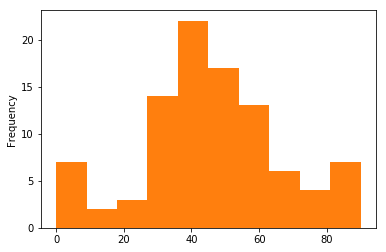

In [106]:
plt.show()

In [133]:
module1lg.boxplot(column='Final(Rounded Up)',by='Student Id')

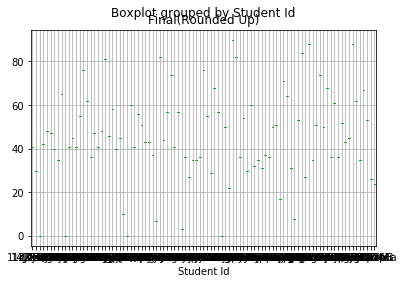

In [134]:
plt.show()
# Can use boxplots to check for outliers

In [103]:
plt.hist

<function matplotlib.pyplot.hist>

In [305]:
fail1 = module1lg['Final(Rounded Up)'] < 40

In [758]:
fail1.sum()

35

In [307]:
# Filter the election DataFrame with the high_turnout array: high_turnout_df
fail1_df = module1lg.loc[fail1]

In [308]:
fail1_df
# the list of users who failed

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
0   105   iV38mp5J  bmp5, aV38    33      37     35.0                 35
4   101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10
5    40   z7nAx4iB  bx4i, a7nA    24      28     26.0                 26
6    50   LmZdJI1B  bJI1, amZd    14       0      7.0                  7
9    98   UnsWuTWC  buTW, ansW     6       0      3.0                  3
10   89   V4gLk3Vw  bk3V, a4gL    36      35     35.5                 36
21  114   5nhO7J2M  b7J2, anhO    40      30     35.0                 35
26   37   zfWkKiFa  bKiF, afWk     8      40     24.0                 24
27    4   14jVO8M7  bO8M, a4jV    20      40     30.0                 30
29   66   i3bNvzHv  bvzH, a3bN    28      35     31.5                 32
32   92   YcLwkn3H  bkn3, acLw    50      20     35.0                 35
33   80   l24RwcWj  bwcW, a24R    36      35     35.5                 36
34   87   tf0hW9uj  bW9u, af0h    36      35     35.5                 36
35   11   2JGsxonj  bxon, aJGs     0       0      0.0                  0
44   60   uPi9ECZm  bECZ, aPi9    36      35     35.5                 36
45   14   FjdRQnjO  bQnj, ajdR     0       0      0.0                  0
47   17   qfDKEXbx  bEXb, afDK    34      36     35.0                 35
52   32   6glUwdaL  bwda, aglU     0       0      0.0                  0
53   63   fiGp3wt7  b3wt, aiGp    40      31     35.5                 36
54  103   8PWLLY3W  bLY3, aPWL    30      41     35.5                 36
56    2   VSnRGk9O  bGk9, aSnR    26      27     26.5                 27
57   81   pjiAp1Wy  bp1W, ajiA    32      21     26.5                 27
64   95   YujRUYS3  bUYS, aujR    26      46     36.0                 36
65  109   g7t7fTqU  bfTq, a7t7    24      35     29.5                 30
70    5   ba14Mdv9  bMdv, aa14    14      44     29.0                 29
71   28   jHCLSn1y  bSn1, aHCL    30      32     31.0                 31
77   30   bvO9yWNl  byWN, avO9     0       0      0.0                  0
78   91   yp1YpWXh  bpWX, ap1Y    38      32     35.0                 35
79   96   mKTHf5RD  bf5R, aKTH    16      18     17.0                 17
81   52   kcj72dIk  b2dI, acj7    44      30     37.0                 37
84   62   LW3JhQ6U  bhQ6, aW3J    36      37     36.5                 37
87   88   oDYJUlnu  bUln, aDYJ    16       0      8.0                  8
91  102   XRJDFjYd  bFjY, aRJD    34      36     35.0                 35
92   90   n2njr9jS  br9j, a2nj    26      36     31.0                 31
93   57   cZWkb86b  bb86, aZWk    26      18     22.0                 22

In [146]:
fail1.sum()
# 35 students failed


35

In [147]:
fail1.mean()


0.36842105263157893

In [304]:
passed1 = [~fail1]
# Passed students

NameError: name 'fail1' is not defined

In [448]:
passed1 = module1lg['Final(Rounded Up)'] > 40

In [753]:
passed1.sum()

58

In [451]:
# Using 'passed1' as the column name 
# and equating it to the list 
module1lg['Pass'] = passed1 

In [526]:
sns.boxplot(x = 'Pass', y = 'Final(Rounded Up)', data = module1lg)

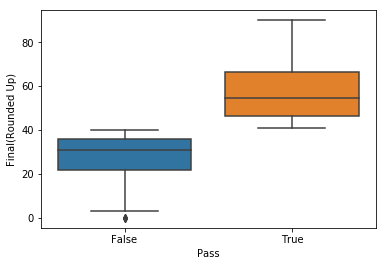

In [527]:
plt.show()

In [478]:
# Group Module Lecture Grades  by 'Churn' and compute the mean
print(module1lg.groupby(['Pass']).mean())


              id       % CA     % exam    Average  Final(Rounded Up)
Pass                                                                
False  66.027027  25.918919  26.216216  26.067568          26.216216
True   58.913793  55.086207  59.844828  57.465517          57.672414


In [452]:
module1lg.head()

id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)  \
0  105   iV38mp5J  bmp5, aV38    33      37     35.0                 35   
1   38   wTka80ff  b80f, aTka    44      46     45.0                 45   
2   64   ond9WT1D  bWT1, and9    42      63     52.5                 53   
3   79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41   
4  101   DpJQOQ2F  bOQ2, apJQ    20       0     10.0                 10   

  First name Last name   Pass  
0       bmp5      aV38  False  
1       b80f      aTka   True  
2       bWT1      and9   True  
3       bgbR      aWw4   True  
4       bOQ2      apJQ  False

In [151]:
passed1

0     False
1      True
2      True
3      True
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26    False
27    False
28     True
29    False
      ...  
65    False
66     True
67     True
68     True
69     True
70    False
71    False
72     True
73     True
74     True
75     True
76     True
77    False
78    False
79    False
80     True
81    False
82     True
83     True
84    False
85     True
86     True
87    False
88     True
89     True
90     True
91    False
92    False
93    False
94     True
Name: Final(Rounded Up), Length: 95, dtype: bool

In [152]:
passed1.sum()
# 58 students passed ok

58

In [154]:
passed1.mean()
# Average passed score was 61

0.61052631578947369

In [302]:
passed1_df = module1lg.loc[passed1]
# Filter the module1lt DataFrame with the passed array: passed1_df


In [303]:
passed1_df
# Students who passed module 1
# There are 94 students who passed


id Student Id        Name  % CA  % exam  Average  Final(Rounded Up)
1    38   wTka80ff  b80f, aTka    44      46     45.0                 45
2    64   ond9WT1D  bWT1, and9    42      63     52.5                 53
3    79   7Ww4gbRf  bgbR, aWw4    46      36     41.0                 41
7    48   I0V11X9O  b1X9, a0V1    30      51     40.5                 41
8    74   RxBNPexL  bPex, axBN    74      73     73.5                 74
11   69   B2C9YptM  bYpt, a2C9    52      43     47.5                 48
12  107   lml3aGhT  baGh, aml3    37      63     50.0                 50
13  104   gWldHxR8  bHxR, aWld    66      53     59.5                 60
14   35   3F4rAV6x  bAV6, aF4r    40      56     48.0                 48
15  118   9k8RBNXk  bBNX, ak8R    62      31     46.5                 47
16   42   xei9g2LG  bg2L, aei9    64      60     62.0                 62
17   43   KzM9t8tG  bt8t, azM9    50      36     43.0                 43
18  117   qHxCglhU  bglh, aHxC    86      90     88.0                 88
19   16   z2miDkoM  bDko, a2mi    60      73     66.5                 67
20   93   CejKpyiR  bpyi, aejK    40      75     57.5                 58
22    6   um5M1HGl  b1HG, am5M    46      40     43.0                 43
23   24   KS1ruSeJ  buSe, aS1r    40      62     51.0                 51
25   34   J4I0KMcB  bKMc, a4I0    48      63     55.5                 56
28   97   ABbHDJtL  bDJt, aBbH    24      57     40.5                 41
30   29   758KM4Z1  bM4Z, a58K    46      44     45.0                 45
31   78   aiJLn2Zt  bn2Z, aiJL    52      57     54.5                 55
36  122   GiG1hcIK  bhcI, aiG1    58      62     60.0                 60
37   72   ZW89inL7  binL, aW89    72      80     76.0                 76
38  112   7e1gAVbG  bAVb, ae1g    42      68     55.0                 55
39  110   32RuK65R  bK65, a2Ru    38      45     41.5                 42
40   61   mBlDnnWk  bnnW, aBlD    44      57     50.5                 51
41   75   T5VIsY8q  bsY8, a5VI    38      43     40.5                 41
43   18   sD2nqfdF  bqfd, aD2n    64      84     74.0                 74
46    3   tAK5SAbE  bSAb, aAK5    56      80     68.0                 68
48   26   8A6BBfkf  bBfk, aA6B    68      55     61.5                 62
49   51   CSiHHbMW  bHbM, aSiH    50      42     46.0                 46
50   20   z322SXpu  bSXp, a322    50      56     53.0                 53
51    9   btVFWWA9  bWWA, atVF    56      57     56.5                 57
55  106   mcdrMSDD  bMSD, acdr    72      70     71.0                 71
58   10   tzCYvQBD  bvQB, azCY    56      66     61.0                 61
59   44   eM4ckZLi  bkZL, aM4c    84      80     82.0                 82
60   76   TeCeABpU  bABp, aeCe    54      60     57.0                 57
61  120   bfY5OiKA  bOiK, afY5    74      62     68.0                 68
62   83   DS7xzDwW  bzDw, aS7x    42      47     44.5                 45
63   56   11cZyzNR  byzN, a1cZ    44      37     40.5                 41
66  111   MBPmhmNk  bhmN, aBPm    74      90     82.0                 82
67   25   RYyZMB1V  bMB1, aYyZ    60      53     56.5                 57
68   94   89cr591H  b591, a9cr    72      80     76.0                 76
69   84   71skqdl0  bqdl, a1sk    42      40     41.0                 41
72   12   qjrVTesk  bTes, ajrV    52      50     51.0                 51
73   21   LTcug6b4  bg6b, aTcu    44      41     42.5                 43
74    8   fw97aOyU  baOy, aw97    38      70     54.0                 54
75  119   c1deNfOy  bNfO, a1de    70      30     50.0                 50
76   49   pKpvLk6H  bLk6, aKpv    78      90     84.0                 84
80   70   BZHfgCtV  bgCt, aZHf    76      85     80.5                 81
82    7   6L20lLYB  blLY, aL20    66      63     64.5                 65
83   19   t6Uc22AA  b22A, a6Uc    40      60     50.0                 50
85   15   wiEd8PqG  b8Pq, aiEd    88      88     88.0                 88
86   65   4zQJ83QV  b83Q, azQJ    54      40     47.0          

In [135]:
final1.describe()

count    95.000000
mean     45.421053
std      20.606020
min       0.000000
25%      35.000000
50%      44.000000
75%      57.000000
max      90.000000
Name: Final(Rounded Up), dtype: float64

In [136]:
final1.mean()

45.421052631578945

In [157]:
plt.hist(final1.dropna(), label='final grade')

(array([  7.,   2.,   3.,  14.,  22.,  17.,  13.,   6.,   4.,   7.]),
 array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.]),
 <a list of 10 Patch objects>)

In [158]:
plt.show

<function matplotlib.pyplot.show>

In [ ]:
# Module1MG
# Moodle grades
#

In [12]:
module1mg.head()
# ID number = primary ID
#module1mg line 23


First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                46.67   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                36.67   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                53.33   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                 0.00   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                46.67   

   Last downloaded from this course  \
0                        1550739556   
1                        1550739556   
2                        1550739556   
3                        1550739556   
4                        1550739556   

   Assignment: Group 1 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 2 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 3 - Practical Test (Real)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Assignment: Group 4 - Practical Test (Real)           ...            \
0                                            0           ...             
1                                            0           ...             
2                                            0           ...             
3                                            0           ...             
4                                            0           ...             

   Quiz: Group 4 MCQ (Real)  Quiz: Group 4 - MCQ2 (Real)  \
0                         7                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 5 MCQ (Real)  Quiz: Group 5 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 6 MCQ (Real)  Quiz: Group 6 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Group 7 MCQ (Real)  Quiz: Group 7 - MCQ2 (Real)  \
0                         0                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0   

   Quiz: Late MCQ1 (Real)  Quiz: Late MCQ2 (Real)  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 30 columns]

In [14]:
print("module1mg dimensions: {}".format(module1mg.shape))

module1mg dimensions: (122, 30)


In [84]:
module1mg.shape

(122, 30)

In [17]:
module1mg['ID number'].isin(module1lg['Student Id']).value_counts()
# Check to see what values match for inner join

True     95
False    27
Name: ID number, dtype: int64

In [111]:
module1mg.describe()
# Mean 43
# Max 93

Course total (Real)  Last downloaded from this course  \
count           122.000000                      1.220000e+02   
mean             43.060246                      1.550740e+09   
std              19.182017                      4.821709e-01   
min               0.000000                      1.550740e+09   
25%              33.330000                      1.550740e+09   
50%              43.330000                      1.550740e+09   
75%              53.330000                      1.550740e+09   
max              93.330000                      1.550740e+09   

       Assignment: Group 1 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 2 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 3 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 4 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 5 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 6 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: Group 7 - Practical Test (Real)  \
count                                        122.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       Assignment: La

In [105]:
module1mg.columns
# ID number
# Assigment: Group 1-7
# Assigment: Late Pratical
# Quiz: Group 1-7
# Quiz: Late MCQ2

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Course total (Real)', 'Last downloaded from this course',
       'Assignment: Group 1 - Practical Test (Real)',
       'Assignment: Group 2 - Practical Test (Real)',
       'Assignment: Group 3 - Practical Test (Real)',
       'Assignment: Group 4 - Practical Test (Real)',
       'Assignment: Group 5 - Practical Test (Real)',
       'Assignment: Group 6 - Practical Test (Real)',
       'Assignment: Group 7 - Practical Test (Real)',
       'Assignment: Late Practical (Real)', 'Quiz: Group 1 MCQ (Real)',
       'Quiz: Group 1 - MCQ2 (Real)', 'Quiz: Group 2 MCQ (Real)',
       'Quiz: Group 2 - MCQ2 (Real)', 'Quiz: Group 3 MCQ (Real)',
       'Quiz: Group 3 - MCQ2 (Real)', 'Quiz: Group 4 MCQ (Real)',
       'Quiz: Group 4 - MCQ2 (Real)', 'Quiz: Group 5 MCQ (Real)',
       'Quiz: Group 5 - MCQ2 (Real)', 'Quiz: Group 6 MCQ (Real)',
       'Quiz: Group 6 - MCQ2 (Real)', 'Quiz: Group 7 MCQ (Real)',
       'Quiz: Group 7 - MC

In [25]:
print(module1mg)
# ID number
# Quiz: Group 4 MCQ (Real) Quiz: Group 4 - MCQ2 (Real)
# Quiz: Group 5 MCQ (Real) Quiz: Group 5 - MCQ2 (Real)
# Quiz : Group 6 MCQ (Real) Quiz: Group 6 - MCQ2 (Real)
# Quiz : Groupd 7 MCQ (Real) Quiz: Group 7 - MC2 (Real)
# Quiz: Late MCQ1 (Real) Quiz: Late MCQ2 (Real)
# 122 rows x 30 columns
# Last downloaded from this course tbr
# Email address tbr
# 121 students

    First name Surname ID number            Email address  \
0         a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1         aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2         aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3         a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4         aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   
5         am5M    b1HG  um5M1HGl  um5M1HGl@student.itb.ie   
6         aL20    blLY  6L20lLYB  6L20lLYB@student.itb.ie   
7         aw97    baOy  fw97aOyU  fw97aOyU@student.itb.ie   
8         atVF    bWWA  btVFWWA9  btVFWWA9@student.itb.ie   
9         azCY    bvQB  tzCYvQBD  tzCYvQBD@student.itb.ie   
10        aJGs    bxon  2JGsxonj  2JGsxonj@student.itb.ie   
11        ajrV    bTes  qjrVTesk  qjrVTesk@student.itb.ie   
12        aNBi    b8W7  lNBi8W7k  lNBi8W7k@student.itb.ie   
13        ajdR    bQnj  FjdRQnjO  FjdRQnjO@student.itb.ie   
14        aiEd    b8Pq  wiEd8PqG  wiEd8PqG@student.itb.ie   
15        a2mi    bDko  

In [83]:
module1ml.shape
# Moodle Logs

(19242, 9)

In [104]:
module1ml.columns
# User full name
# Moodle logs columns 

Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [27]:
print(module1ml)
# User full name
# Time
# Event context
# Event name
# Description
# 19242 rows x 9 columns

                  Time User full name Affected user          Event context  \
0      20/02/19, 01:56      ansW buTW             -       File: Lecture 10   
1      20/02/19, 01:56      ansW buTW             -       Course: Module 1   
2      20/02/19, 01:27      ansW buTW             -       Course: Module 1   
3      19/02/19, 12:16      ae1g bAVb             -       Course: Module 1   
4      19/02/19, 10:22      aZWk bb86             -       Course: Module 1   
5      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
6      19/02/19, 10:21      aZWk bb86             -       Course: Module 1   
7      19/02/19, 09:03      an00 bEQ2             -  File: Lab 8 Worksheet   
8      19/02/19, 09:03      an00 bEQ2             -  File: Lab 7 Worksheet   
9      19/02/19, 09:03      an00 bEQ2             -  File: Lab 6 Worksheet   
10     19/02/19, 09:02      an00 bEQ2             -  File: Lab 6 Worksheet   
11     19/02/19, 09:02      an00 bEQ2             -        File:

In [ ]:
# END of Module 1
#
#
#

In [ ]:
########### START OF MODULE TWO ###############
# Begin2

#m2mg,m2ml

In [29]:
# Data Preperation Module 2
# There are two files in module 2
# Module 2

module2mg = pd.read_csv('Module2-MoodleGrades.csv')

In [31]:
module2ml = pd.read_csv('Module2-MoodleLog.csv')

In [199]:
print (module2mg.columns.tolist())
# Note Quiz: CA3 - QUIZ  (Real) has a couple of spaces in it

['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA3 - QUIZ  (Real)', 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', 'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [843]:
# Print the number of unique values in each modul2mg column
print(module2mg.nunique())

First name                                                          138
Surname                                                             138
ID number                                                           138
Email address                                                       138
Quiz: CA3 - QUIZ  (Real)                                             81
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)     18
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)          34
Course total (Real)                                                 118
Last downloaded from this course                                      1
Pass                                                                  2
dtype: int64


In [842]:
# Print the number of unique values in each modul2ml column
print(module2ml.nunique())

Time              10003
User full name      138
Affected user         1
Event context        68
Component             9
Event name           25
Description          40
First name          138
Last name           138
dtype: int64


In [ ]:
#Cleanup2

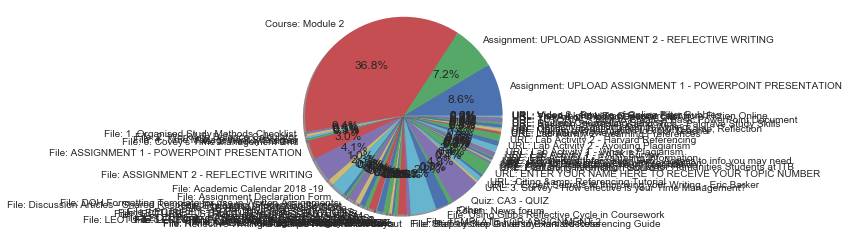

In [974]:
labels = module2ml['Event context'].astype('category').cat.categories.tolist()
counts = module2ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [969]:
module2ml["Event context"].value_counts()
# The Most frequent are assignment: upload assignment 1
# 

Course: Module 2                                                    8378
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION           1952
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING                1647
Quiz: CA3 - QUIZ                                                    1111
File: TEMPLATE FOR ASSIGNMENT 2                                      945
File: ASSIGNMENT 2 - REFLECTIVE WRITING                              940
File: ASSIGNMENT 1 - POWERPOINT PRESENTATION                         692
File: Assignment Declaration Form                                    528
File: Using Gibbs Reflective Cycle in Coursework                     512
URL: ENTER YOUR NAME HERE TO RECEIVE YOUR TOPIC NUMBER               506
File: Sample Presentation Layout                                     338
File: ITB Harvard Referencing Guide                                  296
File: LECTURE 4 - HARVARD REFERENCING BASICS                         283
URL: Lab Activity 2 - Harvard Referencing          

In [953]:
module2ml["Event name"].value_counts()
# Actions


Course module viewed                                      10147
Course viewed                                              6657
The status of the submission has been viewed.              1835
Grade user report viewed                                    709
Submission form viewed.                                     477
A submission has been submitted.                            324
A file has been uploaded.                                   324
The user has accepted the statement of the submission.      315
Submission created.                                         263
Course user report viewed                                   212
User list viewed                                            179
Quiz attempt viewed                                         146
Quiz attempt summary viewed                                 144
Role assigned                                               140
User enrolled in course                                     140
Quiz attempt submitted                  

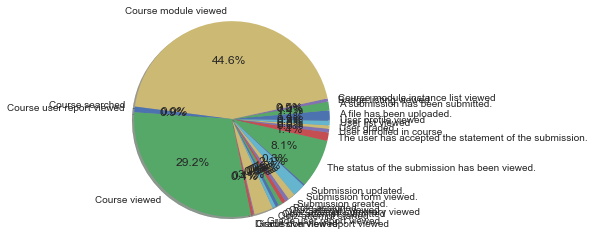

In [944]:
labels = module2ml['Event name'].astype('category').cat.categories.tolist()
counts = module2ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [886]:
# Time2
time2 = module2ml["Time"].str.split(",", n = 1, expand = True)


In [890]:
# making separate Date column from new data frame 
module2ml["Date"]= time2[0] 

# making seperate Time column from new data frame
module2ml['Time']= time2[1]


In [906]:
# Convert the date column to datetime64
module2ml.Date = pd.to_datetime(module2ml.Date)


In [200]:
m2mg = module2mg[[ 'First name', 'Surname','ID number','Quiz: CA3 - QUIZ  (Real)','Course total (Real)','Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)','Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)']]
#'Quiz: CA3 - QUIZ (Real) , Quiz: CA3 - QUIZ (Real) not in index
# Tidy up on colums without 

In [737]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: CA3 - QUIZ  (Real)', rot=70)


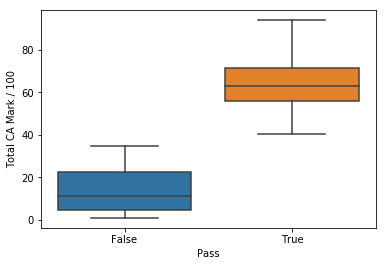

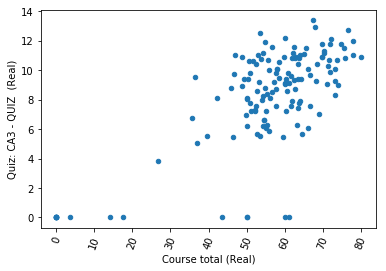

In [738]:
plt.show()

In [739]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', rot=70)


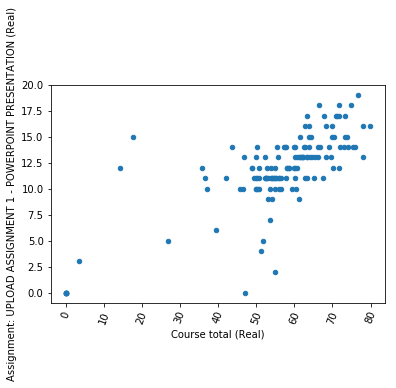

In [740]:
plt.show()

In [741]:
m2mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)', rot=70)


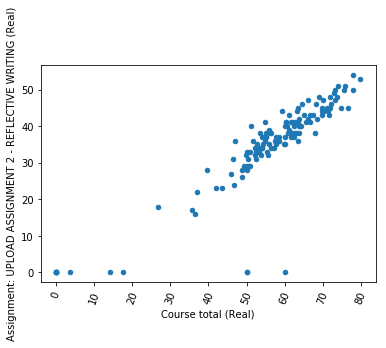

In [742]:
plt.show()

In [688]:
# Drop2
module2ml = module2ml.drop(module2ml[['IP address','Origin']], axis=1)



In [186]:
module2mg.tail()
# 1 Quiz and 2 Assignment Uploads

First name Surname ID number            Email address  \
133       aIqE    b8ck  JIqE8ck3  JIqE8ck3@student.itb.ie   
134       azcd    bNMa  IzcdNMa8  IzcdNMa8@student.itb.ie   
135       aptw    beky  uptwekyc  uptwekyc@student.itb.ie   
136       ahsi    bWD5  2hsiWD5M  2hsiWD5M@student.itb.ie   
137       avtQ    bxkA  UvtQxkAK  UvtQxkAK@student.itb.ie   

     Quiz: CA3 - QUIZ  (Real)  \
133                     12.90   
134                      0.00   
135                     10.75   
136                     10.30   
137                      9.20   

     Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
133                                                 17                  
134                                                 13                  
135                                                 11                  
136                                                 17                  
137                                                 11                  

     Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
133                                                 38             
134                                                 39             
135                                                 32             
136                                                 44             
137                                                 33             

     Course total (Real)  Last downloaded from this course  
133                67.90                        1548158947  
134                61.18                        1548158947  
135                53.75                        1548158947  
136                71.30                        1548158947  
137                53.20                        1548158947

In [563]:
# Visualize the distribution of 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)'
sns.distplot(module2mg['Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)'])

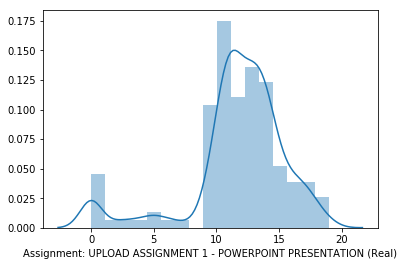

In [564]:
plt.show()

In [756]:
fail2 = module2mg['Course total (Real)'] < 40

In [757]:
fail2.sum()

14

In [453]:
passed2 = module2mg['Course total (Real)'] > 40

In [754]:
passed2.sum()

124

In [454]:
# Using 'passed2' as the column name 
# and equating it to the list 
module2mg['Pass'] = passed2 

In [528]:
sns.boxplot(x = 'Pass', y = 'Course total (Real)', data = module2mg)
# There is no outliers

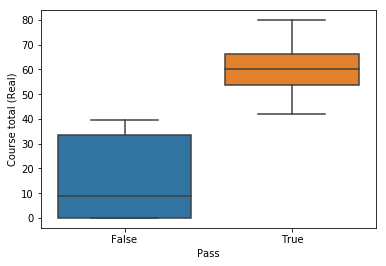

In [529]:
plt.show()

In [479]:
# Group Module Moodle Grades  by 'Pass' and compute the mean
print(module2mg.groupby(['Pass']).mean())

       Quiz: CA3 - QUIZ  (Real)  \
Pass                              
False                  2.192857   
True                   8.960484   

       Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
Pass                                                                      
False                                           5.285714                  
True                                           12.467742                  

       Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
Pass                                                                 
False                                           7.214286             
True                                           37.661290             

       Course total (Real)  Last downloaded from this course  
Pass                                                          
False            15.071429                      1.548159e+09  
True             60.248468                      1.548159e+09  


In [455]:
module2mg.head()

First name Surname ID number            Email address  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   

   Quiz: CA3 - QUIZ  (Real)  \
0                      7.30   
1                      8.55   
2                      7.80   
3                     10.90   
4                      7.25   

   Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
0                                                 13                  
1                                                 10                  
2                                                 10                  
3                                                 16                  
4                                                 12                  

   Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
0                                                 32             
1                                                 38             
2                                                 33             
3                                                 43             
4                                                 41             

   Course total (Real)  Last downloaded from this course  Pass  
0                52.30                        1548158947  True  
1                56.55                        1548158947  True  
2                50.80                        1548158947  True  
3                69.90                        1548158947  True  
4                60.25                        1548158947  True

In [194]:
m2mg = module2mg.reindex(columns=['First name', 'Surname','ID number','Quiz: CA3 - QUIZ (Real)','Course total (Real)','Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)','Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)'])


In [385]:
m2mg.describe().transpose()
# There were Grades for 138 students
# The highest score was 79.9
# CA3
# Assignment 1
# Assigment 2



count       mean  \
Quiz: CA3 - QUIZ  (Real)                            138.0   8.273913   
Course total (Real)                                 138.0  55.665290   
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PR...  138.0  11.739130   
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WR...  138.0  34.572464   

                                                          std  min      25%  \
Quiz: CA3 - QUIZ  (Real)                             3.370353  0.0   7.2125   
Course total (Real)                                 16.672961  0.0  51.8000   
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PR...   3.897041  0.0  11.0000   
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WR...  12.775940  0.0  32.2500   

                                                       50%      75%   max  
Quiz: CA3 - QUIZ  (Real)                             9.175  10.7375  13.4  
Course total (Real)                                 58.100  64.5875  79.9  
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PR...  12.000  14.0000  19.0  
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WR...  37.000  42.0000  54.0

In [610]:
sns.boxplot(x = 'Course total (Real)', y = 'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)', data = module2mg, hue = 'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)')

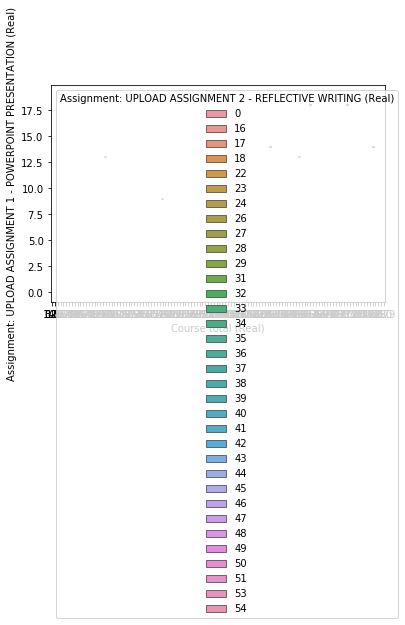

In [611]:
plt.show()

In [464]:
print(m2mg['Course total (Real)'].value_counts(dropna=False))


0.00     6
63.40    3
73.30    2
50.80    2
61.60    2
48.90    2
58.10    2
63.80    2
69.90    2
56.55    2
54.20    2
50.00    2
54.60    2
78.00    2
66.10    2
49.95    1
53.95    1
70.20    1
57.70    1
66.70    1
3.53     1
52.60    1
71.30    1
67.40    1
61.10    1
67.90    1
43.53    1
61.18    1
52.70    1
52.30    1
        ..
46.45    1
71.70    1
61.80    1
55.20    1
26.85    1
66.60    1
52.55    1
49.40    1
60.20    1
73.10    1
53.55    1
71.85    1
56.10    1
62.55    1
45.80    1
14.12    1
55.05    1
58.55    1
59.45    1
53.05    1
62.80    1
50.05    1
55.35    1
57.80    1
64.40    1
72.10    1
17.65    1
50.60    1
37.05    1
60.25    1
Name: Course total (Real), Length: 118, dtype: int64


In [198]:
m2mg.head()

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                52.30   
1       aSnR    bGk9  VSnRGk9O                56.55   
2       aAK5    bSAb  tAK5SAbE                50.80   
3       a4jV    bO8M  14jVO8M7                69.90   
4       aa14    bMdv  ba14Mdv9                60.25   

   Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
0                                                 13                  
1                                                 10                  
2                                                 10                  
3                                                 16                  
4                                                 12                  

   Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  
0                                                 32            
1                                                 38            
2                                                 33            
3                                                 43            
4                                                 41

In [507]:
sns.distplot(m2mg['Course total (Real)'])

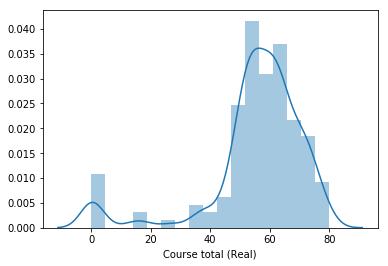

In [508]:
plt.show()

In [184]:
# Selecting columns
m2ml = module2ml[[ 'Time','User full name','Event context','Component','Event name','Description','First name','Last name']]

In [397]:
m2ml.describe().transpose()
# Most frequent student = an9y b7rk
# Course Module 2 most viewed
# 

#Attribute Information:

#Affected user: It contains the name of the user if the action is related to them.This has been removed as it is blank
#Time: It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
#User full name: Name of the user is listed in this column.
#Event context: It displays the name of the activity or resource. Ex: Course: Module 2 was most frequent
#Component: It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ... System was most frequent
#Event name: Displays in relation to users' actions.A user can do CRUD actions in Moodle - Create, View, Update and Delete.Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.This will be removed
#IP address: Shows the IP address of the user.This will be removed as this does not provide any information
#Origin: It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.


count unique  \
Time            22760  10003   
User full name  22760    138   
Event context   22760     68   
Component       22760      9   
Event name      22760     25   
Description     22760     40   
First name      22760    138   
Last name       22760    138   

                                                              top   freq  
Time                                               3/12/18, 12:10     62  
User full name                                          an9y b7rk    684  
Event context                                    Course: Module 2   8378  
Component                                                  System   7526  
Event name                                   Course module viewed  10147  
Description     The user with id '0' viewed the 'resource' act...   6821  
First name                                                   an9y    684  
Last name                                                    b7rk    684

In [181]:
# new data frame with split value columns 
new2 = module2ml["User full name"].str.split(" ", n = 1, expand = True)

In [185]:
m2ml.head()

Time User full name                     Event context  \
0  22/01/19, 10:54      a5VI bsY8  File: Academic Calendar 2018 -19   
1  22/01/19, 10:53      a5VI bsY8                  Course: Module 2   
2  22/01/19, 10:28      aBPm bhmN                  Course: Module 2   
3  22/01/19, 10:26      aBPm bhmN                  Course: Module 2   
4  21/01/19, 20:32      ae3w bhew                  Course: Module 2   

     Component                 Event name  \
0         File       Course module viewed   
1       System              Course viewed   
2  User report   Grade user report viewed   
3       System              Course viewed   
4       System  Course user report viewed   

                                         Description First name Last name  
0  The user with id '0' viewed the 'resource' act...       a5VI      bsY8  
1  The user with id '0' viewed the course with id...       a5VI      bsY8  
2  The user with id '0' viewed the user report in...       aBPm      bhmN  
3  The user with id '0' viewed the course with id...       aBPm      bhmN  
4  The user with id '0' viewed the user report fo...       ae3w      bhew

In [182]:
# making separate first name column from new data frame 
module2ml["First name"]= new2[0] 

In [183]:
# making separate last name column from new data frame 
module2ml["Last name"]= new2[1] 

In [49]:
module2mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
First name                                                          138 non-null object
Surname                                                             138 non-null object
ID number                                                           138 non-null object
Email address                                                       138 non-null object
Quiz: CA3 - QUIZ  (Real)                                            138 non-null float64
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)    138 non-null int64
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)         138 non-null int64
Course total (Real)                                                 138 non-null float64
Last downloaded from this course                                    138 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 9.8+ KB


In [107]:
module2mg['Course total (Real)'].plot('hist')

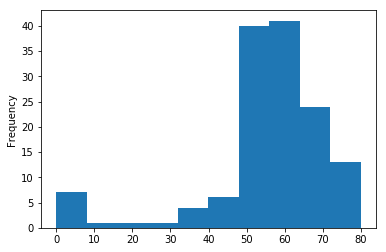

In [108]:
plt.show()

In [50]:
module2ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22760 entries, 0 to 22759
Data columns (total 9 columns):
Time              22760 non-null object
User full name    22760 non-null object
Affected user     22760 non-null object
Event context     22760 non-null object
Component         22760 non-null object
Event name        22760 non-null object
Description       22760 non-null object
IP address        22760 non-null object
Origin            22760 non-null object
dtypes: object(9)
memory usage: 1.6+ MB


In [ ]:
# Value_counts2

In [94]:
module2ml['Event context'].value_counts(dropna=False).head()

Course: Module 2                                             8378
Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION    1952
Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING         1647
Quiz: CA3 - QUIZ                                             1111
File: TEMPLATE FOR ASSIGNMENT 2                               945
Name: Event context, dtype: int64

In [95]:
module2ml['Event name'].value_counts(dropna=False).head()

Course module viewed                             10147
Course viewed                                     6657
The status of the submission has been viewed.     1835
Grade user report viewed                           709
Submission form viewed.                            477
Name: Event name, dtype: int64

In [734]:
module2ml['Event name'].value_counts(dropna=False).tail()

Submission updated.             61
User profile viewed             59
Grade overview report viewed    34
Badge listing viewed             4
Course searched                  1
Name: Event name, dtype: int64

In [735]:
module2ml['Event name'].value_counts(dropna=False)

Course module viewed                                      10147
Course viewed                                              6657
The status of the submission has been viewed.              1835
Grade user report viewed                                    709
Submission form viewed.                                     477
A submission has been submitted.                            324
A file has been uploaded.                                   324
The user has accepted the statement of the submission.      315
Submission created.                                         263
Course user report viewed                                   212
User list viewed                                            179
Quiz attempt viewed                                         146
Quiz attempt summary viewed                                 144
Role assigned                                               140
User enrolled in course                                     140
Quiz attempt submitted                  

In [96]:
module2ml['User full name'].value_counts(dropna=False).head()

an9y b7rk    684
aiG1 bhcI    355
ag2x bJ2S    307
azCY bvQB    302
aoJd bWB4    296
Name: User full name, dtype: int64

In [689]:
module2ml['User full name'].value_counts(dropna=False).tail()

aMPU b43l    45
aM4c bkZL    20
asqg bbCp    17
a3bN bvzH    14
aKpv bLk6     9
Name: User full name, dtype: int64

In [ ]:
# Module2 Moodle Grades
#
# Module2 Moodle Grades

In [201]:
m2mg

First name Surname ID number  Quiz: CA3 - QUIZ  (Real)  \
0         a8NM    bDqB  U8NMDqBG                      7.30   
1         aSnR    bGk9  VSnRGk9O                      8.55   
2         aAK5    bSAb  tAK5SAbE                      7.80   
3         a4jV    bO8M  14jVO8M7                     10.90   
4         aa14    bMdv  ba14Mdv9                      7.25   
5         am5M    b1HG  um5M1HGl                      8.30   
6         aL20    blLY  6L20lLYB                      9.55   
7         aw97    baOy  fw97aOyU                     10.10   
8         atVF    bWWA  btVFWWA9                      9.80   
9         azCY    bvQB  tzCYvQBD                      7.00   
10        aJGs    bxon  2JGsxonj                     11.90   
11        ajrV    bTes  qjrVTesk                     10.00   
12        aNBi    b8W7  lNBi8W7k                     10.70   
13        ajdR    bQnj  FjdRQnjO                      8.60   
14        aiEd    b8Pq  wiEd8PqG                     12.70   
15        a2mi    bDko  z2miDkoM                      9.05   
16        afDK    bEXb  qfDKEXbx                     11.05   
17        aD2n    bqfd  sD2nqfdF                      9.60   
18        a6Uc    b22A  t6Uc22AA                     10.10   
19        a322    bSXp  z322SXpu                      5.45   
20        aTcu    bg6b  LTcug6b4                      9.40   
21        aYZZ    bVOq  sYZZVOqR                      3.85   
22        ag2x    bJ2S  Cg2xJ2Si                      5.65   
23        aS1r    buSe  KS1ruSeJ                     10.90   
24        aYyZ    bMB1  RYyZMB1V                      6.25   
25        aA6B    bBfk  8A6BBfkf                     12.00   
26        asqg    bbCp  JsqgbCpo                      0.00   
27        aHCL    bSn1  jHCLSn1y                      8.80   
28        a58K    bM4Z  758KM4Z1                     11.75   
29        avO9    byWN  bvO9yWNl                      0.00   
..         ...     ...       ...                       ...   
108       a7t7    bfTq  g7t7fTqU                     10.80   
109       a2Ru    bK65  32RuK65R                      7.20   
110       aBPm    bhmN  MBPmhmNk                      9.40   
111       ae1g    bAVb  7e1gAVbG                      6.10   
112       aLoB    b4wd  qLoB4wdH                      7.80   
113       anhO    b7J2  5nhO7J2M                      5.50   
114       aAWa    b0mw  CAWa0mw8                      6.20   
115       aWg7    blrD  aWg7lrD6                      0.00   
116       aHxC    bglh  qHxCglhU                      9.30   
117       ak8R    bBNX  9k8RBNXk                      9.80   
118       a1de    bNfO  c1deNfOy                     11.80   
119       afY5    bOiK  bfY5OiKA                      9.15   
120       aXIv    b1jf  5XIv1jfi                     11.20   
121       aiG1    bhcI  GiG1hcIK                      6.25   
122       aIUs    bPJL  rIUsPJLe                     10.60   
123       aoJd    bWB4  RoJdWB46                     12.10   
124       aApc    bOG3  xApcOG3o                      0.00   
125       aDxv    blBy  WDxvlBy7                      5.05   
126       agtk    bqpc  Mgtkqpc3                      7.90   
127       aApO    bVt3  rApOVt35                      7.60   
128       auLx    bPxp  LuLxPxpW                     10.80   
129       aYCg    bQEY  AYCgQEYy                     10.90   
130       aZ9v    bfmC  MZ9vfmCk                     11.10   
131       aZAj    bLXN  GZAjLXNE                      9.35   
132       aVoL    b0xO  hVoL0xOH                     13.40   
133       aIqE    b8ck  JIqE8ck3                     12.90   
134       azcd    bNMa  IzcdNMa8                      0.00   
135       aptw    beky  uptwekyc                     10.75   
136       ahsi    bWD5  2hsiWD5M                     10.30   
137       avtQ    bxkA  UvtQxkAK                      9.20   

     Course total (Real)  \
0                  52.30   
1                  56.55   
2                  50.80   
3                  69.90   
4                  

In [21]:
module2mg.head()
# ID number
# Quiz CA3
# Assignment: UPLOAD
# Assigment: UPLOAD#
# Course total

First name Surname ID number            Email address  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   

   Quiz: CA3 - QUIZ  (Real)  \
0                      7.30   
1                      8.55   
2                      7.80   
3                     10.90   
4                      7.25   

   Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
0                                                 13                  
1                                                 10                  
2                                                 10                  
3                                                 16                  
4                                                 12                  

   Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
0                                                 32             
1                                                 38             
2                                                 33             
3                                                 43             
4                                                 41             

   Course total (Real)  Last downloaded from this course  
0                52.30                        1548158947  
1                56.55                        1548158947  
2                50.80                        1548158947  
3                69.90                        1548158947  
4                60.25                        1548158947

In [22]:
module2mg.describe()
# User full name
# Quiz CA3
# Assignment:


Quiz: CA3 - QUIZ  (Real)  \
count                138.000000   
mean                   8.273913   
std                    3.370353   
min                    0.000000   
25%                    7.212500   
50%                    9.175000   
75%                   10.737500   
max                   13.400000   

       Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
count                                         138.000000                  
mean                                           11.739130                  
std                                             3.897041                  
min                                             0.000000                  
25%                                            11.000000                  
50%                                            12.000000                  
75%                                            14.000000                  
max                                            19.000000                  

       Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
count                                         138.000000             
mean                                           34.572464             
std                                            12.775940             
min                                             0.000000             
25%                                            32.250000             
50%                                            37.000000             
75%                                            42.000000             
max                                            54.000000             

       Course total (Real)  Last downloaded from this course  
count           138.000000                      1.380000e+02  
mean             55.665290                      1.548159e+09  
std              16.672961                      0.000000e+00  
min               0.000000                      1.548159e+09  
25%              51.800000                      1.548159e+09  
50%              58.100000                      1.548159e+09  
75%              64.587500                      1.548159e+09  
max              79.900000                      1.548159e+09

In [82]:
module2mg.shape

(138, 9)

In [28]:
module2mg.head()
# ID number = primary ID
# Assigment: UPLOAD ASSIGNMENT 1 POWERPOINT PRESENTATION
# Assigment: UPLOAD ASSIGNMENT 2 REFLECTIVE WRITING
# Course Total

First name Surname ID number            Email address  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   

   Quiz: CA3 - QUIZ  (Real)  \
0                      7.30   
1                      8.55   
2                      7.80   
3                     10.90   
4                      7.25   

   Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
0                                                 13                  
1                                                 10                  
2                                                 10                  
3                                                 16                  
4                                                 12                  

   Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
0                                                 32             
1                                                 38             
2                                                 33             
3                                                 43             
4                                                 41             

   Course total (Real)  Last downloaded from this course  
0                52.30                        1548158947  
1                56.55                        1548158947  
2                50.80                        1548158947  
3                69.90                        1548158947  
4                60.25                        1548158947

In [103]:
module2mg.columns
# ID number
# Quiz: CA3 - Quiz
# Assignment: UPLOAD ASSIGNMENT 1
# Assigment: UPLOAD ASSIGNMENT 2
# Course Total

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Quiz: CA3 - QUIZ  (Real)',
       'Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)',
       'Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)',
       'Course total (Real)', 'Last downloaded from this course'],
      dtype='object')

In [114]:
module2mg.describe()
# Quiz CA3
# Assignment Upload assignment 1 powerpoint presentation
# Assigment upload aassignment 2 reflective writing


Quiz: CA3 - QUIZ  (Real)  \
count                138.000000   
mean                   8.273913   
std                    3.370353   
min                    0.000000   
25%                    7.212500   
50%                    9.175000   
75%                   10.737500   
max                   13.400000   

       Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT PRESENTATION (Real)  \
count                                         138.000000                  
mean                                           11.739130                  
std                                             3.897041                  
min                                             0.000000                  
25%                                            11.000000                  
50%                                            12.000000                  
75%                                            14.000000                  
max                                            19.000000                  

       Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE WRITING (Real)  \
count                                         138.000000             
mean                                           34.572464             
std                                            12.775940             
min                                             0.000000             
25%                                            32.250000             
50%                                            37.000000             
75%                                            42.000000             
max                                            54.000000             

       Course total (Real)  Last downloaded from this course  
count           138.000000                      1.380000e+02  
mean             55.665290                      1.548159e+09  
std              16.672961                      0.000000e+00  
min               0.000000                      1.548159e+09  
25%              51.800000                      1.548159e+09  
50%              58.100000                      1.548159e+09  
75%              64.587500                      1.548159e+09  
max              79.900000                      1.548159e+09

In [28]:
final2 = module2mg['Course total (Real)']
# Course total for Module 2

In [29]:
print(final2)

0      52.30
1      56.55
2      50.80
3      69.90
4      60.25
5      73.30
6      36.55
7      66.10
8      60.80
9      69.00
10     54.90
11     56.00
12     55.70
13     60.60
14     76.70
15     60.05
16     47.05
17     61.60
18     58.10
19     59.45
20     50.40
21     26.85
22     64.65
23     62.90
24     55.25
25     78.00
26      0.00
27     54.80
28     69.75
29     50.00
       ...  
108    75.80
109    55.20
110    49.40
111    66.10
112    63.80
113    39.50
114    54.20
115    60.00
116    73.30
117    57.80
118    74.80
119    60.15
120    62.20
121    63.25
122    50.60
123    72.10
124    17.65
125    37.05
126    63.90
127    66.60
128    61.80
129    59.90
130    65.10
131    62.35
132    67.40
133    67.90
134    61.18
135    53.75
136    71.30
137    53.20
Name: Course total (Real), Length: 138, dtype: float64


In [31]:
final2.describe()
# Mean 55
# Max 79

count    138.000000
mean      55.665290
std       16.672961
min        0.000000
25%       51.800000
50%       58.100000
75%       64.587500
max       79.900000
Name: Course total (Real), dtype: float64

In [32]:
fail2 = module2mg['Course total (Real)'] < 40
# Failed module 2


In [33]:
print(fail2)

0      False
1      False
2      False
3      False
4      False
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25     False
26      True
27     False
28     False
29     False
       ...  
108    False
109    False
110    False
111    False
112    False
113     True
114    False
115    False
116    False
117    False
118    False
119    False
120    False
121    False
122    False
123    False
124     True
125     True
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
Name: Course total (Real), Length: 138, dtype: bool


In [34]:
fail2.sum()

14

In [39]:
fail2.mean()

0.10144927536231885

In [35]:
passed2 = module2mg['Course total (Real)'] > 40

In [36]:
passed2.sum()

124

In [37]:
passed2.describe()

count      138
unique       2
top       True
freq       124
Name: Course total (Real), dtype: object

In [38]:
passed2.mean()

0.89855072463768115

In [ ]:
# Module2 ML
#
# Moodle logs

In [112]:
module2ml.describe()
# User full name

Time User full name Affected user     Event context  \
count            22760          22760         22760             22760   
unique           10003            138             1                68   
top     5/12/18, 09:18      an9y b7rk             -  Course: Module 2   
freq                62            684         22760              8378   

       Component            Event name  \
count      22760                 22760   
unique         9                    25   
top       System  Course module viewed   
freq        7526                 10147   

                                              Description IP address Origin  
count                                               22760      22760  22760  
unique                                                 40          1      2  
top     The user with id '0' viewed the 'resource' act...  127.0.0.1    web  
freq                                                 6821      22760  21101

In [ ]:
# Time2 commands 

In [208]:
time2 = pd.read_csv('Module2-MoodleLog.csv',index_col='Time',parse_dates = True )

In [209]:
time2.sort_index()
# 2018-01-10 to 2019-12-01

User full name Affected user  \
Time                                               
2018-01-10 00:15:00      acdr bMSD             -   
2018-01-10 06:02:00      aoJd bWB4             -   
2018-01-10 06:02:00      aoJd bWB4             -   
2018-01-10 06:02:00      aoJd bWB4             -   
2018-01-10 09:09:00      a4gL bk3V             -   
2018-01-10 09:17:00      a2mi bDko             -   
2018-01-10 09:25:00      ansW buTW             -   
2018-01-10 10:01:00      a4I0 bKMc             -   
2018-01-10 10:04:00      aXIv b1jf             -   
2018-01-10 10:04:00      aXIv b1jf             -   
2018-01-10 10:05:00      aXIv b1jf             -   
2018-01-10 10:06:00      aXIv b1jf             -   
2018-01-10 10:18:00      a76c bdsO             -   
2018-01-10 10:18:00      a76c bdsO             -   
2018-01-10 10:18:00      a76c bdsO             -   
2018-01-10 10:19:00      a76c bdsO             -   
2018-01-10 10:19:00      a76c bdsO             -   
2018-01-10 10:42:00      aRJD bFjY             -   
2018-01-10 10:42:00      aRJD bFjY             -   
2018-01-10 10:42:00      aRJD bFjY             -   
2018-01-10 10:44:00      aRJD bFjY             -   
2018-01-10 10:44:00      aRJD bFjY             -   
2018-01-10 11:07:00      a2Ru bK65             -   
2018-01-10 11:07:00      aD2n bqfd             -   
2018-01-10 11:07:00      aa14 bMdv             -   
2018-01-10 11:07:00      aWld bHxR             -   
2018-01-10 11:07:00      aWld bHxR             -   
2018-01-10 11:08:00      aD2n bqfd             -   
2018-01-10 11:08:00      aD2n bqfd             -   
2018-01-10 11:08:00      aWld bHxR             -   
...                            ...           ...   
2019-09-01 11:51:00      aZHf bgCt             -   
2019-09-01 22:00:00      ag2x bJ2S             -   
2019-10-01 01:03:00      aWg7 blrD             -   
2019-10-01 09:49:00      aBlD bnnW             -   
2019-10-01 09:50:00      aBlD bnnW             -   
2019-10-01 14:26:00      aBlD bnnW             -   
2019-10-01 14:26:00      aBlD bnnW             -   
2019-10-01 20:32:00      a7nA bx4i             -   
2019-10-01 22:32:00      aA6B bBfk             -   
2019-10-01 22:55:00      an9y b7rk             -   
2019-10-01 22:55:00      an9y b7rk             -   
2019-10-01 22:56:00      an9y b7rk             -   
2019-11-01 03:09:00      aDxv blBy             -   
2019-11-01 13:20:00      agtk bqpc             -   
2019-11-01 13:21:00      agtk bqpc             -   
2019-11-01 13:22:00      agtk bqpc             -   
2019-11-01 15:46:00      aWg7 blrD             -   
2019-11-01 15:47:00      aWg7 blrD             -   
2019-11-01 15:47:00      aWg7 blrD             -   
2019-12-01 00:19:00      aPWL bLY3             -   
2019-12-01 09:18:00      aLoB b4wd             -   
2019-12-01 12:28:00      ag2x bJ2S             -   
2019-12-01 12:28:00      ag2x bJ2S             -   
2019-12-01 12:29:00      aHxC bglh             -   
2019-12-01 12:30:00      aHxC bglh             -   
2019-12-01 13:11:00      aml3 baGh             -   
2019-12-01 23:04:00      aVoL b0xO             -   
2019-12-01 23:05:00      aVoL b0xO             -   
2019-12-01 23:05:00      aVoL b0xO             -   
2019-12-01 23:06:00      aVoL b0xO             -   

                                                         Event context  \
Time                                                                     
2018-01-10 00:15:00                                   Course: Module 2   
2018-01-10 06:02:00                                   Course: Module 2   
2018-01-10 06:02:00                                  Forum: News forum   
2018-01-10 06:02:00                                   Course: Module 2   
2018-01-10 09:09:00                                   Course: Module 2   
2018-01-10 09:17:00                                   Course: Module 2   
2018-01-10 09:25:00  Assignment: UPLOAD ASSIGNMENT 1 - POWERPOINT P...   
2018-01-10 10:01:00                                   Course: Module 2   
201

In [217]:
time2.loc['2018-01-01':'2019-01-07',['Event context','Event name','User full name']]

Event context  \
Time                                                         
2019-01-01 23:28:00                       Course: Module 2   
2019-01-01 23:28:00                       Course: Module 2   
2019-01-01 22:02:00                       Course: Module 2   
2019-01-01 20:53:00                       Course: Module 2   
2019-01-01 20:53:00                       Course: Module 2   
2019-01-01 20:40:00                       Course: Module 2   
2019-01-01 17:46:00                       Course: Module 2   
2019-01-01 17:46:00                       Course: Module 2   
2019-01-01 17:06:00                       Course: Module 2   
2019-01-01 17:06:00                       Course: Module 2   
2019-01-01 17:00:00                       Course: Module 2   
2019-01-01 02:29:00                       Course: Module 2   
2019-01-01 02:29:00                       Course: Module 2   
2019-01-01 02:28:00                       Course: Module 2   
2018-12-31 21:39:00                       Course: Module 2   
2018-12-31 20:05:00                       Course: Module 2   
2018-12-31 15:46:00                       Course: Module 2   
2018-12-31 15:32:00                       Course: Module 2   
2018-12-31 14:06:00                       Course: Module 2   
2018-12-31 13:39:00                       Course: Module 2   
2018-12-31 13:38:00                       Course: Module 2   
2018-12-31 13:38:00                       Course: Module 2   
2018-12-31 13:37:00                       Course: Module 2   
2018-12-31 13:36:00                       Course: Module 2   
2018-12-31 13:36:00                       Course: Module 2   
2018-12-31 12:32:00                       Course: Module 2   
2018-12-31 12:31:00                       Course: Module 2   
2018-12-31 12:31:00                       Course: Module 2   
2018-12-31 12:14:00                       Course: Module 2   
2018-12-31 10:53:00                       Course: Module 2   
...                                                    ...   
2018-09-18 15:50:00  File: Reading List  Library Resources   
2018-09-18 15:21:00                  File: MODULE OVERVIEW   
2018-09-18 15:18:00                       Course: Module 2   
2018-09-18 15:18:00                       Course: Module 2   
2018-09-18 15:18:00                       Course: Module 2   
2018-09-18 15:18:00                       Course: Module 2   
2018-09-18 15:18:00                  File: MODULE OVERVIEW   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:17:00                       Course: Module 2   
2018-09-18 15:16:00                  File: MODULE OVERVIEW   
2018-09-18 15:15:00                       Course: Module 2   
2018-09-18 15:15:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:14:00                       Course: Module 2   
2018-09-18 15:13:00                       Course: Module 2   
2018-09-18 15:13:00                       Course: Module 2   
2018-02-26 22:05:00                       Course: Module 2   
2018-02-26 22:04:00                                  Other   
2018-02-26 22:04:00                       Course: Module 2   
2018-01-28 17:54:00                    File: MODULE GRADES   

                                    Event name User full name  
Time                                                           
2019-01-01

In [101]:
module2ml.columns
# User full name
# Description
# 

Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'IP address', 'Origin'],
      dtype='object')

In [20]:

module2ml.head()
# User full name - primary 

Time User full name Affected user  \
0  22/01/19, 10:54      a5VI bsY8             -   
1  22/01/19, 10:53      a5VI bsY8             -   
2  22/01/19, 10:28      aBPm bhmN             -   
3  22/01/19, 10:26      aBPm bhmN             -   
4  21/01/19, 20:32      ae3w bhew             -   

                      Event context    Component                 Event name  \
0  File: Academic Calendar 2018 -19         File       Course module viewed   
1                  Course: Module 2       System              Course viewed   
2                  Course: Module 2  User report   Grade user report viewed   
3                  Course: Module 2       System              Course viewed   
4                  Course: Module 2       System  Course user report viewed   

                                         Description IP address Origin  
0  The user with id '0' viewed the 'resource' act...  127.0.0.1    web  
1  The user with id '0' viewed the course with id...  127.0.0.1    web  
2  The user with id '0' viewed the user report in...  127.0.0.1     ws  
3  The user with id '0' viewed the course with id...  127.0.0.1     ws  
4  The user with id '0' viewed the user report fo...  127.0.0.1    web

In [32]:
m2ml = module2ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]
#'Quiz: CA3 - QUIZ (Real) , Quiz: CA3 - QUIZ (Real)
# Tidy up on colums without 

In [33]:
m2ml
# Tidy up

Time User full name  \
0      22/01/19, 10:54      a5VI bsY8   
1      22/01/19, 10:53      a5VI bsY8   
2      22/01/19, 10:28      aBPm bhmN   
3      22/01/19, 10:26      aBPm bhmN   
4      21/01/19, 20:32      ae3w bhew   
5      21/01/19, 17:39      agtk bqpc   
6      21/01/19, 17:37      aiJL bn2Z   
7      21/01/19, 17:37      aiJL bn2Z   
8      21/01/19, 15:04      aAWa b0mw   
9      21/01/19, 15:00      an00 bEQ2   
10     21/01/19, 10:08      aXIv b1jf   
11     21/01/19, 09:34      a24R bwcW   
12     21/01/19, 01:02      auLx bPxp   
13     20/01/19, 23:07      aiG1 bhcI   
14     20/01/19, 15:11      aw97 baOy   
15     20/01/19, 15:10      aw97 baOy   
16     20/01/19, 15:10      aw97 baOy   
17     19/01/19, 22:48      aw97 baOy   
18     19/01/19, 22:48      aw97 baOy   
19     19/01/19, 22:48      aw97 baOy   
20     19/01/19, 22:48      aw97 baOy   
21     19/01/19, 08:51      an9y b7rk   
22     19/01/19, 08:51      an9y b7rk   
23     19/01/19, 08:51      an9y b7rk   
24     19/01/19, 08:51      an9y b7rk   
25     19/01/19, 08:51      an9y b7rk   
26     19/01/19, 08:50      an9y b7rk   
27     18/01/19, 23:28      aJ8F bQ0G   
28     18/01/19, 23:28      aJ8F bQ0G   
29     18/01/19, 23:27      aJ8F bQ0G   
...                ...            ...   
22730  18/09/18, 15:50      am5M b1HG   
22731  18/09/18, 15:21      am5M b1HG   
22732  18/09/18, 15:18      auLx bPxp   
22733  18/09/18, 15:18      auLx bPxp   
22734  18/09/18, 15:18      auLx bPxp   
22735  18/09/18, 15:18      auLx bPxp   
22736  18/09/18, 15:18      a3xG bp9L   
22737  18/09/18, 15:17      am5M b1HG   
22738  18/09/18, 15:17      am5M b1HG   
22739  18/09/18, 15:17      am5M b1HG   
22740  18/09/18, 15:17      af9A bQxP   
22741  18/09/18, 15:17      af9A bQxP   
22742  18/09/18, 15:17      af9A bQxP   
22743  18/09/18, 15:16      a3xG bp9L   
22744  18/09/18, 15:15      a9OS bhAx   
22745  18/09/18, 15:15      a9OS bhAx   
22746  18/09/18, 15:14      aVoL b0xO   
22747  18/09/18, 15:14      aVoL b0xO   
22748  18/09/18, 15:14      aVoL b0xO   
22749  18/09/18, 15:14      aVoL b0xO   
22750  18/09/18, 15:14      aLoB b4wd   
22751  18/09/18, 15:14      aLoB b4wd   
22752  18/09/18, 15:14      aLoB b4wd   
22753  18/09/18, 15:14      a3xG bp9L   
22754  18/09/18, 15:13      a3xG bp9L   
22755  18/09/18, 15:13      a3xG bp9L   
22756  26/02/18, 22:05      afDK bEXb   
22757  26/02/18, 22:04      afDK bEXb   
22758  26/02/18, 22:04      afDK bEXb   
22759  28/01/18, 17:54      afDK bEXb   

                                           Event context    Component  \
0                       File: Academic Calendar 2018 -19         File   
1                                       Course: Module 2       System   
2                                       Course: Module 2  User report   
3                                       Course: Module 2       System   
4                                       Course: Module 2       System   
5      Assignment: UPLOAD ASSIGNMENT 2 - REFLECTIVE W...   Assignment   
6                    File: ITB Harvard Referencing Guide         File   
7                                       Course: Module 2       System   
8                                       Course: Module 2  User report   
9                                       Course: Module 2       System   
10                                      Course: Module 2       System   
11                                      Course: Module 2       System   
12                                      Course: Module 2  User report   
13                                      Course: Module 2       System   
14                      File: Academic Calendar 2018 -19         File   
15                      File: Academic Calendar 2018 -19         File   
16                                      Course: Module 2       System   
17                      File: Academic Calendar 2018 -19         File   
18                      File: Academic Calendar 2018 -19         File   
19             

In [81]:
module2ml.shape

(22760, 9)

In [41]:
print(module2ml)
# full name
# Event context
# Description
# 22760 rows x 9 columns

                  Time User full name Affected user  \
0      22/01/19, 10:54      a5VI bsY8             -   
1      22/01/19, 10:53      a5VI bsY8             -   
2      22/01/19, 10:28      aBPm bhmN             -   
3      22/01/19, 10:26      aBPm bhmN             -   
4      21/01/19, 20:32      ae3w bhew             -   
5      21/01/19, 17:39      agtk bqpc             -   
6      21/01/19, 17:37      aiJL bn2Z             -   
7      21/01/19, 17:37      aiJL bn2Z             -   
8      21/01/19, 15:04      aAWa b0mw             -   
9      21/01/19, 15:00      an00 bEQ2             -   
10     21/01/19, 10:08      aXIv b1jf             -   
11     21/01/19, 09:34      a24R bwcW             -   
12     21/01/19, 01:02      auLx bPxp             -   
13     20/01/19, 23:07      aiG1 bhcI             -   
14     20/01/19, 15:11      aw97 baOy             -   
15     20/01/19, 15:10      aw97 baOy             -   
16     20/01/19, 15:10      aw97 baOy             -   
17     19/

In [ ]:
# Merge

#

In [ ]:
# End of 2 Module 
#
#

In [ ]:
#Begin3 START OF MODULE 3#############################


In [405]:
# Data Preperation Module 3
# There are 3 Files in this Module
# Module 3
# m3mg,m3ml,m3og

module3mg = pd.read_csv('Module3-MoodleGrades.csv')

In [404]:
module3ml = pd.read_csv('Module3-MoodleLogs.csv', low_memory=False)

In [406]:
module3og = pd.read_csv('Module3-OwnGrades.csv')

In [203]:
print (module3mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Assignment: Worksheets 1&2 (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']


In [846]:
# Print the number of unique values in each modul3ml column
print(module3ml.nunique())

Time              8933
User full name      63
Affe CTed user       1
Event context        1
Component           11
Event name          25
Description         42
Origin               2
IP address           1
dtype: int64


In [844]:
# Print the number of unique values in each modul3mg column
print(module3mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                58
Last downloaded from this course                    2
Assignment: Class Test (Real)                      21
Assignment: Final CA Grade (out of 100%) (Real)    46
Assignment: Lab 1 (Real)                           26
Assignment: Lab 2 (Real)                           26
Assignment: Lab 3 (Real)                           24
Assignment: Lab 4  (Real)                          22
Assignment: Lab 5 (Real)                           23
Assignment: Lab 6 (Real)                           17
Assignment: PCL (Real)                             30
Assignment: RCL (Real)                              2
Assignment: Worksheets 1&2 (Real)                   1
Quiz: Quiz 1 (Real)                                38
Quiz: Quiz 2 (Real)         

In [845]:
# Print the number of unique values in each modul3mg column
print(module3og.nunique())

First name    63
Surname       63
ID number     63
Total CA      59
Exam          39
Total         58
Pass           2
dtype: int64


In [ ]:
# Columns3 Tidy Up
# Cleanup3
# time3

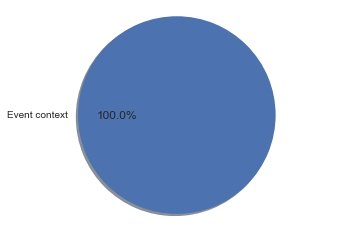

In [975]:
labels = module3ml['Event context'].astype('category').cat.categories.tolist()
counts = module3ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [968]:
module3ml["Event context"].value_counts()
# Module3ml does not have the same amount of event context


Event context    1048575
Name: Event context, dtype: int64

In [955]:
module3ml["Event name"].value_counts()


Quiz attempt viewed                                       8535
Course module viewed                                      5850
Course viewed                                             3452
Quiz attempt reviewed                                      571
Quiz attempt summary viewed                                544
Quiz attempt started                                       465
Quiz attempt submitted                                     398
User graded                                                384
Grade user report viewed                                   356
The status of the submission has been viewed.              234
Course module instance list viewed                         183
Course user report viewed                                   63
User enrolled in course                                     63
Role assigned                                               63
User list viewed                                            33
Submission form viewed.                                

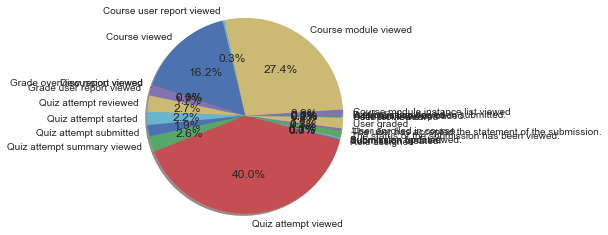

In [945]:
labels = module3ml['Event name'].astype('category').cat.categories.tolist()
counts = module3ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [888]:
time3 = module3ml["Time"].str.split(",", n = 1, expand = True)

In [889]:
# making separate Date column from new data frame 
module3ml["Date"]= time3[0] 

# making seperate Time column from new data frame
module3ml['Time']= time3[1]


In [907]:
# Convert the date column to datetime64
module3ml.Date = pd.to_datetime(module3ml.Date)

In [401]:
m3mg = module3mg[['First name', 'Surname', 'ID number', 'Course total (Real)', 'Assignment: Class Test (Real)', 'Assignment: Final CA Grade (out of 100%) (Real)', 'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)', 'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)', 'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)', 'Assignment: PCL (Real)', 'Assignment: RCL (Real)', 'Quiz: Quiz 1 (Real)', 'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)', 'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)', 'Quiz: Quiz 8 (Real)']]

In [751]:
m3mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Lab 2 (Real)', rot=70)

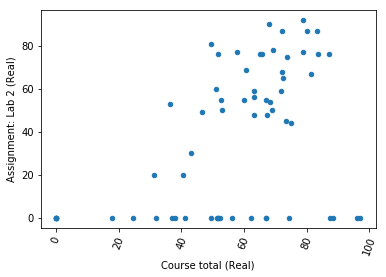

In [752]:
plt.show()

In [749]:
m3mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Quiz 2 (Real)', rot=70)

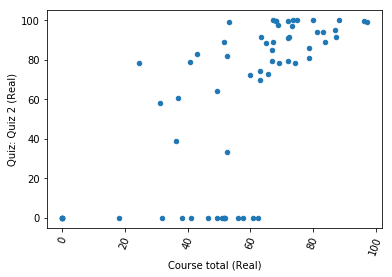

In [750]:
plt.show()

In [747]:
m3mg.plot(kind='scatter', x='Course total (Real)', y='Quiz: Quiz 1 (Real)', rot=70)


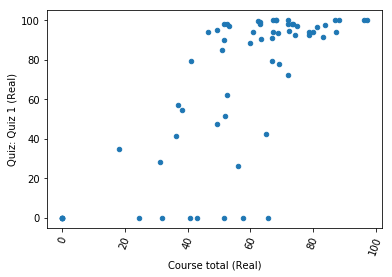

In [748]:
plt.show()

In [745]:
m3mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Lab 1 (Real)', rot=70)


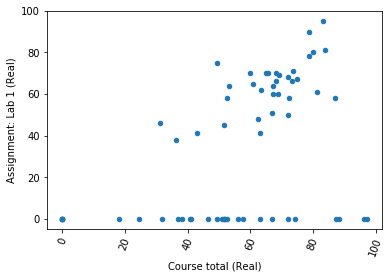

In [746]:
plt.show()

In [743]:
m3mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Class Test (Real)', rot=70)


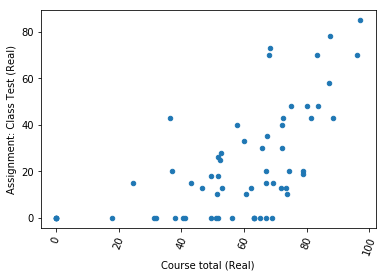

In [744]:
plt.show()

In [570]:
# Visualize the distribution of 'Assignment: Lab 1 (Real) in Module 3'

sns.distplot(m3mg['Assignment: Lab 1 (Real)'])

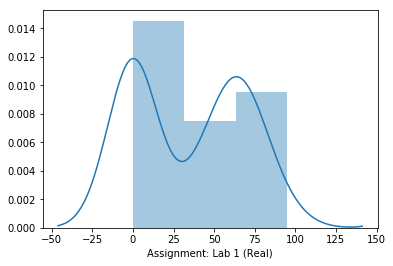

In [571]:
plt.show()
# 14 students got between 0 - 25

In [574]:
# Visualize the distribution of 'Quiz: Quiz 1 (Real) in Module 3'

sns.distplot(m3mg['Quiz: Quiz 1 (Real)'])

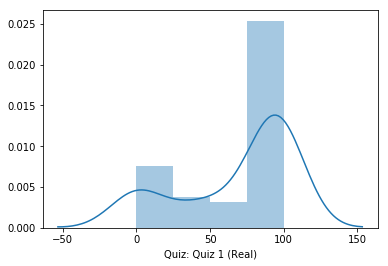

In [573]:
plt.show()

In [565]:
# Visualize the distribution of 'Quiz: Quiz 1 (Real)'
sns.distplot(module3mg['Quiz: Quiz 1 (Real)'])
# 

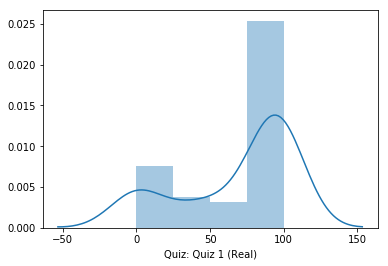

In [566]:
plt.show()

In [736]:
module3mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 25 columns):
First name                                         63 non-null object
Surname                                            63 non-null object
ID number                                          63 non-null object
Email address                                      63 non-null object
Course total (Real)                                63 non-null float64
Last downloaded from this course                   63 non-null int64
Assignment: Class Test (Real)                      63 non-null int64
Assignment: Final CA Grade (out of 100%) (Real)    63 non-null int64
Assignment: Lab 1 (Real)                           63 non-null int64
Assignment: Lab 2 (Real)                           63 non-null int64
Assignment: Lab 3 (Real)                           63 non-null int64
Assignment: Lab 4  (Real)                          63 non-null int64
Assignment: Lab 5 (Real)                           63 non-null 

In [458]:
module3mg.head(3)

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                53.10   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                43.06   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                78.78   

   Last downloaded from this course  Assignment: Class Test (Real)  \
0                        1550057586                             13   
1                        1550057586                             15   
2                        1550057586                             20   

   Assignment: Final CA Grade (out of 100%) (Real)  Assignment: Lab 1 (Real)  \
0                                               43                        64   
1                                               15                        41   
2                                               74                        78   

   Assignment: Lab 2 (Real)         ...           Assignment: RCL (Real)  \
0                        50         ...                                0   
1                        30         ...                                0   
2                        77         ...                                0   

   Assignment: Worksheets 1&2 (Real)  Quiz: Quiz 1 (Real)  \
0                                  0                97.11   
1                                  0                 0.00   
2                                  0                92.22   

   Quiz: Quiz 2 (Real)  Quiz: Quiz 3 (Real)  Quiz: Quiz 4 (Real)  \
0                99.17                92.31                  0.0   
1                82.92                 0.00                  0.0   
2                85.83               100.00                 30.0   

   Quiz: Quiz 5 (Real)  Quiz: Quiz 6 (Real)  Quiz: Quiz 7 (Real)  \
0                83.85                  0.0                 75.0   
1                60.00                 57.5                  0.0   
2                60.00                100.0                 87.5   

   Quiz: Quiz 8 (Real)  
0                  0.0  
1                  0.0  
2                  0.0  

[3 rows x 25 columns]

In [534]:
sns.boxplot(x = 'Course total (Real)', y = 'Quiz: Quiz 1 (Real)', data = module3mg)

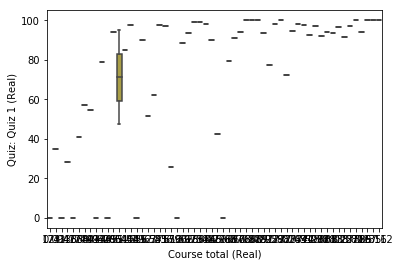

In [535]:
plt.show()

In [459]:
module3og.head(3)

First name Surname ID number  Total CA  Exam    Total
0       auP2    buYz  PuP2uYzI   77.7140  49.0  63.3570
1       aBlD    bnnW  mBlDnnWk    0.0000   NaN   0.0000
2       aTka    b80f  wTka80ff   53.0216  51.0  52.0108

In [759]:
fail3 = module3og['Total'] < 40

In [760]:
fail3.sum()

36

In [461]:
passed3 = module3og['Total'] > 40

In [755]:
passed3.sum()

26

In [462]:
# Using 'passed3' as the column name 
# and equating it to the list 
module3og['Pass'] = passed3 

In [532]:
sns.boxplot(x = 'Pass', y = 'Total', data = module3og)

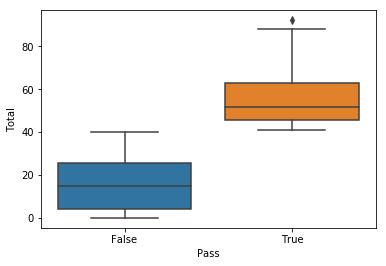

In [533]:
plt.show()

In [608]:
sns.boxplot(x = 'Pass', y = 'Total', data = module3og, hue = 'Total CA')

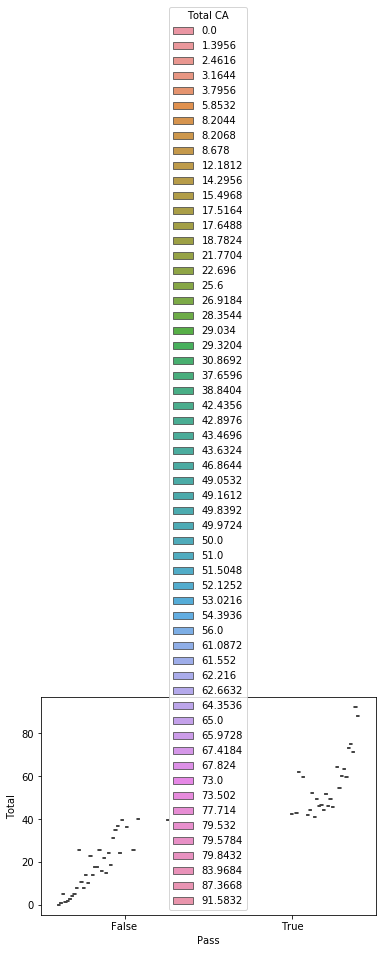

In [609]:
plt.show()

In [530]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(module3og.groupby(['Pass']).mean())


        Total CA       Exam      Total
Pass                                  
False  22.124941  15.875000  16.211119
True   65.371800  47.538462  56.455131


In [463]:
module3og.head(3)

First name Surname ID number  Total CA  Exam    Total   Pass
0       auP2    buYz  PuP2uYzI   77.7140  49.0  63.3570   True
1       aBlD    bnnW  mBlDnnWk    0.0000   NaN   0.0000  False
2       aTka    b80f  wTka80ff   53.0216  51.0  52.0108   True

In [480]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(module3og.groupby(['Pass']).mean())

        Total CA       Exam      Total
Pass                                  
False  22.124941  15.875000  16.211119
True   65.371800  47.538462  56.455131


In [402]:
m3mg.describe().transpose()
# Generates descriptive statistics


count       mean        std  \
Course total (Real)                               63.0  56.969048  23.835164   
Assignment: Class Test (Real)                     63.0  22.174603  23.446947   
Assignment: Final CA Grade (out of 100%) (Real)   63.0  39.857143  26.841745   
Assignment: Lab 1 (Real)                          63.0  34.222222  33.327526   
Assignment: Lab 2 (Real)                          63.0  37.936508  34.048766   
Assignment: Lab 3 (Real)                          63.0  28.285714  36.558141   
Assignment: Lab 4  (Real)                         63.0  39.063492  39.031779   
Assignment: Lab 5 (Real)                          63.0  29.634921  35.065055   
Assignment: Lab 6 (Real)                          63.0  21.698413  34.023064   
Assignment: PCL (Real)                            63.0  34.174603  34.472308   
Assignment: RCL (Real)                            63.0   1.269841  10.079053   
Quiz: Quiz 1 (Real)                               63.0  68.186984  38.455517   
Quiz: Quiz 2 (Real)                               63.0  59.146667  41.313361   
Quiz: Quiz 3 (Real)                               63.0  47.863175  47.084338   
Quiz: Quiz 4 (Real)                               63.0  28.412698  38.490420   
Quiz: Quiz 5 (Real)                               63.0  54.566667  42.110457   
Quiz: Quiz 6 (Real)                               63.0  43.031746  43.775902   
Quiz: Quiz 7 (Real)                               63.0  28.392857  38.197432   
Quiz: Quiz 8 (Real)                               63.0  15.000000  31.347429   

                                                 min     25%    50%      75%  \
Course total (Real)                              0.0  47.990  63.08   72.325   
Assignment: Class Test (Real)                    0.0   0.000  15.00   37.500   
Assignment: Final CA Grade (out of 100%) (Real)  0.0  16.500  43.00   62.000   
Assignment: Lab 1 (Real)                         0.0   0.000  41.00   65.500   
Assignment: Lab 2 (Real)                         0.0   0.000  48.00   68.500   
Assignment: Lab 3 (Real)                         0.0   0.000   0.00   55.000   
Assignment: Lab 4  (Real)                        0.0   0.000  46.00   77.500   
Assignment: Lab 5 (Real)                         0.0   0.000   0.00   55.500   
Assignment: Lab 6 (Real)                         0.0   0.000   0.00   47.500   
Assignment: PCL (Real)                           0.0   0.000  30.00   67.500   
Assignment: RCL (Real)                           0.0   0.000   0.00    0.000   
Quiz: Quiz 1 (Real)                              0.0  41.665  91.56   97.555   
Quiz: Quiz 2 (Real)                              0.0   0.000  78.75   92.710   
Quiz: Quiz 3 (Real)                              0.0   0.000  46.15  100.000   
Quiz: Quiz 4 (Real)                              0.0   0.000   0.00   56.250   
Quiz: Quiz 5 (Real)                              0.0   0.000  61.54   96.920   
Quiz: Quiz 6 (Real)                              0.0   0.000  28.50   95.750   
Quiz: Quiz 7 (Real)                              0.0   0.000   0.00   73.750   
Quiz: Quiz 8 (Real)                              0.0   0.000   0.00    0.000   

                                                    max  
Course total (Real)                               97.12  
Assignment: Class Test (Real)                     85.00  
Assignment: Final CA Grade (out of 100%) (Real)   92.00  
Assignment: Lab 1 (Real)                          95.00  
Assignment: Lab 2 (Real)                          92.00  
Assignment: Lab 3 (Real)                          98.00  
Assignment: Lab 4  (Real)                        100.00  
Assignment: Lab 5 (Real)                          95.00  
Assignment: Lab 6 (Real)                          95.00  
Assignment: PCL (Real)                            93.00  
Assignment: RCL (Real)                            80.00  
Quiz: Quiz 1 (Real)                              100.00  
Quiz: Quiz 2 (Real)                              100.00  
Quiz: Quiz 3 (Real)                

In [509]:
sns.distplot(m3mg['Course total (Real)'])

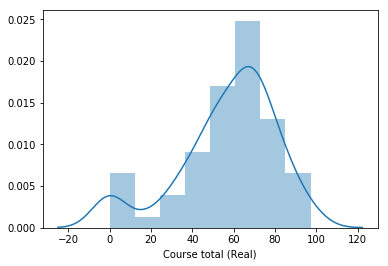

In [510]:
plt.show()

In [465]:
print(m3mg['Course total (Real)'].value_counts(dropna=False))


0.00     5
49.44    2
46.54    1
31.17    1
64.93    1
53.10    1
78.80    1
57.66    1
74.28    1
68.22    1
62.34    1
72.49    1
87.01    1
66.87    1
80.02    1
63.08    1
63.17    1
72.16    1
73.59    1
24.47    1
65.68    1
74.92    1
51.04    1
52.50    1
87.50    1
63.27    1
67.00    1
81.25    1
31.77    1
69.29    1
71.88    1
51.60    1
52.41    1
67.37    1
83.27    1
67.08    1
51.63    1
51.77    1
51.49    1
36.44    1
68.08    1
96.16    1
56.20    1
88.35    1
78.78    1
68.95    1
73.31    1
40.62    1
97.12    1
41.06    1
43.06    1
59.97    1
17.94    1
36.99    1
72.02    1
38.04    1
83.71    1
60.75    1
Name: Course total (Real), dtype: int64


In [407]:
print (module3ml.columns.tolist())


['Time', 'User full name', 'Affe CTed user', 'Event context', 'Component', 'Event name', 'Description', 'Origin', 'IP address']


In [408]:
m3ml = module3ml[['Time', 'User full name', 'Affe CTed user', 'Event context', 'Component', 'Event name', 'Description', 'Origin',]]

In [411]:
# Number of records in the m3ml file

len(m3ml)

1048575

In [409]:
m3ml.describe().transpose()
# Quiz was the most frequent

#Attribute Information:

#Affected user: Contains the name of the user if the action is related to them.This has been removed as it is blank
#Time: It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
#User full name: Name of the user is listed in this column. - aTcu bg6b was the most frequent user
#Event context: It displays the name of the activity or resource. Ex: Course: Event context was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ... Quiz was most frequent
#Event name: Is in relation to users' action. There are four actions that a user can do in Moodle - CRUD .Quiz attempt viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.This will be removed
#IP address: Shows the IP address of the user.This will be removed as this does not provide any information
#Origin: Indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.



count unique  \
Time              21331   8933   
User full name    21331     63   
Affe CTed user    21331      1   
Event context   1048575      1   
Component         21331     11   
Event name        21331     25   
Description       21331     42   
Origin            21331      2   

                                                              top     freq  
Time                                               5/10/18, 12:48       30  
User full name                                          aTcu bg6b      972  
Affe CTed user                                                  -    21331  
Event context                                       Event context  1048575  
Component                                                    Quiz    12607  
Event name                                    Quiz attempt viewed     8535  
Description     The user with id '0' has viewed the attempt wi...     8535  
Origin                                                        web    20685

In [412]:
print (module3og.columns.tolist())


['First name', 'Surname', 'ID number', 'Total CA', 'Exam', 'Total']


In [398]:
module3og.describe().transpose()


count       mean        std  min      25%      50%     75%      max
Total CA   63.0  39.972851  26.881306  0.0  16.5066  43.4696  61.884  91.5832
Exam       50.0  32.340000  22.615337  1.0  13.5000  30.0000  40.750  97.0000
Total      63.0  32.819759  24.124211  0.0  12.2030  34.7178  48.138  92.1834

In [413]:
module3og.head()

First name Surname ID number  Total CA  Exam    Total
0       auP2    buYz  PuP2uYzI   77.7140  49.0  63.3570
1       aBlD    bnnW  mBlDnnWk    0.0000   NaN   0.0000
2       aTka    b80f  wTka80ff   53.0216  51.0  52.0108
3       aD2n    bqfd  sD2nqfdF   64.3536  28.0  46.1768
4       aPi9    bECZ  uPi9ECZm   29.0340  15.0  22.0170

In [400]:
m3og.describe().transpose()


NameError: name 'm3og' is not defined

In [52]:
module3mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 25 columns):
First name                                         63 non-null object
Surname                                            63 non-null object
ID number                                          63 non-null object
Email address                                      63 non-null object
Course total (Real)                                63 non-null float64
Last downloaded from this course                   63 non-null int64
Assignment: Class Test (Real)                      63 non-null int64
Assignment: Final CA Grade (out of 100%) (Real)    63 non-null int64
Assignment: Lab 1 (Real)                           63 non-null int64
Assignment: Lab 2 (Real)                           63 non-null int64
Assignment: Lab 3 (Real)                           63 non-null int64
Assignment: Lab 4  (Real)                          63 non-null int64
Assignment: Lab 5 (Real)                           63 non-null 

In [205]:
module3mg.head()
# Can drop Assignment: Worksheets 1&2 (Real)
# Last downloaded from this course
# Email address


First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                53.10   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                43.06   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                78.78   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                68.22   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                67.37   

   Last downloaded from this course  Assignment: Class Test (Real)  \
0                        1550057586                             13   
1                        1550057586                             15   
2                        1550057586                             20   
3                        1550057586                             73   
4                        1550057586                             35   

   Assignment: Final CA Grade (out of 100%) (Real)  Assignment: Lab 1 (Real)  \
0                                               43                        64   
1                                               15                        41   
2                                               74                        78   
3                                               63                        66   
4                                               49                        64   

   Assignment: Lab 2 (Real)         ...           Assignment: RCL (Real)  \
0                        50         ...                                0   
1                        30         ...                                0   
2                        77         ...                                0   
3                        54         ...                                0   
4                        48         ...                                0   

   Assignment: Worksheets 1&2 (Real)  Quiz: Quiz 1 (Real)  \
0                                  0                97.11   
1                                  0                 0.00   
2                                  0                92.22   
3                                  0               100.00   
4                                  0               100.00   

   Quiz: Quiz 2 (Real)  Quiz: Quiz 3 (Real)  Quiz: Quiz 4 (Real)  \
0                99.17                92.31                  0.0   
1                82.92                 0.00                  0.0   
2                85.83               100.00                 30.0   
3                99.58               100.00                 32.5   
4                88.75               100.00                  0.0   

   Quiz: Quiz 5 (Real)  Quiz: Quiz 6 (Real)  Quiz: Quiz 7 (Real)  \
0                83.85                  0.0                 75.0   
1                60.00                 57.5                  0.0   
2                60.00                100.0                 87.5   
3                60.00                 99.0                 72.5   
4                 0.00                100.0                 75.0   

   Quiz: Quiz 8 (Real)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 25 columns]

In [208]:
m3mg.head()

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                53.10   
1       aSnR    bGk9  VSnRGk9O                43.06   
2       aAK5    bSAb  tAK5SAbE                78.78   
3       a4jV    bO8M  14jVO8M7                68.22   
4       aa14    bMdv  ba14Mdv9                67.37   

   Assignment: Class Test (Real)  \
0                             13   
1                             15   
2                             20   
3                             73   
4                             35   

   Assignment: Final CA Grade (out of 100%) (Real)  Assignment: Lab 1 (Real)  \
0                                               43                        64   
1                                               15                        41   
2                                               74                        78   
3                                               63                        66   
4                                               49                        64   

   Assignment: Lab 2 (Real)  Assignment: Lab 3 (Real)  \
0                        50                        23   
1                        30                         0   
2                        77                        94   
3                        54                        48   
4                        48                        49   

   Assignment: Lab 4  (Real)         ...           Assignment: PCL (Real)  \
0                         61         ...                               55   
1                          0         ...                                0   
2                        100         ...                               74   
3                         63         ...                               57   
4                         71         ...                               41   

   Assignment: RCL (Real)  Quiz: Quiz 1 (Real)  Quiz: Quiz 2 (Real)  \
0                       0                97.11                99.17   
1                       0                 0.00                82.92   
2                       0                92.22                85.83   
3                       0               100.00                99.58   
4                       0               100.00                88.75   

   Quiz: Quiz 3 (Real)  Quiz: Quiz 4 (Real)  Quiz: Quiz 5 (Real)  \
0                92.31                  0.0                83.85   
1                 0.00                  0.0                60.00   
2               100.00                 30.0                60.00   
3               100.00                 32.5                60.00   
4               100.00                  0.0                 0.00   

   Quiz: Quiz 6 (Real)  Quiz: Quiz 7 (Real)  Quiz: Quiz 8 (Real)  
0                  0.0                 75.0                  0.0  
1                 57.5                  0.0                  0.0  
2                100.0                 87.5                  0.0  
3                 99.0                 72.5                  0.0  
4                100.0                 75.0                  0.0  

[5 rows x 22 columns]

In [36]:
module3mg.head()

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                53.10   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                43.06   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                78.78   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                68.22   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                67.37   

   Last downloaded from this course  Assignment: Class Test (Real)  \
0                        1550057586                             13   
1                        1550057586                             15   
2                        1550057586                             20   
3                        1550057586                             73   
4                        1550057586                             35   

   Assignment: Final CA Grade (out of 100%) (Real)  Assignment: Lab 1 (Real)  \
0                                               43                        64   
1                                               15                        41   
2                                               74                        78   
3                                               63                        66   
4                                               49                        64   

   Assignment: Lab 2 (Real)         ...           Assignment: RCL (Real)  \
0                        50         ...                                0   
1                        30         ...                                0   
2                        77         ...                                0   
3                        54         ...                                0   
4                        48         ...                                0   

   Assignment: Worksheets 1&2 (Real)  Quiz: Quiz 1 (Real)  \
0                                  0                97.11   
1                                  0                 0.00   
2                                  0                92.22   
3                                  0               100.00   
4                                  0               100.00   

   Quiz: Quiz 2 (Real)  Quiz: Quiz 3 (Real)  Quiz: Quiz 4 (Real)  \
0                99.17                92.31                  0.0   
1                82.92                 0.00                  0.0   
2                85.83               100.00                 30.0   
3                99.58               100.00                 32.5   
4                88.75               100.00                  0.0   

   Quiz: Quiz 5 (Real)  Quiz: Quiz 6 (Real)  Quiz: Quiz 7 (Real)  \
0                83.85                  0.0                 75.0   
1                60.00                 57.5                  0.0   
2                60.00                100.0                 87.5   
3                60.00                 99.0                 72.5   
4                 0.00                100.0                 75.0   

   Quiz: Quiz 8 (Real)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 25 columns]

In [109]:
module3mg['Course total (Real)'].plot('hist')

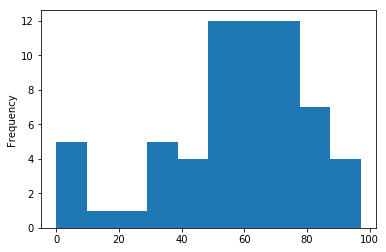

In [110]:
plt.show()

module3mg.info()

In [219]:
time3 = pd.read_csv('Module3-MoodleLogs.csv',index_col='Time',parse_dates = True, low_memory=False )

In [220]:
time3.sort_index()
# 2018-01-10 - 
# Big file


User full name Affe CTed user  Event context Component  \
Time                                                                         
2018-01-10 00:43:00      a4I0 bKMc              -  Event context    System   
2018-01-10 00:44:00      a4I0 bKMc              -  Event context      Page   
2018-01-10 01:39:00      aD2n bqfd              -  Event context    System   
2018-01-10 01:39:00      aD2n bqfd              -  Event context      File   
2018-01-10 01:40:00      aD2n bqfd              -  Event context      File   
2018-01-10 01:40:00      aD2n bqfd              -  Event context      File   
2018-01-10 01:40:00      aD2n bqfd              -  Event context      File   
2018-01-10 08:01:00      aJGs bxon              -  Event context    System   
2018-01-10 08:46:00      aw97 baOy              -  Event context    System   
2018-01-10 09:12:00      aBlD bnnW              -  Event context    System   
2018-01-10 09:12:00      aBlD bnnW              -  Event context    System   
2018-01-10 09:13:00      aBlD bnnW              -  Event context      File   
2018-01-10 09:13:00      aBlD bnnW              -  Event context      File   
2018-01-10 09:13:00      aBlD bnnW              -  Event context      File   
2018-01-10 09:13:00      aBlD bnnW              -  Event context      File   
2018-01-10 09:13:00      a3xG bp9L              -  Event context    System   
2018-01-10 09:14:00      aBlD bnnW              -  Event context      File   
2018-01-10 09:14:00      aA6B bBfk              -  Event context    System   
2018-01-10 09:14:00      a3xG bp9L              -  Event context      File   
2018-01-10 09:14:00      aA6B bBfk              -  Event context      File   
2018-01-10 09:15:00      aBlD bnnW              -  Event context      File   
2018-01-10 12:39:00      aw97 baOy              -  Event context    System   
2018-01-10 13:05:00      aK80 bFqH              -  Event context    System   
2018-01-10 13:05:00      aK80 bFqH              -  Event context      Quiz   
2018-01-10 13:06:00      aTka b80f              -  Event context    System   
2018-01-10 13:06:00      a4I0 bKMc              -  Event context    System   
2018-01-10 13:06:00      aiGp b3wt              -  Event context    System   
2018-01-10 13:06:00      a8NM bDqB              -  Event context    System   
2018-01-10 13:06:00      aZWk bb86              -  Event context    System   
2018-01-10 13:06:00      a8NM bDqB              -  Event context      Quiz   
...                            ...            ...            ...       ...   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN            NaN  Event context       NaN   
NaT                            NaN        

In [222]:
time3.loc['2018-01-01':'2018-01-07',['Event context','Event name','User full name']]

Empty DataFrame
Columns: [Event context, Event name, User full name]
Index: []

In [55]:
module3ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
Time              21331 non-null object
User full name    21331 non-null object
Affe CTed user    21331 non-null object
Event context     1048575 non-null object
Component         21331 non-null object
Event name        21331 non-null object
Description       21331 non-null object
Origin            21331 non-null object
IP address        21331 non-null object
dtypes: object(9)
memory usage: 72.0+ MB


In [57]:
module3og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
First name    63 non-null object
Surname       63 non-null object
ID number     63 non-null object
Total CA      63 non-null float64
Exam          50 non-null float64
Total         63 non-null float64
dtypes: float64(3), object(3)
memory usage: 3.0+ KB


In [27]:
module3og

First name Surname ID number  Total CA  Exam    Total
0        auP2    buYz  PuP2uYzI   77.7140  49.0  63.3570
1        aBlD    bnnW  mBlDnnWk    0.0000   NaN   0.0000
2        aTka    b80f  wTka80ff   53.0216  51.0  52.0108
3        aD2n    bqfd  sD2nqfdF   64.3536  28.0  46.1768
4        aPi9    bECZ  uPi9ECZm   29.0340  15.0  22.0170
5        ajdR    bQnj  FjdRQnjO   43.4696   5.0  24.2348
6        a76c    bdsO  N76cdsOe   21.7704   6.0  13.8852
7        aAK5    bSAb  tAK5SAbE   73.5020  47.0  60.2510
8        a7nA    bx4i  z7nAx4iB    0.0000   NaN   0.0000
9        amZd    bJI1  LmZdJI1B   18.7824  27.0  22.8912
10       afDK    bEXb  qfDKEXbx   62.2160  26.0  44.1080
11       aA6B    bBfk  8A6BBfkf   87.3668  97.0  92.1834
12       aSiH    bHbM  CSiHHbMW   12.1812  39.0  25.5906
13       a322    bSXp  z322SXpu   49.9724   1.0  25.4862
14       a0V1    b1X9  I0V11X9O   42.4356  27.0  34.7178
15       atVF    bWWA  btVFWWA9   79.5784  67.0  73.2892
16       aglU    bwda  6glUwdaL   46.8644  38.0  42.4322
17       aiGp    b3wt  fiGp3wt7   54.3936  28.0  41.1968
18       aSnR    bGk9  VSnRGk9O   15.4968   NaN   7.7484
19       azCY    bvQB  tzCYvQBD   61.0872  31.0  46.0436
20       aM4c    bkZL  eM4ckZLi    8.2044   NaN   4.1022
21       alo7    bCQc  Ilo7CQcn   30.8692  18.0  24.4346
22       a8NM    bDqB  U8NMDqBG   42.8976  31.0  36.9488
23       asqg    bbCp  JsqgbCpo   65.0000  34.0  49.5000
24       aF4r    bAV6  3F4rAV6x    3.1644   NaN   1.5822
25       aNBi    b8W7  lNBi8W7k   52.1252  36.0  44.0626
26       a1cZ    byzN  11cZyzNR   50.0000  69.0  59.5000
27       a9OS    bhAx  O9OShAx7    0.0000   NaN   0.0000
28       aei9    bg2L  xei9g2LG   73.0000  36.0  54.5000
29       aYZZ    bVOq  sYZZVOqR   26.9184  24.0  25.4592
..        ...     ...       ...       ...   ...      ...
33       aJ8F    bQ0G  xJ8FQ0Gy    1.3956   NaN   0.6978
34       a3xG    bp9L  M3xGp9Lo   29.3204   NaN  14.6602
35       a2mi    bDko  z2miDkoM   17.6488   3.0  10.3244
36       aa14    bMdv  ba14Mdv9   51.0000  29.0  40.0000
37       aHCL    bSn1  jHCLSn1y   67.4184  12.0  39.7092
38       ajrV    bTes  qjrVTesk   22.6960  13.0  17.8480
39       aTcu    bg6b  LTcug6b4   65.9728  25.0  45.4864
40       aw97    baOy  fw97aOyU   28.3544   3.0  15.6772
41       am5M    b1HG  um5M1HGl   61.5520  32.0  46.7760
42       aKpv    bLk6  pKpvLk6H    8.6780   7.0   7.8390
43       aS1r    buSe  KS1ruSeJ    0.0000   NaN   0.0000
44       aK80    bFqH  8K80FqHS   91.5832  85.0  88.2916
45       aMPU    b43l  UMPU43lx   79.8432  70.0  74.9216
46       avO9    byWN  bvO9yWNl   79.5320  40.0  59.7660
47       a4I0    bKMc  J4I0KMcB   67.8240  61.0  64.4120
48       afWk    bKiF  zfWkKiFa    0.0000   NaN   0.0000
49       a4jV    bO8M  14jVO8M7   62.6632  41.0  51.8316
50       acj7    b2dI  kcj72dIk    8.2068   2.0   5.1034
51       aL20    blLY  6L20lLYB   14.2956   7.0  10.6478
52       a6Uc    b22A  t6Uc22AA   38.8404  24.0  31.4202
53       aW3J    bhQ6  LW3JhQ6U   37.6596   NaN  18.8298
54       aiEd    b8Pq  wiEd8PqG   51.5048  32.0  41.7524
55       a58K    bM4Z  758KM4Z1   56.0000  43.0  49.5000
56       aUzU    bZxm  dUzUZxmE    2.4616   8.0   5.2308
57       aOmN    bXsd  QOmNXsdY   83.9684  59.0  71.4842
58       aJGs    bxon  2JGsxonj   17.5164  10.0  13.7582
59       aI1T    bxjW  aI1TxjWc    5.8532   NaN   2.9266
60       aZWk    bb86  cZWkb86b   49.8392  74.0  61.9196
61       akYS    bCPf  vkYSCPfo   49.0532  24.0  36.5266
62       apAF    bgEi  VpAFgEiV   25.6000  10.0  17.8000

[63 rows x 6 columns]

In [33]:
module3mg.head()
# ID number = primary id
# Course total Real
# Assignment Class Test
# Assignment Final CA Grade


First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                53.10   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                43.06   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                78.78   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                68.22   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                67.37   

   Last downloaded from this course  Assignment: Class Test (Real)  \
0                        1550057586                             13   
1                        1550057586                             15   
2                        1550057586                             20   
3                        1550057586                             73   
4                        1550057586                             35   

   Assignment: Final CA Grade (out of 100%) (Real)  Assignment: Lab 1 (Real)  \
0                                               43                        64   
1                                               15                        41   
2                                               74                        78   
3                                               63                        66   
4                                               49                        64   

   Assignment: Lab 2 (Real)         ...           Assignment: RCL (Real)  \
0                        50         ...                                0   
1                        30         ...                                0   
2                        77         ...                                0   
3                        54         ...                                0   
4                        48         ...                                0   

   Assignment: Worksheets 1&2 (Real)  Quiz: Quiz 1 (Real)  \
0                                  0                97.11   
1                                  0                 0.00   
2                                  0                92.22   
3                                  0               100.00   
4                                  0               100.00   

   Quiz: Quiz 2 (Real)  Quiz: Quiz 3 (Real)  Quiz: Quiz 4 (Real)  \
0                99.17                92.31                  0.0   
1                82.92                 0.00                  0.0   
2                85.83               100.00                 30.0   
3                99.58               100.00                 32.5   
4                88.75               100.00                  0.0   

   Quiz: Quiz 5 (Real)  Quiz: Quiz 6 (Real)  Quiz: Quiz 7 (Real)  \
0                83.85                  0.0                 75.0   
1                60.00                 57.5                  0.0   
2                60.00                100.0                 87.5   
3                60.00                 99.0                 72.5   
4                 0.00                100.0                 75.0   

   Quiz: Quiz 8 (Real)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 25 columns]

In [115]:
module3mg.describe()
# Mean 56
# Max 97
# Assigment lab 1 - 6


Course total (Real)  Last downloaded from this course  \
count            63.000000                      6.300000e+01   
mean             56.969048                      1.550058e+09   
std              23.835164                      4.692271e-01   
min               0.000000                      1.550058e+09   
25%              47.990000                      1.550058e+09   
50%              63.080000                      1.550058e+09   
75%              72.325000                      1.550058e+09   
max              97.120000                      1.550058e+09   

       Assignment: Class Test (Real)  \
count                      63.000000   
mean                       22.174603   
std                        23.446947   
min                         0.000000   
25%                         0.000000   
50%                        15.000000   
75%                        37.500000   
max                        85.000000   

       Assignment: Final CA Grade (out of 100%) (Real)  \
count                                        63.000000   
mean                                         39.857143   
std                                          26.841745   
min                                           0.000000   
25%                                          16.500000   
50%                                          43.000000   
75%                                          62.000000   
max                                          92.000000   

       Assignment: Lab 1 (Real)  Assignment: Lab 2 (Real)  \
count                 63.000000                 63.000000   
mean                  34.222222                 37.936508   
std                   33.327526                 34.048766   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                   41.000000                 48.000000   
75%                   65.500000                 68.500000   
max                   95.000000                 92.000000   

       Assignment: Lab 3 (Real)  Assignment: Lab 4  (Real)  \
count                 63.000000                  63.000000   
mean                  28.285714                  39.063492   
std                   36.558141                  39.031779   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                  46.000000   
75%                   55.000000                  77.500000   
max                   98.000000                 100.000000   

       Assignment: Lab 5 (Real)  Assignment: Lab 6 (Real)  \
count                 63.000000                 63.000000   
mean                  29.634921                 21.698413   
std                   35.065055                 34.023064   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                   55.500000                 47.500000   
max                   95.000000                 95.000000   

              ...           Assignment: RCL (Real)  \
count         ...                        63.000000   
mean          ...                         1.269841   
std           ...                        10.079053   
min           ...                         0.000000   
25%           ...                         0.000000   
50%           ...                         0.000000   
75%           ...                         0.000000   
max           ...                        80.000000   

       Assignment: Worksheets 1&2 (Real)  Quiz: Quiz 1 (Real)  \
count                               63.0            63.000000   
mean                                 0.0            68.186984   
std                                  0.0            38.455517   
min                                  0.0             0.000000   
25%                                  0.0            41.665000   
50%       

In [34]:
module3ml.head()
# User full name = primary id
# Event name
# Description

Time User full name Affe CTed user  Event context    Component  \
0  9/02/19, 20:51      aOmN bXsd              -  Event context       System   
1  8/02/19, 15:39      afDK bEXb              -  Event context  User report   
2  8/02/19, 15:39      afDK bEXb              -  Event context       System   
3  8/02/19, 14:20      ajdR bQnj              -  Event context       System   
4  4/02/19, 22:30      aZWk bb86              -  Event context       System   

                  Event name  \
0              Course viewed   
1   Grade user report viewed   
2              Course viewed   
3  Course user report viewed   
4              Course viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the course with id...    web  127.0.0.1  
1  The user with id '0' viewed the user report in...    web  127.0.0.1  
2  The user with id '0' viewed the course with id...    web  127.0.0.1  
3  The user with id '0' viewed the user report fo...    web  127.0.0.1  
4  The user with id '0' viewed the course with id...    web  127.0.0.1

In [116]:
module3ml.describe()

Time User full name Affe CTed user  Event context Component  \
count            21331          21331          21331        1048575     21331   
unique            8933             63              1              1        11   
top     5/10/18, 12:48      aTcu bg6b              -  Event context      Quiz   
freq                30            972          21331        1048575     12607   

                 Event name  \
count                 21331   
unique                   25   
top     Quiz attempt viewed   
freq                   8535   

                                              Description Origin IP address  
count                                               21331  21331      21331  
unique                                                 42      2          1  
top     The user with id '0' has viewed the attempt wi...    web  127.0.0.1  
freq                                                 8535  20685      21331

In [35]:
module3og.head()
# Own grades
# ID number = primary id

First name Surname ID number  Total CA  Exam    Total
0       auP2    buYz  PuP2uYzI   77.7140  49.0  63.3570
1       aBlD    bnnW  mBlDnnWk    0.0000   NaN   0.0000
2       aTka    b80f  wTka80ff   53.0216  51.0  52.0108
3       aD2n    bqfd  sD2nqfdF   64.3536  28.0  46.1768
4       aPi9    bECZ  uPi9ECZm   29.0340  15.0  22.0170

In [80]:
module3mg.shape

(63, 25)

In [100]:
module3mg.columns
# ID number
# Course total
# Last downloaded from this course
# Assigment Lab 1-6
# Quiz 2 - 8

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Course total (Real)', 'Last downloaded from this course',
       'Assignment: Class Test (Real)',
       'Assignment: Final CA Grade (out of 100%) (Real)',
       'Assignment: Lab 1 (Real)', 'Assignment: Lab 2 (Real)',
       'Assignment: Lab 3 (Real)', 'Assignment: Lab 4  (Real)',
       'Assignment: Lab 5 (Real)', 'Assignment: Lab 6 (Real)',
       'Assignment: PCL (Real)', 'Assignment: RCL (Real)',
       'Assignment: Worksheets 1&2 (Real)', 'Quiz: Quiz 1 (Real)',
       'Quiz: Quiz 2 (Real)', 'Quiz: Quiz 3 (Real)', 'Quiz: Quiz 4 (Real)',
       'Quiz: Quiz 5 (Real)', 'Quiz: Quiz 6 (Real)', 'Quiz: Quiz 7 (Real)',
       'Quiz: Quiz 8 (Real)'],
      dtype='object')

In [79]:
module3ml.shape

(1048575, 9)

In [117]:
module3og.describe()
# Mean CA 39
# Max 91

Total CA       Exam      Total
count  63.000000  50.000000  63.000000
mean   39.972851  32.340000  32.819759
std    26.881306  22.615337  24.124211
min     0.000000   1.000000   0.000000
25%    16.506600  13.500000  12.203000
50%    43.469600  30.000000  34.717800
75%    61.884000  40.750000  48.138000
max    91.583200  97.000000  92.183400

In [98]:
module3ml.columns
# User full name
# Event context
# Description
# 

Index(['Time', 'User full name', 'Affe CTed user', 'Event context',
       'Component', 'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [ ]:
# Begin4 START of MODULE FOUR ##################

In [38]:
# Data Preperation Module 4
# 2 Files in this module
# Module 4

module4ml = pd.read_csv('Module4-MoodleLogs.csv')

In [39]:
module4mg = pd.read_csv('Module4-MoodleGrades.csv')

In [209]:
print (module4mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Assignment: Upload 1 (Real)', 'Assignment: Upload 2 (Real)', 'Assignment: Upload 3 (Real)', 'Assignment: Upload 4 (Real)', 'Assignment: Upload 5 (Real)', 'Assignment: Upload 6 (Real)', 'Assignment: Upload 7 (Real)', 'Assignment: Overall grade feedback sheets (Real)', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [847]:
# Print the number of unique values in each modul4mg column
print(module4mg.nunique())

First name                                           64
Surname                                              64
ID number                                            64
Email address                                        64
Assignment: Upload 1 (Real)                           1
Assignment: Upload 2 (Real)                           1
Assignment: Upload 3 (Real)                           1
Assignment: Upload 4 (Real)                           1
Assignment: Upload 5 (Real)                           1
Assignment: Upload 6 (Real)                           1
Assignment: Upload 7 (Real)                           1
Assignment: Overall grade feedback sheets (Real)      1
Assignment: SUBMIT HERE: Title and Purpose (Real)    23
Course total (Real)                                  23
Last downloaded from this course                      1
Pass                                                  2
dtype: int64


In [848]:
# Print the number of unique values in each modul4mg column
print(module4ml.nunique())

Time              1416
User full name      64
Affected user        1
Event context       20
Component            8
Event name          21
Description         80
Origin               2
IP address           1
dtype: int64


In [ ]:
# Cleanup4
#
#

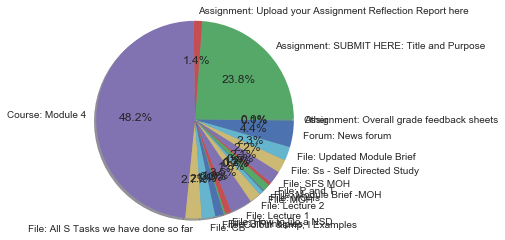

In [976]:
labels = module4ml['Event context'].astype('category').cat.categories.tolist()
counts = module4ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [967]:
module4ml["Event context"].value_counts()


Course: Module 4                                             1215
Assignment: SUBMIT HERE: Title and Purpose                    600
Forum: News forum                                             110
File: Lecture 1                                                89
File: All S Tasks we have done so far                          67
File: Updated Module Brief                                     57
File: CB                                                       56
File: Ss - Self Directed Study                                 55
File: SFS MOH                                                  53
File: Lecture 2                                                46
File: Colour &amp; I Examples                                  35
Assignment: Upload your Assignment Reflection Report here      35
File: Module Brief -MOH                                        30
File: How to Do a NSD                                          26
File: MOH                                                      18
File: P an

In [956]:
module4ml["Event name"].value_counts()


Course viewed                                             850
Course module viewed                                      601
The status of the submission has been viewed.             285
Grade user report viewed                                  144
Submission form viewed.                                    79
A submission has been submitted.                           73
An online text has been uploaded.                          73
Discussion viewed                                          69
User enrolled in course                                    64
Role assigned                                              64
The user has accepted the statement of the submission.     51
Submission created.                                        49
User list viewed                                           39
Submission updated.                                        25
User profile viewed                                        19
Course user report viewed                                  16
Course m

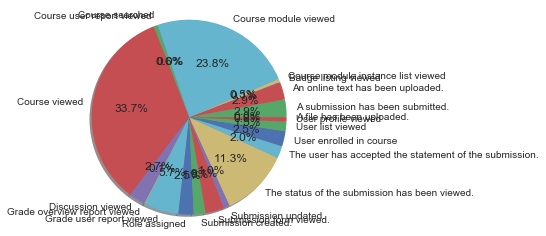

In [946]:
labels = module4ml['Event name'].astype('category').cat.categories.tolist()
counts = module4ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [891]:
#time4
time4 = module4ml["Time"].str.split(",", n = 1, expand = True)

In [892]:
# making separate Date column from new data frame 
module4ml["Date"]= time4[0] 

# making seperate Time column from new data frame
module4ml['Time']= time4[1]


In [908]:
# Convert the date column to datetime64
module4ml.Date = pd.to_datetime(module4ml.Date)

In [893]:
module4ml.head()

Time User full name Affected user     Event context        Component  \
0   09:22      aAK5 bSAb             -  Course: Module 4           System   
1   19:14      a58K bM4Z             -  Course: Module 4      User report   
2   19:14      a58K bM4Z             -  Course: Module 4  Overview report   
3   19:13      a58K bM4Z             -  Course: Module 4      User report   
4   19:12      a58K bM4Z             -  Course: Module 4           System   

                     Event name  \
0                 Course viewed   
1      Grade user report viewed   
2  Grade overview report viewed   
3      Grade user report viewed   
4                 Course viewed   

                                         Description Origin IP address  \
0  The user with id '0' viewed the course with id...    web  127.0.0.1   
1  The user with id '0' viewed the user report in...    web  127.0.0.1   
2  The user with id '0' viewed the overview repor...    web  127.0.0.1   
3  The user with id '0' viewed the user report in...    web  127.0.0.1   
4  The user with id '0' viewed the course with id...    web  127.0.0.1   

       Date  
0  21/03/19  
1  20/03/19  
2  20/03/19  
3  20/03/19  
4  20/03/19

In [214]:
m4mg = module4mg[['First name', 'Surname', 'ID number', 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)']]

In [764]:
m4mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: SUBMIT HERE: Title and Purpose (Real)', rot=70)

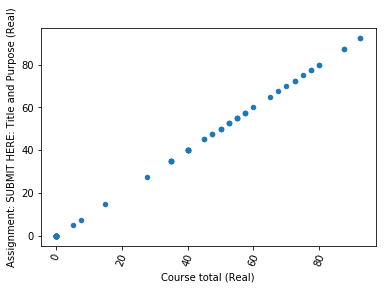

In [765]:
plt.show()

In [387]:
m4mg.describe().transpose()
# Generates descriptive statistics

count       mean  \
Assignment: SUBMIT HERE: Title and Purpose (Real)   64.0  39.882812   
Course total (Real)                                 64.0  39.882812   

                                                         std  min   25%   50%  \
Assignment: SUBMIT HERE: Title and Purpose (Real)  29.166428  0.0  3.75  42.5   
Course total (Real)                                29.166428  0.0  3.75  42.5   

                                                    75%   max  
Assignment: SUBMIT HERE: Title and Purpose (Real)  57.5  92.5  
Course total (Real)                                57.5  92.5

In [575]:
# Visualize the distribution of Assignment: SUBMIT HERE: Title and Purpose (Real) in Module 4'

sns.distplot(m4mg['Assignment: SUBMIT HERE: Title and Purpose (Real)'])

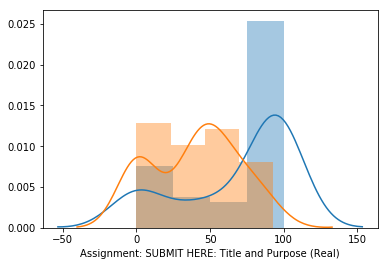

In [576]:
plt.show()

In [511]:
sns.distplot(m4mg['Course total (Real)'])

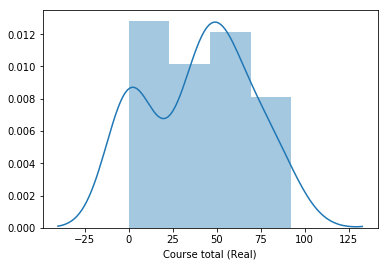

In [512]:
plt.show()

In [762]:
fail4 = m4mg['Course total (Real)'] < 40

In [763]:
fail4.sum()

25

In [484]:
passed4 = m4mg['Course total (Real)'] > 40


In [761]:
passed4.sum()

32

In [486]:
# Using 'passed4' as the column name 
# and equating it to the list 
module4mg['Pass'] = passed4


In [536]:
sns.boxplot(x = 'Pass', y = 'Course total (Real)', data = m4mg)

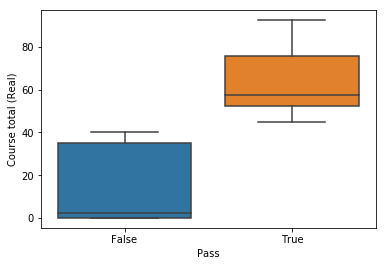

In [537]:
plt.show()

In [604]:
sns.boxplot(x = 'Pass', y = 'Assignment: SUBMIT HERE: Title and Purpose (Real)',data = m4mg,hue = 'Course total (Real)') 


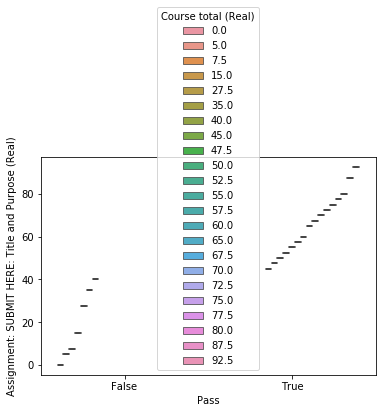

In [605]:
plt.show()

In [483]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(module4mg.groupby(['Pass']).mean())


       Assignment: Upload 1 (Real)  Assignment: Upload 2 (Real)  \
Pass                                                              
False                            0                            0   
True                             0                            0   

       Assignment: Upload 3 (Real)  Assignment: Upload 4 (Real)  \
Pass                                                              
False                            0                            0   
True                             0                            0   

       Assignment: Upload 5 (Real)  Assignment: Upload 6 (Real)  \
Pass                                                              
False                            0                            0   
True                             0                            0   

       Assignment: Upload 7 (Real)  \
Pass                                 
False                            0   
True                             0   

       Assignment: Overall grade feedbac

In [466]:
print(m4mg['Course total (Real)'].value_counts(dropna=False))


0.0     16
40.0     7
35.0     5
55.0     4
52.5     3
50.0     3
57.5     3
92.5     2
45.0     2
47.5     2
80.0     2
72.5     2
87.5     2
77.5     2
5.0      1
60.0     1
65.0     1
27.5     1
67.5     1
70.0     1
75.0     1
15.0     1
7.5      1
Name: Course total (Real), dtype: int64


In [41]:
m4ml = module4ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [414]:
print (module4ml.columns.tolist())


['Time', 'User full name', 'Affected user', 'Event context', 'Component', 'Event name', 'Description', 'Origin', 'IP address']


In [415]:
m4ml.describe().transpose()
# Generates descriptive statistics
# Most frequest student a2mi bDko
# Course viewed is the most frequent event
# Event context : Course Module 4


#Attribute Information:

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 3/12/18 most frequent
#User full name: Name of the user is listed in this column. - a2mi bDko was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Module 4	 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, System was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.



count unique  \
Time            2521   1416   
User full name  2521     64   
Event context   2521     20   
Component       2521      8   
Event name      2521     21   
Description     2521     80   

                                                              top  freq  
Time                                               3/12/18, 15:25    24  
User full name                                          a2mi bDko   165  
Event context                                    Course: Module 4  1215  
Component                                                  System  1056  
Event name                                          Course viewed   850  
Description     The user with id '0' viewed the course with id...   850

In [606]:
sns.boxplot(x = 'Course total (Real)', y = 'Assignment: SUBMIT HERE: Title and Purpose (Real)',data = m4mg) 


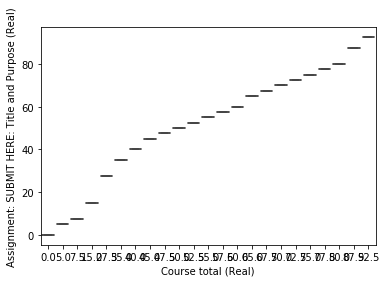

In [607]:
plt.show()

In [215]:
m4mg.head()

First name Surname ID number  \
0       auP2    buYz  PuP2uYzI   
1       aTka    b80f  wTka80ff   
2       and9    bWT1  ond9WT1D   
3       aD2n    bqfd  sD2nqfdF   
4       aPi9    bECZ  uPi9ECZm   

   Assignment: SUBMIT HERE: Title and Purpose (Real)  Course total (Real)  
0                                                0.0                  0.0  
1                                               45.0                 45.0  
2                                                0.0                  0.0  
3                                                0.0                  0.0  
4                                                0.0                  0.0

In [216]:
module4mg.tail()
# KEEP - 'Assignment: SUBMIT HERE: Title and Purpose (Real)', 'Course total (Real)',
# DROP -  to drop Assignment Upload 1 (Real)
# DROP Email address
# DROP Last downloaded from this course

First name Surname ID number            Email address  \
59       aZWk    bb86  cZWkb86b  cZWkb86b@student.itb.ie   
60       akYS    bCPf  vkYSCPfo  vkYSCPfo@student.itb.ie   
61       apAF    bgEi  VpAFgEiV  VpAFgEiV@student.itb.ie   
62       aRzZ    bgjR  uRzZgjR4  uRzZgjR4@student.itb.ie   
63       a58K    bM4Z  758KM4Z1  758KM4Z1@student.itb.ie   

    Assignment: Upload 1 (Real)  Assignment: Upload 2 (Real)  \
59                            0                            0   
60                            0                            0   
61                            0                            0   
62                            0                            0   
63                            0                            0   

    Assignment: Upload 3 (Real)  Assignment: Upload 4 (Real)  \
59                            0                            0   
60                            0                            0   
61                            0                            0   
62                            0                            0   
63                            0                            0   

    Assignment: Upload 5 (Real)  Assignment: Upload 6 (Real)  \
59                            0                            0   
60                            0                            0   
61                            0                            0   
62                            0                            0   
63                            0                            0   

    Assignment: Upload 7 (Real)  \
59                            0   
60                            0   
61                            0   
62                            0   
63                            0   

    Assignment: Overall grade feedback sheets (Real)  \
59                                                 0   
60                                                 0   
61                                                 0   
62                                                 0   
63                                                 0   

    Assignment: SUBMIT HERE: Title and Purpose (Real)  Course total (Real)  \
59                                                0.0                  0.0   
60                                               35.0                 35.0   
61                                               40.0                 40.0   
62                                                0.0                  0.0   
63                                                7.5                  7.5   

    Last downloaded from this course  
59                        1553798187  
60                        1553798187  
61                        1553798187  
62                        1553798187  
63                        1553798187

In [61]:
module4ml.info()
# 2521 Objects
# 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 9 columns):
Time              2521 non-null object
User full name    2521 non-null object
Affected user     2521 non-null object
Event context     2521 non-null object
Component         2521 non-null object
Event name        2521 non-null object
Description       2521 non-null object
Origin            2521 non-null object
IP address        2521 non-null object
dtypes: object(9)
memory usage: 177.3+ KB


In [217]:
m4ml.head()

Time User full name     Event context        Component  \
0  21/03/19, 09:22      aAK5 bSAb  Course: Module 4           System   
1  20/03/19, 19:14      a58K bM4Z  Course: Module 4      User report   
2  20/03/19, 19:14      a58K bM4Z  Course: Module 4  Overview report   
3  20/03/19, 19:13      a58K bM4Z  Course: Module 4      User report   
4  20/03/19, 19:12      a58K bM4Z  Course: Module 4           System   

                     Event name  \
0                 Course viewed   
1      Grade user report viewed   
2  Grade overview report viewed   
3      Grade user report viewed   
4                 Course viewed   

                                         Description  
0  The user with id '0' viewed the course with id...  
1  The user with id '0' viewed the user report in...  
2  The user with id '0' viewed the overview repor...  
3  The user with id '0' viewed the user report in...  
4  The user with id '0' viewed the course with id...

In [40]:
module4ml

Time User full name Affected user  \
0     21/03/19, 09:22      aAK5 bSAb             -   
1     20/03/19, 19:14      a58K bM4Z             -   
2     20/03/19, 19:14      a58K bM4Z             -   
3     20/03/19, 19:13      a58K bM4Z             -   
4     20/03/19, 19:12      a58K bM4Z             -   
5     20/03/19, 11:54      a2mi bDko             -   
6     20/03/19, 11:54      a2mi bDko             -   
7     19/03/19, 17:26      a4I0 bKMc             -   
8     18/03/19, 17:27      aNBi b8W7             -   
9     14/03/19, 23:01      a2C9 bYpt             -   
10    14/03/19, 16:41      a7nA bx4i             -   
11    13/03/19, 14:33      aM4c bkZL             -   
12     7/03/19, 18:25      a58K bM4Z             -   
13     7/03/19, 18:25      a58K bM4Z             -   
14     7/03/19, 18:25      a58K bM4Z             -   
15     7/03/19, 18:24      a58K bM4Z             -   
16     7/03/19, 18:24      a58K bM4Z             -   
17     7/03/19, 18:23      a58K bM4Z             -   
18     7/03/19, 18:23      a58K bM4Z             -   
19     7/03/19, 18:06      a58K bM4Z             -   
20     7/03/19, 18:05      a58K bM4Z             -   
21     7/03/19, 18:04      a58K bM4Z             -   
22     4/03/19, 22:52      ajdR bQnj             -   
23     2/03/19, 13:37      a322 bSXp             -   
24     1/03/19, 14:26      aOmN bXsd             -   
25    25/02/19, 16:01      a6Uc b22A             -   
26    25/02/19, 11:52      aOmN bXsd             -   
27    22/02/19, 02:47      aiGp b3wt             -   
28    22/02/19, 02:46      aiGp b3wt             -   
29    22/02/19, 02:46      aiGp b3wt             -   
...               ...            ...           ...   
2491  19/09/18, 22:09      aYZZ bVOq             -   
2492  19/09/18, 22:09      aYZZ bVOq             -   
2493  19/09/18, 22:08      aYZZ bVOq             -   
2494  19/09/18, 22:08      aYZZ bVOq             -   
2495  19/09/18, 22:08      aYZZ bVOq             -   
2496  19/09/18, 21:40      aKpv bLk6             -   
2497  19/09/18, 21:32      aW3J bhQ6             -   
2498  19/09/18, 21:32      aW3J bhQ6             -   
2499  19/09/18, 21:32      aW3J bhQ6             -   
2500  19/09/18, 21:32      aW3J bhQ6             -   
2501  19/09/18, 21:21      aKpv bLk6             -   
2502  19/09/18, 21:21      aKpv bLk6             -   
2503  19/09/18, 21:20      aKpv bLk6             -   
2504  19/09/18, 21:19      aKpv bLk6             -   
2505  19/09/18, 21:16      aKpv bLk6             -   
2506  19/09/18, 21:15      aKpv bLk6             -   
2507  19/09/18, 21:15      aKpv bLk6             -   
2508  19/09/18, 21:15      aKpv bLk6             -   
2509  19/09/18, 21:04      ajrV bTes             -   
2510  19/09/18, 21:04      ajrV bTes             -   
2511  19/09/18, 21:04      ajrV bTes             -   
2512  23/08/18, 15:25      a58K bM4Z             -   
2513  23/08/18, 14:59      a58K bM4Z             -   
2514  23/08/18, 14:59      a58K bM4Z             -   
2515  13/06/18, 19:26      aZWk bb86             -   
2516  13/06/18, 19:26      aZWk bb86             -   
2517  13/06/18, 19:25      aZWk bb86             -   
2518  13/06/18, 19:25      aZWk bb86             -   
2519  13/06/18, 19:19      aZWk bb86             -   
2520  13/06/18, 19:19      aZWk bb86             -   

                                          Event context        Component  \
0                                      Course: Module 4           System   
1                                      Course: Module 4      User report   
2                                      Course: Module 4  Overview report   
3                                      Course: Module 4      User report   
4                                      Course: Module 4           System   
5            Assignment: SUBMIT HERE: Title and Purpose       Assignment   
6                                      Course: Module 4           System   
7                                      Course: Module 4     

In [63]:
module4mg.info()
# Mixture of object
# int
# float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
First name                                           64 non-null object
Surname                                              64 non-null object
ID number                                            64 non-null object
Email address                                        64 non-null object
Assignment: Upload 1 (Real)                          64 non-null int64
Assignment: Upload 2 (Real)                          64 non-null int64
Assignment: Upload 3 (Real)                          64 non-null int64
Assignment: Upload 4 (Real)                          64 non-null int64
Assignment: Upload 5 (Real)                          64 non-null int64
Assignment: Upload 6 (Real)                          64 non-null int64
Assignment: Upload 7 (Real)                          64 non-null int64
Assignment: Overall grade feedback sheets (Real)     64 non-null int64
Assignment: SUBMIT HERE: Title and Purpos

In [111]:
module4mg['Course total (Real)'].plot('hist')

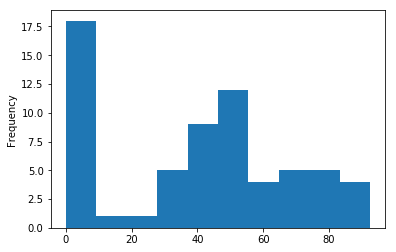

In [112]:
plt.show()

In [38]:
module4ml.head()
# User full name = primary id


Time User full name Affected user     Event context  \
0  21/03/19, 09:22      aAK5 bSAb             -  Course: Module 4   
1  20/03/19, 19:14      a58K bM4Z             -  Course: Module 4   
2  20/03/19, 19:14      a58K bM4Z             -  Course: Module 4   
3  20/03/19, 19:13      a58K bM4Z             -  Course: Module 4   
4  20/03/19, 19:12      a58K bM4Z             -  Course: Module 4   

         Component                    Event name  \
0           System                 Course viewed   
1      User report      Grade user report viewed   
2  Overview report  Grade overview report viewed   
3      User report      Grade user report viewed   
4           System                 Course viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the course with id...    web  127.0.0.1  
1  The user with id '0' viewed the user report in...    web  127.0.0.1  
2  The user with id '0' viewed the overview repor...    web  127.0.0.1  
3  The user with id '0' viewed the user report in...    web  127.0.0.1  
4  The user with id '0' viewed the course with id...    web  127.0.0.1

In [118]:
module4ml.describe()
# User full name - Primary ID

Time User full name Affected user     Event context  \
count             2521           2521          2521              2521   
unique            1416             64             1                20   
top     3/12/18, 15:25      a2mi bDko             -  Course: Module 4   
freq                24            165          2521              1215   

       Component     Event name  \
count       2521           2521   
unique         8             21   
top       System  Course viewed   
freq        1056            850   

                                              Description Origin IP address  
count                                                2521   2521       2521  
unique                                                 80      2          1  
top     The user with id '0' viewed the course with id...    web  127.0.0.1  
freq                                                  850   1987       2521

In [77]:
module4ml.shape

(2521, 9)

In [39]:
module4mg.head()
# ID number = primary id
# Assigment 1 - 7

First name Surname ID number            Email address  \
0       auP2    buYz  PuP2uYzI  PuP2uYzI@student.itb.ie   
1       aTka    b80f  wTka80ff  wTka80ff@student.itb.ie   
2       and9    bWT1  ond9WT1D  ond9WT1D@student.itb.ie   
3       aD2n    bqfd  sD2nqfdF  sD2nqfdF@student.itb.ie   
4       aPi9    bECZ  uPi9ECZm  uPi9ECZm@student.itb.ie   

   Assignment: Upload 1 (Real)  Assignment: Upload 2 (Real)  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Assignment: Upload 3 (Real)  Assignment: Upload 4 (Real)  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Assignment: Upload 5 (Real)  Assignment: Upload 6 (Real)  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   Assignment: Upload 7 (Real)  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   Assignment: Overall grade feedback sheets (Real)  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Assignment: SUBMIT HERE: Title and Purpose (Real)  Course total (Real)  \
0                                                0.0                  0.0   
1                                               45.0                 45.0   
2                                                0.0                  0.0   
3                                                0.0                  0.0   
4                                                0.0                  0.0   

   Last downloaded from this course  
0                        1553798187  
1                        1553798187  
2                        1553798187  
3                        1553798187  
4                        1553798187

In [119]:
module4mg.describe()
# Assigment 1 - 7
# Course total 


Assignment: Upload 1 (Real)  Assignment: Upload 2 (Real)  \
count                         64.0                         64.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       Assignment: Upload 3 (Real)  Assignment: Upload 4 (Real)  \
count                         64.0                         64.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       Assignment: Upload 5 (Real)  Assignment: Upload 6 (Real)  \
count                         64.0                         64.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       Assignment: Upload 7 (Real)  \
count                         64.0   
mean                           0.0   
std                            0.0   
min                            0.0   
25%                            0.0   
50%                            0.0   
75%                            0.0   
max                            0.0   

       Assignment: Overall grade feedback sheets (Real)  \
count                                              64.0   
mean                                                0.0   
std                                                 0.0   
min                                                 0.0   
25%                                                 0.0   
50%                                                 0.0   
75%                                                 0.0   
max                                                 0.0   

       Assignment: SUBMIT HERE: Title and Purpose (Real)  Course total (Real)  \
count                                          64.000000            64.000000   
mean                                           39.882812            39.882812   
std                                            29.166428            29.166428   
min                                             0.000000             0.000000   
25%                                             3.750000             3.750000   
50%                                            42.500000            42.500000   
75%                                            57.500000            57.500000   
max                                            92.500000            92.500000   

       Last downloaded from this course  
count                      6.400000e+01  
mean                       1.553798e+09  
std                        0.000000e+00  
min                        1.553798e+09  
25%                        1.553798e+09  
50%                        1.553798e+09  
75%                        1.553798e+09  
max                        1.553798e+09

In [96]:
module4ml.columns
# User full name
# Event name
# Description


Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [78]:
module4mg.shape

(64, 15)

In [97]:
module4mg.columns
# ID number
# Assignment Upload 1 -7
# Assigment Overall grade feedback sheets
# Assigment Submit Here : Title and Purpose
# Course total Real

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Assignment: Upload 1 (Real)', 'Assignment: Upload 2 (Real)',
       'Assignment: Upload 3 (Real)', 'Assignment: Upload 4 (Real)',
       'Assignment: Upload 5 (Real)', 'Assignment: Upload 6 (Real)',
       'Assignment: Upload 7 (Real)',
       'Assignment: Overall grade feedback sheets (Real)',
       'Assignment: SUBMIT HERE: Title and Purpose (Real)',
       'Course total (Real)', 'Last downloaded from this course'],
      dtype='object')

In [ ]:
# Begin5 START OF MODULE FIVE #########################
#

In [43]:
# Data Preperation Module 5
# 2 files in Module5
# Module 5

module5ml = pd.read_csv('Module5_Moodle_Logs.csv')

In [220]:
module5mg = pd.read_csv('Module5_Moodle_Grades.csv')

In [221]:
print (module5mg.columns.tolist())
# Full list of Columns for module 5

['First name', 'Surname', 'ID number', 'Email address', 'Course total (Real)', 'Last downloaded from this course', 'Assignment: Assignment 1 image of poster (Real)', 'Assignment: Assignment 1  S  (Real)', 'Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment:   Task 1 (Real)', 'Assignment:   Task 2 (Real)', 'Assignment:   Task 3 (Real)', 'Assignment: Lab 1 S(Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment: Repeat assignment grading (Real)', 'Assignment: Submit repeat exam (Real)', 'Assignment: Upload Headshot (Real)', 'Assignment: v upload (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']


In [850]:
# Print the number of unique values in each modul5ml column
print(module5ml.nunique())

Time              5156
User full name      63
Affected user        1
Event context       82
Component           14
Event name          32
Description         73
Origin               2
IP address           1
dtype: int64


In [849]:
# Print the number of unique values in each modul5mg column
print(module5mg.nunique())

First name                                         63
Surname                                            63
ID number                                          63
Email address                                      63
Course total (Real)                                62
Last downloaded from this course                    2
Assignment: Assignment 1 image of poster (Real)     1
Assignment: Assignment 1  S  (Real)                 1
Assignment: Assignment 1 T (Real)                  13
Assignment: Assignment 2 - Submit (Real)           28
Assignment: FG (Real)                               2
Assignment:   Task 1 (Real)                         1
Assignment:   Task 2 (Real)                         1
Assignment:   Task 3 (Real)                         1
Assignment: Lab 1 S(Real)                           1
Assignment: Pre-submission meeting (Real)           2
Assignment: Repeat assignment grading (Real)        1
Assignment: Submit repeat exam (Real)               1
Assignment: Upload Headshot 

In [ ]:
# Cleanup5
# Duplicate Assignment: Assignment 1 T (Real) column which will be removed
#

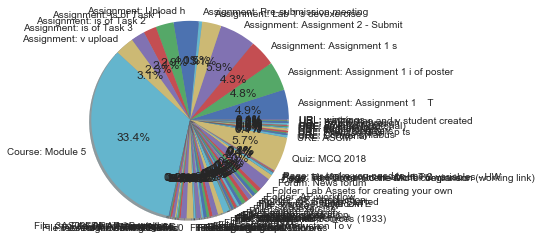

In [977]:
labels = module5ml['Event context'].astype('category').cat.categories.tolist()
counts = module5ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [966]:
module5ml["Event context"].value_counts()


Course: Module 5                                           4692
Assignment: Assignment 2 - Submit                           827
Quiz: MCQ 2018                                              798
Assignment: Assignment 1    T                               691
Assignment: Assignment 1 i of poster                        671
Assignment: Assignment 1 s                                  606
Assignment: Upload h                                        580
Assignment: Lab 1 s devexercise                             442
Assignment: v upload                                        436
Assignment: is of Task 1                                    412
Assignment: is of Task 3                                    320
Assignment: is of Task 2                                    295
Folder: Lab Assets for creating your own                    278
File: Assignment 2 2018                                     160
File: Lecture h                                             151
File: Assignment 1 2018 v1.0            

In [957]:
module5ml["Event name"].value_counts()


Course viewed                                             4046
Course module viewed                                      2937
The status of the submission has been viewed.             2355
Submission form viewed.                                    743
A submission has been submitted.                           554
A file has been uploaded.                                  554
Submission created.                                        519
Quiz attempt viewed                                        484
The user has accepted the statement of the submission.     458
Zip archive of folder downloaded                           250
Grade user report viewed                                   229
Discussion viewed                                          102
Submission updated.                                         99
Quiz attempt summary viewed                                 73
User list viewed                                            71
Role assigned                                          

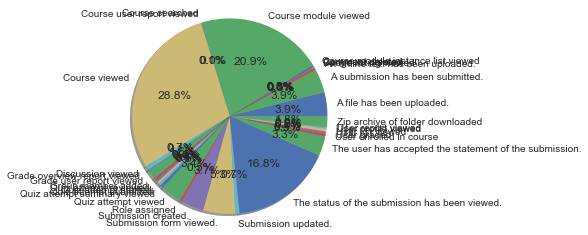

In [947]:
labels = module5ml['Event name'].astype('category').cat.categories.tolist()
counts = module5ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [894]:
# time5
time5 = module5ml["Time"].str.split(",", n = 1, expand = True)

In [895]:
# making separate Date column from new data frame 
module5ml["Date"]= time5[0] 

# making seperate Time column from new data frame
module5ml['Time']= time5[1]


In [909]:
# Convert the date column to datetime64
module5ml.Date = pd.to_datetime(module5ml.Date)

In [579]:
m5mg = module5mg[['First name', 'Surname', 'ID number', 'Course total (Real)','Assignment: Assignment 1 T (Real)', 'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)', 'Assignment: Pre-submission meeting (Real)', 'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)', 'Attendance: Attendance (Real)', 'MCQ Test total (Real)', 'Quiz: MCQ 2018 (Real)']]

In [775]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Assignment 2 - Submit (Real)', rot=70)

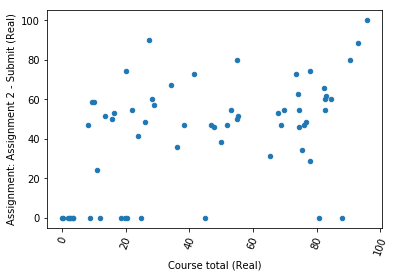

In [776]:
plt.show()

In [773]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Attendance: Attendance (Real)', rot=70)

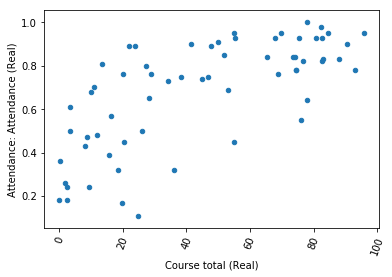

In [774]:
plt.show()

In [771]:
m5mg.plot(kind='scatter', x='Course total (Real)', y='Assignment: Assignment 1 T (Real)', rot=70)

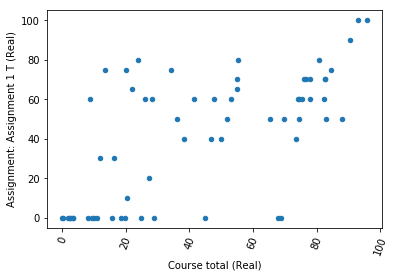

In [772]:
plt.show()

In [580]:
m5mg.describe().transpose()
# Generates descriptive statistics
# 63 Students
# 8 assigment

count       mean        std   min  \
Course total (Real)                         63.0  44.469365  30.272408  0.03   
Assignment: Assignment 1 T (Real)           63.0  41.904762  31.831570  0.00   
Assignment: Assignment 2 - Submit (Real)    63.0  41.746190  28.106373  0.00   
Assignment: FG (Real)                       63.0  63.492063  48.531956  0.00   
Assignment: Pre-submission meeting (Real)   63.0   5.079365   5.039526  0.00   
Assignment 1 Non-Linear S total (Real)      63.0  14.666667  11.141049  0.00   
Assignment 2 V total (Real)                 63.0  14.611111   9.837160  0.00   
Attendance: Attendance (Real)               63.0   0.679683   0.247998  0.11   
MCQ Test total (Real)                       63.0  12.563492   7.233152  0.00   
Quiz: MCQ 2018 (Real)                       63.0  41.878413  24.110583  0.00   

                                              25%     50%      75%     max  
Course total (Real)                        17.355   45.01   74.540   95.71  
Assignment: Assignment 1 T (Real)           0.000   50.00   67.500  100.00  
Assignment: Assignment 2 - Submit (Real)   12.145   48.57   59.285  100.00  
Assignment: FG (Real)                       0.000  100.00  100.000  100.00  
Assignment: Pre-submission meeting (Real)   0.000   10.00   10.000   10.00  
Assignment 1 Non-Linear S total (Real)      0.000   17.50   23.625   35.00  
Assignment 2 V total (Real)                 4.250   17.00   20.750   35.00  
Attendance: Attendance (Real)               0.490    0.76    0.890    1.00  
MCQ Test total (Real)                      10.500   15.00   17.750   21.00  
Quiz: MCQ 2018 (Real)                      35.000   50.00   59.165   70.00

In [581]:
m5mg.head(2)

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   

   Assignment: Assignment 1 T (Real)  \
0                                 50   
1                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   

   Attendance: Attendance (Real)  MCQ Test total (Real)  Quiz: MCQ 2018 (Real)  
0                           0.83                    0.0                   0.00  
1                           0.68                   20.5                  68.33

In [601]:
sns.boxplot(x = 'Assignment: Assignment 1 T (Real)', y = 'Assignment: Assignment 2 - Submit (Real)',data = m5mg,hue = 'MCQ Test total (Real)') 


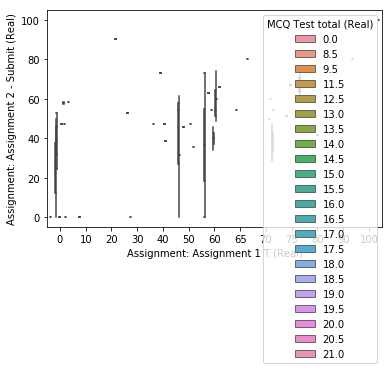

In [602]:
plt.show()

In [582]:
# Visualize the distribution of Assignment: Assignment 1 T (Real) in Module 5'

sns.distplot(m5mg['Assignment: Assignment 1 T (Real)'])

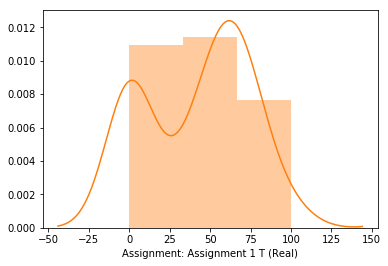

In [583]:
plt.show()
# There are 10 + students who got 0 or more on the first test

In [513]:
sns.distplot(m5mg['Course total (Real)'])

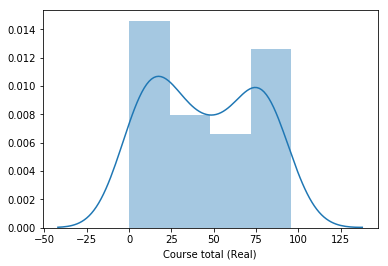

In [514]:
plt.show()

In [767]:
fail5 = m5mg['Course total (Real)'] < 40

In [768]:
fail5.sum()

30

In [487]:
passed5 = m5mg['Course total (Real)'] > 40


In [766]:
passed5.sum()

33

In [488]:
# Using 'passed5' as the column name 
# and equating it to the list 
m5mg['Pass'] = passed5 


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [549]:
m5mg.head(2)

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   

   Assignment: Assignment 1 T (Real)  Assignment: Assignment 1 T (Real)  \
0                                 50                                 50   
1                                  0                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   

   Attendance: Attendance (Real)  MCQ Test total (Real)  \
0                           0.83                    0.0   
1                           0.68                   20.5   

   Quiz: MCQ 2018 (Real)   Pass  
0                   0.00   True  
1                  68.33  False

In [769]:
m5mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 13 columns):
First name                                   63 non-null object
Surname                                      63 non-null object
ID number                                    63 non-null object
Course total (Real)                          63 non-null float64
Assignment: Assignment 1 T (Real)            63 non-null int64
Assignment: Assignment 2 - Submit (Real)     63 non-null float64
Assignment: FG (Real)                        63 non-null int64
Assignment: Pre-submission meeting (Real)    63 non-null int64
Assignment 1 Non-Linear S total (Real)       63 non-null float64
Assignment 2 V total (Real)                  63 non-null float64
Attendance: Attendance (Real)                63 non-null float64
MCQ Test total (Real)                        63 non-null float64
Quiz: MCQ 2018 (Real)                        63 non-null float64
dtypes: float64(7), int64(3), object(3)
memory usage: 6.5+ KB

In [550]:
sns.boxplot(x = 'Pass', y = 'Course total (Real) ', data = module5mg)

ValueError: Could not interpret input 'Pass'

In [489]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(m5mg.groupby(['Pass']).mean())


       Course total (Real)  Assignment: Assignment 1 T (Real)  \
Pass                                                            
False            16.205333                          24.333333   
True             70.163939                          57.878788   

       Assignment: Assignment 1 T (Real)  \
Pass                                       
False                          24.333333   
True                           57.878788   

       Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
Pass                                                                     
False                                 30.619000              33.333333   
True                                  51.861818              90.909091   

       Assignment: Pre-submission meeting (Real)  \
Pass                                               
False                                   3.333333   
True                                    6.666667   

       Assignment 1 Non-Linear S total (Real)  Assignmen

In [467]:
print(m5mg['Course total (Real)'].value_counts(dropna=False))


74.54    2
46.71    1
82.62    1
0.03     1
29.01    1
27.16    1
20.20    1
34.34    1
84.45    1
47.65    1
75.32    1
23.82    1
82.22    1
55.34    1
2.32     1
38.38    1
93.02    1
65.33    1
49.92    1
11.77    1
76.09    1
69.88    1
8.73     1
0.11     1
36.21    1
28.27    1
20.22    1
26.07    1
77.96    1
2.29     1
        ..
67.98    1
24.69    1
8.13     1
15.62    1
1.88     1
54.81    1
3.36     1
9.30     1
82.67    1
51.88    1
19.73    1
77.79    1
18.37    1
73.38    1
52.96    1
54.89    1
90.47    1
74.10    1
87.90    1
68.85    1
82.78    1
80.64    1
16.34    1
13.32    1
3.32     1
22.03    1
41.31    1
10.14    1
76.69    1
11.00    1
Name: Course total (Real), Length: 62, dtype: int64


In [223]:
module5mg.head()
# KEEP 'Assignment: Assignment 1 T (Real)','Assignment: Assignment 2 - Submit (Real)',
# DROP Email address
# Last downloaded from this course
# First tow Assignments
# Assignment: Repeat assignment grading (Real
# Assignment: Submit repeat exam (Real)	Assignment: Upload Headshot (Real)	Assignment: v upload (Real

First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                82.78   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                10.14   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                 3.32   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                 2.29   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                 1.88   

   Last downloaded from this course  \
0                        1551956164   
1                        1551956164   
2                        1551956164   
3                        1551956164   
4                        1551956164   

   Assignment: Assignment 1 image of poster (Real)  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Assignment: Assignment 1  S  (Real)  Assignment: Assignment 1 T (Real)  \
0                                    0                                 50   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   Assignment: Assignment 2 - Submit (Real)          ...            \
0                                     61.43          ...             
1                                     58.57          ...             
2                                      0.00          ...             
3                                      0.00          ...             
4                                      0.00          ...             

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   
2                                          0   
3                                         10   
4                                         10   

   Assignment: Repeat assignment grading (Real)  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Assignment: Submit repeat exam (Real)  Assignment: Upload Headshot (Real)  \
0                                      0                                 NaN   
1                                      0                                 NaN   
2                                      0                                 NaN   
3                                      0                                 NaN   
4                                      0                                 NaN   

   Assignment: v upload (Real)  Assignment 1 Non-Linear S total (Real)  \
0                            0                                    17.5   
1                            0                                     0.0   
2                            0                                     0.0   
3                            0                                     0.0   
4                            0                                     0.0   

   Assignment 2 V total (Real)  Attendance: Attendance (Real)  \
0                         21.5                           0.83   
1                         20.5                           0.68   
2                          0.0                           0.61   
3                          0.0                           0.24   
4                          0.0                           0.26   

   MCQ Test total (Real)  Quiz: MCQ 2018 (Real)  
0                    0.0                   0.00  
1                   20.5                  68.33  
2             

In [45]:
m5ml = module5ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [416]:
m5ml.describe().transpose()
# Generates descriptive statistics
# Student most frequent aNBi b8W7
# Event context : Course : Module 5
# Course viewed most 

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 11/10/18, 12:25 most frequent
#User full name: Name of the user is listed in this column. - aNBi b8W7	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Module 5		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, System was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.



count unique  \
Time            14049   5156   
User full name  14049     63   
Event context   14049     82   
Component       14049     14   
Event name      14049     32   
Description     14049     73   

                                                              top  freq  
Time                                              11/10/18, 12:25    66  
User full name                                          aNBi b8W7   415  
Event context                                    Course: Module 5  4692  
Component                                                  System  4407  
Event name                                          Course viewed  4046  
Description     The user with id '0' viewed the course with id...  4046

In [244]:
m5mg.head()

First name Surname ID number  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG                82.78   
1       aSnR    bGk9  VSnRGk9O                10.14   
2       aAK5    bSAb  tAK5SAbE                 3.32   
3       a4jV    bO8M  14jVO8M7                 2.29   
4       aa14    bMdv  ba14Mdv9                 1.88   

   Assignment: Assignment 1 T (Real)  Assignment: Assignment 1 T (Real)  \
0                                 50                                 50   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
0                                     61.43                    100   
1                                     58.57                      0   
2                                      0.00                      0   
3                                      0.00                      0   
4                                      0.00                      0   

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   
2                                          0   
3                                         10   
4                                         10   

   Assignment 1 Non-Linear S total (Real)  Assignment 2 V total (Real)  \
0                                    17.5                         21.5   
1                                     0.0                         20.5   
2                                     0.0                          0.0   
3                                     0.0                          0.0   
4                                     0.0                          0.0   

   Attendance: Attendance (Real)  MCQ Test total (Real)  Quiz: MCQ 2018 (Real)  
0                           0.83                    0.0                   0.00  
1                           0.68                   20.5                  68.33  
2                           0.61                   18.5                  61.67  
3                           0.24                    0.0                   0.00  
4                           0.26                    0.0                   0.00

In [218]:
m5ml.tail()

Time User full name                      Event context  \
14044  8/04/18, 16:27      a58K bM4Z                   Course: Module 5   
14045  8/04/18, 15:18      a58K bM4Z  Assignment: Assignment 2 - Submit   
14046  8/04/18, 15:18      a58K bM4Z  Assignment: Assignment 2 - Submit   
14047  8/04/18, 15:17      a58K bM4Z                   Course: Module 5   
14048  8/04/18, 15:17      a58K bM4Z                   Course: Module 5   

        Component                                     Event name  \
14044      System                                  Course viewed   
14045  Assignment  The status of the submission has been viewed.   
14046  Assignment  The status of the submission has been viewed.   
14047      System                                  Course viewed   
14048      System                                  Course viewed   

                                             Description  
14044  The user with id '0' viewed the course with id...  
14045  The user with id '0' has viewed the submission...  
14046  The user with id '0' has viewed the submission...  
14047  The user with id '0' viewed the course with id...  
14048  The user with id '0' viewed the course with id...

In [44]:
module5ml

Time User full name Affected user  \
0       4/03/19, 22:51      aNBi b8W7             -   
1       4/03/19, 22:51      aNBi b8W7             -   
2       4/03/19, 22:50      aNBi b8W7             -   
3       1/03/19, 14:26      aI1T bxjW             -   
4       1/03/19, 14:26      aI1T bxjW             -   
5       1/03/19, 09:19      aA6B bBfk             -   
6       1/03/19, 09:17      aA6B bBfk             -   
7      26/02/19, 09:34      aHCL bSn1             -   
8      25/02/19, 11:58      a6Uc b22A             -   
9      21/02/19, 14:26      apAF bgEi             -   
10     19/02/19, 09:06      aZWk bb86             -   
11     18/02/19, 09:14      avO9 byWN             -   
12     16/02/19, 11:16      ag2x bJ2S             -   
13     16/02/19, 11:16      ag2x bJ2S             -   
14     16/02/19, 11:15      ag2x bJ2S             -   
15     16/02/19, 11:15      ag2x bJ2S             -   
16     16/02/19, 11:15      ag2x bJ2S             -   
17     14/02/19, 10:38      aJ8F bQ0G             -   
18     13/02/19, 16:10      a8NM bDqB             -   
19     13/02/19, 10:42      amZd bJI1             -   
20     12/02/19, 09:38      a0V1 b1X9             -   
21     11/02/19, 19:56      aKpv bLk6             -   
22     11/02/19, 16:56      ajrV bTes             -   
23     11/02/19, 11:14      aI1T bxjW             -   
24     10/02/19, 23:32      aJGs bxon             -   
25      8/02/19, 22:36      avO9 byWN             -   
26      8/02/19, 17:25      aKpv bLk6             -   
27      8/02/19, 17:25      aKpv bLk6             -   
28      8/02/19, 16:18      aK80 bFqH             -   
29      8/02/19, 15:00      a0V1 b1X9             -   
...                ...            ...           ...   
14019  20/09/18, 13:18      aNBi b8W7             -   
14020  20/09/18, 13:18      aNBi b8W7             -   
14021  20/09/18, 13:18      aNBi b8W7             -   
14022  20/09/18, 12:56      aW3J bhQ6             -   
14023  20/09/18, 12:56      aW3J bhQ6             -   
14024  20/09/18, 12:56      aW3J bhQ6             -   
14025  20/09/18, 12:27      aBlD bnnW             -   
14026  20/09/18, 12:27      aBlD bnnW             -   
14027  20/09/18, 12:27      aBlD bnnW             -   
14028  20/09/18, 12:27      afWk bKiF             -   
14029  20/09/18, 12:27      afWk bKiF             -   
14030  20/09/18, 12:27      afWk bKiF             -   
14031  20/09/18, 12:27      azM9 bt8t             -   
14032  20/09/18, 12:27      azM9 bt8t             -   
14033  20/09/18, 12:27      azM9 bt8t             -   
14034  20/09/18, 12:27      aKpv bLk6             -   
14035  20/09/18, 12:27      aKpv bLk6             -   
14036  20/09/18, 12:27      aKpv bLk6             -   
14037  20/09/18, 12:27      aiGp b3wt             -   
14038  20/09/18, 12:27      aiGp b3wt             -   
14039  20/09/18, 12:27      aiGp b3wt             -   
14040  20/09/18, 12:27      a4I0 bKMc             -   
14041  20/09/18, 12:27      a4I0 bKMc             -   
14042  20/09/18, 12:27      a4I0 bKMc             -   
14043   8/04/18, 16:27      a58K bM4Z             -   
14044   8/04/18, 16:27      a58K bM4Z             -   
14045   8/04/18, 15:18      a58K bM4Z             -   
14046   8/04/18, 15:18      a58K bM4Z             -   
14047   8/04/18, 15:17      a58K bM4Z             -   
14048   8/04/18, 15:17      a58K bM4Z             -   

                                  Event context    Component  \
0                              Course: Module 5       System   
1             Assignment: Assignment 2 - Submit   Assignment   
2                              Course: Module 5       System   
3                 Assignment: Assignment 1    T   Assignment   
4                              Course: Module 5       System   
5             Assignment: Assignment 2 - Submit   Assignment   
6                              Course: Module 5       System   
7                              Course: Module 5       System   
8                              

In [67]:
module5ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 9 columns):
Time              14049 non-null object
User full name    14049 non-null object
Affected user     14049 non-null object
Event context     14049 non-null object
Component         14049 non-null object
Event name        14049 non-null object
Description       14049 non-null object
Origin            14049 non-null object
IP address        14049 non-null object
dtypes: object(9)
memory usage: 987.9+ KB


In [68]:
module5mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 25 columns):
First name                                         63 non-null object
Surname                                            63 non-null object
ID number                                          63 non-null object
Email address                                      63 non-null object
Course total (Real)                                63 non-null float64
Last downloaded from this course                   63 non-null int64
Assignment: Assignment 1 image of poster (Real)    63 non-null int64
Assignment: Assignment 1  S  (Real)                63 non-null int64
Assignment: Assignment 1 T (Real)                  63 non-null int64
Assignment: Assignment 2 - Submit (Real)           63 non-null float64
Assignment: FG (Real)                              63 non-null int64
Assignment:   Task 1 (Real)                        63 non-null int64
Assignment:   Task 2 (Real)                        63 non-nul

In [113]:
module5mg['Course total (Real)'].plot('hist')

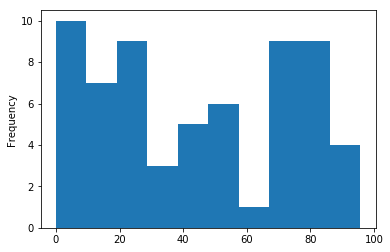

In [114]:
plt.show()

In [70]:
module5att = pd.read_csv('Module5_attendance.csv')

In [71]:
module5att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 33 columns):
ID number                             63 non-null object
Groups                                63 non-null object
27 Sep 2018 11.00AM All students      63 non-null object
28 Sep 2018 12.00AM All students      63 non-null object
28 Sep 2018 12.00AM All students 2    63 non-null object
4 Oct 2018 11.00AM All students       63 non-null object
5 Oct 2018 12.00AM All students       63 non-null object
5 Oct 2018 12.00AM All students 2     63 non-null object
11 Oct 2018 11.00AM All students      63 non-null object
12 Oct 2018 12.00AM All students      63 non-null object
12 Oct 2018 12.00AM All students 2    63 non-null object
19 Oct 2018 12.00AM All students      63 non-null object
19 Oct 2018 12.00AM All students 2    63 non-null object
8 Nov 2018 11.00AM All students       63 non-null object
9 Nov 2018 12.00AM All students       63 non-null object
15 Nov 2018 11.00AM All students      63 n

In [76]:
module5mg.shape

(63, 25)

In [45]:
module5ml.head()
# User full name = primary id

Time User full name Affected user  \
0  4/03/19, 22:51      aNBi b8W7             -   
1  4/03/19, 22:51      aNBi b8W7             -   
2  4/03/19, 22:50      aNBi b8W7             -   
3  1/03/19, 14:26      aI1T bxjW             -   
4  1/03/19, 14:26      aI1T bxjW             -   

                       Event context   Component  \
0                   Course: Module 5      System   
1  Assignment: Assignment 2 - Submit  Assignment   
2                   Course: Module 5      System   
3      Assignment: Assignment 1    T  Assignment   
4                   Course: Module 5      System   

                                      Event name  \
0                                  Course viewed   
1  The status of the submission has been viewed.   
2                                  Course viewed   
3  The status of the submission has been viewed.   
4                      Course user report viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the course with id...    web  127.0.0.1  
1  The user with id '0' has viewed the submission...    web  127.0.0.1  
2  The user with id '0' viewed the course with id...    web  127.0.0.1  
3  The user with id '0' has viewed the submission...    web  127.0.0.1  
4  The user with id '0' viewed the user report fo...    web  127.0.0.1

In [120]:
module5ml.describe()
# User full name = primary id

Time User full name Affected user     Event context  \
count             14049          14049         14049             14049   
unique             5156             63             1                82   
top     11/10/18, 12:25      aNBi b8W7             -  Course: Module 5   
freq                 66            415         14049              4692   

       Component     Event name  \
count      14049          14049   
unique        14             32   
top       System  Course viewed   
freq        4407           4046   

                                              Description Origin IP address  
count                                               14049  14049      14049  
unique                                                 73      2          1  
top     The user with id '0' viewed the course with id...    web  127.0.0.1  
freq                                                 4046  12875      14049

In [47]:
module5mg.head()
# ID number = primary id
# Assignment 1, 2, Attendance, MCQ Test



First name Surname ID number            Email address  Course total (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie                82.78   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie                10.14   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie                 3.32   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie                 2.29   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie                 1.88   

   Last downloaded from this course  \
0                        1551956164   
1                        1551956164   
2                        1551956164   
3                        1551956164   
4                        1551956164   

   Assignment: Assignment 1 image of poster (Real)  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Assignment: Assignment 1  S  (Real)  Assignment: Assignment 1 T (Real)  \
0                                    0                                 50   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   Assignment: Assignment 2 - Submit (Real)          ...            \
0                                     61.43          ...             
1                                     58.57          ...             
2                                      0.00          ...             
3                                      0.00          ...             
4                                      0.00          ...             

   Assignment: Pre-submission meeting (Real)  \
0                                         10   
1                                          0   
2                                          0   
3                                         10   
4                                         10   

   Assignment: Repeat assignment grading (Real)  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Assignment: Submit repeat exam (Real)  Assignment: Upload Headshot (Real)  \
0                                      0                                 NaN   
1                                      0                                 NaN   
2                                      0                                 NaN   
3                                      0                                 NaN   
4                                      0                                 NaN   

   Assignment: v upload (Real)  Assignment 1 Non-Linear S total (Real)  \
0                            0                                    17.5   
1                            0                                     0.0   
2                            0                                     0.0   
3                            0                                     0.0   
4                            0                                     0.0   

   Assignment 2 V total (Real)  Attendance: Attendance (Real)  \
0                         21.5                           0.83   
1                         20.5                           0.68   
2                          0.0                           0.61   
3                          0.0                           0.24   
4                          0.0                           0.26   

   MCQ Test total (Real)  Quiz: MCQ 2018 (Real)  
0                    0.0                   0.00  
1                   20.5                  68.33  
2             

In [75]:
module5ml.shape

(14049, 9)

In [121]:
module5mg.describe()
# 3 assignments
# 3 tasks
# Max 95
# Mean 44

Course total (Real)  Last downloaded from this course  \
count            63.000000                      6.300000e+01   
mean             44.469365                      1.551956e+09   
std              30.272408                      4.988466e-01   
min               0.030000                      1.551956e+09   
25%              17.355000                      1.551956e+09   
50%              45.010000                      1.551956e+09   
75%              74.540000                      1.551956e+09   
max              95.710000                      1.551956e+09   

       Assignment: Assignment 1 image of poster (Real)  \
count                                             63.0   
mean                                               0.0   
std                                                0.0   
min                                                0.0   
25%                                                0.0   
50%                                                0.0   
75%                                                0.0   
max                                                0.0   

       Assignment: Assignment 1  S  (Real)  Assignment: Assignment 1 T (Real)  \
count                                 63.0                          63.000000   
mean                                   0.0                          41.904762   
std                                    0.0                          31.831570   
min                                    0.0                           0.000000   
25%                                    0.0                           0.000000   
50%                                    0.0                          50.000000   
75%                                    0.0                          67.500000   
max                                    0.0                         100.000000   

       Assignment: Assignment 2 - Submit (Real)  Assignment: FG (Real)  \
count                                 63.000000              63.000000   
mean                                  41.746190              63.492063   
std                                   28.106373              48.531956   
min                                    0.000000               0.000000   
25%                                   12.145000               0.000000   
50%                                   48.570000             100.000000   
75%                                   59.285000             100.000000   
max                                  100.000000             100.000000   

       Assignment:   Task 1 (Real)  Assignment:   Task 2 (Real)  \
count                         63.0                         63.0   
mean                           0.0                          0.0   
std                            0.0                          0.0   
min                            0.0                          0.0   
25%                            0.0                          0.0   
50%                            0.0                          0.0   
75%                            0.0                          0.0   
max                            0.0                          0.0   

       Assignment:   Task 3 (Real)          ...            \
count                         63.0          ...             
mean                           0.0          ...             
std                            0.0          ...             
min                            0.0          ...             
25%                            0.0          ...             
50%                            0.0          ...             
75%                            0.0          ...             
max                            0.0          ...             

       Assignment: Pre-submission meeting (Real)  \
count                                  63.000000   
mean                                    5.079365   
std                                     5.039526   
min                                     0.000000   
25%                                     0.000000   
50%                                    10.00

In [48]:
module5att.head()
# Module dates
# ID number

ID number   Groups  27 Sep 2018 11.00AM All students  \
0  mBlDnnWk  Group 1  User enrolment starts 28.09.2018   
1  wTka80ff  Group 3                           P (2/2)   
2  ond9WT1D  Group 1                           P (2/2)   
3  sD2nqfdF  Group 4  User enrolment starts 28.09.2018   
4  uPi9ECZm  Group 3                           P (2/2)   

  28 Sep 2018 12.00AM All students 28 Sep 2018 12.00AM All students 2  \
0                          P (2/2)                                  ←   
1                          P (2/2)                            P (2/2)   
2                          P (2/2)                            P (2/2)   
3                          P (2/2)                                  ←   
4                          P (2/2)                            A (0/2)   

  4 Oct 2018 11.00AM All students 5 Oct 2018 12.00AM All students  \
0                         P (2/2)                         A (0/2)   
1                         P (2/2)                         P (2/2)   
2                         P (2/2)                         P (2/2)   
3                               ?                         A (0/2)   
4                         P (2/2)                         A (0/2)   

  5 Oct 2018 12.00AM All students 2 11 Oct 2018 11.00AM All students  \
0                           A (0/2)                          A (0/2)   
1                           P (2/2)                          P (2/2)   
2                           P (2/2)                          A (0/2)   
3                           A (0/2)                          A (0/2)   
4                           P (2/2)                          P (2/2)   

  12 Oct 2018 12.00AM All students    ...     7 Dec 2018 12.00AM All students  \
0                          A (0/2)    ...                                   ?   
1                          P (2/2)    ...                             P (2/2)   
2                          A (0/2)    ...                                   ?   
3                          A (0/2)    ...                             A (0/2)   
4                          A (0/2)    ...                             A (0/2)   

  21 Dec 2018 12.00AM All students 21 Dec 2018 12.00AM All students 2   P  L  \
0                                ?                                  ?   3  0   
1                                ?                                  ?  20  0   
2                                ?                                  ?   6  0   
3                                ?                                  ?   3  0   
4                                ?                                  ?  10  0   

   E   A Taken sessions   Points Percentage  
0  0  15             18   6 / 36       16.7  
1  1   1             22  41 / 44       93.2  
2  0  13             19  12 / 38       31.6  
3  0  14             17   6 / 34       17.6  
4  1  11             22  21 / 44       47.7  

[5 rows x 33 columns]

In [122]:
module5att.describe()
# What does P L E A stand for
# Percentage Max 100
# Percentage Mean 67

P          L          E          A  Taken sessions  Percentage
count  63.000000  63.000000  63.000000  63.000000       63.000000   63.000000
mean   13.476190   0.111111   0.349206   5.841270       19.777778   67.960317
std     5.526643   0.316794   0.599966   4.558602        2.372180   24.873425
min     2.000000   0.000000   0.000000   0.000000        9.000000   11.100000
25%    10.000000   0.000000   0.000000   2.000000       19.000000   48.850000
50%    15.000000   0.000000   0.000000   4.000000       20.000000   76.200000
75%    18.000000   0.000000   1.000000   9.000000       22.000000   89.050000
max    22.000000   1.000000   3.000000  16.000000       22.000000  100.000000

In [95]:
module5mg.columns
# ID number
# Course total
# Assigment 1,2,
# Task 1, 3
# Assigment Pre-submission, repeat assignment, submit repeat exam, upload headshot,non-linear,attendance
# Quiz: MCQ 2018 

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Course total (Real)', 'Last downloaded from this course',
       'Assignment: Assignment 1 image of poster (Real)',
       'Assignment: Assignment 1  S  (Real)',
       'Assignment: Assignment 1 T (Real)',
       'Assignment: Assignment 2 - Submit (Real)', 'Assignment: FG (Real)',
       'Assignment:   Task 1 (Real)', 'Assignment:   Task 2 (Real)',
       'Assignment:   Task 3 (Real)', 'Assignment: Lab 1 S(Real)',
       'Assignment: Pre-submission meeting (Real)',
       'Assignment: Repeat assignment grading (Real)',
       'Assignment: Submit repeat exam (Real)',
       'Assignment: Upload Headshot (Real)', 'Assignment: v upload (Real)',
       'Assignment 1 Non-Linear S total (Real)', 'Assignment 2 V total (Real)',
       'Attendance: Attendance (Real)', 'MCQ Test total (Real)',
       'Quiz: MCQ 2018 (Real)'],
      dtype='object')

In [94]:
module5ml.columns
# User full name
# Event Context
# Event name
# Description


Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [ ]:
# Begin6 START OF MODULE 6
# This Module has 3 files
#

In [417]:
# Data Preperation Module 6
# 3 Files with this module
# Module 6
module6ml = pd.read_csv('Module6-MoodleLogs.csv')

In [247]:
module6mg = pd.read_csv('Module6-MoodleGrades.csv')

In [256]:
module6og = pd.read_csv('Module6-OwnGrades.csv')

In [389]:
print (module6mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA1 - Theory Test (Real)', 'Last downloaded from this course']


In [248]:
print (module6mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA1 - Theory Test (Real)', 'Last downloaded from this course']


In [257]:
print (module6og.columns.tolist())
# Print Columns

['ID number', 'First Name', 'Surname', 'Group', 'Total CA Mark / 100', 'Final Grade', 'CA1 Theory Test / 35', 'CA2 Lab Test / 45', 'Labs CA / 20', 'Wk1-Lecture', 'Wk1-Lab', 'Wk2-Lecture', 'Wk2-Lab', 'Wk2-CA / 3', 'wk2-CA / 2.5', 'Wk3-Lecture', 'Wk3-Lab', 'wk3-CA / 3', 'wk3-Ca/2.5', 'Wk4-Lecture', 'Wk4-Lab', 'wk4-CA/2.5', 'wk4-ca/3', 'Wk5-Lecture', 'Wk5-Lab', 'wk5-Ca/2.5', 'wk5-CA / 3', 'Wk6-Lecture', 'Wk6-Lab', 'wk6-CA/2.5', 'wk6-CA / 3', 'wk7-Lecture', 'wk7-Lab', 'wk7-CA / 3', 'wk7-CA / 2.5', 'Wk8-Lecture', 'Wk8-CA1', 'Wk9-Lecture', 'Wk9-Lab', 'Wk9-CA / 3', 'wk10-Lecture', 'wk10-Lab', 'wk10-CA / 2.5', 'wk10-CA / 3', 'wl11-Lecture', 'wk11-CA2', 'Student Name', 'wk0-CA / 2.5']


In [853]:
# Print the number of unique values in each modul6ml column
print(module6ml.nunique())

Time              2728
User full name      27
Affected user        1
Event context       46
Component           10
Event name          27
Description         42
Origin               2
A                    1
dtype: int64


In [852]:
# Print the number of unique values in each modul6og column
print(module6og.nunique())

ID number               28
First Name              28
Surname                 28
Group                    2
Total CA Mark / 100     28
Final Grade              6
CA1 Theory Test / 35    25
CA2 Lab Test / 45       20
Labs CA / 20            17
Wk1-Lecture              2
Wk1-Lab                  2
Wk2-Lecture              2
Wk2-Lab                  2
Wk2-CA / 3               4
wk2-CA / 2.5             4
Wk3-Lecture              2
Wk3-Lab                  2
wk3-CA / 3               3
wk3-Ca/2.5               3
Wk4-Lecture              2
Wk4-Lab                  2
wk4-CA/2.5               4
wk4-ca/3                 4
Wk5-Lecture              2
Wk5-Lab                  2
wk5-Ca/2.5               4
wk5-CA / 3               4
Wk6-Lecture              2
Wk6-Lab                  2
wk6-CA/2.5               3
wk6-CA / 3               3
wk7-Lecture              2
wk7-Lab                  2
wk7-CA / 3               3
wk7-CA / 2.5             3
Wk8-Lecture              2
Wk8-CA1                  2
W

In [851]:
# Print the number of unique values in each modul6mg column
print(module6mg.nunique())

First name                          28
Surname                             28
ID number                           28
Email address                       28
Quiz: CA1 - Theory Test (Real)      25
Last downloaded from this course     1
dtype: int64


In [ ]:
#Cleanup6
#
#

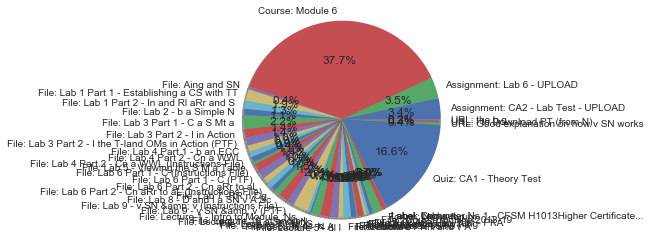

In [978]:
labels = module6ml['Event context'].astype('category').cat.categories.tolist()
counts = module6ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [965]:
module6ml["Event context"].value_counts()


Course: Module 6                                          2078
Quiz: CA1 - Theory Test                                    916
Assignment: Lab 6 - UPLOAD                                 193
Assignment: CA2 - Lab Test - UPLOAD                        189
File: Lecture 1 - Intro to Module  Ns                      136
File: Lab 3 Part 1 - C a S Mt a                            122
File: Lab 1 Part 1 - Establishing a CS with TT             104
File: Lecture 3 - N ps  c                                   90
File:1Course Outline 2018-19                                86
File: Lab 9 - v SN &amp; v (Instructions File)              85
File: Lecture 2 - NOS                                       80
File: Lab 3 Part 2 - I in Action                            77
File: Lab 6 Part 1 - C (PTF)                                76
File: Lab 3 Part 2 - I the T-Iand OMs in Action (PTF)       75
File: Lecture 4 - N A                                       73
File: Lab 1 Part 2 - In and Rl aRr and S               

In [958]:
module6ml["Event name"].value_counts()


Course module viewed                                      2139
Course viewed                                             1625
Quiz attempt viewed                                        666
The status of the submission has been viewed.              177
Grade user report viewed                                   172
Quiz attempt reviewed                                      112
Course user report viewed                                  112
Submission form viewed.                                     48
Course activity completion updated                          46
User list viewed                                            42
A file has been uploaded.                                   39
The user has accepted the statement of the submission.      39
A submission has been submitted.                            39
Submission created.                                         38
User enrolled in course                                     27
Role assigned                                          

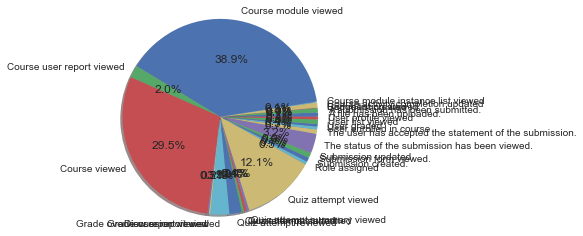

In [948]:
labels = module6ml['Event name'].astype('category').cat.categories.tolist()
counts = module6ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [896]:
# Time6
time6 = module6ml["Time"].str.split(",", n = 1, expand = True)

In [897]:
# making separate Date column from new data frame 
module6ml["Date"]= time6[0] 

# making seperate Time column from new data frame
module6ml['Time']= time6[1]


In [910]:
# Convert the date column to datetime64
module6ml.Date = pd.to_datetime(module6ml.Date)

In [392]:
m6mg = module6mg[['First name', 'Surname', 'ID number', 'Quiz: CA1 - Theory Test (Real)']]

In [418]:
m6ml = module6ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [259]:
m6og = module6og[['ID number', 'First Name', 'Surname', 'Group', 'Total CA Mark / 100', 'Final Grade', 'CA1 Theory Test / 35', 'CA2 Lab Test / 45', 'Labs CA / 20', 'Wk1-Lecture', 'Wk1-Lab', 'Wk2-Lecture', 'Wk2-Lab', 'Wk2-CA / 3', 'wk2-CA / 2.5', 'Wk3-Lecture', 'Wk3-Lab', 'wk3-CA / 3', 'wk3-Ca/2.5', 'Wk4-Lecture', 'Wk4-Lab', 'wk4-CA/2.5', 'wk4-ca/3', 'Wk5-Lecture', 'Wk5-Lab', 'wk5-Ca/2.5', 'wk5-CA / 3', 'Wk6-Lecture', 'Wk6-Lab', 'wk6-CA/2.5', 'wk6-CA / 3', 'wk7-Lecture', 'wk7-Lab', 'wk7-CA / 3', 'wk7-CA / 2.5', 'Wk8-Lecture', 'Wk8-CA1', 'Wk9-Lecture', 'Wk9-Lab', 'Wk9-CA / 3', 'wk10-Lecture', 'wk10-Lab', 'wk10-CA / 2.5', 'wk10-CA / 3', 'wl11-Lecture', 'wk11-CA2', 'wk0-CA / 2.5']]

In [787]:
m6og.plot(kind='scatter', x='Total CA Mark / 100', y='Labs CA / 20', rot=70)

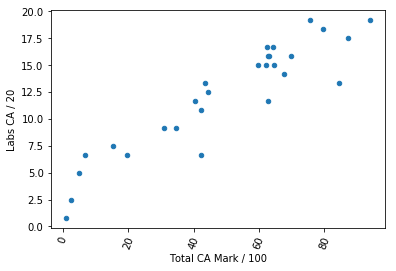

In [788]:
plt.show()

In [785]:
m6og.plot(kind='scatter', x='Total CA Mark / 100', y='CA2 Lab Test / 45', rot=70)

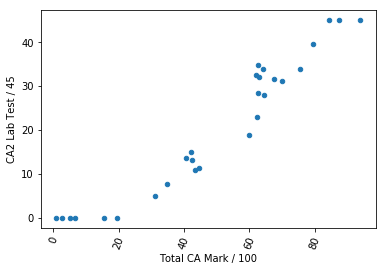

In [786]:
plt.show()

In [782]:
m6og.plot(kind='scatter', x='Total CA Mark / 100', y='CA1 Theory Test / 35', rot=70)

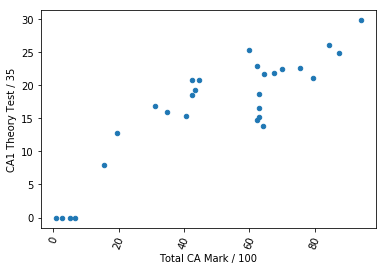

In [783]:
plt.show()

In [ ]:
# Encoding Binary6 features


In [677]:
m6og.head()
# Need to change Y to 1
# Need to change N to 0
# Need to change Wk1 Lecture , Wk9 Lecture,Wk9-Lab,wk

ID number First Name Surname  Group  Total CA Mark / 100 Final Grade  \
0  Cg2xJ2Si       ag2x    bJ2S      1            42.306667           C   
1  z2miDkoM       a2mi    bDko      2            84.453333           A   
2  sD2nqfdF       aD2n    bqfd      2             6.666667           F   
3  FjdRQnjO       ajdR    bQnj      2            40.516667           C   
4  tAK5SAbE       aAK5    bSAb      2            69.883333          B+   

   CA1 Theory Test / 35  CA2 Lab Test / 45  Labs CA / 20  Wk1-Lecture  ...    \
0                 20.79              14.85      6.666667            1  ...     
1                 26.12              45.00     13.333333            1  ...     
2                  0.00               0.00      6.666667            1  ...     
3                 15.35              13.50     11.666667            1  ...     
4                 22.50              31.05     15.833333            1  ...     

  Wk9-Lab Wk9-CA / 3 wk10-Lecture  wk10-Lab  wk10-CA / 2.5 wk10-CA / 3  \
0       0          0            0         0       0.000000           0   
1       1          2            0         1       2.500000           3   
2       0          0            0         0       0.000000           0   
3       1          1            1         1       1.666667           2   
4       1          2            0         1       2.500000           3   

  wl11-Lecture  wk11-CA2  wk0-CA / 2.5   Pass  
0            0         1      0.000000   True  
1            0         1      1.666667   True  
2            0         0      0.000000  False  
3            0         1      0.833333   True  
4            1         1      1.666667   True  

[5 rows x 48 columns]

In [686]:
m6og.corr()
# Feature selection and engineering


Group  Total CA Mark / 100  CA1 Theory Test / 35  \
Group                 1.000000e+00             0.367889              0.346973   
Total CA Mark / 100   3.678890e-01             1.000000              0.881737   
CA1 Theory Test / 35  3.469735e-01             0.881737              1.000000   
CA2 Lab Test / 45     3.226364e-01             0.960956              0.730837   
Labs CA / 20          3.738197e-01             0.925144              0.803744   
Wk1-Lecture           2.773501e-01             0.260302              0.213689   
Wk2-CA / 3            4.945433e-01             0.740522              0.715830   
wk2-CA / 2.5          4.945433e-01             0.740522              0.715830   
wk3-CA / 3            1.332347e-01             0.352232              0.377166   
wk3-Ca/2.5            1.332347e-01             0.352232              0.377166   
wk4-CA/2.5            4.917052e-01             0.639906              0.681266   
wk4-ca/3              4.917052e-01             0.639906              0.681266   
wk5-Ca/2.5           -1.409150e-01             0.495164              0.430136   
wk5-CA / 3           -1.409150e-01             0.495164              0.430136   
wk6-CA/2.5            3.746489e-01             0.552970              0.346123   
wk6-CA / 3            3.746489e-01             0.552970              0.346123   
wk7-CA / 3            4.472136e-01             0.658793              0.657660   
wk7-CA / 2.5          4.472136e-01             0.658793              0.657660   
Wk9-Lecture           2.294157e-01             0.643406              0.563436   
Wk9-Lab               3.656362e-01             0.743042              0.628837   
Wk9-CA / 3            3.001668e-01             0.829644              0.649203   
wk10-Lecture         -8.275114e-18             0.314373              0.348462   
wk10-Lab              7.647191e-02             0.663548              0.594063   
wk10-CA / 2.5         5.547002e-02             0.745042              0.603285   
wk10-CA / 3           5.547002e-02             0.745042              0.603285   
wl11-Lecture         -8.275114e-18             0.418556              0.437650   
wk11-CA2              2.041241e-01             0.706899              0.835148   
wk0-CA / 2.5          3.001668e-01             0.829644              0.649203   
Pass                  1.581139e-01             0.839606              0.774094   

                      CA2 Lab Test / 45  Labs CA / 20  Wk1-Lecture  \
Group                          0.322636      0.373820     0.277350   
Total CA Mark / 100            0.960956      0.925144     0.260302   
CA1 Theory Test / 35           0.730837      0.803744     0.213689   
CA2 Lab Test / 45              1.000000      0.848954     0.271355   
Labs CA / 20                   0.848954      1.000000     0.193980   
Wk1-Lecture                    0.271355      0.193980     1.000000   
Wk2-CA / 3                     0.649867      0.764711     0.327078   
wk2-CA / 2.5                   0.649867      0.764711     0.327078   
wk3-CA / 3                     0.245264      0.488953    -0.061588   
wk3-Ca/2.5                     0.245264      0.488953    -0.061588   
wk4-CA/2.5                     0.537893      0.629877     0.283239   
wk4-ca/3                       0.537893      0.629877     0.283239   
wk5-Ca/2.5                     0.445432      0.588281    -0.117248   
wk5-CA / 3                     0.445432      0.588281    -0.117248   
wk6-CA/2.5                     0.564085      0.638814     0.048491   
wk6-CA / 3                     0.564085      0.638814     0.048491   
wk7-CA / 3                     0.563876      0.686685     0.206725   
wk7-CA / 2.5                   0.563876      0.686685     0.206725   
Wk9-Lecture                    0.609446      0.642740     0.402980   
Wk9-Lab                        0.693710      0.803338     0.344791   
Wk9-CA / 3                     0.810673      0.865894     0.305255   
wk10-Lecture                   0.206749      0.458389     

In [678]:
# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
m6og['Pass'] = m6og['Pass'].replace({'False': 0 , 'True': 1})


TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [675]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wl11-Lecture'  in Module 6

m6og['wk11-CA2'] = m6og['wk11-CA2'].replace({'N': 0 , 'Y': 1})

In [676]:
# Print the results to verify
print(m6og['wk11-CA2'].head())

0    1
1    1
2    0
3    1
4    1
Name: wk11-CA2, dtype: int64


In [673]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wl11-Lecture'  in Module 6

m6og['wl11-Lecture'] = m6og['wl11-Lecture'].replace({'N': 0 , 'Y': 1})

In [674]:
# Print the results to verify
print(m6og['wl11-Lecture'].head())

0    0
1    0
2    0
3    0
4    1
Name: wl11-Lecture, dtype: int64


In [669]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lab'  in Module 6

m6og['wk10-Lab'] = m6og['wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [670]:
# Print the results to verify
print(m6og['wk10-Lab'].head())

0    0
1    1
2    0
3    1
4    1
Name: wk10-Lab, dtype: int64


In [666]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lab'  in Module 6

m6og['Wk9-Lab'] = m6og['Wk9-Lab'].replace({'N': 0 , 'Y': 1})

In [667]:
# Print the results to verify
print(m6og['Wk9-Lab'].head())

0    0
1    1
2    0
3    1
4    1
Name: Wk9-Lab, dtype: int64


In [663]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lecture'  in Module 6

m6og['wk10-Lecture'] = m6og['wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [664]:
# Print the results to verify
print(m6og['wk10-Lecture'].head())

0    0
1    0
2    0
3    1
4    0
Name: wk10-Lecture, dtype: int64


In [660]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 6

m6og['Wk9-Lecture'] = m6og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [661]:
# Print the results to verify
print(m6og['Wk9-Lecture'].head())

0    1
1    1
2    0
3    1
4    1
Name: Wk9-Lecture, dtype: int64


In [658]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 6

m6og['Wk1-Lecture'] = m6og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})

In [659]:
# Print the results to verify
print(m6og['Wk1-Lecture'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wk1-Lecture, dtype: int64


In [420]:
m6ml.describe().transpose()
# The most frequent student was aL20 blLY
# Event context : Course Module 6
# File

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 22/11/18, 20:09 most frequent time
#User full name: Name of the user is listed in this column. - aL20 blLY	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Course: Module 6		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, File was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.



count unique  \
Time            5505   2728   
User full name  5505     27   
Event context   5505     46   
Component       5505     10   
Event name      5505     27   
Description     5505     42   

                                                              top  freq  
Time                                              22/11/18, 20:09    39  
User full name                                          aL20 blLY   444  
Event context                                    Course: Module 6  2078  
Component                                                    File  1990  
Event name                                   Course module viewed  2139  
Description     The user with id '0' viewed the 'resource' act...  1990

In [584]:
# Visualize the distribution of Assignment: Assignment 1 T (Real) in Module 6'

sns.distplot(m6mg['Quiz: CA1 - Theory Test (Real)'])

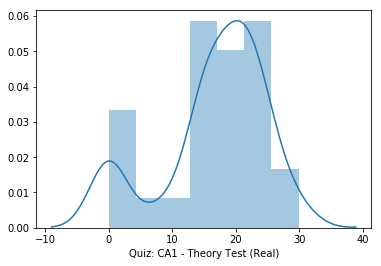

In [585]:
plt.show()
# 3 students missed first quiz

In [789]:
m6mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
First name                        28 non-null object
Surname                           28 non-null object
ID number                         28 non-null object
Quiz: CA1 - Theory Test (Real)    28 non-null float64
dtypes: float64(1), object(3)
memory usage: 976.0+ bytes


In [393]:
m6mg.describe().transpose()
# 28 people did the Quiz CA1

count       mean      std  min      25%  \
Quiz: CA1 - Theory Test (Real)   28.0  16.651429  8.28914  0.0  14.5875   

                                   50%     75%    max  
Quiz: CA1 - Theory Test (Real)  18.565  22.065  29.87

In [516]:
sns.distplot(m6mg['Quiz: CA1 - Theory Test (Real)'])

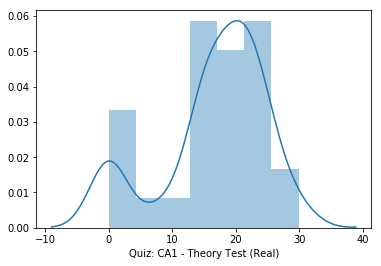

In [517]:
plt.show()

In [469]:
print(m6mg['Quiz: CA1 - Theory Test (Real)'].value_counts(dropna=False))


0.00     4
15.15    1
22.50    1
18.50    1
22.87    1
22.68    1
29.87    1
20.76    1
15.91    1
16.51    1
21.08    1
15.35    1
13.89    1
21.65    1
21.92    1
14.82    1
7.90     1
19.34    1
26.12    1
24.90    1
12.80    1
20.79    1
25.40    1
18.63    1
16.90    1
Name: Quiz: CA1 - Theory Test (Real), dtype: int64


In [419]:
m6og.describe().transpose()
# Week 2 - 10
# Weekly assesment

count       mean        std       min        25%  \
Group                  28.0   1.500000   0.509175  1.000000   1.000000   
Total CA Mark / 100    28.0  49.614524  26.973729  0.833333  33.799167   
CA1 Theory Test / 35   28.0  16.651429   8.289140  0.000000  14.587500   
CA2 Lab Test / 45      28.0  20.635714  15.623883  0.000000   6.975000   
Labs CA / 20           28.0  12.202381   5.026751  0.833333   8.750000   
Wk2-CA / 3             28.0   2.107143   0.956045  0.000000   1.000000   
wk2-CA / 2.5           28.0   1.755952   0.796704  0.000000   0.833333   
wk3-CA / 3             28.0   2.321429   0.818923  0.000000   2.000000   
wk3-Ca/2.5             28.0   1.934524   0.682436  0.000000   1.666667   
wk4-CA/2.5             28.0   1.636905   0.801302  0.000000   1.666667   
wk4-ca/3               28.0   1.964286   0.961563  0.000000   2.000000   
wk5-Ca/2.5             28.0   1.636905   1.075402  0.000000   0.625000   
wk5-CA / 3             28.0   1.964286   1.290482  0.000000   0.750000   
wk6-CA/2.5             28.0   1.458333   1.213458  0.000000   0.000000   
wk6-CA / 3             28.0   1.750000   1.456149  0.000000   0.000000   
wk7-CA / 3             28.0   1.714286   0.975900  0.000000   2.000000   
wk7-CA / 2.5           28.0   1.428571   0.813250  0.000000   1.666667   
Wk9-CA / 3             28.0   1.178571   1.090483  0.000000   0.000000   
wk10-CA / 2.5          28.0   1.369048   1.092772  0.000000   0.000000   
wk10-CA / 3            28.0   1.642857   1.311326  0.000000   0.000000   
wk0-CA / 2.5           28.0   0.982143   0.908736  0.000000   0.000000   

                            50%        75%        max  
Group                  1.500000   2.000000   2.000000  
Total CA Mark / 100   61.010000  65.309167  94.036667  
CA1 Theory Test / 35  18.565000  22.065000  29.870000  
CA2 Lab Test / 45     20.925000  32.737500  45.000000  
Labs CA / 20          13.333333  15.833333  19.166667  
Wk2-CA / 3             2.000000   3.000000   3.000000  
wk2-CA / 2.5           1.666667   2.500000   2.500000  
wk3-CA / 3             2.000000   3.000000   3.000000  
wk3-Ca/2.5             1.666667   2.500000   2.500000  
wk4-CA/2.5             1.666667   2.500000   2.500000  
wk4-ca/3               2.000000   3.000000   3.000000  
wk5-Ca/2.5             2.500000   2.500000   2.500000  
wk5-CA / 3             3.000000   3.000000   3.000000  
wk6-CA/2.5             2.500000   2.500000   2.500000  
wk6-CA / 3             3.000000   3.000000   3.000000  
wk7-CA / 3             2.000000   2.000000   3.000000  
wk7-CA / 2.5           1.666667   1.666667   2.500000  
Wk9-CA / 3             2.000000   2.000000   3.000000  
wk10-CA / 2.5          1.666667   2.500000   2.500000  
wk10-CA / 3            2.000000   3.000000   3.000000  
wk0-CA / 2.5           1.666667   1.666667   2.500000

In [778]:
fail6 = m6og['Total CA Mark / 100'] < 40

In [779]:
fail6.sum()

8

In [655]:
passed6 = m6og['Total CA Mark / 100'] > 40


In [777]:
passed6.sum()

20

In [656]:
# Using 'passed6' as the column name 
# and equating it to the list 
m6og['Pass'] = passed6 


In [657]:
sns.boxplot(x = 'Pass', y = 'Total CA Mark / 100', data = m6og)

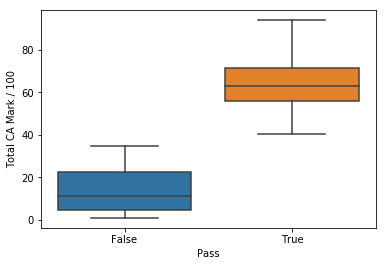

In [553]:
plt.show()

In [599]:
sns.boxplot(x = 'Pass', y = 'CA2 Lab Test / 45',data = m6og,hue = 'CA1 Theory Test / 35') 


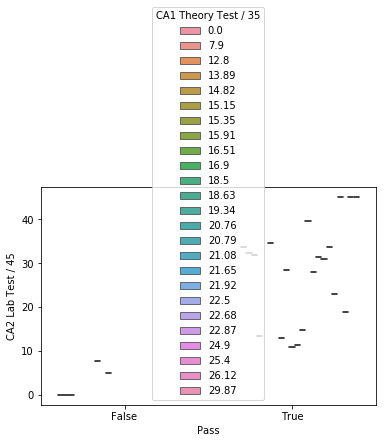

In [600]:
plt.show()

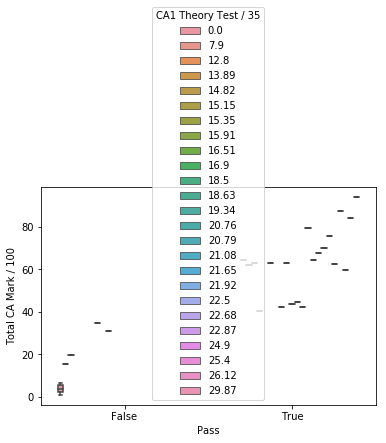

In [597]:
plt.show()

In [492]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(m6og.groupby(['Pass']).mean())


       Group  Total CA Mark / 100  CA1 Theory Test / 35  CA2 Lab Test / 45  \
Pass                                                                         
False  1.375            14.451250               6.68875              1.575   
True   1.550            63.679833              20.63650             28.260   

       Labs CA / 20  Wk2-CA / 3  wk2-CA / 2.5  wk3-CA / 3  wk3-Ca/2.5  \
Pass                                                                    
False      5.937500       1.125      0.937500       1.875    1.562500   
True      14.708333       2.500      2.083333       2.500    2.083333   

       wk4-CA/2.5      ...       wk5-Ca/2.5  wk5-CA / 3  wk6-CA/2.5  \
Pass                   ...                                            
False    1.041667      ...         0.833333        1.00    0.520833   
True     1.875000      ...         1.958333        2.35    1.833333   

       wk6-CA / 3  wk7-CA / 3  wk7-CA / 2.5  Wk9-CA / 3  wk10-CA / 2.5  \
Pass                               

In [249]:
module6mg
# Keep 

First name Surname ID number            Email address  \
0        a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1        aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2        aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3        a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4        aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   
5        am5M    b1HG  um5M1HGl  um5M1HGl@student.itb.ie   
6        aL20    blLY  6L20lLYB  6L20lLYB@student.itb.ie   
7        aw97    baOy  fw97aOyU  fw97aOyU@student.itb.ie   
8        atVF    bWWA  btVFWWA9  btVFWWA9@student.itb.ie   
9        azCY    bvQB  tzCYvQBD  tzCYvQBD@student.itb.ie   
10       aJGs    bxon  2JGsxonj  2JGsxonj@student.itb.ie   
11       ajrV    bTes  qjrVTesk  qjrVTesk@student.itb.ie   
12       aNBi    b8W7  lNBi8W7k  lNBi8W7k@student.itb.ie   
13       ajdR    bQnj  FjdRQnjO  FjdRQnjO@student.itb.ie   
14       aiEd    b8Pq  wiEd8PqG  wiEd8PqG@student.itb.ie   
15       a2mi    bDko  z2miDkoM  z2miDkoM@student.itb.ie   
16       afDK    bEXb  qfDKEXbx  qfDKEXbx@student.itb.ie   
17       aD2n    bqfd  sD2nqfdF  sD2nqfdF@student.itb.ie   
18       a6Uc    b22A  t6Uc22AA  t6Uc22AA@student.itb.ie   
19       a322    bSXp  z322SXpu  z322SXpu@student.itb.ie   
20       aTcu    bg6b  LTcug6b4  LTcug6b4@student.itb.ie   
21       aYZZ    bVOq  sYZZVOqR  sYZZVOqR@student.itb.ie   
22       ag2x    bJ2S  Cg2xJ2Si  Cg2xJ2Si@student.itb.ie   
23       aS1r    buSe  KS1ruSeJ  KS1ruSeJ@student.itb.ie   
24       aYyZ    bMB1  RYyZMB1V  RYyZMB1V@student.itb.ie   
25       aA6B    bBfk  8A6BBfkf  8A6BBfkf@student.itb.ie   
26       asqg    bbCp  JsqgbCpo  JsqgbCpo@student.itb.ie   
27       aHCL    bSn1  jHCLSn1y  jHCLSn1y@student.itb.ie   

    Quiz: CA1 - Theory Test (Real)  Last downloaded from this course  
0                             0.00                        1553878127  
1                             0.00                        1553878127  
2                            22.50                        1553878127  
3                            19.34                        1553878127  
4                             0.00                        1553878127  
5                            22.87                        1553878127  
6                            14.82                        1553878127  
7                            24.90                        1553878127  
8                            18.50                        1553878127  
9                            15.91                        1553878127  
10                           12.80                        1553878127  
11                           13.89                        1553878127  
12                           21.08                        1553878127  
13                           15.35                        1553878127  
14                           25.40                        1553878127  
15                           26.12                        1553878127  
16                           22.68                        1553878127  
17                            0.00                        1553878127  
18                           18.63                        1553878127  
19                            7.90                        1553878127  
20                           21.92                        1553878127  
21                           21.65                        1553878127  
22                           20.79                        1553878127  
23                           16.90                        1553878127  
24                           15.15                        1553878127  
25                           20.76                        1553878127  
26                           16.51                        1553878127  
27                           29.87                        1553878127

In [245]:
m6ml.head()

Time User full name          Event context Component  \
0  31/01/19, 13:41      a4jV bO8M       Course: Module 6    System   
1  30/01/19, 13:28      a6Uc b22A  File: Lecture 2 - NOS      File   
2  30/01/19, 13:17      a6Uc b22A  File: Lecture 9 - SIN      File   
3  30/01/19, 13:16      a6Uc b22A       Course: Module 6    System   
4  29/01/19, 21:42      ajdR bQnj       Course: Module 6    System   

             Event name                                        Description  
0         Course viewed  The user with id '0' viewed the course with id...  
1  Course module viewed  The user with id '0' viewed the 'resource' act...  
2  Course module viewed  The user with id '0' viewed the 'resource' act...  
3         Course viewed  The user with id '0' viewed the course with id...  
4         Course viewed  The user with id '0' viewed the course with id...

In [74]:
module6ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5505 entries, 0 to 5504
Data columns (total 9 columns):
Time              5505 non-null object
User full name    5505 non-null object
Affected user     5505 non-null object
Event context     5505 non-null object
Component         5505 non-null object
Event name        5505 non-null object
Description       5505 non-null object
Origin            5505 non-null object
A                 5505 non-null object
dtypes: object(9)
memory usage: 387.1+ KB


In [77]:
module6mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
First name                          28 non-null object
Surname                             28 non-null object
ID number                           28 non-null object
Email address                       28 non-null object
Quiz: CA1 - Theory Test (Real)      28 non-null float64
Last downloaded from this course    28 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


In [115]:
module6mg['Quiz: CA1 - Theory Test (Real)'].plot('hist')

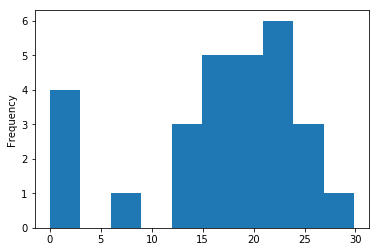

In [116]:
plt.show()

In [52]:
module6ml.head()
# User full name
# Event name
# Description
# 

Time User full name Affected user          Event context  \
0  31/01/19, 13:41      a4jV bO8M             -       Course: Module 6   
1  30/01/19, 13:28      a6Uc b22A             -  File: Lecture 2 - NOS   
2  30/01/19, 13:17      a6Uc b22A             -  File: Lecture 9 - SIN   
3  30/01/19, 13:16      a6Uc b22A             -       Course: Module 6   
4  29/01/19, 21:42      ajdR bQnj             -       Course: Module 6   

  Component            Event name  \
0    System         Course viewed   
1      File  Course module viewed   
2      File  Course module viewed   
3    System         Course viewed   
4    System         Course viewed   

                                         Description Origin          A  
0  The user with id '0' viewed the course with id...    web  127.0.0.1  
1  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
2  The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
3  The user with id '0' viewed the course with id...    web  127.0.0.1  
4  The user with id '0' viewed the course with id...    web  127.0.0.1

In [123]:
module6ml.describe()

Time User full name Affected user     Event context  \
count              5505           5505          5505              5505   
unique             2728             27             1                46   
top     22/11/18, 20:09      aL20 blLY             -  Course: Module 6   
freq                 39            444          5505              2078   

       Component            Event name  \
count       5505                  5505   
unique        10                    27   
top         File  Course module viewed   
freq        1990                  2139   

                                              Description Origin          A  
count                                                5505   5505       5505  
unique                                                 42      2          1  
top     The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
freq                                                 1990   5494       5505

In [53]:
module6mg.head()
# ID number
# Quiz: CA1 - Theory Test



First name Surname ID number            Email address  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   

   Quiz: CA1 - Theory Test (Real)  Last downloaded from this course  
0                            0.00                        1553878127  
1                            0.00                        1553878127  
2                           22.50                        1553878127  
3                           19.34                        1553878127  
4                            0.00                        1553878127

In [124]:
module6mg.describe()
# 29 Max
# 16 Mean
# Last downloaded from this course


Quiz: CA1 - Theory Test (Real)  Last downloaded from this course
count                       28.000000                      2.800000e+01
mean                        16.651429                      1.553878e+09
std                          8.289140                      0.000000e+00
min                          0.000000                      1.553878e+09
25%                         14.587500                      1.553878e+09
50%                         18.565000                      1.553878e+09
75%                         22.065000                      1.553878e+09
max                         29.870000                      1.553878e+09

In [55]:
module6og.head()
# ID number
# Total CA Mark
# 

ID number First Name Surname  Group  Total CA Mark / 100 Final Grade  \
0  Cg2xJ2Si       ag2x    bJ2S      1            42.306667           C   
1  z2miDkoM       a2mi    bDko      2            84.453333           A   
2  sD2nqfdF       aD2n    bqfd      2             6.666667           F   
3  FjdRQnjO       ajdR    bQnj      2            40.516667           C   
4  tAK5SAbE       aAK5    bSAb      2            69.883333          B+   

   CA1 Theory Test / 35  CA2 Lab Test / 45  Labs CA / 20 Wk1-Lecture  \
0                 20.79              14.85      6.666667           Y   
1                 26.12              45.00     13.333333           Y   
2                  0.00               0.00      6.666667           Y   
3                 15.35              13.50     11.666667           Y   
4                 22.50              31.05     15.833333           Y   

      ...      Wk9-Lab Wk9-CA / 3 wk10-Lecture  wk10-Lab  wk10-CA / 2.5  \
0     ...            N          0            N         N       0.000000   
1     ...            Y          2            N         Y       2.500000   
2     ...            N          0            N         N       0.000000   
3     ...            Y          1            Y         Y       1.666667   
4     ...            Y          2            N         Y       2.500000   

  wk10-CA / 3 wl11-Lecture  wk11-CA2  Student Name wk0-CA / 2.5  
0           0            N         Y            --     0.000000  
1           3            N         Y            --     1.666667  
2           0            N         N            --     0.000000  
3           2            N         Y            --     0.833333  
4           3            Y         Y            --     1.666667  

[5 rows x 48 columns]

In [125]:
module6og.describe()
# Week 11 CA
# Total CA 94 Max
# Mean 49

Group  Total CA Mark / 100  CA1 Theory Test / 35  \
count  28.000000            28.000000             28.000000   
mean    1.500000            49.614524             16.651429   
std     0.509175            26.973729              8.289140   
min     1.000000             0.833333              0.000000   
25%     1.000000            33.799167             14.587500   
50%     1.500000            61.010000             18.565000   
75%     2.000000            65.309167             22.065000   
max     2.000000            94.036667             29.870000   

       CA2 Lab Test / 45  Labs CA / 20  Wk2-CA / 3  wk2-CA / 2.5  wk3-CA / 3  \
count          28.000000     28.000000   28.000000     28.000000   28.000000   
mean           20.635714     12.202381    2.107143      1.755952    2.321429   
std            15.623883      5.026751    0.956045      0.796704    0.818923   
min             0.000000      0.833333    0.000000      0.000000    0.000000   
25%             6.975000      8.750000    1.000000      0.833333    2.000000   
50%            20.925000     13.333333    2.000000      1.666667    2.000000   
75%            32.737500     15.833333    3.000000      2.500000    3.000000   
max            45.000000     19.166667    3.000000      2.500000    3.000000   

       wk3-Ca/2.5  wk4-CA/2.5      ...       wk5-Ca/2.5  wk5-CA / 3  \
count   28.000000   28.000000      ...        28.000000   28.000000   
mean     1.934524    1.636905      ...         1.636905    1.964286   
std      0.682436    0.801302      ...         1.075402    1.290482   
min      0.000000    0.000000      ...         0.000000    0.000000   
25%      1.666667    1.666667      ...         0.625000    0.750000   
50%      1.666667    1.666667      ...         2.500000    3.000000   
75%      2.500000    2.500000      ...         2.500000    3.000000   
max      2.500000    2.500000      ...         2.500000    3.000000   

       wk6-CA/2.5  wk6-CA / 3  wk7-CA / 3  wk7-CA / 2.5  Wk9-CA / 3  \
count   28.000000   28.000000   28.000000     28.000000   28.000000   
mean     1.458333    1.750000    1.714286      1.428571    1.178571   
std      1.213458    1.456149    0.975900      0.813250    1.090483   
min      0.000000    0.000000    0.000000      0.000000    0.000000   
25%      0.000000    0.000000    2.000000      1.666667    0.000000   
50%      2.500000    3.000000    2.000000      1.666667    2.000000   
75%      2.500000    3.000000    2.000000      1.666667    2.000000   
max      2.500000    3.000000    3.000000      2.500000    3.000000   

       wk10-CA / 2.5  wk10-CA / 3  wk0-CA / 2.5  
count      28.000000    28.000000     28.000000  
mean        1.369048     1.642857      0.982143  
std         1.092772     1.311326      0.908736  
min         0.000000     0.000000      0.000000  
25%         0.000000     0.000000      0.000000  
50%         1.666667     2.000000      1.666667  
75%         2.500000     3.000000      1.666667  
max         2.500000     3.000000      2.500000  

[8 rows x 21 columns]

In [120]:
module6og['Total CA Mark / 100'].plot('hist')

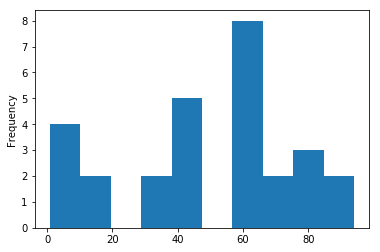

In [121]:
plt.show()

In [74]:
module6ml.shape

(5505, 9)

In [90]:
module6ml.columns
# User full name
# Description


Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'A'],
      dtype='object')

In [89]:
module6mg.columns
# ID number
# Quiz: CA1 - Theory Test 
# Last downloaded from this course

Index(['First name', 'Surname', 'ID number', 'Email address',
       'Quiz: CA1 - Theory Test (Real)', 'Last downloaded from this course'],
      dtype='object')

In [73]:
module6mg.shape

(28, 6)

In [263]:
# Begin7 Data Preperation Module 7
# 3 Files in Module 7
# Module 7

module7ml = pd.read_csv('Module7-MoodleLogs.csv')

In [262]:
module7mg = pd.read_csv('Module7-MoodleGrades.csv')

In [269]:
module7og = pd.read_csv('Module7-OwnGrades.csv')

In [264]:
print (module7mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)', 'Last downloaded from this course']


In [854]:
# Print the number of unique values in each modul7mg column
print(module7mg.nunique())

First name                          14
Surname                             14
ID number                           14
Email address                       14
CA2 - Practical Exam (Real)         14
Quiz: CA3 - Theory Test (Real)      14
Last downloaded from this course     1
dtype: int64


In [856]:
# Print the number of unique values in each modul7og column
print(module7og.nunique())

ID number               14
First Name              14
Surname                 14
Total CA Mark / 100     14
Final Grade              6
CA1 Report / 20         10
CA2 Lab Test / 35       14
CA3 Theory Test / 35    14
Labs CA / 10            10
Wk1-Lab                  1
Wk1-Lecture              2
Wk2-CA / 1               1
Wk2-Lab                  1
Wk2-Lecture              1
Wk3-CA / 1               3
Wk3-Lab                  1
Wk3-Lecture              1
Wk4-CA / 1               1
Wk4-Lab                  1
Wk4-Lecture              1
Wk5-CA / 1.5             3
Wk5-Lab                  2
Wk5-Lecture              2
Wk6-CA / 1               3
Wk6-Lab                  1
Wk6-Lecture              2
Wk7-CA / 1               2
Wk7-Lab                  1
Wk7-Lecture              1
Wk8-CA / 1.5             4
Wk8-Lab                  2
Wk8-Lecture              2
Wk9-CA2                  1
Wk9-Lecture              1
Wk10-CA / 1              5
Wk10-Lab                 2
Wk10-Lecture             2
W

In [855]:
# Print the number of unique values in each modul6mg column
print(module7ml.nunique())

Time              1369
User full name      14
Affected user        1
Event context       43
ct                  10
Event name          27
Description         70
Origin               1
IP address           1
dtype: int64


In [ ]:
# Cleanup7


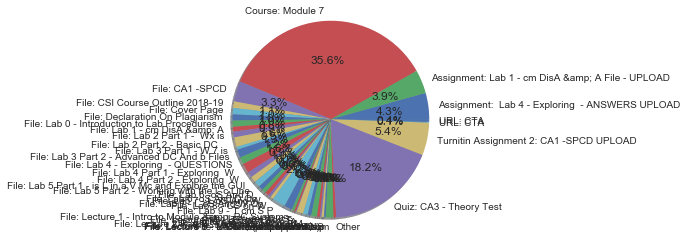

In [979]:
labels = module7ml['Event context'].astype('category').cat.categories.tolist()
counts = module7ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [964]:
module7ml["Event context"].value_counts()


Course: Module 7                                           1127
Quiz: CA3 - Theory Test                                     576
Turnitin Assignment 2: CA1 -SPCD UPLOAD                     170
Assignment:  Lab 4 - Exploring  - ANSWERS UPLOAD            136
Assignment: Lab 1 - cm DisA &amp; A File - UPLOAD           123
File: CA1 -SPCD                                             106
File: Lab 9 - T cm S P                                       69
File: Lab 2 Part 2 - Basic DC                                50
File: Lab 4 Part 1 - Exploring  W                            50
File: Lab 3 Part 2 - Advanced DC And b Files                 42
File: Lecture 1 - Intro to Module &amp; PC System            41
Forum: News forum                                            40
File: Lab 4 - Exploring  - QUESTIONS                         37
File: Lecture 2 - CC&amp; A                                  34
File: CSI Course Outline 2018-19                             34
File: Cover Page                        

In [959]:
module7ml["Event name"].value_counts()


Course module viewed                                      1048
Course viewed                                              963
Quiz attempt viewed                                        390
List Submissions                                           138
Quiz attempt reviewed                                      101
The status of the submission has been viewed.              100
Grade user report viewed                                    73
Submission form viewed.                                     35
Add Submission                                              32
The user has accepted the statement of the submission.      31
A submission has been submitted.                            31
A file has been uploaded.                                   31
Discussion viewed                                           29
Submission created.                                         27
Quiz attempt summary viewed                                 15
User graded                                            

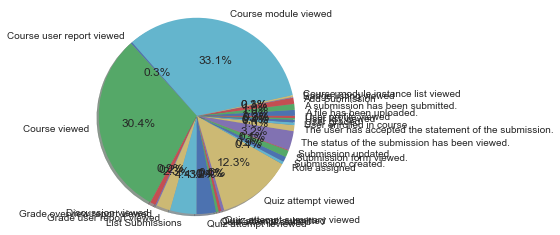

In [949]:
labels = module7ml['Event name'].astype('category').cat.categories.tolist()
counts = module7ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [899]:
#time7
time7 = module7ml["Time"].str.split(",", n = 1, expand = True)

In [900]:
# making separate Date column from new data frame 
module7ml["Date"]= time7[0] 

# making seperate Time column from new data frame
module7ml['Time']= time7[1]


In [911]:
# Convert the date column to datetime64
module7ml.Date = pd.to_datetime(module7ml.Date)

In [267]:
m7mg = module7mg [['First name', 'Surname', 'ID number', 'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)']]

In [797]:
m7mg.plot(kind='scatter', x='CA2 - Practical Exam (Real)', y='Quiz: CA3 - Theory Test (Real)', rot=70)

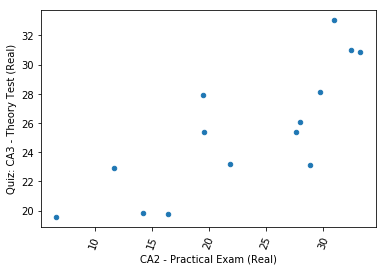

In [798]:
plt.show()

In [422]:
m7mg.describe().transpose()
# Only Two CA's 
# CA2 and CA3

count       mean       std    min      25%  \
CA2 - Practical Exam (Real)      14.0  22.917857  8.425629   6.65  17.2075   
Quiz: CA3 - Theory Test (Real)   14.0  25.446429  4.354467  19.54  22.9875   

                                   50%      75%    max  
CA2 - Practical Exam (Real)     24.735  29.5325  33.25  
Quiz: CA3 - Theory Test (Real)  25.390  28.0675  33.05

In [683]:
m7mg.corr()
# Feature selection and engineering


CA2 - Practical Exam (Real)  \
CA2 - Practical Exam (Real)                        1.000000   
Quiz: CA3 - Theory Test (Real)                     0.797718   

                                Quiz: CA3 - Theory Test (Real)  
CA2 - Practical Exam (Real)                           0.797718  
Quiz: CA3 - Theory Test (Real)                        1.000000

In [586]:
# Visualize the distribution of CA2 - Practical Exam (Real) in Module 7'

sns.distplot(m7mg['CA2 - Practical Exam (Real)'])

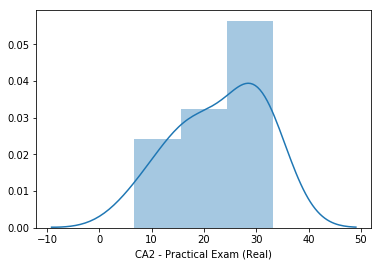

In [587]:
plt.show()

In [518]:
sns.distplot(m7mg['CA2 - Practical Exam (Real)'])

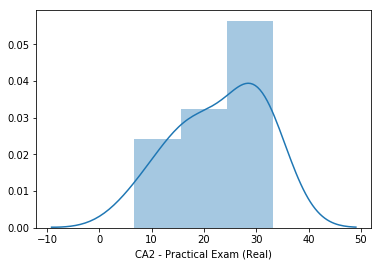

In [519]:
plt.show()

In [520]:
sns.distplot(m7mg['Quiz: CA3 - Theory Test (Real)'])

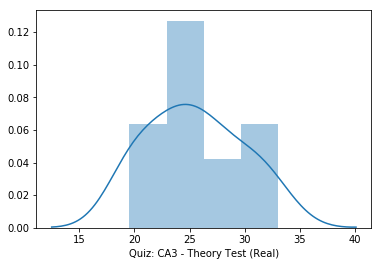

In [521]:
plt.show()

In [471]:
print(m7mg['CA2 - Practical Exam (Real)'].value_counts(dropna=False))


30.98    1
11.73    1
19.60    1
27.65    1
14.23    1
6.65     1
19.48    1
16.45    1
21.82    1
29.75    1
33.25    1
28.88    1
28.00    1
32.38    1
Name: CA2 - Practical Exam (Real), dtype: int64


In [473]:
print(m7mg['Quiz: CA3 - Theory Test (Real)'].value_counts(dropna=False))

33.05    1
23.10    1
25.40    1
19.54    1
27.91    1
30.89    1
19.80    1
22.95    1
26.08    1
19.86    1
30.98    1
28.12    1
25.38    1
23.19    1
Name: Quiz: CA3 - Theory Test (Real), dtype: int64


In [423]:
print (module7ml.columns.tolist())


['Time', 'User full name', 'Affected user', 'Event context', 'ct', 'Event name', 'Description', 'Origin', 'IP address']


In [446]:
m7ml = module7ml[[ 'Time', 'User full name','Event context','ct','Event name','Description']]


In [447]:
m7ml.describe().transpose()
# The most frequent student is aNBi b8W7 - most engaged
# Event context: Course: Module 7
# Event name : Course module viewed

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 10/12/18, 14:12 most frequent time
#User full name: Name of the user is listed in this column. - aNBi b8W7	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Course: Module 7		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, System was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.



count unique  \
Time            3167   1369   
User full name  3167     14   
Event context   3167     43   
ct              3167     10   
Event name      3167     27   
Description     3167     70   

                                                              top  freq  
Time                                              10/12/18, 14:12    26  
User full name                                          aNBi b8W7   386  
Event context                                    Course: Module 7  1127  
ct                                                         System  1042  
Event name                                   Course module viewed  1048  
Description     The user with id '0' viewed the course with id...   963

In [270]:
print (module7og.columns.tolist())


['ID number', 'First Name', 'Surname', 'Total CA Mark / 100', 'Final Grade', 'CA1 Report / 20', 'CA2 Lab Test / 35', 'CA3 Theory Test / 35', 'Labs CA / 10', 'Wk1-Lab', 'Wk1-Lecture', 'Wk2-CA / 1', 'Wk2-Lab', 'Wk2-Lecture', 'Wk3-CA / 1', 'Wk3-Lab', 'Wk3-Lecture', 'Wk4-CA / 1', 'Wk4-Lab', 'Wk4-Lecture', 'Wk5-CA / 1.5', 'Wk5-Lab', 'Wk5-Lecture', 'Wk6-CA / 1', 'Wk6-Lab', 'Wk6-Lecture', 'Wk7-CA / 1', 'Wk7-Lab', 'Wk7-Lecture', 'Wk8-CA / 1.5', 'Wk8-Lab', 'Wk8-Lecture', 'Wk9-CA2', 'Wk9-Lecture', 'Wk10-CA / 1', 'Wk10-Lab', 'Wk10-Lecture', 'Wk11-CA / 1', 'Wk11-Lab', 'Wk11-Lecture', 'Wk12-CA3', 'Wk12-Lecture', 'Wk15-Lecture']


In [421]:
module7og.describe().transpose()


count       mean        std    min        25%       50%  \
Total CA Mark / 100    14.0  68.451964  15.893236  42.81  57.018875  70.01250   
CA1 Report / 20        14.0  11.914286   3.378406   5.80   9.200000  11.80000   
CA2 Lab Test / 35      14.0  22.916250   8.425002   6.65  17.207750  24.73275   
CA3 Theory Test / 35   14.0  25.446429   4.354467  19.54  22.987500  25.39000   
Labs CA / 10           14.0   8.282143   1.721994   5.16   6.997500   8.56000   
Wk2-CA / 1             14.0   1.000000   0.000000   1.00   1.000000   1.00000   
Wk3-CA / 1             14.0   0.855000   0.217848   0.33   0.660000   1.00000   
Wk4-CA / 1             14.0   1.000000   0.000000   1.00   1.000000   1.00000   
Wk5-CA / 1.5           14.0   1.285714   0.323103   0.50   1.000000   1.50000   
Wk6-CA / 1             14.0   0.855000   0.217848   0.33   0.660000   1.00000   
Wk7-CA / 1             14.0   0.902857   0.159394   0.66   0.745000   1.00000   
Wk8-CA / 1.5           14.0   1.035714   0.634407   0.00   0.625000   1.50000   
Wk10-CA / 1            14.0   0.636429   0.402408   0.00   0.397500   0.66000   
Wk11-CA / 1            14.0   0.711429   0.342813   0.00   0.660000   0.66000   

                           75%    max  
Total CA Mark / 100   81.89750  90.34  
CA1 Report / 20       15.35000  16.20  
CA2 Lab Test / 35     29.53125  33.25  
CA3 Theory Test / 35  28.06750  33.05  
Labs CA / 10          10.00000  10.00  
Wk2-CA / 1             1.00000   1.00  
Wk3-CA / 1             1.00000   1.00  
Wk4-CA / 1             1.00000   1.00  
Wk5-CA / 1.5           1.50000   1.50  
Wk6-CA / 1             1.00000   1.00  
Wk7-CA / 1             1.00000   1.00  
Wk8-CA / 1.5           1.50000   1.50  
Wk10-CA / 1            1.00000   1.00  
Wk11-CA / 1            1.00000   1.00

In [684]:
module7og.corr()
# Feature selection and engineering


Total CA Mark / 100  CA1 Report / 20  CA2 Lab Test / 35  \
Total CA Mark / 100              1.000000         0.833030           0.938776   
CA1 Report / 20                  0.833030         1.000000           0.680121   
CA2 Lab Test / 35                0.938776         0.680121           1.000000   
CA3 Theory Test / 35             0.932831         0.758554           0.797705   
Labs CA / 10                     0.642130         0.466682           0.467763   
Wk1-Lab                               NaN              NaN                NaN   
Wk2-CA / 1                            NaN              NaN                NaN   
Wk3-CA / 1                       0.455176         0.243109           0.504090   
Wk4-CA / 1                            NaN              NaN                NaN   
Wk5-CA / 1.5                     0.573991         0.320135           0.557274   
Wk6-CA / 1                       0.467292         0.369367           0.428521   
Wk7-CA / 1                       0.382938         0.352465           0.352685   
Wk8-CA / 1.5                     0.540110         0.514769           0.314080   
Wk10-CA / 1                      0.585501         0.351018           0.397290   
Wk10-Lab                         0.225571         0.050416           0.034484   
Wk10-Lecture                     0.005016         0.060853          -0.203566   
Wk11-CA / 1                      0.233453         0.124714           0.020178   
Wk11-Lab                         0.090145         0.051952          -0.122145   
Wk11-Lecture                     0.090145         0.051952          -0.122145   
Wk12-CA3                              NaN              NaN                NaN   
Wk12-Lecture                          NaN              NaN                NaN   
Wk15-Lecture                    -0.022126        -0.074934          -0.039263   
Pass                                  NaN              NaN                NaN   

                      CA3 Theory Test / 35  Labs CA / 10  Wk1-Lab  Wk2-CA / 1  \
Total CA Mark / 100               0.932831      0.642130      NaN         NaN   
CA1 Report / 20                   0.758554      0.466682      NaN         NaN   
CA2 Lab Test / 35                 0.797705      0.467763      NaN         NaN   
CA3 Theory Test / 35              1.000000      0.653714      NaN         NaN   
Labs CA / 10                      0.653714      1.000000      NaN         NaN   
Wk1-Lab                                NaN           NaN      NaN         NaN   
Wk2-CA / 1                             NaN           NaN      NaN         NaN   
Wk3-CA / 1                        0.373489      0.357955      NaN         NaN   
Wk4-CA / 1                             NaN           NaN      NaN         NaN   
Wk5-CA / 1.5                      0.509249      0.699773      NaN         NaN   
Wk6-CA / 1                        0.336228      0.686024      NaN         NaN   
Wk7-CA / 1                        0.283203      0.441992      NaN         NaN   
Wk8-CA / 1.5                      0.574640      0.875870      NaN         NaN   
Wk10-CA / 1                       0.701147      0.892480      NaN         NaN   
Wk10-Lab                          0.425201      0.615428      NaN         NaN   
Wk10-Lecture                      0.155093      0.297873      NaN         NaN   
Wk11-CA / 1                       0.334576      0.826153      NaN         NaN   
Wk11-Lab                          0.223913      0.603296      NaN         NaN   
Wk11-Lecture                      0.223913      0.603296      NaN         NaN   
Wk12-CA3                               NaN           NaN      NaN         NaN   
Wk12-Lecture                           NaN           NaN      NaN         NaN   
Wk15-Lecture                      0.117405     -0.121150      NaN         NaN   
Pass                                   NaN           NaN      NaN         NaN   

                      Wk3-CA / 1  Wk4-CA / 1  Wk5-CA / 1.5  ...   Wk10-CA / 1  \
Total CA Mark / 100     0.455176         NaN      0

In [801]:
module7og.plot(kind='scatter', x='Total CA Mark / 100', y='CA2 Lab Test / 35', rot=70)

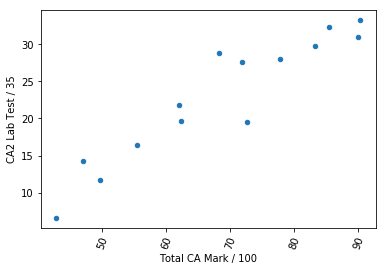

In [802]:
plt.show()

In [799]:
module7og.plot(kind='scatter', x='Total CA Mark / 100', y='CA1 Report / 20', rot=70)

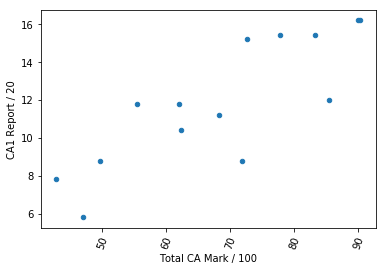

In [800]:
plt.show()

In [685]:
module7og.head(2)
# Need to change the Y to 1
# Need to change the N to 0
# 

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab Wk10-Lecture Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1            1        1.00         1   
1        1  ...          1.0         1            1        0.66         1   

  Wk11-Lecture Wk12-CA3  Wk12-Lecture Wk15-Lecture  Pass  
0            1        1             1            1  True  
1            1        1             1            1  True  

[2 rows x 44 columns]

In [ ]:

# Encoding Binary7 features


In [651]:
# Replace 'no' with 0 and 'yes' with 1 in 'Pass'
module7og['Pass'] = module7og['Pass'].replace({'False': 0 , 'True': 1})


TypeError: Cannot compare types 'ndarray(dtype=bool)' and 'str'

In [652]:
module7og.head(2)

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   

   Wk1-Lab  ...  Wk10-CA / 1  Wk10-Lab Wk10-Lecture Wk11-CA / 1  Wk11-Lab  \
0        1  ...          1.0         1            1        1.00         1   
1        1  ...          1.0         1            1        0.66         1   

  Wk11-Lecture Wk12-CA3  Wk12-Lecture Wk15-Lecture  Pass  
0            1        1             1            1  True  
1            1        1             1            1  True  

[2 rows x 44 columns]

In [649]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk15-Lecture'

module7og['Wk15-Lecture'] = module7og['Wk15-Lecture'].replace({'N': 0 , 'Y': 1})

In [650]:
# Print the results to verify
print(module7og['Wk15-Lecture'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wk15-Lecture, dtype: int64


In [647]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk12-CA3'

module7og['Wk12-CA3'] = module7og['Wk12-CA3'].replace({'N': 0 , 'Y': 1})

In [648]:
# Print the results to verify
print(module7og['Wk12-Lecture'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wk12-Lecture, dtype: int64


In [645]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk12-Lecture'

module7og['Wk12-Lecture'] = module7og['Wk12-Lecture'].replace({'N': 0 , 'Y': 1})

In [646]:
# Print the results to verify
print(module7og['Wk12-Lecture'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wk12-Lecture, dtype: int64


In [643]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk11-Lecture'

module7og['Wk11-Lecture'] = module7og['Wk11-Lecture'].replace({'N': 0 , 'Y': 1})

In [644]:
# Print the results to verify
print(module7og['Wk11-Lecture'].head())

0    1
1    1
2    1
3    0
4    1
Name: Wk11-Lecture, dtype: int64


In [641]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk11-Lab'

module7og['Wk11-Lab'] = module7og['Wk11-Lab'].replace({'N': 0 , 'Y': 1})

In [642]:
# Print the results to verify
print(module7og['Wk11-Lab'].head())

0    1
1    1
2    1
3    0
4    1
Name: Wk11-Lab, dtype: int64


In [639]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lecture'

module7og['Wk10-Lecture'] = module7og['Wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [640]:
# Print the results to verify
print(module7og['Wk10-Lecture'].head())

0    1
1    1
2    1
3    0
4    1
Name: Wk10-Lecture, dtype: int64


In [637]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lab'

module7og['Wk10-Lab'] = module7og['Wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [638]:
# Print the results to verify
print(module7og['Wk10-Lab'].head())

0    1
1    1
2    1
3    0
4    1
Name: Wk10-Lab, dtype: int64


In [635]:
# module7og['Wk1-Lab'].replace({'Y':1,'N':0})       Does not work
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lab'
module7og['Wk1-Lab'] = module7og['Wk1-Lab'].replace({'N': 0 , 'Y': 1})

In [636]:
#module7og['Wk1-Lab'].head(2)
# Print the results to verify
print(module7og['Wk1-Lab'].head())

0    1
1    1
2    1
3    1
4    1
Name: Wk1-Lab, dtype: int64


In [791]:
fail7 = module7og['Total CA Mark / 100'] < 40

In [792]:
fail7.sum()

0

In [494]:
passed7 = module7og['Total CA Mark / 100'] > 40


In [790]:
passed7.sum()

14

In [495]:
# Using 'passed3' as the column name 
# and equating it to the list 
module7og['Pass'] = passed7 


In [555]:
sns.boxplot(x = 'Pass', y = 'Total CA Mark / 100', data = module7og)

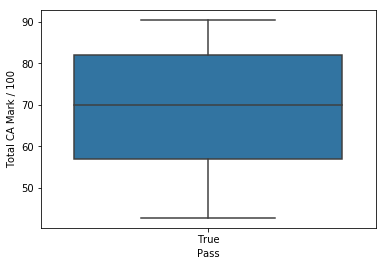

In [556]:
plt.show()

In [594]:
sns.boxplot(x = 'Pass', y = 'Total CA Mark / 100',data = module7og,hue = 'CA1 Report / 20') 


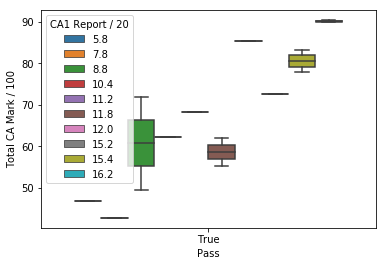

In [595]:
plt.show()

In [496]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(module7og.groupby(['Pass']).mean())


      Total CA Mark / 100  CA1 Report / 20  CA2 Lab Test / 35  \
Pass                                                            
True            68.451964        11.914286           22.91625   

      CA3 Theory Test / 35  Labs CA / 10  Wk2-CA / 1  Wk3-CA / 1  Wk4-CA / 1  \
Pass                                                                           
True             25.446429      8.282143           1       0.855           1   

      Wk5-CA / 1.5  Wk6-CA / 1  Wk7-CA / 1  Wk8-CA / 1.5  Wk10-CA / 1  \
Pass                                                                    
True      1.285714       0.855    0.902857      1.035714     0.636429   

      Wk11-CA / 1  
Pass               
True     0.711429  


In [394]:
m7mg.describe().transpose()


count       mean       std    min      25%  \
CA2 - Practical Exam (Real)      14.0  22.917857  8.425629   6.65  17.2075   
Quiz: CA3 - Theory Test (Real)   14.0  25.446429  4.354467  19.54  22.9875   

                                   50%      75%    max  
CA2 - Practical Exam (Real)     24.735  29.5325  33.25  
Quiz: CA3 - Theory Test (Real)  25.390  28.0675  33.05

In [268]:
m7mg.head()

First name Surname ID number  CA2 - Practical Exam (Real)  \
0       a8NM    bDqB  U8NMDqBG                        32.38   
1       aSnR    bGk9  VSnRGk9O                        16.45   
2       aAK5    bSAb  tAK5SAbE                        28.00   
3       a4jV    bO8M  14jVO8M7                        11.73   
4       aa14    bMdv  ba14Mdv9                        28.88   

   Quiz: CA3 - Theory Test (Real)  
0                           30.98  
1                           19.80  
2                           26.08  
3                           22.95  
4                           23.10

In [51]:
module7ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 9 columns):
Time              3167 non-null object
User full name    3167 non-null object
Affected user     3167 non-null object
Event context     3167 non-null object
ct                3167 non-null object
Event name        3167 non-null object
Description       3167 non-null object
Origin            3167 non-null object
IP address        3167 non-null object
dtypes: object(9)
memory usage: 222.8+ KB


module7ml.info()

In [82]:
module7mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
First name                          14 non-null object
Surname                             14 non-null object
ID number                           14 non-null object
Email address                       14 non-null object
CA2 - Practical Exam (Real)         14 non-null float64
Quiz: CA3 - Theory Test (Real)      14 non-null float64
Last downloaded from this course    14 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 864.0+ bytes


In [122]:
module7mg['CA2 - Practical Exam (Real)'].plot('hist')

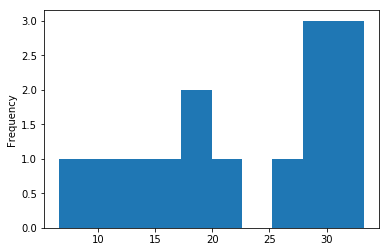

In [123]:
plt.show()

In [124]:
module7mg['Quiz: CA3 - Theory Test (Real)'].plot('hist')

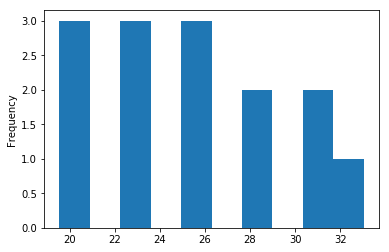

In [125]:
plt.show()

In [83]:
module7og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 43 columns):
ID number               14 non-null object
First Name              14 non-null object
Surname                 14 non-null object
Total CA Mark / 100     14 non-null float64
Final Grade             14 non-null object
CA1 Report / 20         14 non-null float64
CA2 Lab Test / 35       14 non-null float64
CA3 Theory Test / 35    14 non-null float64
Labs CA / 10            14 non-null float64
Wk1-Lab                 14 non-null object
Wk1-Lecture             14 non-null object
Wk2-CA / 1              14 non-null int64
Wk2-Lab                 14 non-null object
Wk2-Lecture             14 non-null object
Wk3-CA / 1              14 non-null float64
Wk3-Lab                 14 non-null object
Wk3-Lecture             14 non-null object
Wk4-CA / 1              14 non-null int64
Wk4-Lab                 14 non-null object
Wk4-Lecture             14 non-null object
Wk5-CA / 1.5            14 non-nu

In [60]:
module7ml.head()
# User full name
# IP address tbr
# Event context
# Event name
# Description


Time User full name Affected user     Event context  \
0  18/01/19, 15:46      am5M b1HG             -  Course: Module 7   
1  15/01/19, 05:48      am5M b1HG             -  Course: Module 7   
2  15/01/19, 05:48      am5M b1HG             -  Course: Module 7   
3  12/01/19, 15:59      ajdR bQnj             -  Course: Module 7   
4  12/01/19, 15:59      ajdR bQnj             -  Course: Module 7   

            ct                Event name  \
0       System             Course viewed   
1  User report  Grade user report viewed   
2       System             Course viewed   
3       System             Course viewed   
4  User report  Grade user report viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the course with id...    web  127.0.0.1  
1  The user with id '0' viewed the user report in...    web  127.0.0.1  
2  The user with id '0' viewed the course with id...    web  127.0.0.1  
3  The user with id '0' viewed the course with id...    web  127.0.0.1  
4  The user with id '0' viewed the user report in...    web  127.0.0.1

In [126]:
module7ml.describe()

Time User full name Affected user     Event context  \
count              3167           3167          3167              3167   
unique             1369             14             1                43   
top     10/12/18, 14:12      aNBi b8W7             -  Course: Module 7   
freq                 26            386          3167              1127   

            ct            Event name  \
count     3167                  3167   
unique      10                    27   
top     System  Course module viewed   
freq      1042                  1048   

                                              Description Origin IP address  
count                                                3167   3167       3167  
unique                                                 70      1          1  
top     The user with id '0' viewed the course with id...    web  127.0.0.1  
freq                                                  963   3167       3167

In [61]:
module7mg.head()
# ID number
# CA2 Practical Exam
# Quiz CA3 - Theory Test 

First name Surname ID number            Email address  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie   

   CA2 - Practical Exam (Real)  Quiz: CA3 - Theory Test (Real)  \
0                        32.38                           30.98   
1                        16.45                           19.80   
2                        28.00                           26.08   
3                        11.73                           22.95   
4                        28.88                           23.10   

   Last downloaded from this course  
0                        1553878803  
1                        1553878803  
2                        1553878803  
3                        1553878803  
4                        1553878803

In [127]:
module7mg.describe()
# CA2 Practical Exam
# Quiz CA3 Theory Test 
# Last downloaded from this course tbr



CA2 - Practical Exam (Real)  Quiz: CA3 - Theory Test (Real)  \
count                    14.000000                       14.000000   
mean                     22.917857                       25.446429   
std                       8.425629                        4.354467   
min                       6.650000                       19.540000   
25%                      17.207500                       22.987500   
50%                      24.735000                       25.390000   
75%                      29.532500                       28.067500   
max                      33.250000                       33.050000   

       Last downloaded from this course  
count                      1.400000e+01  
mean                       1.553879e+09  
std                        0.000000e+00  
min                        1.553879e+09  
25%                        1.553879e+09  
50%                        1.553879e+09  
75%                        1.553879e+09  
max                        1.553879e+09

In [62]:
module7og.head()
# ID number
# 11 weeks of CA

ID number First Name Surname  Total CA Mark / 100 Final Grade  \
0  tzCYvQBD       azCY    bvQB               71.850          B+   
1  FjdRQnjO       ajdR    bQnj               89.885           A   
2  tAK5SAbE       aAK5    bSAb               77.780          B+   
3  ba14Mdv9       aa14    bMdv               68.175           B   
4  qjrVTesk       ajrV    bTes               62.350           B   

   CA1 Report / 20  CA2 Lab Test / 35  CA3 Theory Test / 35  Labs CA / 10  \
0              8.8             27.650                 25.40         10.00   
1             16.2             30.975                 33.05          9.66   
2             15.4             28.000                 26.08          8.30   
3             11.2             28.875                 23.10          6.50   
4             10.4             19.600                 25.38          6.97   

  Wk1-Lab     ...      Wk9-Lecture  Wk10-CA / 1 Wk10-Lab Wk10-Lecture  \
0       Y     ...                Y         1.00        Y            Y   
1       Y     ...                Y         1.00        Y            Y   
2       Y     ...                Y         0.66        Y            Y   
3       Y     ...                Y         0.00        N            N   
4       Y     ...                Y         0.66        Y            Y   

   Wk11-CA / 1 Wk11-Lab Wk11-Lecture  Wk12-CA3 Wk12-Lecture Wk15-Lecture  
0         1.00        Y            Y         Y            Y            Y  
1         0.66        Y            Y         Y            Y            Y  
2         0.66        Y            Y         Y            Y            Y  
3         0.00        N            N         Y            Y            Y  
4         0.66        Y            Y         Y            Y            Y  

[5 rows x 43 columns]

In [128]:
module7og.describe()
# Total CA mean 68
# Max 90


Total CA Mark / 100  CA1 Report / 20  CA2 Lab Test / 35  \
count            14.000000        14.000000          14.000000   
mean             68.451964        11.914286          22.916250   
std              15.893236         3.378406           8.425002   
min              42.810000         5.800000           6.650000   
25%              57.018875         9.200000          17.207750   
50%              70.012500        11.800000          24.732750   
75%              81.897500        15.350000          29.531250   
max              90.340000        16.200000          33.250000   

       CA3 Theory Test / 35  Labs CA / 10  Wk2-CA / 1  Wk3-CA / 1  Wk4-CA / 1  \
count             14.000000     14.000000        14.0   14.000000        14.0   
mean              25.446429      8.282143         1.0    0.855000         1.0   
std                4.354467      1.721994         0.0    0.217848         0.0   
min               19.540000      5.160000         1.0    0.330000         1.0   
25%               22.987500      6.997500         1.0    0.660000         1.0   
50%               25.390000      8.560000         1.0    1.000000         1.0   
75%               28.067500     10.000000         1.0    1.000000         1.0   
max               33.050000     10.000000         1.0    1.000000         1.0   

       Wk5-CA / 1.5  Wk6-CA / 1  Wk7-CA / 1  Wk8-CA / 1.5  Wk10-CA / 1  \
count     14.000000   14.000000   14.000000     14.000000    14.000000   
mean       1.285714    0.855000    0.902857      1.035714     0.636429   
std        0.323103    0.217848    0.159394      0.634407     0.402408   
min        0.500000    0.330000    0.660000      0.000000     0.000000   
25%        1.000000    0.660000    0.745000      0.625000     0.397500   
50%        1.500000    1.000000    1.000000      1.500000     0.660000   
75%        1.500000    1.000000    1.000000      1.500000     1.000000   
max        1.500000    1.000000    1.000000      1.500000     1.000000   

       Wk11-CA / 1  
count    14.000000  
mean      0.711429  
std       0.342813  
min       0.000000  
25%       0.660000  
50%       0.660000  
75%       1.000000  
max       1.000000

In [72]:
module7ml.shape

(3167, 9)

In [88]:
module7ml.columns
# User full name
# IP address tbr
# 

Index(['Time', 'User full name', 'Affected user', 'Event context', 'ct',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [71]:
module7mg.shape

(14, 7)

In [87]:
module7mg.columns
# ID number
# CA2 - Practical Exam
# CA3 Theory Test Real
# Last downloaded from this course


Index(['First name', 'Surname', 'ID number', 'Email address',
       'CA2 - Practical Exam (Real)', 'Quiz: CA3 - Theory Test (Real)',
       'Last downloaded from this course'],
      dtype='object')

In [ ]:
# Begin8 - START OF MODULE 8
# 3 FILEES in MODULE 8
# m8mg,m8ml

In [273]:
# Data Preperation Module 8
#
# Module 8

module8ml = pd.read_csv('Module8-MoodleLogs.csv')

In [274]:
module8mg = pd.read_csv('Module8-MoodleGrades.csv')

In [275]:
module8og = pd.read_csv('Module8-OwnGrades.csv')

In [286]:
print (module8og.columns.tolist())


['ID number', 'First Name', 'Surname', 'CA Mark', 'CA Mark/100', 'Exam Mark', 'Final Mark', 'Final Mark (Rounded)', 'Final Grade']


In [281]:
print (module8mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)', 'Last downloaded from this course']


In [859]:
# Print the number of unique values in each modul8ml column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [858]:
# Print the number of unique values in each modul8og column
print(module8og.nunique())

ID number               11
First Name              11
Surname                 11
CA Mark                 11
CA Mark/100             11
Exam Mark               11
Final Mark              11
Final Mark (Rounded)    11
Final Grade              6
Pass                     2
dtype: int64


In [857]:
# Print the number of unique values in each modul8mgl column
print(module8ml.nunique())

Time              952
User full name     11
Affected user       1
Event context      40
Component           9
Event name         23
Description        35
Origin              1
IP address          1
dtype: int64


In [861]:
print(module8ml['Component'])

0       User report
1            System
2       User report
3            System
4            System
5       User report
6            System
7            System
8             Forum
9            System
10           System
11      User report
12           System
13           System
14           System
15           System
16      User report
17           System
18           System
19           System
20           System
21            Forum
22           System
23           System
24           System
25      User report
26           System
27           System
28      User report
29           System
           ...     
1729         System
1730          Forum
1731         System
1732         System
1733         System
1734         System
1735         System
1736         System
1737         System
1738         System
1739         System
1740         System
1741         System
1742         System
1743         System
1744           File
1745           File
1746         System
1747         System


In [ ]:
# Cleanup8
#
#

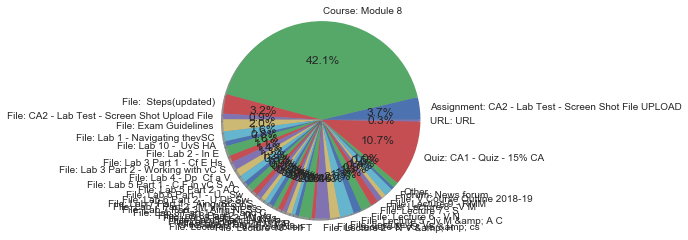

In [980]:
labels = module8ml['Event context'].astype('category').cat.categories.tolist()
counts = module8ml['Event context'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [963]:
module8ml["Event context"].value_counts()


Course: Module 8                                        741
Quiz: CA1 - Quiz - 15% CA                               189
Assignment: CA2 - Lab Test - Screen Shot File UPLOAD     65
File:  Steps(updated)                                    56
File: Lecture 2 - N V &amp; H                            42
File: Lecture 4 - Vs                                     40
File: Lecture 1 - V Introduction                         36
File: Exam Guidelines                                    35
File: Lecture 6 - V N                                    31
File: Lab 2 - In E                                       29
File: Lecture 3 -vS, vS &amp; cs                         29
File: Lab 1 - Navigating thevSC                          28
File: Lab 3 Part 2 - Working with vC S                   24
File: V Course Outline 2018-19                           24
File: Lecture 5 - Iy M &amp; A C                         23
File: Lab 4 - Dp  Cf a V                                 22
File: Lecture 7 - S                     

In [961]:
module8ml["Component"].value_counts()


File                751
System              680
Quiz                189
User report          51
Assignment           47
File submissions     18
Overview report      10
Forum                 8
URL                   5
Name: Component, dtype: int64

In [960]:
module8ml["Event name"].value_counts()


Course module viewed                                      775
Course viewed                                             633
Quiz attempt viewed                                       125
Grade user report viewed                                   51
The status of the submission has been viewed.              20
Quiz attempt reviewed                                      14
Quiz attempt summary viewed                                12
User enrolled in course                                    11
Role assigned                                              11
User graded                                                10
Quiz attempt started                                       10
Quiz attempt submitted                                     10
Grade overview report viewed                               10
A submission has been submitted.                            9
Submission form viewed.                                     9
The user has accepted the statement of the submission.      9
A file h

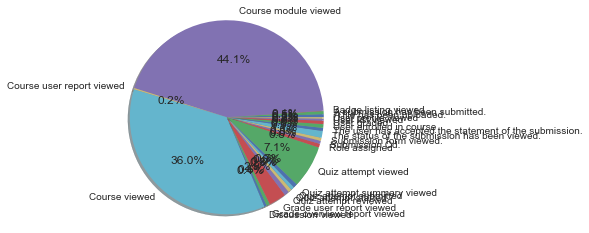

In [950]:
labels = module8ml['Event name'].astype('category').cat.categories.tolist()
counts = module8ml['Event name'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [901]:
#time8
time8 = module8ml["Time"].str.split(",", n = 1, expand = True)

In [902]:

# making separate Date column from new data frame 
module8ml["Date"]= time8[0] 

# making seperate Time column from new data frame
module8ml['Time']= time8[1]


In [912]:
# Convert the date column to datetime64
module8ml.Date = pd.to_datetime(module8ml.Date)

In [903]:
print(time8.nunique())

0     70
1    508
dtype: int64


In [805]:
module8og.plot(kind='scatter', x='Final Mark (Rounded)', y='Exam Mark', rot=70)

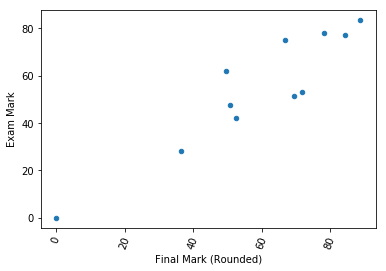

In [806]:
plt.show()

In [803]:
module8og.plot(kind='scatter', x='Final Mark (Rounded)', y='CA Mark', rot=70)

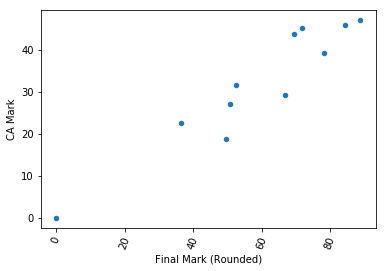

In [804]:
plt.show()

In [654]:
module8og.head()

ID number First Name Surname  CA Mark  CA Mark/100  Exam Mark  Final Mark  \
0  tzCYvQBD       azCY    bvQB    29.21        58.42       75.0       66.71   
1  tAK5SAbE       aAK5    bSAb     0.00         0.00        0.0        0.00   
2  ba14Mdv9       aa14    bMdv    27.11        54.22       47.5       50.86   
3  U8NMDqBG       a8NM    bDqB    45.89        91.78       77.0       84.39   
4  fw97aOyU       aw97    baOy    31.59        63.18       42.0       52.59   

   Final Mark (Rounded) Final Grade   Pass  
0                 66.71           B   True  
1                  0.00           F  False  
2                 50.86          C+   True  
3                 84.39           A   True  
4                 52.59          C+   True

In [284]:
m8mg = module8mg[['First name', 'Surname', 'ID number', 'Labs (Real)', 'Quiz: CA1 - Quiz - 15% CA (Real)', 'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)', 'Course total (Real)']]

In [588]:
# Visualize the distribution of Quiz: CA1 - Quiz - 15% CA (Real) in Module 8'

sns.distplot(m8mg['Quiz: CA1 - Quiz - 15% CA (Real)'])

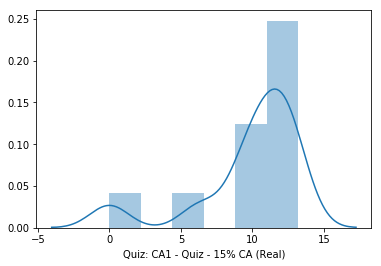

In [589]:
plt.show()

In [426]:
module8og.describe().transpose()

count       mean        std  min     25%    50%     75%  \
CA Mark                11.0  31.850909  14.527275  0.0  24.785  31.59  44.505   
CA Mark/100            11.0  63.701818  29.054549  0.0  49.570  63.18  89.010   
Exam Mark              11.0  54.318182  25.029256  0.0  44.750  53.00  76.000   
Final Mark             11.0  59.010000  25.341010  0.0  50.285  66.71  75.000   
Final Mark (Rounded)   11.0  59.010000  25.341010  0.0  50.285  66.71  75.000   

                        max  
CA Mark               47.07  
CA Mark/100           94.14  
Exam Mark             83.50  
Final Mark            88.82  
Final Mark (Rounded)  88.82

In [ ]:
# Visualize the distribution of CA2 - Practical Exam (Real) in Module 7'

sns.distplot(m7mg['CA2 - Practical Exam (Real)'])

In [794]:
fail8 = module8og['Final Mark (Rounded)'] < 40

In [795]:
fail8.sum()

2

In [497]:
passed8 = module8og['Final Mark (Rounded)'] > 40


In [793]:
passed8.sum()

9

NameError: name 'x' is not defined

In [498]:

# Using 'passed8' as the column name 
# and equating it to the list 
module8og['Pass'] = passed8 


In [557]:
sns.boxplot(x = 'Pass', y = 'Final Mark (Rounded)', data = module8og)

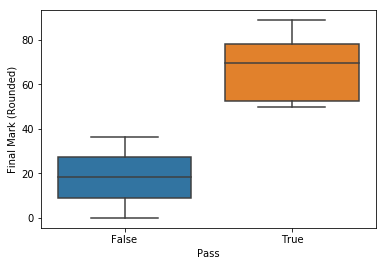

In [558]:
plt.show()

In [592]:
sns.boxplot(x = 'Pass', y = 'Final Mark (Rounded)',data = module8og,hue = 'CA Mark/100') 
# Adding Third Variable to box plots

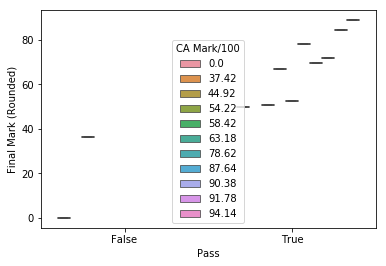

In [593]:
plt.show()

In [499]:

# Group Module Own Grades  by 'Pass' and compute the mean
print(module8og.groupby(['Pass']).mean())


         CA Mark  CA Mark/100  Exam Mark  Final Mark  Final Mark (Rounded)
Pass                                                                      
False  11.230000    22.460000  14.000000   18.230000             18.230000
True   36.433333    72.866667  63.277778   68.072222             68.072222


In [522]:
sns.distplot(module8og['Pass'])

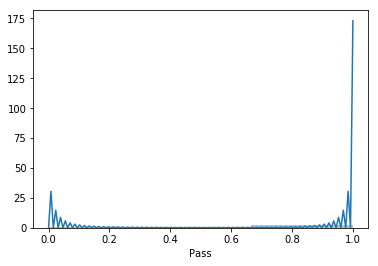

In [523]:
plt.show()

In [500]:

# Group Module Own Grades  by 'Pass' and compute the Standard Dev
print(module8og.groupby(['Pass']).std())

         CA Mark  CA Mark/100  Exam Mark  Final Mark  Final Mark (Rounded)
Pass                                                                      
False  15.881618    31.763237  19.798990   25.781113             25.781113
True   10.116571    20.233141  15.407204   14.542483             14.542483


In [501]:
print(module8og.groupby('CA Mark')['Pass'].value_counts())
# Count the number of Pass and non-pass by CA Mark


CA Mark  Pass 
0.00     False    1
18.71    True     1
22.46    False    1
27.11    True     1
29.21    True     1
31.59    True     1
39.31    True     1
43.82    True     1
45.19    True     1
45.89    True     1
47.07    True     1
Name: Pass, dtype: int64


In [395]:
m8mg.describe().transpose()

# There are 1 Labs, a quiz and assignment CA2


count       mean  \
Labs (Real)                                          11.0   7.090909   
Quiz: CA1 - Quiz - 15% CA (Real)                     11.0   9.830000   
Assignment: CA2 - Lab Test - Screen Shot File U...   11.0  14.886364   
Course total (Real)                                  11.0  31.807273   

                                                          std  min     25%  \
Labs (Real)                                          3.023394  0.0   5.500   
Quiz: CA1 - Quiz - 15% CA (Real)                     3.789580  0.0   9.410   
Assignment: CA2 - Lab Test - Screen Shot File U...   9.423616  0.0   9.375   
Course total (Real)                                 14.575085  0.0  24.785   

                                                      50%     75%    max  
Labs (Real)                                          8.00   9.500  10.00  
Quiz: CA1 - Quiz - 15% CA (Real)                    11.19  12.175  13.21  
Assignment: CA2 - Lab Test - Screen Shot File U...  17.25  23.750  24.50  
Course total (Real)                                 31.59  44.510  47.08

In [477]:
print(m8mg['Course total (Real)'].value_counts(dropna=False))


39.31    1
18.21    1
31.59    1
47.08    1
27.11    1
45.89    1
43.83    1
29.21    1
22.46    1
0.00     1
45.19    1
Name: Course total (Real), dtype: int64
30.98    1
11.73    1
19.60    1
27.65    1
14.23    1
6.65     1
19.48    1
16.45    1
21.82    1
29.75    1
33.25    1
28.88    1
28.00    1
32.38    1
Name: CA2 - Practical Exam (Real), dtype: int64


In [279]:
m8ml = module8ml[[ 'Time', 'User full name','Event context','Component','Event name','Description']]


In [427]:
m8ml.describe().transpose()
# Student who was most frequent was aa14 bMdv
# Event context : Course Module 8 

#Affected user: Name of the user if the action is related to them.This has been removed as it is blank
#Time: Contains the d/m/y and time stamp of the log entry. # 8/11/18, 14:26 most frequent time
#User full name: Name of the user is listed in this column. - aa14 bMdv	 was the most engaged in the VLE
#Event context: It displays the name of the activity or resource. Ex: Course: Course: Course: Module 8		 was most frequent
#Component: Displays the type of the activity or resource. Ex: File, System, Assignment, File was most frequent
#Event name: In relation to users' action. Four actions that a user can do - CRUD .Course module viewed is the most popular
#Description: It contains descriptive information about the action performed by the user.Viewed course most popular
#IP address: Shows the IP address of the user.This will be removed.
#Origin: Indicates whether the student performed an action using a desktop/laptop or mobile. Activity from a mobile device will be recorded as 'ws'.


count unique  \
Time            1759    952   
User full name  1759     11   
Event context   1759     40   
Component       1759      9   
Event name      1759     23   
Description     1759     35   

                                                              top freq  
Time                                               8/11/18, 14:26   25  
User full name                                          aa14 bMdv  266  
Event context                                    Course: Module 8  741  
Component                                                    File  751  
Event name                                   Course module viewed  775  
Description     The user with id '0' viewed the 'resource' act...  751

In [428]:
m8ml.count()

Time              1759
User full name    1759
Event context     1759
Component         1759
Event name        1759
Description       1759
dtype: int64

In [429]:
getCounts(m8ml, 10,'T')

NameError: name 'getCounts' is not defined

In [285]:
m8mg.head()

First name Surname ID number  Labs (Real)  Quiz: CA1 - Quiz - 15% CA (Real)  \
0       a8NM    bDqB  U8NMDqBG         10.0                             12.39   
1       aSnR    bGk9  VSnRGk9O          9.5                             11.19   
2       aAK5    bSAb  tAK5SAbE          0.0                              0.00   
3       a4jV    bO8M  14jVO8M7          9.5                             10.33   
4       aa14    bMdv  ba14Mdv9          6.5                              9.61   

   Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)  \
0                                               23.5             
1                                               24.5             
2                                                0.0             
3                                               24.0             
4                                               11.0             

   Course total (Real)  
0                45.89  
1                45.19  
2                 0.00  
3                43.83  
4                27.11

In [58]:
module8ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 9 columns):
Time              1759 non-null object
User full name    1759 non-null object
Affected user     1759 non-null object
Event context     1759 non-null object
Component         1759 non-null object
Event name        1759 non-null object
Description       1759 non-null object
Origin            1759 non-null object
IP address        1759 non-null object
dtypes: object(9)
memory usage: 123.8+ KB


In [88]:
module8mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
First name                                                     11 non-null object
Surname                                                        11 non-null object
ID number                                                      11 non-null object
Email address                                                  11 non-null object
Labs (Real)                                                    11 non-null float64
Quiz: CA1 - Quiz - 15% CA (Real)                               11 non-null float64
Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)    11 non-null float64
Course total (Real)                                            11 non-null float64
Last downloaded from this course                               11 non-null int64
dtypes: float64(4), int64(1), object(4)
memory usage: 872.0+ bytes


In [126]:
module8mg['Course total (Real)'].plot('hist')

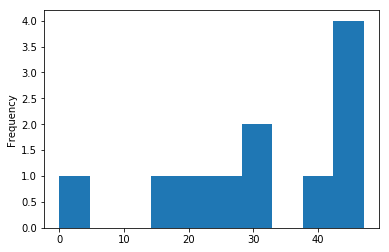

In [128]:
plt.show()

In [89]:
module8og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
ID number               11 non-null object
First Name              11 non-null object
Surname                 11 non-null object
CA Mark                 11 non-null float64
CA Mark/100             11 non-null float64
Exam Mark               11 non-null float64
Final Mark              11 non-null float64
Final Mark (Rounded)    11 non-null float64
Final Grade             11 non-null object
dtypes: float64(5), object(4)
memory usage: 872.0+ bytes


In [129]:
module8og['Final Mark (Rounded)'].plot('hist')

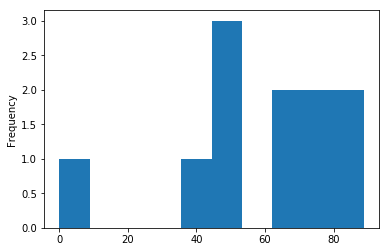

In [130]:
plt.show()

In [66]:
module8ml.head()
# User full name

Time User full name Affected user     Event context  \
0  31/01/19, 09:03      a8NM bDqB             -  Course: Module 8   
1  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
2  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
3  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
4  25/01/19, 00:06      aa14 bMdv             -  Course: Module 8   

     Component                Event name  \
0  User report  Grade user report viewed   
1       System             Course viewed   
2  User report  Grade user report viewed   
3       System             Course viewed   
4       System             Course viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the user report in...    web  127.0.0.1  
1  The user with id '0' viewed the course with id...    web  127.0.0.1  
2  The user with id '0' viewed the user report in...    web  127.0.0.1  
3  The user with id '0' viewed the course with id...    web  127.0.0.1  
4  The user with id '0' viewed the course with id...    web  127.0.0.1

In [129]:
module8ml.describe()

Time User full name Affected user     Event context  \
count             1759           1759          1759              1759   
unique             952             11             1                40   
top     8/11/18, 14:26      aa14 bMdv             -  Course: Module 8   
freq                25            266          1759               741   

       Component            Event name  \
count       1759                  1759   
unique         9                    23   
top         File  Course module viewed   
freq         751                   775   

                                              Description Origin IP address  
count                                                1759   1759       1759  
unique                                                 35      1          1  
top     The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
freq                                                  751   1759       1759

In [67]:
module8og.head()
# ID number
# Final Grade

ID number First Name Surname  CA Mark  CA Mark/100  Exam Mark  Final Mark  \
0  tzCYvQBD       azCY    bvQB    29.21        58.42       75.0       66.71   
1  tAK5SAbE       aAK5    bSAb     0.00         0.00        0.0        0.00   
2  ba14Mdv9       aa14    bMdv    27.11        54.22       47.5       50.86   
3  U8NMDqBG       a8NM    bDqB    45.89        91.78       77.0       84.39   
4  fw97aOyU       aw97    baOy    31.59        63.18       42.0       52.59   

   Final Mark (Rounded) Final Grade  
0                 66.71           B  
1                  0.00           F  
2                 50.86          C+  
3                 84.39           A  
4                 52.59          C+

In [130]:
module8og.describe()
# Max mark 88.82
# Mean 59



CA Mark  CA Mark/100  Exam Mark  Final Mark  Final Mark (Rounded)
count  11.000000    11.000000  11.000000    11.00000              11.00000
mean   31.850909    63.701818  54.318182    59.01000              59.01000
std    14.527275    29.054549  25.029256    25.34101              25.34101
min     0.000000     0.000000   0.000000     0.00000               0.00000
25%    24.785000    49.570000  44.750000    50.28500              50.28500
50%    31.590000    63.180000  53.000000    66.71000              66.71000
75%    44.505000    89.010000  76.000000    75.00000              75.00000
max    47.070000    94.140000  83.500000    88.82000              88.82000

In [68]:
module8mg.head()
# ID number
# Last downloaded from this course - tbr

First name Surname ID number            Email address  Labs (Real)  \
0       a8NM    bDqB  U8NMDqBG  U8NMDqBG@student.itb.ie         10.0   
1       aSnR    bGk9  VSnRGk9O  VSnRGk9O@student.itb.ie          9.5   
2       aAK5    bSAb  tAK5SAbE  tAK5SAbE@student.itb.ie          0.0   
3       a4jV    bO8M  14jVO8M7  14jVO8M7@student.itb.ie          9.5   
4       aa14    bMdv  ba14Mdv9  ba14Mdv9@student.itb.ie          6.5   

   Quiz: CA1 - Quiz - 15% CA (Real)  \
0                             12.39   
1                             11.19   
2                              0.00   
3                             10.33   
4                              9.61   

   Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)  \
0                                               23.5             
1                                               24.5             
2                                                0.0             
3                                               24.0             
4                                               11.0             

   Course total (Real)  Last downloaded from this course  
0                45.89                        1553879150  
1                45.19                        1553879150  
2                 0.00                        1553879150  
3                43.83                        1553879150  
4                27.11                        1553879150

In [64]:
module8mg.describe()

Labs (Real)  Quiz: CA1 - Quiz - 15% CA (Real)  \
count    11.000000                          11.00000   
mean      7.090909                           9.83000   
std       3.023394                           3.78958   
min       0.000000                           0.00000   
25%       5.500000                           9.41000   
50%       8.000000                          11.19000   
75%       9.500000                          12.17500   
max      10.000000                          13.21000   

       Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)  \
count                                          11.000000             
mean                                           14.886364             
std                                             9.423616             
min                                             0.000000             
25%                                             9.375000             
50%                                            17.250000             
75%                                            23.750000             
max                                            24.500000             

       Course total (Real)  Last downloaded from this course  
count            11.000000                      1.100000e+01  
mean             31.807273                      1.553879e+09  
std              14.575085                      0.000000e+00  
min               0.000000                      1.553879e+09  
25%              24.785000                      1.553879e+09  
50%              31.590000                      1.553879e+09  
75%              44.510000                      1.553879e+09  
max              47.080000                      1.553879e+09

In [67]:
module8mg.std()

Labs (Real)                                                     3.023394
Quiz: CA1 - Quiz - 15% CA (Real)                                3.789580
Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)     9.423616
Course total (Real)                                            14.575085
Last downloaded from this course                                0.000000
dtype: float64

In [65]:
module8mg.count()
# is the amount of non null entries

First name                                                     11
Surname                                                        11
ID number                                                      11
Email address                                                  11
Labs (Real)                                                    11
Quiz: CA1 - Quiz - 15% CA (Real)                               11
Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)    11
Course total (Real)                                            11
Last downloaded from this course                               11
dtype: int64

In [66]:
module8mg.mean()

Labs (Real)                                                    7.090909e+00
Quiz: CA1 - Quiz - 15% CA (Real)                               9.830000e+00
Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)    1.488636e+01
Course total (Real)                                            3.180727e+01
Last downloaded from this course                               1.553879e+09
dtype: float64

In [85]:
module8mg.columns
# ID number
# Quiz: CA1 - Quiz - 15% CA Real
# Assignment : CA2 - Lab Test - Screen shot File upload
# Course total

Index(['First name', 'Surname', 'ID number', 'Email address', 'Labs (Real)',
       'Quiz: CA1 - Quiz - 15% CA (Real)',
       'Assignment: CA2 - Lab Test - Screen Shot File UPLOAD (Real)',
       'Course total (Real)', 'Last downloaded from this course'],
      dtype='object')

In [69]:
module8mg.shape

(11, 9)

In [133]:
module8ml.head()
# User full name
# Ip address could be dropped ?

Time User full name Affected user     Event context  \
0  31/01/19, 09:03      a8NM bDqB             -  Course: Module 8   
1  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
2  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
3  26/01/19, 12:24      atVF bWWA             -  Course: Module 8   
4  25/01/19, 00:06      aa14 bMdv             -  Course: Module 8   

     Component                Event name  \
0  User report  Grade user report viewed   
1       System             Course viewed   
2  User report  Grade user report viewed   
3       System             Course viewed   
4       System             Course viewed   

                                         Description Origin IP address  
0  The user with id '0' viewed the user report in...    web  127.0.0.1  
1  The user with id '0' viewed the course with id...    web  127.0.0.1  
2  The user with id '0' viewed the user report in...    web  127.0.0.1  
3  The user with id '0' viewed the course with id...    web  127.0.0.1  
4  The user with id '0' viewed the course with id...    web  127.0.0.1

In [134]:
module8ml.describe()

Time User full name Affected user     Event context  \
count             1759           1759          1759              1759   
unique             952             11             1                40   
top     8/11/18, 14:26      aa14 bMdv             -  Course: Module 8   
freq                25            266          1759               741   

       Component            Event name  \
count       1759                  1759   
unique         9                    23   
top         File  Course module viewed   
freq         751                   775   

                                              Description Origin IP address  
count                                                1759   1759       1759  
unique                                                 35      1          1  
top     The user with id '0' viewed the 'resource' act...    web  127.0.0.1  
freq                                                  751   1759       1759

In [86]:
module8ml.columns

Index(['Time', 'User full name', 'Affected user', 'Event context', 'Component',
       'Event name', 'Description', 'Origin', 'IP address'],
      dtype='object')

In [70]:
module8ml.shape

(1759, 9)